# R4DS examples in Python

## Knowledge Base

### NumPy

Numpy should always be used for arrays of every dimension.  
It should always be the preferred way in comparison to python multi-dimensional arrays and standard python lists.  
**Why?**  
NumPy arrays take up significantly *less space*, the operations on them are executed *way faster* and they allow to easily apply common *array and matrix operations* that are necessary for Data Science.

#### Important Notice on dependencies:
https://pandas.pydata.org/docs/getting_started/install.html#install-recommended-dependencies

## Importing basic libraries

In [109]:
#pyplot = basic plotting
import matplotlib.pyplot as plt
#numpy = Vektormultiplication etc. (matrix operations that cannot be done with arrays but are necessary for deep learning etc.)
import numpy as np
#pandas = data handling via in-memory dataframes (which can be used similarly to a database)
import pandas as pd
#plotnine = advanced plotting (grammar for graphics based on ggplot2 -> explicit mapping of data to the visual objects of the plot)
from plotnine import *
#plotnine.data = sample data sets
from plotnine.data import *
#seaborn = advanced plotting & visualization, many ready-to-use cases for complex relationships
import seaborn as sns
#timeit = tracking of code snippet execution times
import timeit
#csv = working with csv files in native Python
import csv
#re = regular expressions
import re
#regex = regular expressions third party project to extend "re"
import regex
#CategoricalDtype = categorical dtype with advanced functionality in comparison to pd.Series(dtype="category")
from pandas.api.types import CategoricalDtype
#datetime = date object
import datetime
#LinearRegression = Linear Regression modeling
from sklearn.linear_model import LinearRegression
#PolynomialFeatures = Polynomial Regression modeling
from sklearn.preprocessing import PolynomialFeatures
#math = various functions for mathematical operations
import math
#GridSearch = model optimization by trying various combinations of parameters
from sklearn.model_selection import GridSearchCV
#minimize = optimization (in this case: minimization) of a given function for the parameters
from scipy.optimize import minimize
#accuracy_score = check the accuracy of a predicion
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
#statsmodels api = regression analysis without R-like formulas
import statsmodels.api as sm
#statsmodels ols = ordinary least squares (linear regression) that can be specified by using Formulas like in R
from statsmodels.formula.api import ols
#statsmodels rlm = robust linear models (robust linear regression) that can be specified by using Formulas like in R
from statsmodels.formula.api import rlm
#scipy interpolate = to implement cubic splines
from scipy import interpolate
#gapminder = teaching data that summarises the progression of countries over time by life expectancy and GDP
from gapminder import gapminder

print("Hello World")

Hello World


Import files:  

[Basic Pandas Operations with Dataframes](#Basic-Pandas-Operations-with-Dataframes)

## Importing custom helper functions

* regexliprint - applies `re.findall()` to a list of strings. full=True prints every result, otherwise only first 10
* regexsearchprint - applies `re.search()` to a string and prints the matched substring
* str_detect - applies `re.search()` to a list of strings and prints a boolean list of which elements have a match.

In [108]:
# REGEX helper function 1
def regexliprint(stringlist,pattern,full):
    if not full:
        n = 0
        # using a "generator expression" (http://docs.python.org/reference/expressions.html#grammar-token-generator_expression)
        # basically saying: take the current value from the iterable if *something* is True
        for i in (x for x in stringlist if n<10):
            a = regex.findall(pattern, str(i))
            # using the implicit booleanness of a Python list: (will be False if list is empty)
            if a:
                print(a, str(i))
                n+=1
    elif full:
        for i in stringlist:
            a = regex.findall(pattern, str(i))
            # using the implicit booleanness of a Python list: (will be False if list is empty)
            if a:
                print(a, str(i))

# REGEX helper function 2
def regexsearchprint(string, pattern):
    result = regex.search(pattern, string)
    try:
        print(string[result.start():result.end()])
    except:
        print("NO MATCH")
        

# REGEX helper function 3
def str_detect_print(pattern, stringlist):
    resLi = []
    for i in stringlist:
        if not regex.search(pattern, i):
            resLi.append(False)
        else:
            resLi.append(True)
    print(resLi)
    

# transform a DF with categorical dummies back to the original DF
# function from https://github.com/pandas-dev/pandas/issues/8745
# data = dataframe containing all dummy variables
# categories = array of category names which are the prefixes
def from_dummies(data, categories, prefix_sep='_'):
    out = data.copy()
    for l in categories:
        cols, labs = [[c.replace(x,"") for c in data.columns if l+prefix_sep in c] for x in ["", l+prefix_sep]]
        out[l] = pd.Categorical(np.array(labs)[np.argmax(data[cols].values, axis=1)])
        out.drop(cols, axis=1, inplace=True)
    return out

# apply an ols regression with "statsmodels"
# xvars is an array
# return_model is a boolean that defines if the function should return the fitted model or just the model parameters
def regress(data, yvar, xvars, return_model=True):
    Y = data[yvar]
    X = data[xvars]
    X = sm.add_constant(X)
    result = sm.OLS(Y, X).fit()
    # approach 1: return the model itself
    if return_model:
        return result
    # approach 1: return y-parameter and intercept
    else:
        return result.params
    

---
---

---
---

## 3 Data visualisation

#### Visualization:
* note, that Pandas even has its own wrapper on `matplotlib.pyplot.plot()`:

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

It is also useful to directly access the **matplotlib.pylplot** library for getting insights into the data.  
`import matplotlib.pyplot as plt`

---

### My first plot
Next up: my first plot making use of the mpg.csv library of fuel to lib  
See https://ggplot2.tidyverse.org/reference/mpg.html for a detailed description.

In [21]:
mpgDf = pd.read_csv("~/Jupyter_Lab/Datasets/mpg.csv",index_col=0)
mpgDf.head(10)

manufacturer       model  displ  year  cyl       trans drv  cty  hwy fl  \
1          audi          a4    1.8  1999    4    auto(l5)   f   18   29  p   
2          audi          a4    1.8  1999    4  manual(m5)   f   21   29  p   
3          audi          a4    2.0  2008    4  manual(m6)   f   20   31  p   
4          audi          a4    2.0  2008    4    auto(av)   f   21   30  p   
5          audi          a4    2.8  1999    6    auto(l5)   f   16   26  p   
6          audi          a4    2.8  1999    6  manual(m5)   f   18   26  p   
7          audi          a4    3.1  2008    6    auto(av)   f   18   27  p   
8          audi  a4 quattro    1.8  1999    4  manual(m5)   4   18   26  p   
9          audi  a4 quattro    1.8  1999    4    auto(l5)   4   16   25  p   
10         audi  a4 quattro    2.0  2008    4  manual(m6)   4   20   28  p   

      class  
1   compact  
2   compact  
3   compact  
4   compact  
5   compact  
6   compact  
7   compact  
8   compact  
9   compact  
10  compact

Dataset succesfully loaded!

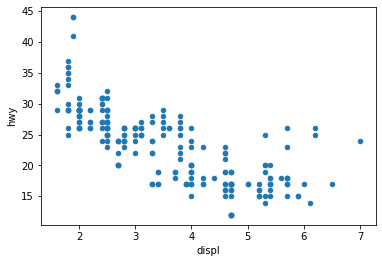

In [22]:
mpgDf.plot(kind='scatter',x='displ',y='hwy')

Now we are trying some options (using pandas) to find out more about the data in use:

In [23]:
print(mpgDf.columns)
print('--------------------------------------------------')
print(mpgDf['model'].unique())
# the following 2 lines allow displaying of up to 1000 rows of values from the specific column
#pd.set_option('display.max_row', 1000)
#print(mpgDf['class'])
print(mpgDf['class'].unique())

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')
--------------------------------------------------
['a4' 'a4 quattro' 'a6 quattro' 'c1500 suburban 2wd' 'corvette'
 'k1500 tahoe 4wd' 'malibu' 'caravan 2wd' 'dakota pickup 4wd'
 'durango 4wd' 'ram 1500 pickup 4wd' 'expedition 2wd' 'explorer 4wd'
 'f150 pickup 4wd' 'mustang' 'civic' 'sonata' 'tiburon'
 'grand cherokee 4wd' 'range rover' 'navigator 2wd' 'mountaineer 4wd'
 'altima' 'maxima' 'pathfinder 4wd' 'grand prix' 'forester awd'
 'impreza awd' '4runner 4wd' 'camry' 'camry solara' 'corolla'
 'land cruiser wagon 4wd' 'toyota tacoma 4wd' 'gti' 'jetta' 'new beetle'
 'passat']
['compact' 'midsize' 'suv' '2seater' 'minivan' 'pickup' 'subcompact']


---
### Grammar for Graphics
Useful Paper to understand the concept of **Plotnine** -> **grammar for graphics**  
http://vita.had.co.nz/papers/layered-grammar.pdf

Key take away: a graphic is described through layers. By defining these layers, a graphic template can be created independently of the data applied to it. Each layer represents one object that is being displayed. Note that introducing new data might still make it necessary to tweak some of the layers to ensure the compatibility of the graphic with the content of the data.  

A layer is composed of four parts:
* data and aesthetic mapping (aes)
* a statistical transformation (stat)
* a geometric object (geom)
* a position adjustment

Additional components of a graphic:
* one scale per mapping
* a coordinate system
* faceting

---

Notes:  
Bar Chart:  
stat="bin" -> default, maps the count of the classes to the y-axis  
stat="identity" -> y-axis is a column in the dataset, needs to be specified in *aes* parameter
---
---

<div class='alert alert-block alert-info'>
    <h1>
        <b>Error case (solved)<b>
    </h1>
</div>

Idea: stat=bin is only for seperating continuous numeric variables into ranges that then build the bar chart. Maybe this function does not work with discrete variables like 'class'.
Example: with the continuous variable 'displ', there are no spaces between the bars and it seems to be a reasonable result.
<strong><font color="green" size="4">For the solution - look at the end of the Error case</font></strong>

class
2seater        5
compact       47
midsize       41
minivan       11
pickup        33
subcompact    35
suv           62
dtype: int64


/home/daniel/.local/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 5'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


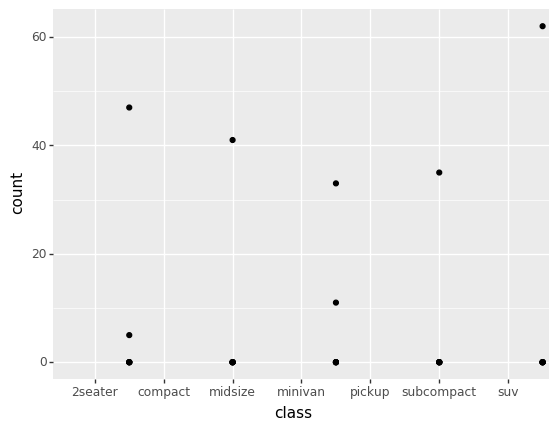

<ggplot: (8726647882581)>

In [24]:
#breaks = mpgDf['class']
print(mpgDf.groupby(["class"]).size())
a = mpgDf.groupby(["class"]).size()
(ggplot(mpgDf)
+ geom_point(aes(x='class'),stat='bin')
#+ geom_point(aes("class"),stat="bin",binwidth=0.5,color="Red")
#+ geom_col(aes("class"),stat="bin",binwidth=0.6,fill="Green")
)

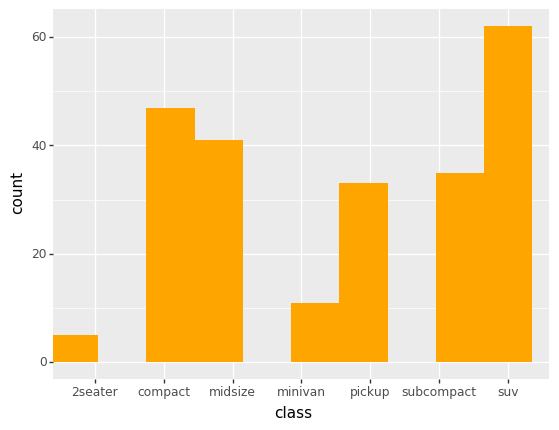

<ggplot: (-9223363310206888104)>

In [25]:
(ggplot(mpgDf)
#+ geom_point(aes("class"),stat="bin",binwidth=0.5,color="Red")
+ geom_col(aes("class"),stat="bin",binwidth=0.7,fill="Orange")
)

<div class='alert alert-block alert-success'>
    <h1>
        <b>Solution:</b>
    </h1>
</div>

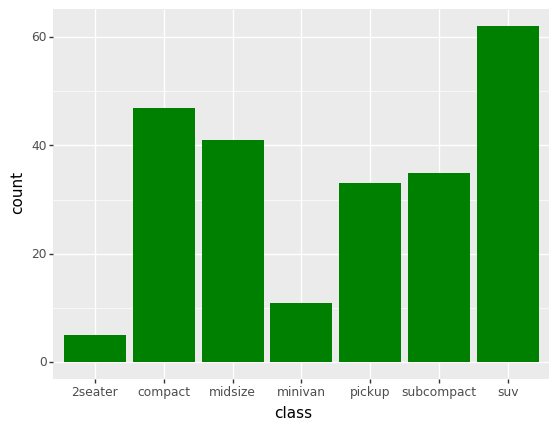

<ggplot: (8726647651546)>

In [26]:
#solved
(ggplot(mpg)
+ geom_bar(aes(x='class'),fill="Green"))

<blockquote><font size="4"
    <i><strong>There are two types of bar charts: geom_bar() and geom_col().</strong> geom_bar() makes the height of the bar proportional to the number of cases in each group (or if the weight aesthetic is supplied, the sum of the weights). If you want the heights of the bars to represent values in the data, use geom_col() instead. <strong>geom_bar() uses stat_count() by default</strong>: it counts the number of cases at each x position. <strong>geom_col() uses stat_identity()</strong>: it leaves the data as is.</i>
</font></blockquote>

<div class='alert alert-block alert-info'>
    <h1>
        <b>End of Error Case</b>
    </h1>
</div>

---
---
### Next up: some plotting

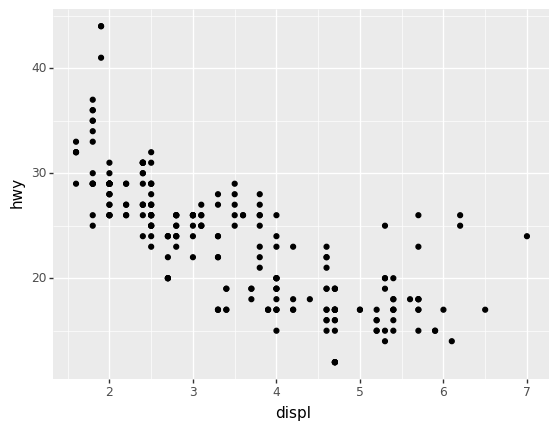

<ggplot: (8726647879011)>

In [27]:
#short syntax: (NOTE: the dataset mpg can be directly taken from plotnine.data 
#instead of loading it in a pandas dataframe (which I called "mpgDf" here))

#(ggplot(mpgDf)
#+ geom_point(aes(displ,hwy)))

#alternative syntax:
#ggplot(data=mpg) +\
#geom_point(mapping=aes(x="displ",y="hwy"))

#super short syntax (using quick plot 'qplot')
qplot('displ','hwy',mpg)
#qplot('displ','hwy',data=mpg)
#qplot(mpg.displ,hwy.displ)
#qplot(x='displ',y='hwy',data=mpg)

---
### Short interjection on qplot syntax with 'Diamonds' dataset

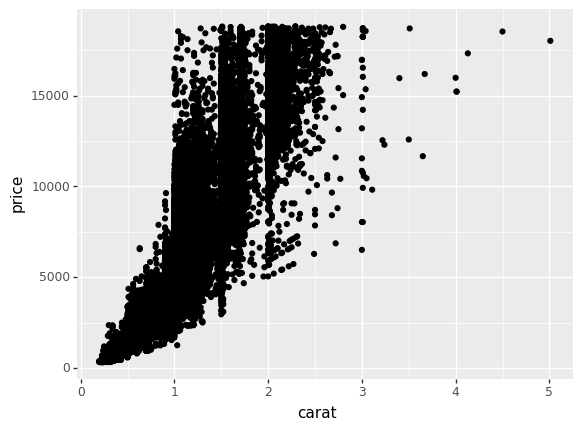

<ggplot: (8726648057713)>

In [28]:
(ggplot() 
+ geom_point(data = diamonds, mapping = aes(x = 'carat', y = 'price'))
)

# short version:

#(ggplot(diamonds, aes('carat','price'))
#+geom_point()
#)

# qplot version:
#qplot('carat','price',diamonds)

/home/daniel/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


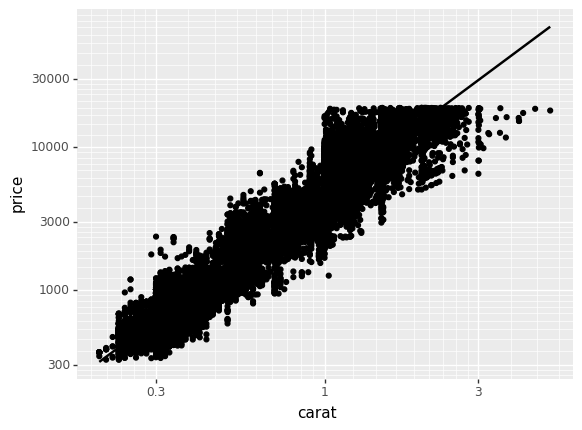

<ggplot: (-9223363310208921691)>

In [29]:
(ggplot()
+geom_point(data = diamonds, mapping = aes(x = 'carat', y = 'price'), stat = "identity", position = "identity")
+geom_smooth(data = diamonds, mapping = aes(x = 'carat', y = 'price'), position = "identity",stat = "smooth", method = "lm")
+scale_x_log10()
+scale_y_log10()
+coord_cartesian()
)

# short version:

#(ggplot(diamonds, aes('carat','price'))
#+geom_point()
#+stat_smooth()
#+scale_x_log10()
#+scale_y_log10()
#)

# qplot version:
#qplot('carat','price',data=diamonds,geom=('point','smooth'),method='lm',log='xy')


#### Concerning Log-Transformation:
http://onlinestatbook.com/2/transformations/log.html  
TL;DR - they reduce 'skew' --> long tails on the left or right of the graph (with low y-values in comparison to the higher valued 'body' of the graph)

<div class='alert alert-block alert-info'>
    <h1>
        <b>Error case<b>
    </h1>
</div>

### Troop Movement Example:
* using pandas 'iloc' to view rows, columns and cell values
* plotting complex graphs with multiple layers

In [30]:
troopsDf = pd.read_table("~/Jupyter_Lab/Datasets/minard-troops.txt",delim_whitespace=True,header=0)

print(troopsDf.head(10))
print('-----------------------------------------------------------------')
# making use of iloc to get a copy of the first row (values + dtypes)
print(troopsDf.iloc[0])
print('-----------')
# proper use of iloc to get a specific cell value
print(troopsDf.iloc[0,troopsDf.columns.get_loc('survivors')])
print('-----------')
# NOTE: the following line sets the cell value to 'x'
# troopsDf.iloc[0,troopsDf.columns.get_loc('survivors')] = x
# using iloc to get explicitly the values of the cells without dtype specifications
print(troopsDf.iloc[0].values)
print('-----------')

   long   lat  survivors direction  group
0  24.0  54.9     340000         A      1
1  24.5  55.0     340000         A      1
2  25.5  54.5     340000         A      1
3  26.0  54.7     320000         A      1
4  27.0  54.8     300000         A      1
5  28.0  54.9     280000         A      1
6  28.5  55.0     240000         A      1
7  29.0  55.1     210000         A      1
8  30.0  55.2     180000         A      1
9  30.3  55.3     175000         A      1
-----------------------------------------------------------------
long             24
lat            54.9
survivors    340000
direction         A
group             1
Name: 0, dtype: object
-----------
340000
-----------
[24.0 54.9 340000 'A' 1]
-----------


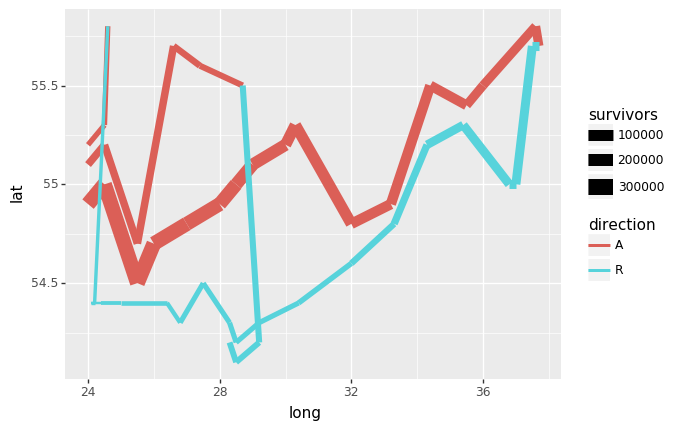

<ggplot: (-9223363310208921824)>

In [31]:
plot_troops = (ggplot(troopsDf,aes('long','lat'))+geom_path(aes(size='survivors',color='direction',group='group')))
plot_troops

   long   lat        city
0  24.0  55.0       Kowno
1  25.3  54.7       Wilna
2  26.4  54.4    Smorgoni
3  26.8  54.3   Moiodexno
4  27.7  55.2   Gloubokoe
5  27.6  53.9       Minsk
6  28.5  54.3  Studienska
7  28.7  55.5     Polotzk
8  29.2  54.4        Bobr
9  30.2  55.3     Witebsk


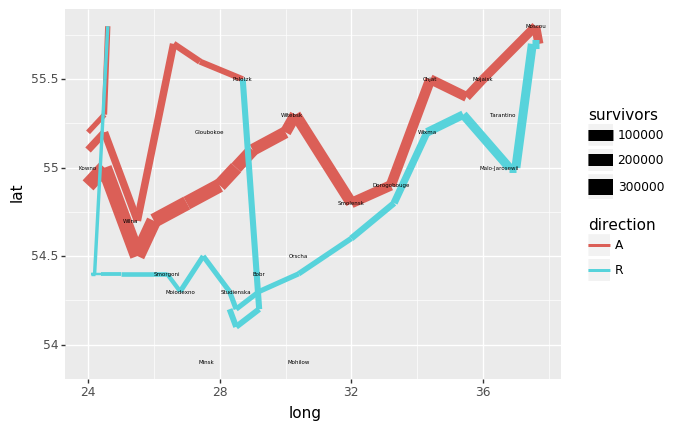

<ggplot: (-9223363310206714003)>

In [32]:
citiesDf = pd.read_table("~/Jupyter_Lab/Datasets/minard-cities.txt",delim_whitespace=True,header=0)
print(citiesDf.head(10))
plot_both = (plot_troops +geom_text(aes(label='city'),size=4,data=citiesDf))
plot_both

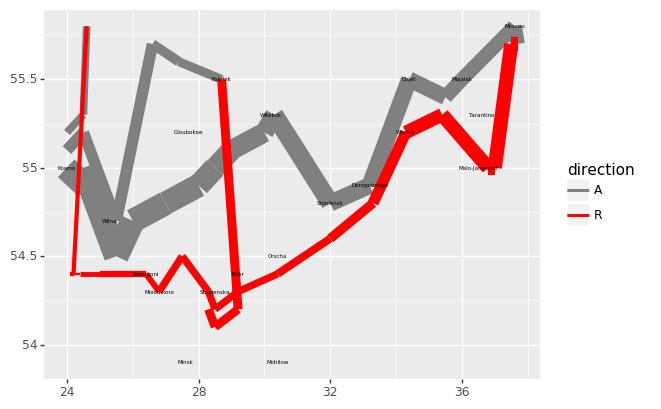

<ggplot: (8726647465806)>

In [33]:
from mizani.formatters import scientific_format
plot_polished = (plot_both \
                 + scale_size_continuous((1,10),breaks=(1,2,3)*10**5) \
                 + scale_color_manual(values=('grey','red')) \
                 + xlab('') \
                 + ylab('') \
                 #+ scale_x_continuous(expand(2))
                 #+ scale_y_continuous(labels = scientific_format(digits=2)) \
                )
plot_polished

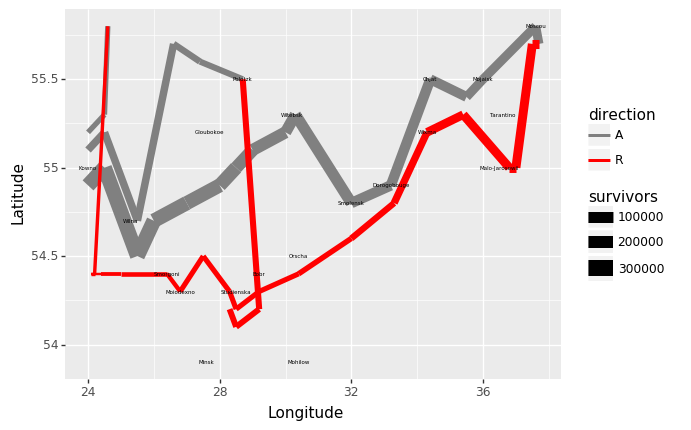

<ggplot: (-9223363310207530822)>

In [34]:
plot_polished2 = (plot_both \
                 #+ scale_size((1,10),breaks=(1,2)*100000) \
                 + scale_color_manual(values=('grey','red')) \
                 + xlab('Longitude') \
                 + ylab('Latitude') \
                )
plot_polished2

<div class='alert alert-block alert-info'>
    <h1>
        <b>End of Error Case</b>
    </h1>
</div>

### Histograms
Learnings:
* calculated aesthetics for y-Variables can be used with **stat='bin'**
* the R-specific notation for calculations that are not present in the data are like this: **..count..**,**..density..**
    * but remember to put stat='bin' first
    * usage like: *y="..count../max(..count..)"*

   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39


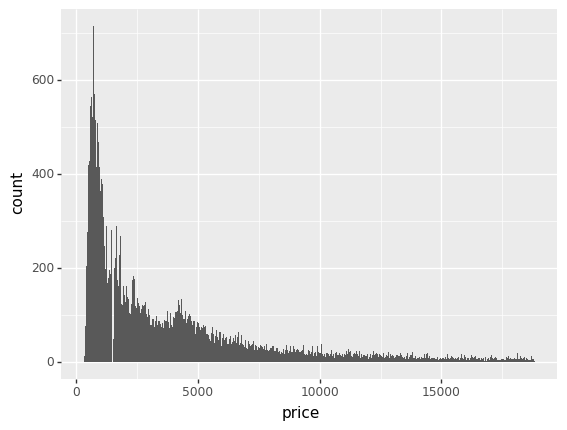

<ggplot: (8726637702678)>


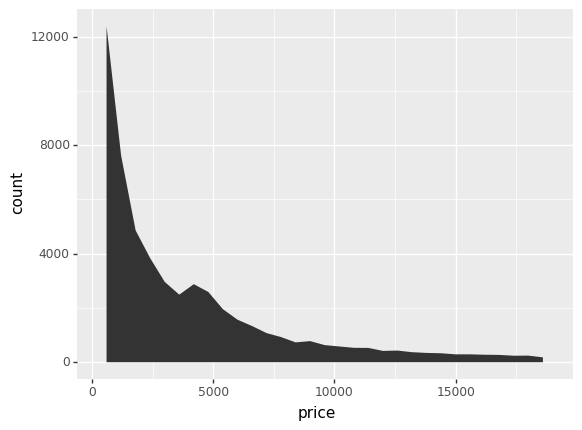

<ggplot: (-9223363310209015068)>


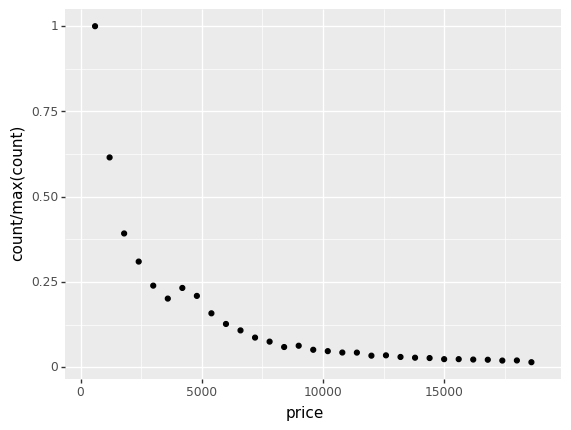

<ggplot: (-9223363310209015152)>


In [35]:
#note the importance of the 'binwidth' parameter to achieve a suiting level of detail
print(diamonds.head(10))
pricePlot1 = (ggplot(diamonds,aes('price')) \
        + geom_col(stat='bin') \
        )
pricePlot2 = (ggplot(diamonds,aes('price')) \
        + geom_col(stat='bin',binwidth=20) \
        )
pricePlot3 = (ggplot(diamonds,aes(x='price')) \
        + geom_area(stat='bin',binwidth=600) \
        )
pricePlot4 = (ggplot(diamonds,aes(x='price')) \
        + geom_point(stat='bin',binwidth=600) \
        )
pricePlot5 = (ggplot(diamonds,aes(x='price')) \
        + geom_point(aes(y='..count../max(..count..)'),stat='bin',binwidth=600) \
        )
pricePlot6 = (ggplot(diamonds,aes(x='price')) \
        + geom_point(aes(y='..density../sum(..density..)'),stat='bin',binwidth=600) \
        )
#print(pricePlot1)
print(pricePlot2)
print(pricePlot3)
#print(pricePlot4)
print(pricePlot5)
#print(pricePlot6)

---

<div class='alert alert-block alert-info'>
    <h1>
        <b>Save for later: Polar Coordinate System Charts<b>
    </h1>
</div>

See example from chapter 6.2 of "A Layered Grammar of Graphics" pdf

In [36]:
#plotnine currently does not support polar coordinate systems!

#(ggplot(diamonds,aes(x="",fill='clarity')) \
#    + geom_bar(width=1) \
#    + coord_polar(theta='y') \
#)

Plotly Express:

In [37]:
#import plotly.express as px
#diamondsDf_px = diamonds
#fig = px.scatter_polar(diamondsDf_px,r='price',theta='clarity')
#fig.show()

# Not working yet
# See url for more details:
# https://plot.ly/python/polar-chart/#polar-chart-with-plotly-express

Matplotlib Pyplot:

In [38]:
#import matplotlib.pyplot as plt
#fig2 = plt.figure()
#ax = fig.add_subplot(111,projection='polar')
#c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

# Not working yet
# See url for more details:
# https://matplotlib.org/gallery/pie_and_polar_charts/polar_scatter.html

---
---

### 3.3 - Aesthetic mappings

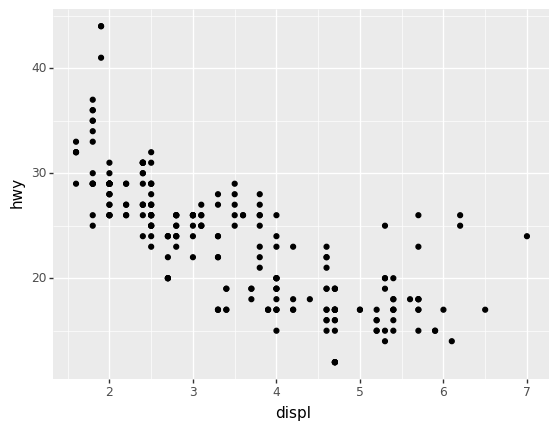

<ggplot: (8726648009024)>


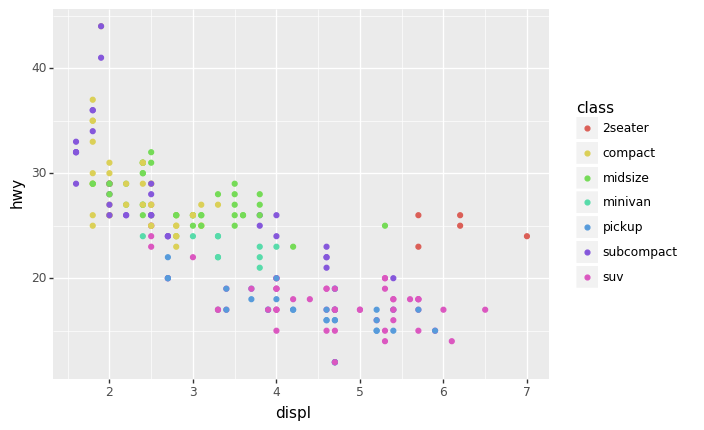

<ggplot: (-9223363310207261496)>


/home/daniel/.local/lib/python3.6/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using alpha for a discrete variable is not advised.
  PlotnineWarning


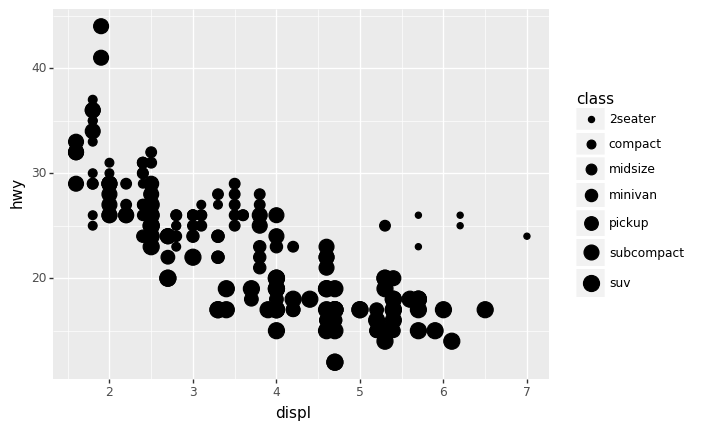

<ggplot: (-9223363310207027298)>


/home/daniel/.local/lib/python3.6/site-packages/plotnine/scales/scale_alpha.py:70: PlotnineWarning: Using alpha for a discrete variable is not advised.
  PlotnineWarning


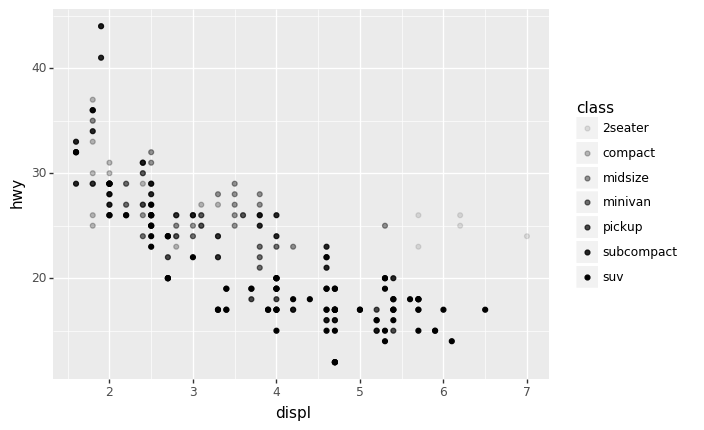

<ggplot: (-9223363310207410018)>


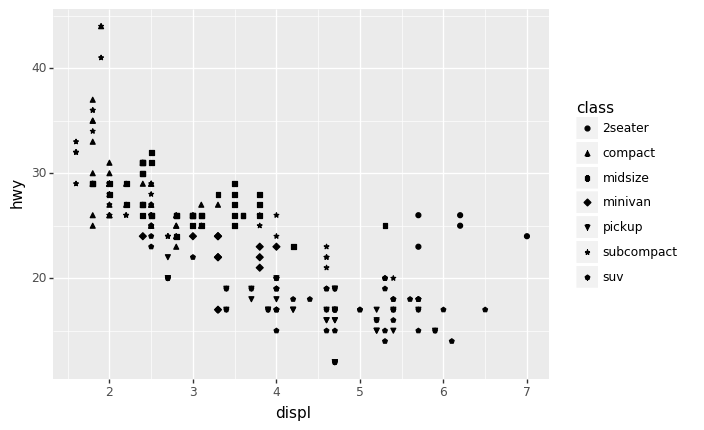

<ggplot: (8726647309758)>


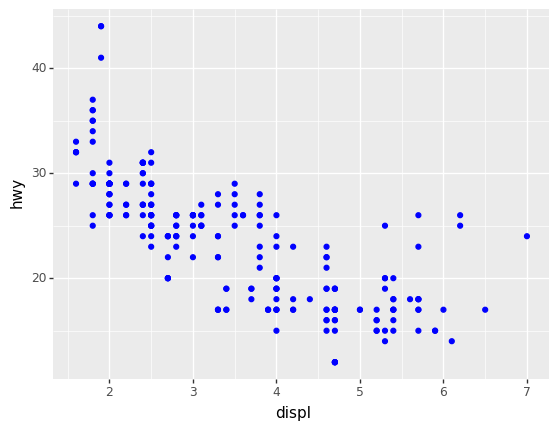

<ggplot: (-9223363310207306450)>


In [39]:
print(qplot('displ','hwy',mpgDf))
# different color per class
print(qplot('displ','hwy',mpgDf,color='class'))
# different size per class (not advised for discrete variables!)
print(qplot('displ','hwy',mpgDf,size='class'))
# different transparency per class
print(qplot('displ','hwy',mpgDf,alpha='class'))
# different shape per class
print(qplot('displ','hwy',mpgDf,shape='class'))

#print(qplot('displ','hwy',mpgDf,color='blue'))
# attention: qplot handles all the attributes as Aesthetics ('aes') which is why the color attribute 'blue'
# is being looked up in the variables instead of just handling it as the color blue itself
# therefore we need to use the full ggplot instead to specify the color outside of the aes

# see correct solution below:
print((ggplot(mpgDf) \
       +geom_point(aes('displ','hwy'),color='blue')) \
     )

# for testing purposes:
#print(qplot('hwy','cyl',mpgDf))
#print(qplot('class','drv',mpgDf))

### 3.3.1 Exercises

*run the code below to see the examples*

1. The points are not blue because the color attribute is specified in the aesthetics parameter. ggplot then looks for a variable named 'blue' to assign it a color scaling
2. According to the table we can see that the following attributes are continuous: displ, cycl, cty, hwy. The rest are categorical variables. It might be discussed though, that cyl is also a categorical variable due to its limited set of possible values.
3. Color & Size are mapped in a continuous manner. Shape cannot be mapped because there is only a limited amount of shapes available.
4. All scale aesthetics apply at the same time & may probably highlight the differences between the options. But may also lead to confusion.
5. Stroke determines the width of the border for shapes that can have a color filling.
6. The aesthetic will then apply to a statement and result in a boolean

In [40]:
# 1.)
#print((ggplot(mpgDf) \
#       +geom_point(aes('displ','hwy'),color='blue')) \
#     )


# 2.)
mpg.head(10)


# 3.)
# color:
#print((ggplot(mpgDf) \
#       + geom_point(aes('class','hwy',color='displ'))) \
#     )

# size:
#print((ggplot(mpgDf) \
#       + geom_point(aes('class','hwy',size='displ')) \
#      ))

# leads to an error (too few shapes available):
#print((ggplot(mpgDf) \
#       + geom_point(aes('class','hwy',shape='displ'))) \
#     )


# 4.)
# multiple scales to one aesthetic:
#print((ggplot(mpgDf) \
#       + geom_point(aes('displ','hwy',color='class',size='class'))) \
#     )


# 5.)
# stroke:
#print((ggplot(mpgDf) \
#       + geom_point(aes('displ','hwy'),shape='8',stroke=0.6,fill='white')) \
#     )


# 6.)
# apply scale aesthetics to a statement rather than a variable
#print((ggplot(mpgDf) \
#       + geom_point(aes('displ','hwy',color='displ<5'))) \
#     

manufacturer       model  displ  year  cyl       trans drv  cty  hwy fl  \
0         audi          a4    1.8  1999    4    auto(l5)   f   18   29  p   
1         audi          a4    1.8  1999    4  manual(m5)   f   21   29  p   
2         audi          a4    2.0  2008    4  manual(m6)   f   20   31  p   
3         audi          a4    2.0  2008    4    auto(av)   f   21   30  p   
4         audi          a4    2.8  1999    6    auto(l5)   f   16   26  p   
5         audi          a4    2.8  1999    6  manual(m5)   f   18   26  p   
6         audi          a4    3.1  2008    6    auto(av)   f   18   27  p   
7         audi  a4 quattro    1.8  1999    4  manual(m5)   4   18   26  p   
8         audi  a4 quattro    1.8  1999    4    auto(l5)   4   16   25  p   
9         audi  a4 quattro    2.0  2008    4  manual(m6)   4   20   28  p   

     class  
0  compact  
1  compact  
2  compact  
3  compact  
4  compact  
5  compact  
6  compact  
7  compact  
8  compact  
9  compact

----
----

### 3.5 Facets

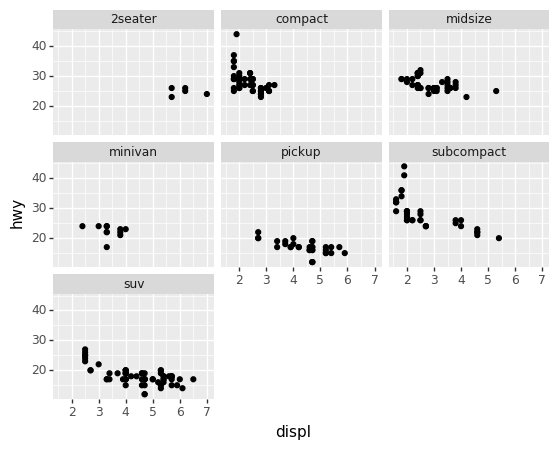

<ggplot: (-9223363310207184594)>


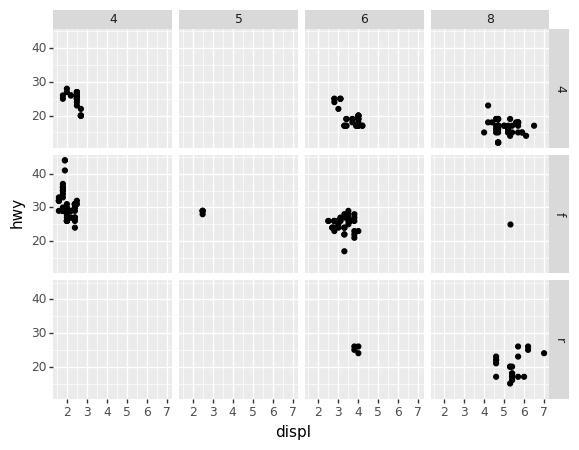

<ggplot: (8726647657890)>


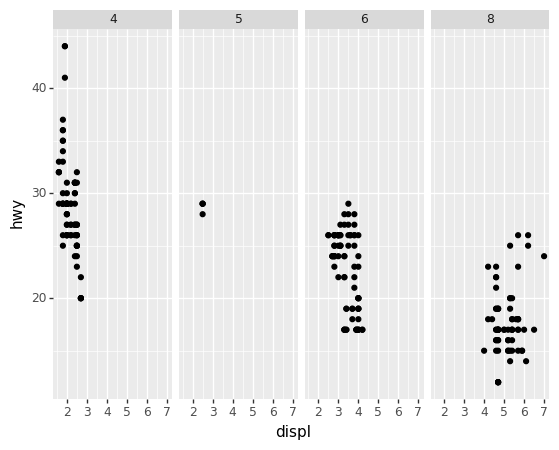

<ggplot: (-9223363310208495914)>


In [41]:
# facet splits the plots into subplots which each display a subset of the data
print(ggplot(mpgDf) \
     + geom_point(aes('displ','hwy')) \
     + facet_wrap('class',nrow=3) \
     )

# grid combines two facet_wrap views
print(ggplot(mpgDf) \
     + geom_point(aes('displ','hwy')) \
     + facet_grid(('drv','cyl')) \
     )

# only column argument for grid
print(ggplot(mpgDf) \
     + geom_point(aes('displ','hwy')) \
     + facet_grid(('.','cyl')) \
     )

### 3.5.1 Exercises

1. Facetting on a continuous variable displays every subplot where there is an existing data set
2. The empty subplots mean that there are no datasets for this facet variable combination ('drv'x'cyl'). The same is shown in the graph below, only that there the variables are directly mapped on a graph as 'aes' variables
3. the plots facet on one variable and display the graphs either as rows or columns while the x-axis (rows) or y-axis(columns) are only labeled once and the other axis is used to display the specific facetted variable value
4. Common properties of the observed variable due to the scatter can be observed more easily. It will certainly get more difficult when the number of categories grow on the one site. On the other site, as there are more observations, plotting everything in one plot leads to heavy overlapping which - especially when using color - will lead to a strong loss of information. One thing that most prominently gets lost when using facets is the unconditional relationship between x and y (independent of a third variable). 
5. nrow & ncol determine the numbers of rows/columns used to display the plots. The layout is also determined by the "scales" (fixed/free), "shrink" (fit scales to output of statistics instead of raw data), "as.table" (layout like a table) and "dir" (direction horizontal or vertical). Considering the grid, it always displays all possible combinations of one variable per default in a homogenous grid layout. The number of rows and columns is therefore determined by the function.
6. There will be more space for plotting, if the facets are laid out horizontally

In [42]:
# 1.) facet on a continuous variable
#print(ggplot(mpgDf) \
#     + geom_point(aes('cty','hwy')) \
#     + facet_wrap('displ',nrow=2) \
#     )

# 2.) empty cells in facet_grid
#print(ggplot(mpgDf) \
#     + geom_point(aes('drv','cyl')) \
#     )


# 3.)
#print(ggplot(mpgDf) \
#     + geom_point(aes('displ','hwy')) \
#     + facet_grid(('drv','.')) \
#     )
#print(ggplot(mpgDf) \
#     + geom_point(aes('displ','hwy')) \
#     + facet_grid(('.','cyl')) \
#     )


# 4.)
#print(ggplot(data = mpgDf) \
#      + geom_point(aes(x = 'displ', y = 'hwy')) \
#      + facet_wrap('class', nrow = 2) \
#)
#print(ggplot(data = mpgDf) \
#      + geom_point(aes(x = 'displ', y = 'hwy',color='class')) \
#     )


# 5.)


# 6.)
#print(ggplot(data=mpgDf) \
#     + geom_point(aes('displ','hwy')) \
#     + facet_grid(('cyl','drv')) \
#     )


----
----

### 3.6 Geometric Objects

#### **Attention**:
For smoothing using plotnine, the package **scikit-misc** should be installed (via pip), because otherwise things like confidence intervals will not be calculated and the smoothing will not be as good as it could be.

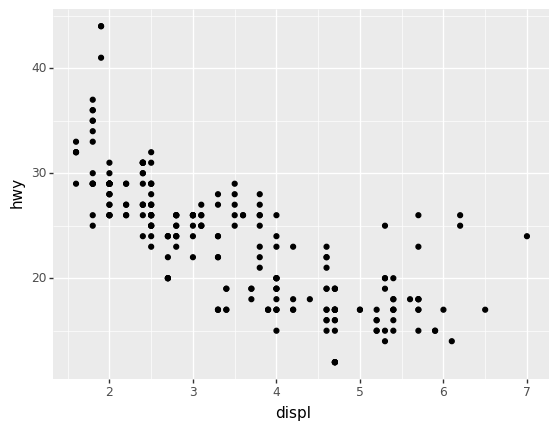

<ggplot: (8726647514141)>


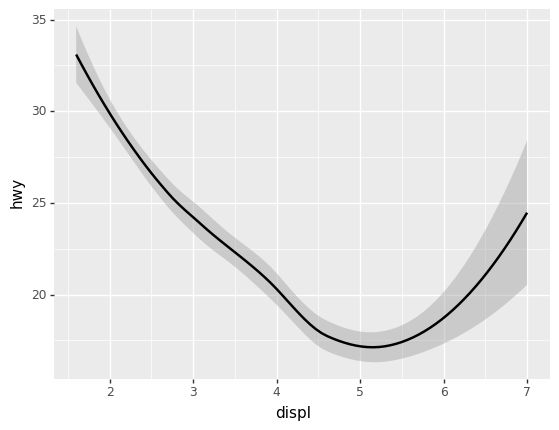

<ggplot: (8726641861142)>


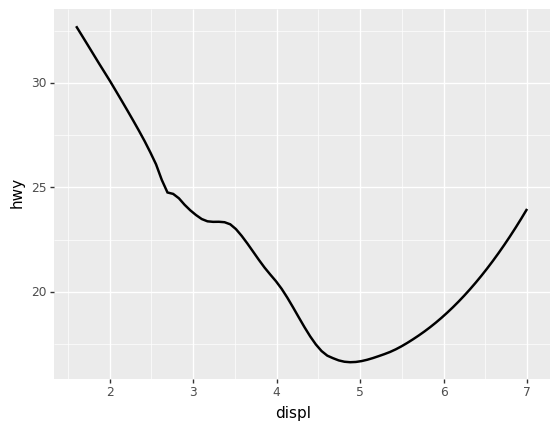

<ggplot: (8726641567976)>


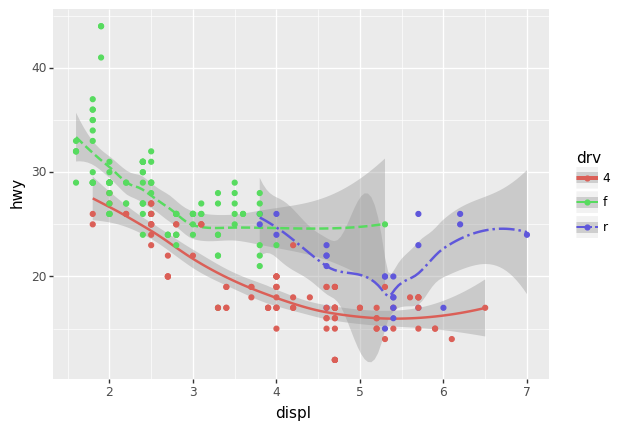

<ggplot: (8726641539055)>


In [43]:
print(ggplot(data=mpg) +\
      geom_point(aes(x="displ", y="hwy")) \
     )

print(ggplot(data=mpg) +\
      geom_smooth(aes(x="displ",y="hwy")) \
     )

# using "span", the smoothness of the curve can be manipulated (smaller number = more wiggly, bigger number = smoother)
# using "se", the display of the confidence intervall (grey shadow) can be disabled (enabled per default)
print(ggplot(data=mpg) +\
      geom_smooth(aes(x="displ",y="hwy"),span=.45,se=False) \
     )

print(ggplot(data=mpg) +\
      geom_smooth(aes(x="displ", y="hwy", color="drv", linetype="drv")) +\
      geom_point(aes(x="displ",y="hwy",color="drv"))
     )

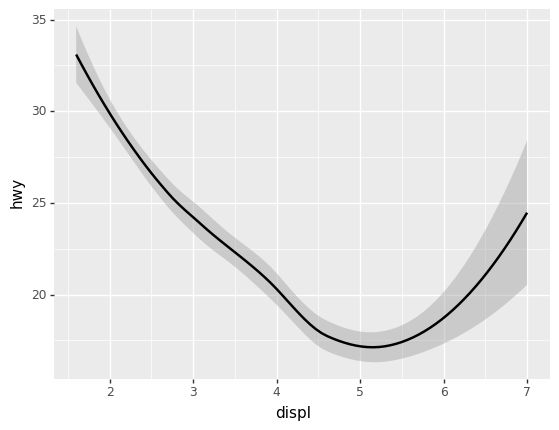

<ggplot: (-9223363310207600124)>


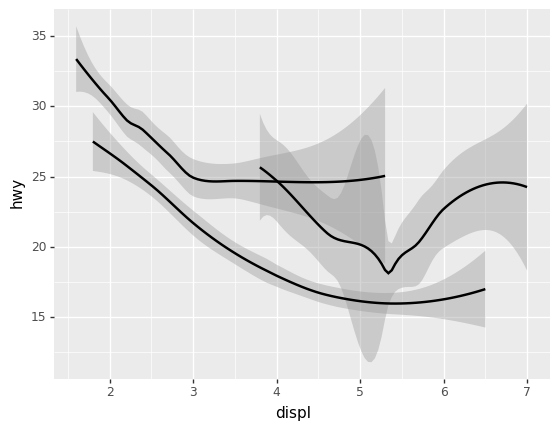

<ggplot: (-9223363310212914628)>


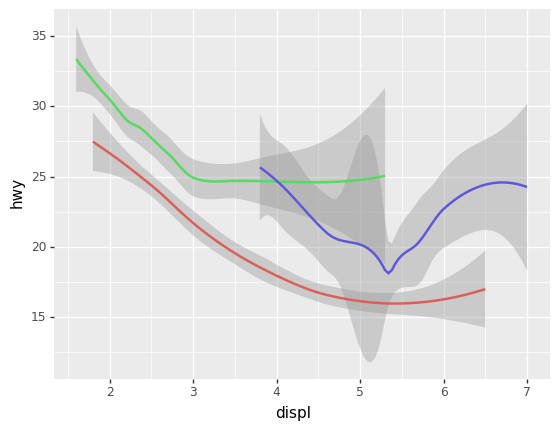

<ggplot: (-9223363310211731028)>


In [44]:
print(ggplot(data=mpg) +\
     geom_smooth(mapping=aes(x="displ",y="hwy")) \
     )

print(ggplot(data=mpg) +\
     geom_smooth(mapping=aes(x="displ",y="hwy",group="drv")) \
     )

print(ggplot(data=mpg) +\
     geom_smooth(mapping=aes(x="displ",y="hwy",color="drv"),show_legend=False) \
     )

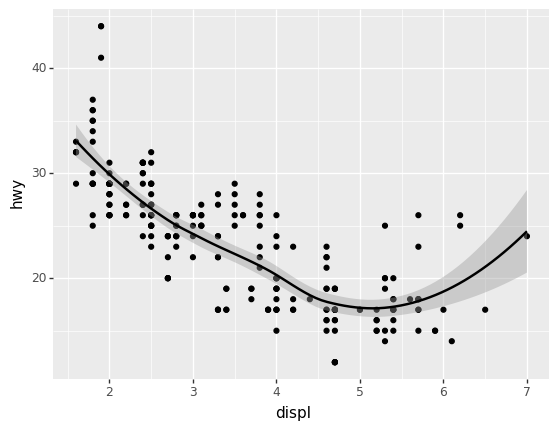

<ggplot: (-9223363310211717502)>


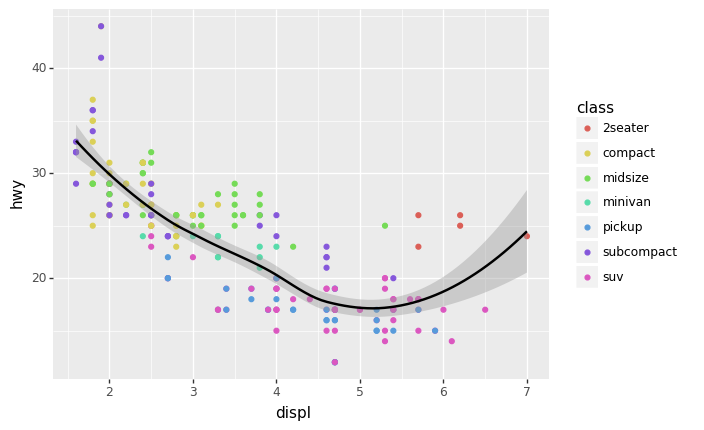

<ggplot: (-9223363310212500960)>


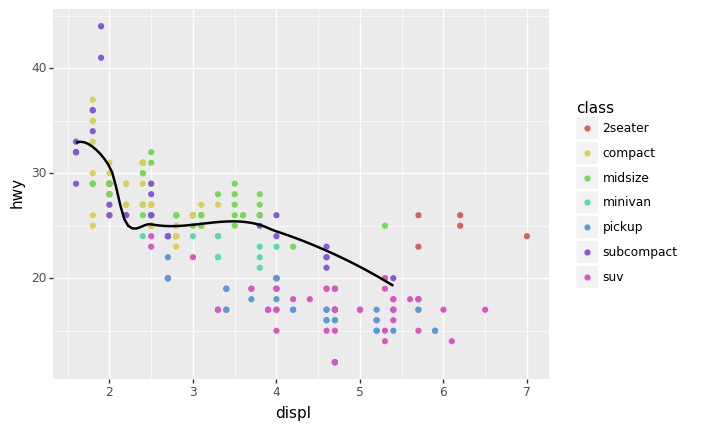

<ggplot: (-9223363310212532066)>


In [45]:
# this:
#print( \
#     ggplot(data = mpg) +\
#     geom_point(mapping=aes(x = "displ", y = "hwy")) +\
#     geom_smooth(mapping = aes(x = "displ", y = "hwy")) \
#     )
# is the same as:
print( \
     ggplot(data = mpg, mapping = aes(x = "displ", y = "hwy")) +\
     geom_point() +\
     geom_smooth() \
     )
# due to the global mapping that applies to every layer
# but we can modify it for each layer:
print( \
      ggplot(data = mpg, mapping = aes(x=  "displ",y = "hwy")) +\
      geom_point(mapping = aes(color = "class")) +\
      geom_smooth() \
     )
# we can even select different datasets for each layer:
print( \
      ggplot(data = mpg, mapping = aes(x=  "displ",y = "hwy")) +\
      geom_point(mapping = aes(color = "class")) +\
      geom_smooth(data = mpg.loc[mpg["class"]=="subcompact"], se = False) \
     )

### 3.6.1 Exercises

1. Line Chart : geom_smooth, boxplot: geom_boxplot, histogram: geom_histogram, area chart: geom_area
2. 
3. "show_legend = False" removes the legend for a third variable that the plot is grouped by etc. It may help to reduce the amount of information available and therefore help the viewer to view the plot in a different way / observe certain patterns of it more closely.
4. The "se" argument in geom_smooth removes the shadowed area that indicates the confidence interval
5. No the graphs will not look different, because it does not matter if you set the properties of each layer globally once or if you define the same properties in each layer separately.
6. 

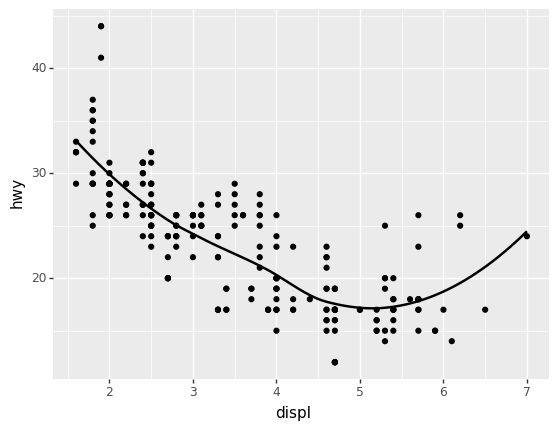

<ggplot: (-9223363310212662454)>


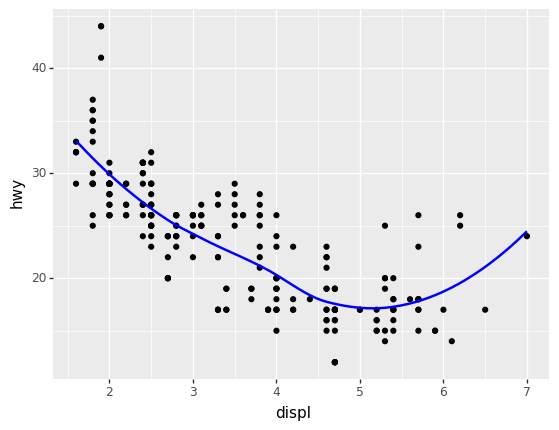

<ggplot: (8726642115290)>


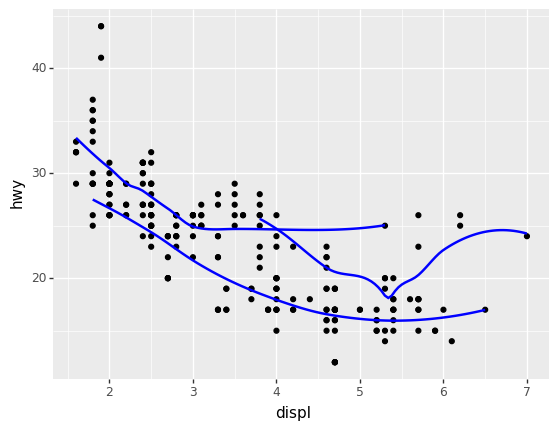

<ggplot: (-9223363310212654143)>


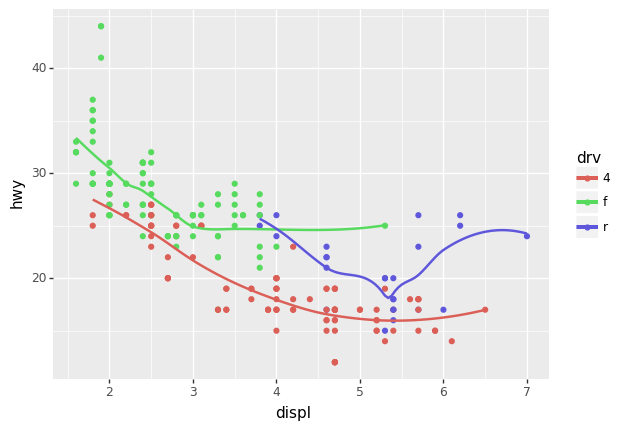

<ggplot: (-9223363310212660592)>


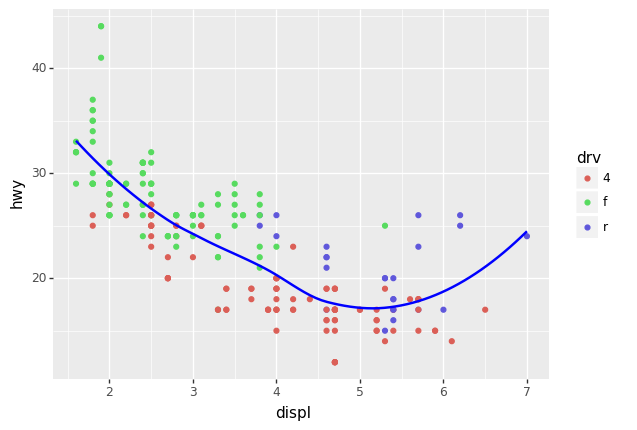

<ggplot: (8726642243711)>


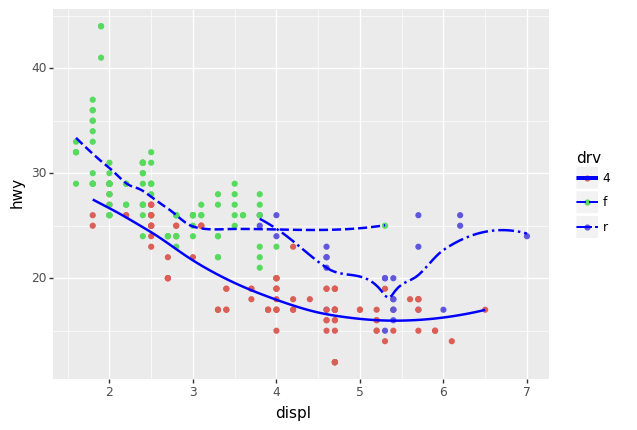

<ggplot: (8726642246264)>


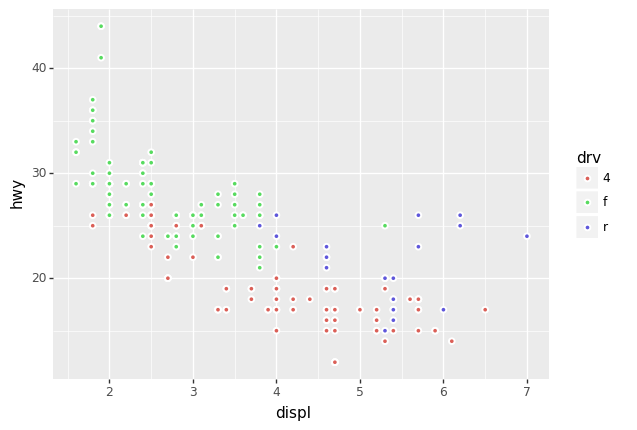

<ggplot: (-9223363310211721009)>


In [46]:
# 1. 


# 2. 
print( \
     ggplot(data = mpg, mapping = aes(x = "displ", y = "hwy")) +\
     geom_point() +\
     geom_smooth(se = False) \
     )


# 3. 


# 4. 


# 5.
#print( \
#     ggplot(data = mpg, mapping = aes(x = "displ", y = "hwy")) +\
#     geom_point() +\
#     geom_smooth() \
#     )
#print( \
#     ggplot() +\
#     geom_point(data = mpg, mapping = aes(x = "displ", y = "hwy")) +\
#     geom_smooth(data = mpg, mapping = aes(x = "displ", y = "hwy")) \
#     )


# 6.
print( \
     ggplot(data = mpg, mapping = aes(x = "displ", y = "hwy")) +\
     geom_point() +\
     geom_smooth(se = False, color = "blue") \
     )
print( \
     ggplot(data = mpg, mapping = aes(x = "displ", y = "hwy")) +\
     geom_point() +\
     geom_smooth(mapping = aes(group = "drv"), se = False, color = "blue") \
     )
print( \
     ggplot(data = mpg, mapping = aes(x = "displ", y = "hwy", color = "drv")) +\
     geom_point() +\
     geom_smooth(mapping = aes(group = "drv"), se = False) \
     )
print( \
     ggplot(data = mpg, mapping = aes(x = "displ", y = "hwy", color = "drv")) +\
     geom_point() +\
     geom_smooth(se = False, color = "blue") \
     )
print( \
     ggplot(data = mpg, mapping = aes(x = "displ", y = "hwy", color = "drv")) +\
     geom_point() +\
     geom_smooth(mapping = aes(linetype = "drv"), se = False, color = "blue") \
     )
print( \
     ggplot(data = mpg, mapping = aes(x = "displ", y = "hwy")) +\
     geom_point(mapping = aes(fill = "drv"), color = "white", stroke = 0.8) \
     )

----
----

### 3.7 Statistical Tranformations

Pay attention to how computed variables are taken from numpy (np):
Also note, that the ymin and ymax parameter syntax is "fun_*"

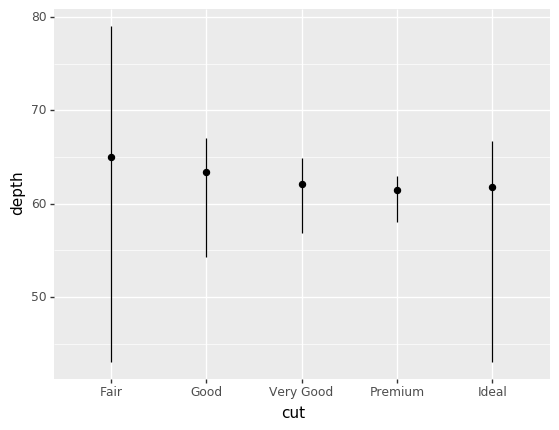

<ggplot: (-9223363310211570737)>


In [47]:
print(ggplot(data=diamonds) +\
    stat_summary(
    mapping=aes(x="cut", y="depth"),
    fun_ymin=np.min,
    fun_ymax=np.max,
    fun_y=np.median
    )
)

### 3.7.1 Exercises

1. -

2. geom_col does not use a stat (transformation), which geom_bar does. So geom_col only has aestethic features while using the real values and geom_bar does transform the values and sets the y to be the row count

3. see the r4ds solution at: https://jrnold.github.io/r4ds-exercise-solutions/data-visualisation.html#exercise-3.7.3

4. stat_smooth does a smoothing on the real values of 2 variables, computing a smoothed curve that represents the general relation the two variables have

5. The problem with the two graphs is, that the proportions are calculated inside the groups. And there is one group for each discrete variable. Whereas when the group is set to be only one, then the proportions need to be calculated based on the sum of all variable counts. The issue with the filling is, that this already somehow creates some kind of grouping **(?)** So what you do is you explicitly name the calculation of the y-variable to be the proportion of the sum.

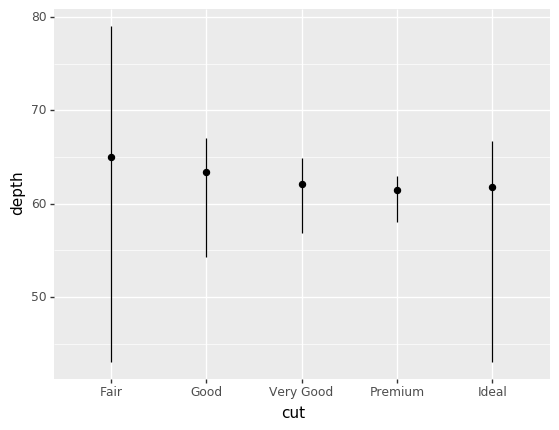

<ggplot: (-9223363310208942788)>


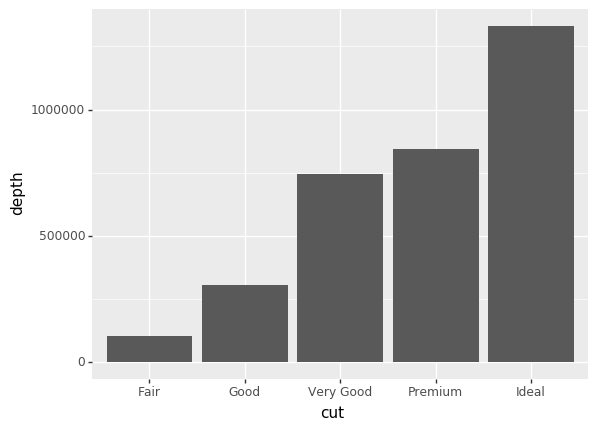

<ggplot: (-9223363310208941266)>


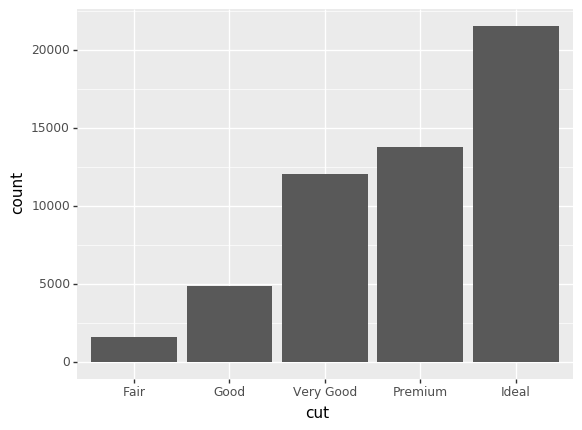

<ggplot: (8726646230241)>


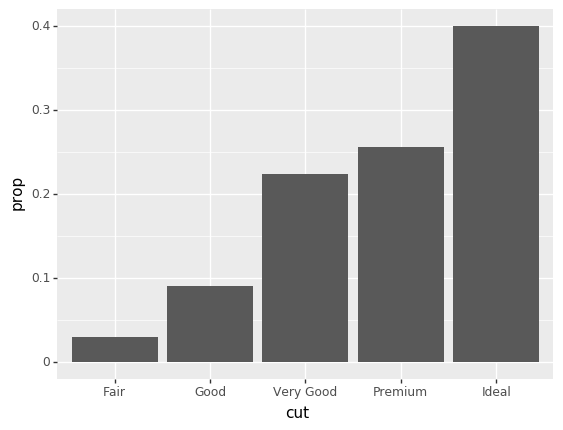

<ggplot: (-9223363310206957764)>


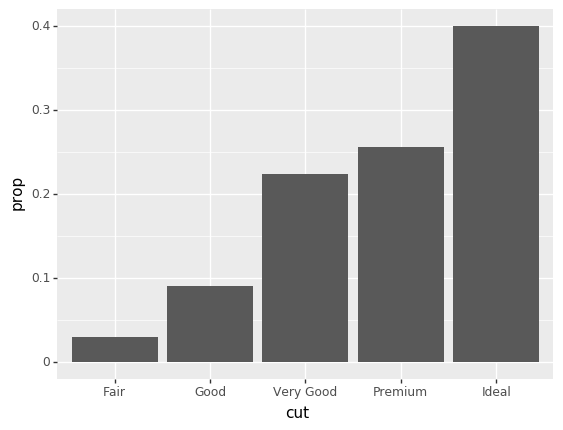

<ggplot: (-9223363310207250225)>


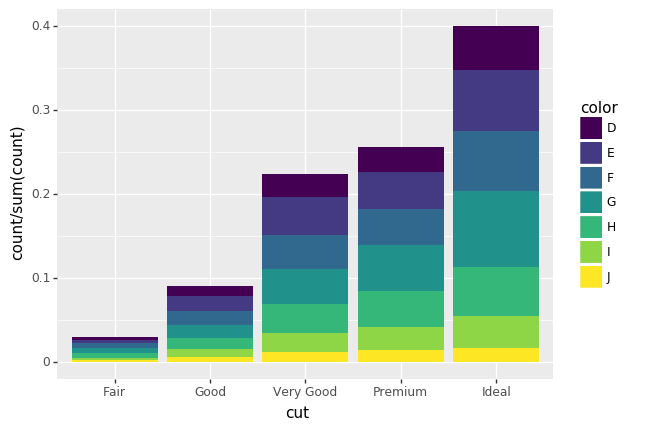

<ggplot: (8726622879471)>


In [48]:
# 1.
# the default stat for "pointrange" is "identity"
# note that you need to specify the stat "summary" and with that also specify the ymin/ymax/y variable
print(ggplot(data=diamonds) +
    geom_pointrange(mapping=aes(x="cut", y="depth"),
    stat="summary",
    fun_ymin = np.min,
    fun_ymax = np.max,
    fun_y = np.median
    )
)

# 2.
# geom_col does not use a stat transformation, you need to map x & y explicitly
# that means the geom_col is only an aesthetic graph
# so the y is the 
print(ggplot(data=diamonds) +
    geom_col(mapping = aes(x = "cut", y = "depth"))
)
# geom_bar uses stat_count as a default transformation
# so y axis is the count
print(ggplot(data=diamonds) +
    geom_bar(mapping = aes(x = "cut"))
)

# 5.
print(ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = "cut", y = "..prop..", group = 1))
)

print(ggplot(data = diamonds) + 
    geom_bar(mapping = aes(x = "cut", y = "..prop.."),group = 1)
)

print(ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = "cut", fill = "color", y = "..count../sum(..count..)"))
)

----
----

### 3.8 Position Adjustments

### 3.8.1 Exercises

1. The graph seems to be overplotted and the distribution very "smooth". Although the general information of the graph has been preserved, the addition of jittering will show more closely where there is more information available and for which x values there is a wider range of y values.
2. height & width
3. geom_jitter reduces overplotting by displaying all observations without overlapping them due to an addition of a random noise which gives a better insight into concentrations of points. geom_count on the other hand reduces overplotting by displaying the same points as geom_point, but with different sizes that represent the number of overlapping observations for each value pair. Both are a useful way to show where the observations are focused in the plot. Through the size of the geom_count dots, the plot itself may result in overplotting, especially when a third aesthetic like color is introduced. Also it is to be noted, that jittering slightly changes the values of the observations while count keeps the exact values of our observations.
4. geom_boxplots uses position_dodge2 which jitters the boxplots horizontally (but not vertically) so that they are placed side by side for a discrete variable instead of overlapping. If position_identity is used, they do overlap.

# 1. 
print(ggplot(data = mpg, mapping = aes(x = "cty", y = "hwy")) +
    geom_jitter()
)

print(ggplot(data = mpg, mapping = aes(x = "cty", y = "hwy")) +
    geom_smooth()
)
# 2.
print(ggplot(data = mpg, mapping = aes(x = "cty", y = "hwy")) +
    geom_jitter(height=0.8,width=0.8)
)
print(ggplot(data = mpg, mapping = aes(x = "cty", y = "hwy")) +
    geom_count()
)

# 4.
# also note the exclusion of the axis ticks below + the ways it does NOT work
print(ggplot(data = mpg, mapping = aes(x = "drv", y = "hwy")) +
    geom_boxplot(aes(color="class")) +
    scale_x_discrete(labels="")
    #theme(axis_text_x = element_text())
)

print(ggplot(data = mpg, mapping = aes(x = "drv", y = "hwy")) +
    geom_boxplot(aes(color="class"), position = "identity")
    #theme(axis_text_x = element_text())
)

### 3.9 Coordinate Systems

### 3.9.1 Exercises

1. Polar coordinates are not implemented yet
2. labs() can be used to define the plot title, axis titles, and a caption to a plot.
3. geom_map() projects a spherical map onto a 2d view which implies that straight lines are not preserved. geom_quickmap() on the other hand preserves straight lines because it does not use a spherical model as a basis. This means that quickmap is better to only be used on smaller scales which are close to the equator. Unfortunately, plotnine does not have coord_quickmap() yet
4. The issue here is, that withoud a fixed coordinate system, the line that serves as a copmparison/reference would not have a 45° angle, although its slope is 1. It is important for reference lines that they have a 45° angle because other angles will interfere with the human perception of the plot. The abline per default uses a slope of 1 (can be changed, as well as the x and y intercept).

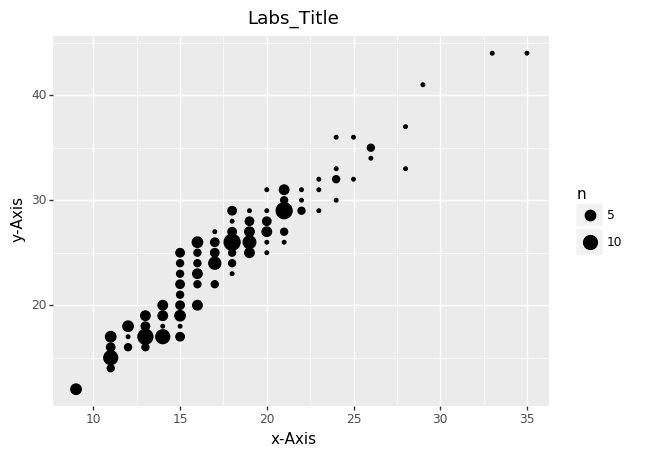

<ggplot: (8726642168310)>


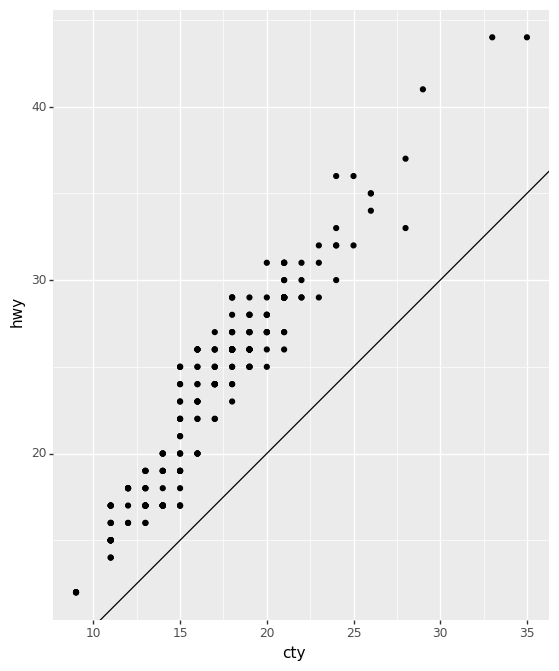

<ggplot: (-9223363310212645909)>


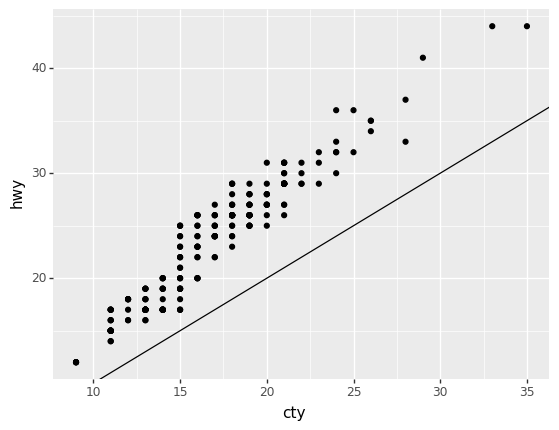

<ggplot: (-9223363310212715299)>


In [50]:
# 1. Polar coordinates are not implemented yet !


# 2. unfortunately, subtitles & captions are not available as of now
print(ggplot(data = mpg, mapping = aes(x = "cty", y = "hwy")) +
    geom_count() +
    labs(title = "Labs_Title", 
    #subtitle = "Labs_Subtitle", caption = "Labs_Caption"
    ) +
    labs(x = "x-Axis", y = "y-Axis")
)


# 3. coord_quickmap() does not exist for plotnine yet !
#print(ggplot(data = nz, mapping = aes("long", "lat", group = 1)) +
#    geom_polygon(fill = "white", colour = "black") +
#    coord_quickmap()
#)

# 4.
print(ggplot(data = mpg, mapping = aes(x = "cty", y = "hwy")) +
    geom_point() + 
    geom_abline() +
    coord_fixed()
)
print(ggplot(data = mpg, mapping = aes(x = "cty", y = "hwy")) +
    geom_point() + 
    geom_abline()
)

----
----

## 5 Data Transformation

The following transformation operations may also be done by using *dfply*, a dplyr-Implementation in Python:  
https://towardsdatascience.com/dplyr-style-data-manipulation-with-pipes-in-python-380dcb137000  
https://itsalocke.com/blog/python-and-tidyverse/

### Basic Pandas Tutorial:
https://www.python-kurs.eu/pandas.php

### R - Pandas Comparison:
https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_r.html

#### Example for simple Pandas Series:

In [ ]:
s1 = pd.Series([11, 28, 7, 4, 123, 45, 76])
print(s1)
print("------------")
print(s1.index)
print(s1.values)

#### Comparison with NumPy:

In [ ]:
a1 = np.array([11, 28, 7, 4, 123, 45, 76])
print(a1)
print("------------")
print(s1.values)
print(type(s1.values), type(a1))

#### Series-Object with custom indices:
1. A series with a custom index
2. Addition of 2 series with the same index
3. Sum of the values of one series
4. Addition of 2 series with partially different indices
5. Addition of 2 series with fully different indices

In [3]:
fruits = ["apples", "oranges", "cherries", "pears"]
fruits2 = ["apples", "raspberries", "cherries", "pears"]
fruits3 = ["pineapples", "strawberries", "mangos", "passionfruits"]
q1 = [34, 20, 86, 54]
q2 = [100,100,100,100]
s2 = pd.Series(q1, index=fruits)
s3 = pd.Series(q2, index=fruits)
s4 = pd.Series(q1, index=fruits2)
s5 = pd.Series(q1, index=fruits3)
print(s2)
print("------")
print(s3)
print("------")
print("Summe:")
print(s2+s3)
print("Summe alle values von s2:", sum(s2))
print("------")
print(s3+s4)
print("------")
print(s2+s5)

apples      34
oranges     20
cherries    86
pears       54
dtype: int64
------
apples      100
oranges     100
cherries    100
pears       100
dtype: int64
------
Summe:
apples      134
oranges     120
cherries    186
pears       154
dtype: int64
Summe alle values von s2: 194
------
apples         134.0
cherries       186.0
oranges          NaN
pears          154.0
raspberries      NaN
dtype: float64
------
apples          NaN
cherries        NaN
mangos          NaN
oranges         NaN
passionfruits   NaN
pears           NaN
pineapples      NaN
strawberries    NaN
dtype: float64


#### Using indices to access data:

In [4]:
# displaying only one index
print(s2["apples"])
print("------")
# displaying multiple indices
print(s2[["apples", "oranges", "cherries"]])
# filtering over values
print("------")
print(s2[s2>40])

34
------
apples      34
oranges     20
cherries    86
dtype: int64
------
cherries    86
pears       54
dtype: int64


#### Using numpy calculations on Pandas series:

In [5]:
print((s2 + 5) * 3)
print("-------")
print(np.sin(s2))

apples      117
oranges      75
cherries    273
pears       177
dtype: int64
-------
apples      0.529083
oranges     0.912945
cherries   -0.923458
pears      -0.558789
dtype: float64


#### Pandas apply

In [6]:
print(s2.apply(np.log))
res1 = s2.apply(lambda x: x if x>50 else x+10)
print("------")
print(s2)
print("------")
print("after lambda:\n")
print(res1)

apples      3.526361
oranges     2.995732
cherries    4.454347
pears       3.988984
dtype: float64
------
apples      34
oranges     20
cherries    86
pears       54
dtype: int64
------
after lambda:

apples      44
oranges     30
cherries    86
pears       54
dtype: int64


#### Pandas Series & Python Dictionaries
A Dictionary may be provided to create a series. In this case the keys will be treated as the index. Basically a series is a dictionary with a fixed length.

In [ ]:
cities = {"London":    8615246, 
          "Berlin":    3562166, 
          "Madrid":    3165235, 
          "Rome":      2874038, 
          "Paris":     2273305, 
          "Vienna":    1805681, 
          "Bucharest": 1803425, 
          "Hamburg":   1760433,
          "Budapest":  1754000,
          "Warsaw":    1740119,
          "Barcelona": 1602386,
          "Munich":    1493900,
          "Milan":     1350680}
city_series  = pd.Series(cities)
print(city_series)
print("------------")
# missing data with series
my_cities = ["London", "Paris", "Frankfurt", "Budapest", "Munich", "Stockholm"]
my_cities_series = pd.Series(cities, index=my_cities)
print(my_cities_series)

#### Dealing with missing values

In [ ]:
# identifying missing data
print(my_cities_series.isnull())
print(my_cities_series.notnull())
print("------------")
# how None and NaN relate
d1 = {"a":23, "b":45, "c":None, "d":0}
s6 = pd.Series(d1)
print(s6)
print("------")
print(s6.isnull())

# dealing with missing data: DROP NaN
print("------------")
print(my_cities_series.dropna())
# dealing with missing data: FILL NaN with 0
print("------")
print(my_cities_series.fillna(0))
# fill missing data with a dictionary
print("------")
missing_cities = {"Frankfurt":890765, "Stockholm":2780650}
# note: "inplace  = True" commits the operation on the same object, changing "my_cities_series"
# if "inplace = False" (which is the default), you would need to assign the operation to a new object,
# starting with: "new_object = my_cit..."
my_cities_series.fillna(missing_cities, inplace = True)
print(my_cities_series)
# convert values to integer
print("------")
my_cities_series_int = my_cities_series.astype(int)
print(my_cities_series_int)

### Basic Pandas Operations with Dataframes

In [ ]:
flightsDf = pd.read_table("~/Jupyter_Lab/Datasets/flights.csv",sep=",",header=0)
print("List Datatypes:\n")
display(flightsDf.dtypes)
print("-------")
print("Head first rows:\n")
display(flightsDf.head())
print("-------")
print("Display Information about the index size:\n")
display(flightsDf.index)
print("-------")
print("Display standard statistics about the data:\n")
display(flightsDf.describe())
print("-------")
df1 = flightsDf.loc[(flightsDf["month"] == 1) & (flightsDf["day"] == 1)]
df2 = (flightsDf["month"] == 1) & (flightsDf["day"] == 1)
df3 = flightsDf.loc[[4],["year","month","day"]]
print("Show datasets with month=1 & day=1:\n")
display(df1)
print("------")
print("Head 10 rows of above filtered dataset:\n")
print(df1.head(10))
print("------")
print("Same condition as above: month=1 & day=1, but this time without the df.loc, but instead just as a condition that outputs a boolean for each dataset:\n")
print(df2)
print("Filtered 3 specific columns for a specific row:\n")
print(df3)
print("-------")
print("Check, how python handles calculations (because R, for example, would not give a result of True as it only approximates the result):\n")
print(np.sqrt((2**2)) == 2)

In [ ]:
df4 = flightsDf[(flightsDf.month == 11) | (flightsDf.month == 12)]
# which is the same as the statement below
print(df4)
print("-------\n")
df5 = flightsDf.loc[(flightsDf["month"] == 11) | (flightsDf["month"] == 12)]
print(df5)

# REVIEW LATER: LAMBDA FUNCTIONS FOR FILTERING?? -> probably not possible, as they only do an operation on a value
#print(str((flightsDf["month"].dtype) == "int64"))
# filtering for values that are above 5:
#df6 = flightsDf.apply(lambda x: x if ((str(type(x)) != "int64") & (str(type(x)) != "float64")) else x if (x>5) else 0)
#print(df6.tail(10))

print("------------\n")
print("Another example for filtering:\n")
df7 = flightsDf.loc[(flightsDf["month"] > 5) & (flightsDf["day"] >5)]
print(df7.head(10))
print("Showing, how many results there are:\n")
print(df7.index)



#### Some more filtering by making use of logical operators

In [ ]:
df8 = flightsDf.fillna(0)
df8 = df8.loc[((df8["arr_delay"] != 0.0) | (df8["dep_delay"] != 0.0))]
# NOTE: the following operation is not possible because the "!" seems to not be allowed as a frame around the other operations
#df8 = df8.loc[!((df8["arr_delay"] == 0.0) | (df8["dep_delay"] == 0.0))]
print("Flights not exactly on time:\n", df8)

### 5.2.4 Exercises

1. Arrival delay >= 120
2. Destination == "IAH" or "HOU"
3. Flights operated by United Airlines (UA), American (AA) or Delta (DL)
4. Departed in Summer (July, August, September)  **NOTE: I will use the pandas.query method from now on**  
5. Arrival delay >= 120, but department delay <= 0
6. Department delay >= 60, but arr_delay < (department delay - 30)
7. department between midnight & 6 am (inclusive)

In [ ]:
# 1.
df9 = flightsDf.loc[flightsDf["arr_delay"] >= 120]
print("1.\n------")
print(df9[["arr_delay"]])
print("------------")

# 2.
df10 = flightsDf.loc[(flightsDf["dest"] == "IAH") | (flightsDf["dest"] == "HOU")]
print("2.\n------")
print(df10[["dest"]])
print("------------")

# 3.
df11 = flightsDf.loc[(flightsDf["carrier"] == "UA") | (flightsDf["carrier"] == "AA") | (flightsDf["carrier"] == "DL")]
print("3.\n------")
print(df11[["carrier"]])
print("------------")

# 4.
df12 = flightsDf.query("month == 7 or month == 8 or month == 9")
# see the ".loc" method below and compare to the query above
#df12 = flightsDf.loc[(flightsDf["month"] == 7) | (flightsDf["month"] == 8) | (flightsDf["month"] == 9)]
print("4.\n------")
print(df12[["month"]])
print("------------")

# 4.2
df17 = flightsDf[flightsDf["month"].between(7,9)]
print("4.2\n------")
print(df17[["month"]])
print("------------")

# 5.
df13 = flightsDf.query("arr_delay >= 120 and dep_delay <= 0")
print("5.\n------")
print(df13[["arr_delay","dep_delay"]])
print("------------")

# 6.
df14 = flightsDf.query("dep_delay >= 60 and arr_delay < (dep_delay - 30)")
print("6.\n------")
print(df14[["arr_delay","dep_delay"]])
print("------------")

# 7.
df15 = flightsDf.query("dep_time >= 0 and dep_time <= 600")
print("7.\n------")
print(df15[["dep_time","sched_dep_time"]])
print("------------")
print("Minimum of dep_time: ",df15["dep_time"].min())
print("------------")

# 7.2 using "Series.between()" instead
print("7.2\n------")
df16 = flightsDf[flightsDf["dep_time"].between(0,600)]
print(df16[["dep_time","sched_dep_time"]])
print("------------")


# 8.
print("8.\n------")
df18 = flightsDf[flightsDf["dep_time"].notnull()]
print(df18[["dep_time"]])
print("------------")

----
----

### 5.3 Arrange Rows

In [ ]:
ndf1 = flightsDf.sort_values(by=["year","month","day"], ascending=True, na_position = "first")
#flightsDf.sort_values(by=["dep_time"], ascending=False, na_position = "last")
print(ndf1[["year", "month", "day"]])

### 5.3.1 Exercises

In [ ]:
# 1.
print("1.\n------------")
ndf1 = flightsDf.sort_values(by=["year","month","day"], ascending=True, na_position = "first")
#flightsDf.sort_values(by=["dep_time"], ascending=False, na_position = "last")
print(ndf1[["year", "month", "day"]])
print("------------")

# NOTE: the following code does not lead to a sorting that places all NaN from all the rows at the top.
#ndf2 = flightsDf.sort_values(by=["year","month","day","dep_time","sched_dep_time","dep_delay","arr_time","sched_arr_time","arr_delay","carrier","flight","tailnum","origin","dest","air_time","distance","hour","minute","time_hour"], ascending=True, na_position = "first")
#print(ndf2)
#print(ndf2.isnull())

# prints all rows where dep_time = Null / NaN
ndf3 = flightsDf.loc[flightsDf["dep_time"].isnull()]
print(ndf3[["dep_time"]])
print("------------")

# 2.
print("2.\n------------")
ndf4 = flightsDf.sort_values(by = ["dep_delay","dep_time"], ascending = [False, True], na_position = "last")
print(ndf4[["dep_delay", "dep_time"]])
print("------------")
ndf4 = flightsDf.sort_values(by = ["dep_time", "dep_delay"], ascending = [True, False], na_position = "last")
print(ndf4[["dep_delay", "dep_time"]])
print("------------")

# 3.
print("3.\n------------")
ndf5 = flightsDf.assign(speed = flightsDf["distance"] / flightsDf["air_time"]).sort_values(by = "speed", ascending = False)
ndf5.speed = ndf5.speed.round(2)
print(ndf5[["speed", "distance", "air_time"]])
print("------------")

# 4.
print("4.\n------------")
ndf6 = flightsDf.sort_values(by = "distance", ascending = True)
ndf7 = flightsDf.sort_values(by = "distance", ascending = False)
print(ndf6[["distance"]])
print(ndf7[["distance"]])
print("------------")



----
----

### 5.4 Data Subsetting

R's "select" is mainly represented by pandas.dataframe.loc:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

In [ ]:
ndf7 = flightsDf[["year", "month", "day"]]
display(ndf7)
print("------")
# which is the same as:
ndf8 = flightsDf.loc[:,["year", "month", "day"]]
display(ndf8)

# conditionals can also be combined with column selection
print("------")
ndf9 = flightsDf.loc[flightsDf["year"] == 2013, ["year", "month", "day"]]
display(ndf9)
print("------------")

# different matching operations

# startswith
ndf10 = flightsDf.loc[flightsDf["carrier"].str.startswith("U")]
display(ndf10[["carrier"]])
print("------")

# endswith
ndf10 = flightsDf.loc[flightsDf["carrier"].str.endswith("A")]
display(ndf10[["carrier"]])
print("------")

# contains
# note that the case sensitivity can be disabled with "case = False" (default is "True")
ndf10 = flightsDf.loc[flightsDf["carrier"].str.contains("s", na = False, case = False)]
display(ndf10[["carrier"]])
print("------")

# "match" is used with a regular expression (here: match all strings that have a repeated char)
# to not run into errors with NA / NaN values, "na = False" needs to be set
ndf10 = flightsDf.loc[flightsDf["carrier"].str.match(pat = "(.)\\1", na = False)]
display(ndf10[["carrier"]])
print("------------")

### 5.4.1 Exercises

2. **Duplicates need to be removed before using the df[["x","y","z"]] select statement**

List of column labels aka indices:

In [ ]:
new11 = ["carrier","carrier","year","month","day"]

Duplicate column labels are printed in our "select" statement:

In [ ]:
display(flightsDf[new11])

Same when we do not use a variable:

In [ ]:
#print(flightsDf[["carrier","carrier","year","month","day"]])

IMPORTANT FINDING: "df.loc" does select rows based on the indices (ROW INDICES) given.  
The indices can be a result of an eval, or they can directly be stated.  
So what loc can NOT be used for is to return a data frame only with SPECIFIC COLUMNS

This one does work:

In [ ]:
new12 = flightsDf.loc[[1,2,3,4]]
display(new12)

This one does NOT:

In [ ]:
#new13 = flightsDf.loc[["carrier","carrier","year","month","day"]]
#print(new13)

How to reorder a single column to be the first column & remove duplicates from our index list:

In [ ]:
new11 = ["carrier","carrier","year","month","day"]
new11.remove("month")
new11.insert(0,"month")

Converting the list to a dictionary removes duplicates as a dictionary can never have the same key twice:

In [ ]:
new11 = list(dict.fromkeys(new11))
# optional, may make sense:
#np.asarray(new11)
display(type(new11),new11)
display(flightsDf[new11])

3. **"one_of" in python**

"one_of" in R takes a collection of variables and checks for each column in the select statement, if the column is ONE OF the given names. In Python we can just use variables that contain a collection of column names natively (see code).

In [ ]:
display(flightsDf[["year","month","day"]])

4. **How to deal with case sensitivity:**

In [ ]:
new13 = flightsDf.loc[flightsDf["carrier"].str.contains("s", na = False)]
display(new13[["carrier"]])

new14 = flightsDf.loc[flightsDf["carrier"].str.contains("S", na = False, case = False)]
display(new14[["carrier"]])


----
----

### 5.5 Add new variable with df.assign()

Tutorial for assign:
http://queirozf.com/entries/mutate-for-pandas-dataframes-examples-with-assign

In [ ]:
df = pd.DataFrame({
    'name': ['alice','bob','charlie','daniel'],
    'age': [25,66,56,78]
})


df.assign(
    is_senior = lambda dataframe: dataframe['age'].map(lambda age: True if age >= 65 else False) 
)

Note that df.assign **does not** operate **inline**! You need to assign the result to a variable in order to save the results.

**Chained assign()**: We can use code like: df.assign().assign().assign() to operate on top of the previous results.  
This means we do not handle any *intermediate* dataframes.  

Also note that the df.map() function applies a function to every value in a series (column)

In [ ]:
df.assign(
    is_senior = lambda dataframe: dataframe['age'].map(lambda age: True if age >= 65 else False) 
).assign(
    name_uppercase = lambda dataframe: dataframe['name'].map(lambda name: name.upper()),
).assign(
    name_uppercase_double = lambda dataframe: dataframe['name_uppercase'].map(lambda name: name.upper()+"-"+name.upper())
)

#### Examples:

Reduction of the DF to fewer columns:

In [ ]:
# read the data once again to avoid mistakes
flightsDf = pd.read_table("~/Jupyter_Lab/Datasets/flights.csv",sep=",",header=0)

li2 = list(flightsDf.columns.str.endswith("delay"))
a = 0
li3 = list()

Because "li2" is a list containing values of "True" and "False" only, we need to extract the column labels in order to use them at the end to extract the specific columns:

In [ ]:

for i in flightsDf.columns:
    if li2[a]:
        li3.append(flightsDf.columns[a])
    a+=1

Merge the lists containing the column labels for the new DF:

In [ ]:
li3 += (list(flightsDf.loc[:,"year":"day"].columns))
li3 += (list(flightsDf.loc[:,["distance","air_time"]]))

Create new dataframe and check if our columns equal the original DF:

In [ ]:
# create new DF
dfNew1 = flightsDf[li3]

dfNew1["match"] = np.where(flightsDf["arr_delay"] == dfNew1["arr_delay"], True, False)
dfNew1

Just checking if the new DF columns are equal to the single columns from the original DF:

In [ ]:
#print(flightsDf)
#print(flightsDf["arr_delay"].isna().sum())
#print(dfNew1["arr_delay"].isna().sum())
#print(dfNew1["air_time"].equals(flightsDf["air_time"]))
#print(dfNew1["distance"].equals(flightsDf["distance"]))
#print(dfNew1["year"].equals(flightsDf["year"]))
#print(dfNew1["month"].equals(flightsDf["month"]))
#print(dfNew1["day"].equals(flightsDf["day"]))
#print(dfNew1["arr_delay"].equals(flightsDf["arr_delay"]))
#print(dfNew1["dep_delay"].equals(flightsDf["dep_delay"]))

#### Now finally we can start inserting new calculated values into our DF:
We do this by making use of the "assign" method which acts similar to the "mutate" method in R:

In [ ]:
dfNew2 = dfNew1.assign(
    gain = dfNew1["dep_delay"] - dfNew1["arr_delay"]
).assign(
    speed = dfNew1["distance"]/dfNew1["air_time"]*60
)
dfNew2

A better way to do this is actually the following code:  
(note that not only do I use **lambdas** here, but I also do not use df.assign(x).assign(y), but **df.assign(x,y)** instead)

In [ ]:
dfNew3 = dfNew1.assign(
    gain = lambda x: x["dep_delay"] - x["arr_delay"],
    speed = lambda x: x["distance"] / x["air_time"]*60
)
dfNew3

Now we execute "assign" on columns that we built in the same assign statement:

In [ ]:
dfNew4 = flightsDf.assign(
    gain = lambda x: x["dep_delay"] - x["arr_delay"],
    hours = lambda x: x["air_time"] / 60,
    gain_per_hour = lambda x: x["gain"] / x["hours"]
)
dfNew4

#### Some more input on creating columns without using "assign"
- If we want a calculated column, we could also simply initialize it with df[column] = df.col1 - df.col2
- This only works inline -> it will always modify the existing DF instead of creating a copy of it
- .assign always creates a copy of the df, leaving the original DF untouched

Creating a new DF before applying the initialization on the new DF makes it (probably completely) equal to .assign:

In [ ]:
dfNew5 = dfNew1
dfNew5.loc[:,"gain"] = dfNew1.dep_delay - dfNew1.arr_delay

display(dfNew5)

Now we check if the new column that was created using column initializing equals that of the .assign:

In [ ]:
print(dfNew5["gain"].equals(dfNew3["gain"]))

#### Now here is a short excurse on how we can comfortably iterate over rows of a DF.  
We will give an example that does tries to do the exact same thing as the code above: comparing if the two Series are identical:

In [ ]:
y = True
# "iterrows" can also be used
for row in dfNew5.itertuples():
    if float(row.gain) == float(dfNew3.loc[row.Index,"gain"]):
        # results in an AttributeError:
        #row.check = True
        continue
    else:
        y = False
        # results in an AttributeError:
        #row.check = False
    #print(row.Index)
    #print(row.gain)
    #print(dfNew3.loc[row.Index,"gain"])
print("y:\n" + str(y))

Interestingly enough, iterating & logically comparing each value in the DataFrame leaves us with a result that says the two columns are **not** identical!

Let's check that again by using a boolean mask:

In [ ]:
dfNew5.loc[:,"check"] = False
mask = (dfNew5.loc[:,"gain"] == dfNew3.loc[:,"gain"])
dfNew5.loc[mask,"check"] = True
display(dfNew5)

---

<div class='alert alert-block alert-info'>
    <h1>
        <b>Important Learning: Comparison between NaN values<b>
    </h1>
</div>

When comparing columns that contain NaN values, the logical operators do not work properly.
Let's assume we have two 2x2 dataframes:

In [ ]:
dfNew01 = pd.DataFrame(data = {"col1":[np.nan,np.nan],"col2":[np.nan,np.nan]})
dfNew02 = pd.DataFrame(data = {"col1":[np.nan,np.nan],"col2":[np.nan,np.nan]})
dfNew01

The first *logical* approach to comparing values would be to make use of logical operators:

In [ ]:
b1 = dfNew01.loc[:,"col2"] == dfNew02.loc[:,"col2"]
print(b1)

Now that's strange! Even though for a human, the two dataframes should be identical, it seems that *logically*, they are **not**!

Now what happens if we use the *DataFrame.equals* method?

In [ ]:
b2 = dfNew01.loc[:,"col2"].equals(dfNew02.loc[:,"col2"])
print(b2)

#### Now we have shown that when comparing data in DataFrames, we always need to look out for these NaN values!
Best practice should be to always use .equals which can handle this

---

#### Now let's take a look at R's "transmute()"
This method basically does the same as mutate, but it only saves the new columns in a new DF.  
We can do this either by using .assign with a new DF and refering to an existing DF's Series for calculation of new columns.  
Or we can directly initialize a new DF and save the calculation in a new column without .assign.

Notice the difference between:

In [ ]:
dfNew6 = dfNew4.assign(
    gain_per_hour = dfNew4["gain"] / dfNew4["hours"]
)
dfNew6

**(copying the whole dfNew4 into dfNew6)**  
And:

In [ ]:
dfNew6 = dfNew6.assign(
    gain_per_hour = dfNew4["gain"] / dfNew4["hours"]
)
dfNew6

**(only creating the new column gain_per_hour in the newly initialized dfNew6)**

#### Without .assign, it looks like this:  
(Note: it is important to initialize the DF here, as we are directly trying to access a Series out of a DF)

In [ ]:
#dfNew7 = pd.DataFrame()
#dfNew7["gain_per_hour"] = dfNew4["gain"] / dfNew4["hours"]
#dfNew7

**The bottom code** is probably the better practice as we have learned, that using just the index to assign new values might cause unpredictable errors when dealing with bigger & more complex datasets.  
Therefore we rather use DF.loc[] = xyz - xy

In [ ]:
dfNew8 = pd.DataFrame()
dfNew8.loc[:,"gain_per_hour"] = dfNew4["gain"] / dfNew4["hours"]
dfNew8

### 5.5.1 Useful creation functions

Note how we can easily overwrite existing columns without an issue (here: applying arithmetic operations on the column itself).
Also, in general, using lambdas we can use the whole array of arithmetic functions, for example with numpy.

In [ ]:
# arithmetic functions:

dfNew9 = dfNew4.assign(
    gain_deviation = np.round((dfNew4.loc[:,"gain"] / np.mean(dfNew4.loc[:,"gain"])),2),
    # uncomment to test if the following np.round line works:
    #gain_per_hour = dfNew4.loc[:,"gain"] / dfNew4.loc[:,"hours"]
    gain_per_hour = np.round(dfNew4.loc[:,"gain_per_hour"],2)
)

In [ ]:
#print(dfNew4)
try:
    dfNew9.drop(columns = ["gain_per_hour","gain_deviation"], inplace = True)
except:
    print("Error")
dfNew9 = dfNew9.assign(
    gain_per_hour = lambda x: round((x.loc[:,"gain"] / x.loc[:,"hours"]),2),
    gain_deviation = lambda x: round((x.loc[:,"gain"] / np.mean(x.loc[:,"gain"])),2),
)
dfNew9

In [ ]:
# test to learn more about lambda behavior in .assign:

dfNew10 = dfNew9.assign(
    # does not work:
    #test = lambda x: x,
    # do work, both do a print & both save "None" in the DF:
    test_print = lambda x: display(x),
    test_print2 = lambda x: print("Blablablabla")
)
dfNew10

#### Lag & Lead
lag & lead are helpful functions that shift the dataset entries forward or backward.  
One way to realize this in pandas is by using the "shift" function:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html  


Define DF for the following examples:

In [ ]:
np.random.seed(0)
ranDf1 = pd.DataFrame(np.random.randn(10, 3), columns=['A', 'B', 'C'])
ranDf1

Lead (positive shift):

In [ ]:
display(ranDf1.shift(periods = 3))

Lag (negative shift):

In [ ]:
display(ranDf1.shift(periods = -3))

#### Rolling functions
Rolling window calculations shift the observations that are being used in the calculation constantly. Ex.: rolling(3) means: apply the calculation always on the current and the 2 preceeding observations.

Applying a rolling calculation to the whole Dataframe:

In [ ]:
ranDf1.rolling(3).sum()

Using rolling aggregates, we can specify the methods for each column:

In [ ]:
ranDf1.rolling(3).agg({'A':'sum', 'B':'min'})

One may also specify window types:

In [ ]:
ranDf1.rolling(2, win_type='triang').sum()

#### Cumulative functions:
Helpful functions include:  
Cumsum: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html  
Comprod: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumprod.html  
Cummin: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cummin.html  
Cummax: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cummax.html  

They all work in a similar way: they cumulatively calculate each value based on all preceeding values:
NaN values can be included or excluded.

In [ ]:
# Dataframe:
display(ranDf1.cumsum())
# default: iterate over rows to calculate the sum for the column values
# (equivalent to axis = "index" or axis = None)

# iterate over columns to calculate the sum for the row values:
print("\n------------\n")
display(ranDf1.cumsum(axis=1))

In [ ]:
# Series:
ranSe1 = ranDf1["A"]
print(ranSe1.cummin())

*Dealing with NaN values:*

In [ ]:
ranSe2 = pd.Series([5, 3, np.nan, 8, 7, 10])
# default:
print(ranSe2.cummin())

print("\n------------\n")

# do not skip NaN
print(ranSe2.cummin(skipna = False))

#### Ranking Entries with rank()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rank.html

In [ ]:
ranSe2.rank()

### 5.5.2 Exercises

In [ ]:
flightsDf = pd.read_table("~/Jupyter_Lab/Datasets/flights.csv",sep=",",header=0)
newDf20 = flightsDf.loc[:,:].copy()
flightsDf

In [ ]:
# concerning the "view" and "copy" issue:
print(id(flightsDf))
print(id(newDf20))

1. asdf
2. asdf
3. asdf
4. asdf
5. asdf


In [ ]:
# 1.
newDf21 = newDf20.copy()

# does not work, because it results in the values being pointers to the lambda function
#newDf20.loc[:,"dep_time"] = lambda x: ((x["dep_time"]%100) +((x["dep_time"]//100)*60))

# does work: (better than assign?)
indTimes = np.array(["dep_time", "sched_dep_time", "arr_time", "sched_arr_time"])
for i in indTimes:
    newDf21.loc[:,i] = ((newDf21.loc[:,i]%100.0) + ((newDf21.loc[:,i]//100.0)*60.0))

newDf21

In [ ]:
# 2.
# the converting of the times has already been done in exercise 1!
newDfV21 = newDf21.assign(
    air_time = newDf21["air_time"],
    arr_dep_time_diff = newDf21["arr_time"] - newDf21["dep_time"]
).loc[:,["air_time","arr_dep_time_diff"]]
print(id(newDf21))
print(id(newDfV21))
print(newDf21)
print(newDfV21)

In [ ]:
newDfV21 = newDfV21.assign(
    air_time_diff = lambda x: x.loc[:,"air_time"] - x.loc[:,"arr_dep_time_diff"]
)
newDfV21

In [ ]:
newDfV21.loc[newDfV21["air_time_diff"] != 0]
newDfV21.dropna(subset = ["air_time_diff"])

Now there are too many datasets that are not 0 which calls for either a critical systematic error, or there is another reason!  
Other reasons: flight passes 24th hour (air_time_diff = 1440), or enters a different timezone (air_time_diff = multiple of 30).  
*Let's check the air_time_diff peaks in a chart!*

In [ ]:
(ggplot(data=newDfV21)
    + geom_col(aes(x="air_time_diff"),stat="bin", binwidth=1)
)

We see that there are indeed peaks at the expected time differences, but also quite a lot of "in between" values.
We learn from the description of the flights dataset:  
https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236  

So now we learn, that the flights dataset does not contain the variables TaxiIn, TaxiOff, WheelsIn, WheelsOff. It seems that air_time is actually the time between WheelsIn and WheelsOff, while the departure and arrival times are the times at the gates. **That means the "noise" in the air_time_diff is actually the time spent on the taxi runway**.  
So the new relationship is: air_time <= air_time_diff (IF the arr_time and dep_time are in the same timezone!

In [ ]:
# 3.
newDf22 = newDf21.loc[:,["dep_time","sched_dep_time","dep_delay"]].copy()
newDf22 = newDf22.assign(
    comp_delay = lambda x: x["dep_time"] - x["sched_dep_time"],
    check_delay = lambda x: (x["dep_time"] - x["sched_dep_time"]) == x["dep_delay"],
    compare_delay_comp = lambda x: x["comp_delay"] - x["dep_delay"]
)
display(newDf22)

In [ ]:
print(id(newDf20))
print(id(newDf21))
print(id(newDfV21))
print(id(newDf22))

In [ ]:
display(newDf22.count())

In [ ]:
newDf23 = newDf22.loc[newDf22.loc[:,"compare_delay_comp"]!=0,["sched_dep_time","compare_delay_comp"]]
(ggplot(data = newDf23)
    + geom_point(aes(x="compare_delay_comp",y="sched_dep_time"))
)

Now what we can see is that all the delay comparisons that are NOT 0 are all at a -1440 delay.  
Also we can see that they all occur closer to minute 1440 of the scheduled department time **which tells us** that the reason for this is that these were flights that were **delayed after midnight**

In [ ]:
# 4.
# using sort_values (the default way to sort):
newDf24 = newDf20.copy()
newDf24.sort_values(by = "dep_delay", ascending = False, inplace = True)
display(newDf24.head(10))

In [ ]:
# using rank():
newDf25 = newDf20.copy()
newDf25["dep_delay_rank"] = newDf25["dep_delay"].rank()
newDf25.sort_values(by = "dep_delay_rank", ascending = False, inplace = True)
display(newDf25.head(10))

So what can rank() be used for?  

It deals with equal values in ways that can be specified (see "method" parameter in rank()).

### 5.6 Grouped Summaries
Pipes & such

#### Pandas method chaining
Method chains can be used to chain methods that built upon the output on each other.
In Pandas we can chain methods by using the following syntax:
**IMPORTANT: one must not use the inplace parameter in method chains as an inplace method has the return type "None", but we need a return type to be passed on!**

In [ ]:
newDf26 = (newDf20
           .assign(dep_diff = lambda x: x["arr_delay"] - x["dep_delay"])
           .query("dep_diff > 100")
           .sort_values(by = "dep_diff", ascending = False)
)
display(newDf26)
print(type(newDf26))

#### Pandas Pipes
Pipes can be used to call custom methods that are defined elsewhere in Pyhthon in a chained way.  
Syntax is by using .pipe():  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pipe.html

In [ ]:
# placeholder for a .pipes example

#### Groupby and summarise/aggregate

Groupby can be used to apply methods to every distinct value of an index.

In [ ]:
# single-level index:

display(newDf20.index)
display(newDf20.columns)
newDf26 =(
    newDf20.groupby("dest").mean()
)
display(newDf26)

Groupby also has the option to work with multilevel indices. In this case the "level" parameter will be used.

In [221]:
# multilevel index
display(newDf20.index)
display(newDf20.columns)
newDf26 =(
    newDf20.groupby(["dest","origin"]).mean()
    .groupby(level=1).min()
)
display(newDf26)

NameError: name 'newDf20' is not defined

Pandas logic for group_by + summarise:  
https://jamesrledoux.com/code/group-by-aggregate-pandas

In [ ]:
data1 = {"Team": ["Red Sox", "Red Sox", "Red Sox", "Red Sox", "Red Sox", "Red Sox", "Yankees", "Yankees", "Yankees", "Yankees", "Yankees", "Yankees"],
        "Pos": ["Pitcher", "Pitcher", "Pitcher", "Not Pitcher", "Not Pitcher", "Not Pitcher", "Pitcher", "Pitcher", "Pitcher", "Not Pitcher", "Not Pitcher", "Not Pitcher"],
        "Age": [24, 28, 40, 22, 29, 33, 31, 26, 21, 36, 25, 31]}
bbDf = pd.DataFrame(data1)
display(bbDf)

**Grouping by single columns**  
Group by "Team", get mean, min, max value of "Age" for each value of "Team":

In [ ]:
grouped_single = bbDf.groupby("Team").agg({"Age": ["mean","min","max"]})

display(grouped_single)
display(grouped_single.columns)
display(grouped_single.index)
# as we can see, we have a multi-index for column (axis 1)

# rename columns
grouped_single.columns = ["age_mean", "age_min", "age_max"]

# reset index to get grouped columns back (remove multi-index for axis 1)
grouped_single = grouped_single.reset_index()

display(grouped_single)

**Grouping by multiple columns** 

In [ ]:
grouped_multiple = bbDf.groupby(["Team","Pos"]).agg({"Age": ["mean", "min", "max"]})
grouped_multiple.columns = ["age_mean", "age_min", "age_max"]
grouped_multiple = grouped_multiple.reset_index()
display(grouped_multiple)

### 5.6.1 Combining multiple operations with the pipe

In [ ]:
delayDf1 =  (
    flightsDf.copy()
    .groupby("dest")
    .agg({"dest": "count", "distance": "mean", "arr_delay": "mean"})
    .rename(columns = {"dest": "count", "distance": "dist_mean", "arr_delay": "delay_mean"})
    # leave out next line if we want to keep the "dest" as the index
    .reset_index()
)
display(delayDf1)


The following code prepares another example which shows different options on how to apply a np.mean to a grouped DF and create a new column with the result.

In [ ]:
nCancDelayDf = (
    flightsDf.copy()
    # no delay data = flight cancelled:
    .dropna(subset = ["dep_delay", "arr_delay"])
    .groupby(["year", "month", "day"])
    
    # BEST option:
    .agg(dep_delay_mean=("dep_delay", "mean"))
    .reset_index()
    
    # second option:
    #.agg({"dep_delay": "mean"})
    #.rename(columns = {"dep_delay": "dep_delay_mean"})
    #.reset_index()
    
    # third option:
    #.apply(lambda x: np.mean(x["dep_delay"]))
    #.reset_index(name = "dep_delay_mean")
    
    # fourth option:
    # note: following line is part of groupby(): .groupby(...)["dep_delay"].mean()
    #["dep_delay"].mean()
    #.reset_index(name = "dep_delay_mean")
    
)
display(nCancDelayDf)

Let's take a look at using counts and drawing scatterplots:

In [ ]:
tnDelayDf1 = (
    flightsDf.copy()
    .groupby("tailnum")
    .agg(tail_delay_mean= ("arr_delay","mean"))
    .reset_index()
)
display(tnDelayDf1)
type(tnDelayDf1)

In [ ]:
# freqpoly = histogram, but with lines instead of bars
(ggplot(data = tnDelayDf1)
    + geom_freqpoly(aes(x = "tail_delay_mean"), binwidth=10)
)

In [ ]:
tnDelayDf2 = (
    flightsDf.copy()
    .groupby("tailnum")
    .agg(tail_delay_mean=("arr_delay","mean"),size=("arr_delay","size"))
    .reset_index()
)
print(tnDelayDf2)

In [ ]:
# auch möglich:

tnDelayDf3 = (
    flightsDf.copy()
    .groupby("tailnum")
    .agg({"arr_delay":["mean","size"]})
    .reset_index()
)
display(tnDelayDf3)
tnDelayDf3.columns = tnDelayDf3.columns.droplevel(0)
tnDelayDf3.rename(columns={"":"tailnum"}, inplace = True)
display(tnDelayDf3)

In [ ]:
(ggplot(data=tnDelayDf2)
    + geom_point(aes(x="size",y="tail_delay_mean"),alpha = 0.1)
)

Removing the low-size datasets:

In [ ]:
# either:
#tnDelayDf4 = tnDelayDf2.query("size > 25")

# or:
tnDelayDf4 = tnDelayDf2.loc[tnDelayDf2["size"] > 25]
# plot:
(ggplot(data=tnDelayDf4)
    + geom_point(aes(x="size",y="tail_delay_mean"),alpha = 0.1)
)

In [ ]:
battingDf = pd.read_table("~/Jupyter_Lab/Datasets/baseballdatabank-master/core/Batting.csv",sep=",",header=0)
display(battingDf)
battingDf.columns

In [ ]:
batPerfDf = (
    battingDf.copy()
    .groupby("playerID")
    .agg(h_sum = ("H", np.sum),ab_sum = ("AB", np.sum))
    .reset_index()
    .assign(ba = lambda x: x["h_sum"] / x["ab_sum"])
    
    
)
batPerfDf_filt = batPerfDf.query("ab_sum>100")
display(batPerfDf_filt)


print(ggplot(data = batPerfDf_filt, mapping = aes(x="ab_sum",y="ba"))
    + geom_point()
    + geom_smooth(color="blue", stat="smooth", method = "loess")
     )

Now an issue we see here is what happens if we do not filter for the quantity of observations: the highest ranked players based on their BA (batting average) are players that got lucky with only one bat ever.

In [ ]:
batPerfDf_sort = batPerfDf.sort_values(by = "ba", ascending = False)
display(batPerfDf_sort)

Good explanation on this phenomen and what we should do about it:  
http://varianceexplained.org/r/empirical_bayes_baseball/  
Also: http://www.evanmiller.org/how-not-to-sort-by-average-rating.html

#### 5.6.4 Useful Aggregation functions:
Here we'll just show some examples of useful methods.

Calculating min and max values for dep_time each day = first & last flight each day:

In [ ]:
flflightsDf1 = (
    flightsDf.copy()
    .groupby(["year", "month", "day"])
    .agg(min = ("dep_time", np.min), max = ("dep_time", np.max))
    .reset_index()
)
display(flflightsDf1)

In [ ]:
sdflightsDf1 = (
    flightsDf.copy()
    .groupby("dest")
    .agg(sd = ("distance", np.std))
    .reset_index()
    .sort_values(by="sd", ascending = False)
)
display(sdflightsDf1)

By the way: difference between df.count and df.size: size will include NaN, count will not!

In [ ]:
display("Count: ", sdflightsDf1["sd"].count())
display("Size:", sdflightsDf1["sd"].size)

In [ ]:
cflightsDf1 = (
    flightsDf.copy()
    .groupby("dest")
    .agg(unique_carriers = ("carrier", pd.Series.nunique), carrier_count = ("carrier", pd.Series.count))
    .reset_index()
    .sort_values(by="unique_carriers",ascending = False)
)
display(cflightsDf1)

Count the number of flights that depart < 5.00 AM (most probably delayed flights from the day before).  
*Note how np.sum() counts all results of the logical formula as 1 if True and 0 if False*

In [ ]:
dpflightsDf1 = (
    flightsDf.copy()
    .groupby(["year","month","day"])
    .apply(lambda x: pd.Series({"n_early":np.sum(x["dep_time"] < 500)}))
    # also possible:
    #.apply(lambda x: np.sum(x["dep_time"] < 500))
    #.reset_index(name = "n_early")
    .sort_values(by="n_early", ascending = False)
)
display(dpflightsDf1)

In [ ]:
dpflightsDf2 = (
    flightsDf.copy()
    .groupby(["year", "month", "day"])
    .apply(lambda x: pd.Series({"hour_prop": (np.mean(x["arr_delay"] > 60)).round(4)}))
    .reset_index()
    #.sort_values(by="hour_prop", ascending = False)
)
display(dpflightsDf2)

Grouping by multiple variables: (roll up stages in the grouping)

In [ ]:
#display(flightsDf)
gflightsDf1 = (
    flightsDf.copy()
    .groupby(["year", "month", "day"])
    .agg(per_day = ("flight", pd.Series.count))
    #.apply(lambda x: pd.Series({"per_month": np.sum(x["per_day"])}))
    .groupby(["year", "month"])
    .agg(per_month = ("per_day", np.sum))
    .groupby("year")
    .agg(per_year = ("per_month", np.sum))
    .reset_index()
    # hint: the final result can also be achieved with the following:
    #.groupby("year")
    #.agg(per_year = ("flight", pd.Series.count))
)
display(gflightsDf1)

### 5.6.7 Exercises

### 5.7 Grouped Mutates (and filters)

This chapter may not exactly apply to Pandas as it does to R.

### 5.7.1 Exercises

In [ ]:
display(flightsDf)

2. Let's take a look at what "on-time" record actually is. It should generally be the plane that has the lowest mean(dep_delay + arr_delay).

**Functions to be used in the groupby pipe:**

In [ ]:
def checkNegative1(a):
    b = []
    display(a)
    #display(b)
    for n in np.nditer(a):
        if n < 0:
            b.append(True)
            #print("True")
            #display(b)
        else:
            b.append(False)
            #print("False")
            #display(b)
    b = np.array(b)
    return b

def checkNegative2(a,b):
    display(a)
    display(b)
    if a < 0:
        a = a * -1
    if b < 0:
        b = b * -1
    c = a+b
    return c

def test1(a):
    for n in a:
        if n < 0:
            print(n)
        else:
            print("positive")
            
def test2():
    print("hi")

Function that actually yields the desired results:

In [ ]:
def checkNegative3(group):
    a = group["arr_delay_mean"]
    b = group["dep_delay_mean"]
    
    if a < 0:
        a = a * -1
    if b < 0:
        b = b * -1
    c = a+b
    return c

**Testing of above functions:**

In [ ]:
a = np.array([1,3,-4])
display(a)
display("neg:")
display(checkNegative1(a))
#checkNegative(a)
display("test:")
test1(a)
#b = np.array
c = np.array([5,6,-2])
c = np.append(c,[5,6,-2])
display(c)
display("test:")
test1(c)
test2()

display(checkNegative2(5,-6))

In [ ]:
display(flightsDf.dtypes)
display(type(flightsDf.iloc[5][5]))
otflightsDf1 = (
    flightsDf.copy()
    .groupby("tailnum")
    .agg(arr_delay_mean = ("arr_delay", np.mean), dep_delay_mean = ("dep_delay", np.mean))
    
    # FIRST TRY: too complex logic, if else does not work that way here
    #.apply(lambda x: \
    #       (x["arr_delay_mean"]*(-1.0)) \
    #       if (x["arr_delay_mean"] <= 0.0) \
    #       else (x["arr_delay_mean"])\
    #      , axis = 1)
    
    .reset_index()
    
    # too simple? as part of a helper function?
    #.apply(lambda x: x["arr_delay_mean"]+ x["dep_delay_mean"], axis = 1)
    
    # trying to use .assign in combination with python functions - may also work as the solution with .join and .apply
    #.assign(arr_comp_help = lambda dataframe: dataframe['arr_delay_mean'].map(lambda arr_comp_help: checkNegative2(dataframe["arr_delay_mean"],dataframe["dep_delay_mean"])))
    
    # how I would have expected it to work: choosing the values in a row to be transferred to the python function:
    # BUT it seems that like this you can only call the whole column as a np.array instead of actually calling a specific row
    #.assign(delay_comp = lambda x: checkNegative2(x["arr_delay_mean"], x["dep_delay_mean"]))
    
    # !!! the one that works (not?) -> ich kann nicht auf otflightsDf1 zurückgreifen!
    #.join(otflightsDf1.apply(checkNegative3, axis =1).rename("delay_comp"))
    
    #.assign(arr_comp_help = lambda x: True if x["arr_delay_mean"] <= 0 else False)
    #.assign(dep_comp_help = lambda x: True if x["dep_delay_mean"] <= 0 else False)
    #.assign(comp_mean = lambda x: (x["arr_delay_mean"]) if (x["arr_delay_mean"] <= 0) else x["arr_delay_mean"])
    
    #.sort_values(by = "delay_comp", ascending = False)
)
otflightsDf1 = (
    otflightsDf1.join(otflightsDf1.apply(checkNegative3, axis =1).rename("delay_comp"))
    .sort_values(by = "delay_comp", ascending = False)
)
display(otflightsDf1)
#otflightsDf1.assign(delay_comp = lambda x: checkNegative2(x["arr_delay_mean"],x["dep_delay_mean"]))

---
---

**3. We would like to see for every hour / timeframe of the day, how much the delay is (just dep_delay, or computed delay? -> plot for both!)  Result: Regardless of minute / hour timeframes or dep_delay / comp_delay, you should always fly as early as possible to avoid delays.**

Let's look at minute-wise timeslots first, where we use **computed delay**:
- NOTE the use of .join().apply().rename() in the next example
- This way, a new named column can be added by using apply

In [ ]:
otflightsDf2 = (
    flightsDf.copy()
    .groupby(["hour", "minute"])
    .agg(arr_delay_mean = ("arr_delay", np.mean), dep_delay_mean = ("dep_delay", np.mean))
    .reset_index()
)
otflightsDf2 = (
    otflightsDf2.join(otflightsDf2.apply(checkNegative3, axis =1).rename("delay_comp"))
    .assign(hour_minute = lambda x: x["hour"]*100 + x["minute"])
    .sort_values(by = "hour_minute")
)
display(otflightsDf2)

(ggplot(data = otflightsDf2)
    + geom_col(aes(x = "hour_minute", y = "delay_comp"))
)

Now let's just look at hour timeframes with computed delays:

In [ ]:
otflightsDf3 = (
    flightsDf.copy()
    .groupby(["hour"])
    .agg(arr_delay_mean = ("arr_delay", np.mean), dep_delay_mean = ("dep_delay", np.mean))
    .reset_index()
)
otflightsDf3 = (
    otflightsDf3.join(otflightsDf3.apply(checkNegative3, axis =1).rename("delay_comp"))
    .sort_values(by = "hour")
)
display(otflightsDf3)

(ggplot(data = otflightsDf3)
    + geom_col(aes(x = "hour", y = "delay_comp"))
)

Now let's look at non-computed delays with minute timeframes:

In [ ]:
otflightsDf4 = (
    flightsDf.copy()
    .groupby(["hour", "minute"])
    .agg(arr_delay_mean = ("arr_delay", np.mean), dep_delay_mean = ("dep_delay", np.mean))
    .reset_index()
)
otflightsDf4 = (
    otflightsDf4.assign(hour_minute = lambda x: x["hour"]*100 + x["minute"])
    .sort_values(by = "hour_minute")
)
display(otflightsDf4)

(ggplot(data = otflightsDf4)
    + geom_col(aes(x = "hour_minute", y = "dep_delay_mean"))
)

And finally non-computed delays for hour timeframes:

In [ ]:
otflightsDf5 = (
    flightsDf.copy()
    .groupby(["hour"])
    .agg(arr_delay_mean = ("arr_delay", np.mean), dep_delay_mean = ("dep_delay", np.mean))
    .reset_index()
    .sort_values(by = "hour")
)

display(otflightsDf5)

(ggplot(data = otflightsDf5)
    + geom_col(aes(x = "hour", y = "dep_delay_mean"))
)

---
---

**4. There are several ways we can interpret what the right "proportion" should be (2 examples below)**

*(not in use anymore (?))*  
Computing total_delay based on arr_delay & dep_delay of each destination:

In [ ]:
otflightsDf6 = (
    flightsDf.copy()
    .groupby("dest")
    .agg(total_arr_delay = ("arr_delay", np.sum), total_dep_delay = ("dep_delay", np.sum))
    .assign(total_delay = lambda x: x["total_arr_delay"] + x["total_dep_delay"])
    .sort_values(by = "total_delay", ascending = False)
)
display(otflightsDf6)

Now we will compute the proportion of arr_delays per flight relative to the aggregated arr_delay per destination:
We will:
- create two dataframes:
- one that groups by destination only and aggregates over arr_delay
- a second that groups by destination, flight and aggregates over arr_delay
- map the entries of the aggregated column in dataframe 1 to the destination entries in dataframe 2 by using the MAP FUNCTION, using destination as the key.
- The column of dataframe 1 will be added to dataframe 2
- By doing so, and because in dataframe 2, each destination appears multiple times (for each flight), the values per destination of dataframe 1 will now also appear multiple times for each destination
- Now we have a row for each flight at each destination containing the aggregated arr_delay of the flight at that destination as well as the aggregated arr_delay of that destination overall
- Now we simply compute a new column with the proportion per row by using .assign

In [ ]:
otflightsDf8 = (
    flightsDf.copy()
    .groupby("dest")
    .agg(total_arr_delay = ("arr_delay", np.sum))
    #.reset_index()
    #.set_index("dest")
)
display(otflightsDf8)

otflightsDf9 = (
    flightsDf.copy()
    .groupby(["dest","flight"])
    .agg(flight_arr_delay = ("arr_delay", np.sum))
    .reset_index()
    #.set_index("dest")
)
display(otflightsDf9)

otflightsDf9["total_arr_delay"] = otflightsDf9["dest"].map(otflightsDf8["total_arr_delay"])
display(otflightsDf9)

otflightsDf9 = otflightsDf9.assign(flight_dest_delay_proportion = lambda x: x["flight_arr_delay"] / x["total_arr_delay"])
display(otflightsDf9)

Now we will tackle the issue of grouped flight delays proportions of grouped destination delays.
That means we will:
- group by multiple columns: dest, origin, carrier, flight
- aggregate arr_delay per flight
- group by destination
- aggregate arr_delay per destination only and in the same equation compute the proportion of the aggregated flight delays

In [ ]:
otflightsDf10 = flightsDf.copy()
otflightsDf10 = otflightsDf10.loc[otflightsDf10["arr_delay"] > 0]
otflightsDf10 = (
    otflightsDf10.groupby(["dest", "origin", "carrier", "flight"])
    .agg({"arr_delay":"sum"})
)
otflightsDf10["prop_arr_delay"] = otflightsDf10["arr_delay"] / otflightsDf10.groupby("dest").agg({"arr_delay":"sum"})["arr_delay"]
display(otflightsDf10)

**5. using lag (shift) function to explore the relationship between the preceeding delay of one flight on another**
For this we will:
- sort by destination, dep_time
- create a new column that lags dep_delay by 1

Task: draw graphs for different airports (and months?) as a grid etc.
-> we need to map the (linear) relationship between departure delay & previous departure delay (do we need to calculate means?)

In [ ]:
#display(flightsDf)
otflightsDf11 = (
    flightsDf.copy()
    .sort_values(by=["origin","month", "day", "dep_time"])
)
otflightsDf11 = otflightsDf11.dropna(subset = ["dep_delay"])
#otflightsDf11 = (
#    otflightsDf11.groupby("origin")
#    .apply(shift(1), "dep_delay")
#)
otflightsDf11["dep_delay_lag"] = otflightsDf11.groupby("origin")["dep_delay"].shift(1)
display(otflightsDf11)
#otflightsDf11 = otflightsDf11.assign(dep_delay_lag_diff = lambda x: x["dep_delay"] - x["dep_delay_lag"])
#otflightsDf11["dep_delay_mean"] = otflightsDf11.groupby("dep_delay_lag").agg({"dep_delay":"mean"})["dep_delay"]
otflightsDf12 = (
    otflightsDf11.groupby("dep_delay_lag")
    .agg({"dep_delay" : "mean"})
    .reset_index()
)
otflightsDf11["dep_delay_mean"] = otflightsDf12["dep_delay"]

display(otflightsDf11)
#otflightsDf11 = otflightsDf11.replace([np.inf, -np.inf], np.nan).dropna(subset = ["dep_delay_mean"])
#otflightsDf11.dropna()

otflightsDf11 = otflightsDf11[((otflightsDf11["month"] == 1) & (otflightsDf11["day"] == 1))]
otflightsDf11_EWR = otflightsDf11[otflightsDf11["origin"] == "EWR"]
#display(otflightsDf11_EWR)
otflightsDf11_JFK = otflightsDf11[otflightsDf11["origin"] == "JFK"]
otflightsDf11_LGA = otflightsDf11[otflightsDf11["origin"] == "LGA"]


#display(otflightsDf11)

display(
ggplot(data = otflightsDf11_EWR)
    + geom_point(aes(x = otflightsDf11_EWR.index, y = "dep_delay_mean"))
    + labs(x = "Flight", y = "Lagged delay difference")
)
# check this one again! how do I get a linear relationship?
display(otflightsDf11_EWR.head(50))
display(
ggplot(data = otflightsDf11_EWR)
    + geom_point(aes(x = "dep_delay_lag", y = "dep_delay_mean"))
    + labs(x = "Dep Delay", y = "Lagged dep delay")
)

In [ ]:
otflightsDf11 = (
    flightsDf.copy()
    .sort_values(by=["origin","month", "day", "dep_time"])
)
otflightsDf11 = otflightsDf11.dropna(subset = ["dep_delay"])

otflightsDf11["dep_delay_lag"] = otflightsDf11.groupby("origin")["dep_delay"].shift(1)
display(otflightsDf11)

#otflightsDf11 = otflightsDf11.assign(dep_delay_lag_diff = lambda x: x["dep_delay"] - x["dep_delay_lag"])
#otflightsDf11["dep_delay_mean"] = otflightsDf11.groupby("dep_delay_lag").agg({"dep_delay":"mean"})["dep_delay"]

otflightsDf12 = (
    otflightsDf11.groupby("dep_delay_lag")
    .agg(dep_delay_mean = ("dep_delay","mean"))
    .reset_index()
)

display(
ggplot(data = otflightsDf12)
    + geom_point(aes(x = "dep_delay_lag", y = "dep_delay_mean"))
    + labs(x = "Lagged dep delay", y = "Dep delay mean")
    + scale_x_continuous(breaks = np.arange(0,1500,120))
)

**6. Look at each destination. Can you find flights that are suspiciously fast? (i.e. flights that represent a potential data entry error). Compute the air time of a flight relative to the shortest flight to that destination. Which flights were most delayed in the air?**  
For this we will:
- check for flights with <30min air time
- group the entries by destination
- compute the min air time to that destination
- expand the results to the whole dataset once again
- compute air time relative to min air time of the destination
- rank by relative air time

In [ ]:
display(flightsDf)
otflightsDf12 = (
    flightsDf.copy()
    .dropna(subset = ["air_time"])
)
otflightsDf13 = otflightsDf12.loc[otflightsDf12["air_time"] < 30]
display(otflightsDf13)
(ggplot (data = otflightsDf13)
    + geom_point(aes(x = "distance", y = "air_time"))
)

In [ ]:
otflightsDf14 = (
    otflightsDf12.groupby("dest")
    .agg(min_air_time = ("air_time", np.min))
    .reset_index()
    .sort_values(by = ("min_air_time"))
)
#display(otflightsDf14)

otflightsDf15 = flightsDf.copy()
otflightsDf16 = flightsDf.copy()
otflightsDf15 = (
    otflightsDf15.groupby(["dest","flight"])
    .agg({"air_time":np.mean})
    .rename(columns={"air_time":"mean_air_time"})
)

otflightsDf15["prop_air_time"] = otflightsDf15["mean_air_time"] / otflightsDf16.groupby("dest").agg({"air_time":np.min})["air_time"]
display(otflightsDf15)
otflightsDf15 = (
    otflightsDf15.reset_index()
    .dropna(subset = ["prop_air_time"])
    .sort_values(by = ["prop_air_time"], ascending = False)
)
otflightsDf17 = otflightsDf15.loc[otflightsDf15["prop_air_time"] > 1.5]
otflightsDf18 = otflightsDf15.loc[otflightsDf15["prop_air_time"] < 1.5]
display(otflightsDf17)
display(otflightsDf18)

(ggplot ()
    + geom_point(data = otflightsDf17, mapping = aes(x = "mean_air_time", y = "prop_air_time"), color = "Blue")
    + geom_point(data = otflightsDf18, mapping = aes(x = "mean_air_time", y = "prop_air_time"), color = "Red")
)

It can be observed, that the flights with the highest relative difference between the shortest flight (min air_time) at the destination airport and the mean air_time are ones with a relatively small mean_air_time. Whereas flights with a higher mean_air_time seem to be more on time on average relative to the shortest flight to that destination.  
It should be noted, that the prop_air_time is relative. So it may very well be, that for flights with a higher mean_air_time, the average delay at the destination airport is higher than for flights with a lower mean_air_time.

**TODO: Observe the individual flights in relation to the min air_time instead of observing the mean**

To check the individual flights, we would need to create two dataframes: one for the min_air_time that can be expanded to the whole dataset and one that just takes the flights.  
Another alternative would be to standardize observations or use the median instead of the mean. Then we could use col or density plots.

In [ ]:
otflightsDf19 = flightsDf.copy()

# calculate min air_time per destination
otflightsDf22 = (
    flightsDf.copy()
    .groupby("dest")
    .agg({"air_time":np.min})
)

# expand values of min_air_time from groupby "dest" to the whole dataframe
otflightsDf19["min_air_time"] = otflightsDf19["dest"].map(otflightsDf22["air_time"])
# calculate prop_air_time
otflightsDf19["prop_air_time"] = otflightsDf19["air_time"] / otflightsDf19["min_air_time"]


# sort by prop_air_time values to display the ones with the highest ratio
otflightsDf19 = (
    otflightsDf19.dropna(subset = ["prop_air_time"])
    .sort_values(by = ["prop_air_time"], ascending = False)
)

# create two dataframes for two plots as in the last part
#otflightsDf20 = otflightsDf19.loc[otflightsDf19["prop_air_time"] > 1.5]
#otflightsDf21 = otflightsDf19.loc[otflightsDf19["prop_air_time"] < 1.5]

(ggplot ()
    # the following two lines show basically the same result as the graph we generated with the air_time mean
    #+ geom_point(data = otflightsDf20, mapping = aes(x = "air_time", y = "prop_air_time"), color = "Blue")
    #+ geom_point(data = otflightsDf21, mapping = aes(x = "air_time", y = "prop_air_time"), color = "Red")
    + geom_point(data = otflightsDf19, mapping = aes(x = "air_time", y = "prop_air_time", color = "dest"))
)
# don't know if it makes sense:
#(ggplot()
#    + geom_col(data = otflightsDf19, mapping = aes(x = "air_time", y = "prop_air_time"))
#)

**Now we would like to do it properly: by standardizing via mean & standard deviation + also grouping by origin!**  
  
#### What we also learn: The use of the method df.groupby()[]**.transform()**  

--> Broadcasts the result of a calculation on a groupby dataframe to the original dataframe, replacing the rigid **df[].map()** method!!!

In [ ]:
#display(flightsDf)

otflightsDf23 = flightsDf.copy()
otflightsDf23.dropna(subset = ["air_time"], inplace = True)

# TODO: check, if transform can also be applied in method chaining!

# create columns on grouped dataframe for mean & standard deviation
otflightsDf23["air_time_mean"] = otflightsDf23.groupby(["dest", "origin"])["air_time"].transform("mean")
otflightsDf23["air_time_sd"] = otflightsDf23.groupby(["dest", "origin"])["air_time"].transform("std")

#display(otflightsDf23)


# calculate standardized values
otflightsDf23 = otflightsDf23.assign(air_time_standard = (otflightsDf23["air_time"] - otflightsDf23["air_time_mean"]) / (otflightsDf23["air_time_sd"] + 1))

#display(otflightsDf23)

# a better plot here would be the geom_density, but somehow it always crashes the Kernel!
(ggplot (data = otflightsDf23)
    # freqpoly = histogram, but uses a line graph instead of bars
    #+ geom_freqpoly(mapping = aes(x = "air_time_standard"))
    + geom_histogram(mapping = aes(x = "air_time_standard"))
)

7. Find all destinations that are flown by at least 2 carriers. Use that information to rank the carriers
- groupby destination
- count the appearances of distinct carrier values
- rank by carrier count

In [ ]:
otflightsDf25 = (
    flightsDf.copy()
    .groupby("dest")
    .agg({"carrier":"nunique"})
    .reset_index()
    .sort_values(by = ["carrier"], ascending = False)
)
display(otflightsDf25)

8. For each plane, count the number of flights before the first delay of greater than 1 hour.
- group by tailnum, dep_time
- 

In [ ]:
#display(flightsDf)
#otflightsDf26 = (
#    flightsDf.copy()
#    .sort_values(by = ["tailnum","month", "day", "dep_time"])
    #.groupby("tailnum")
    #.groupby(["tailnum", "dep_time"])
#)
# really unsure how to do this properly and with the right syntax!
#otflightsDf26["count"] = otflightsDf26.groupby("tailnum").apply()
#display(otflightsDf26)

---
---

## 7 Exploratory Data Analysis (EDA)

### 7.3 Variation

### 7.3.3 Unusual Values

General comment on outliers: when outliers are found we should in general always check if there is any plausible reason for them to exist.  
One way to do this is to do your analysis & calculation one time with and one time without them and see if there is any major effect on the outcome. If that is the case, then we should dig deeper into what they might mean. If they do not have any significant effect then they are likely to be just data errors.

Using the **xlim** and **ylim** parameters, we can "zoom" into specific ranges of the coordinate system to check for barely visible outliers.

In [ ]:
(ggplot(data = diamonds)
    + geom_histogram(mapping = aes(x="carat"))
    + coord_cartesian(xlim = (2,3), ylim = (0,1000))
)

### 7.3.4 Exercises

1. Explore the distribution of each of the x, y, and z variables in diamonds. What do you learn? Think about a diamond and how you might decide which dimension is the length, width, and depth.

In [ ]:
display(ggplot(data = diamonds)
    + geom_freqpoly(mapping = aes(x="x"), color = "red")
    + geom_freqpoly(mapping = aes(x="y"), color = "green")
    + geom_freqpoly(mapping = aes(x="z"), color = "blue")
    
    + coord_cartesian(xlim = (0,10))
)

display(np.count_nonzero(diamonds, axis=0))
display(diamonds.isna().sum())
display(diamonds)
diamonds.describe()

In [ ]:
display(ggplot(data = diamonds)
    + geom_point(mapping = aes(x = "x", y = "y"))
)
display(ggplot(data = diamonds)
    + geom_point(mapping = aes(x = "x", y = "z"))
)
display(ggplot(data = diamonds)
    + geom_point(mapping = aes(x = "y", y = "z"))
)

#### IMPORTANT LEARNING for stat_bin() when transforming datasets
- If no binwidth is given, ggplot will assume a bindwith
- this bindwidth differs significantly before and after the removal of outliers
- when drawing histograms & freqpoly graphs, this can lead to a heavy distortion of reality, as every geom layer sets a different binwidth!
  
**Solution: always set the bindwith explicitly, especially when multiple graphs are to be compared!**

In [ ]:
edadiaDf1 = diamonds.copy()

display(ggplot(data = edadiaDf1)
    + geom_freqpoly(mapping = aes(x="x"), color = "red", binwidth = 0.01)
    + geom_freqpoly(mapping = aes(x="y"), color = "green", binwidth = 0.01)
    + geom_freqpoly(mapping = aes(x="z"), color = "blue", binwidth = 0.01)
    
    + coord_cartesian(xlim = (0,10))
)

display(edadiaDf1.describe())
edadiaDf1 = edadiaDf1.query("x > 0 and x < 10 and y > 0 and y < 20 and z > 0 and z < 20")


display(edadiaDf1.describe())
display(edadiaDf1)

display(ggplot(data = edadiaDf1)
    + geom_freqpoly(mapping = aes(x="x"), color = "red", binwidth = 0.01)
    + geom_freqpoly(mapping = aes(x="y"), color = "green", binwidth = 0.01)
    + geom_freqpoly(mapping = aes(x="z"), color = "blue", binwidth = 0.01)
    
    + coord_cartesian(xlim = (0,10))
)

As we can clearly see, x and y take on the aproximated same value for almost all of the observations.  
When looking at a diamond, we learn that the width and length are very close together if not exactly the same for a 'perfect' diamond.  
The other variable - the depth is supposed to be somewhere around 60% of the width/length for an ideal diamond. As we can see, the z variable shows a similar behavior, leading us to the conclusion that this must be the depth of a diamond.

2. Explore the distribution of price. Do you discover anything unusual or surprising? (Hint: Carefully think about the binwidth and make sure you try a wide range of values.)

Calculating the default binwidth: https://www.qimacros.com/histogram-excel/how-to-determine-histogram-bin-interval/  

Using the ggplot "theme" in plotnine to rotate text in order to avoid overlapping texts:

In [ ]:
a = (diamonds["price"].max() - diamonds["price"].min()) / np.ceil(np.sqrt(len(diamonds)))
display('Default binwidth:', a)

display(ggplot(data = diamonds)
    + geom_histogram(mapping = aes(x = "price"), binwidth = 1)
    + coord_cartesian(xlim = (1400,1600))
    + scale_x_continuous(breaks = np.arange(1400,1600,10))
    # Beispiel für Plotnine theme implementation:
    #+ theme(axis_text_x = element_text(face="bold", color="#993333", size=14, angle=45))
    # für uns ausreichend:
    + theme(axis_text_x = element_text(angle = 45))
)

display(ggplot(data = diamonds)
    + geom_histogram(mapping = aes(x = "price"), binwidth = 10)
)

display(ggplot(data = diamonds)
    + geom_histogram(mapping = aes(x = "price"), binwidth = 40)
)

display(ggplot(data = diamonds)
    + geom_histogram(mapping = aes(x = "price"), binwidth = 80)
)

There is one notable price range that does not have any values.

What we could also do is check if there is some significant variation in the digits of the price.

In [ ]:
edadiaDf2 = diamonds.copy()

edadiaDf3 = edadiaDf2.assign(ending10 = lambda x: x["price"] % 10)
edadiaDf4 = edadiaDf2.assign(ending100 = lambda x: x["price"] % 100)
edadiaDf5 = edadiaDf2.assign(ending1000 = lambda x: x["price"] % 1000)

display(ggplot (data = edadiaDf3)
    + geom_histogram(mapping = aes(x = "ending10"), binwidth = 1)
)

display(ggplot (data = edadiaDf4)
    + geom_histogram(mapping = aes(x = "ending100"), binwidth = 1)
)

display(ggplot (data = edadiaDf5)
    + geom_histogram(mapping = aes(x = "ending1000"), binwidth = 1)
)

For me, it doesn't seem that there are any specific irregularities In this dataset concering the prices in the 10th, 1th or digits.

4. Compare and contrast coord_cartesian() vs xlim() or ylim() when zooming in on a histogram. What happens if you leave binwidth unset? What happens if you try and zoom so only half a bar shows?

In [ ]:
# let's copy the ggplot from question 3:
display(diamonds)

display(ggplot(data = diamonds)
    + geom_histogram(mapping = aes(x = "price"), binwidth = 100)
    #+ geom_histogram(mapping = aes(x = "price"))
    + xlim(1400,1600)
    #+ coord_cartesian(xlim = (1400,1600))
    #+ scale_x_continuous(breaks = np.arange(1400,1600,10))
)

What we can see is first of all, is that just **"+xlim()"** throws away all values that are not in that range BEFORE computing the bins.  
**+coord_cartesian()** on the other hand keeps all values, computes the bins and only after computing the graph, it "zooms" in on the range defined, which means that no information is really lost during the calculation.  

This also leads to the situation, that with **xlim**, no bar that is supposed to be "cut" will be displayed, because the data to calculate the bin is simply being thrown out before doing the calculation.

### 7.4 Missing Values

Example on how to clarify a little on missing values:  

In [ ]:
edaflightsDf1 = flightsDf.copy()
# check dep_time for missing values / NaN, write result as boolean in new column
edaflightsDf1 = edaflightsDf1.assign(cancelled = lambda dataframe: dataframe["dep_time"].map(lambda dep_time: True if pd.isnull(dep_time) else False))
# convert sched_dep_time to float that we can work with (does not leave blanks from x60 to x00)
edaflightsDf1 = edaflightsDf1.assign(sched_dep_time = lambda x: x["sched_dep_time"] // 100 + (x["sched_dep_time"] % 100 /60))

display(ggplot(data = edaflightsDf1)
    + geom_freqpoly(mapping = aes(x = "sched_dep_time", color = "cancelled"))
)

### 7.4.1 Exercises

1. What happens to missing values in a histogram? What happens to missing values in a bar chart? Why is there a difference?

In [ ]:
display(ggplot(data = flightsDf)
    + geom_bar(mapping = aes(x = "dep_time"))
)

# see also how continuous variables are treated: (basically for every value that exists in the dataset, a column is created)
#display(ggplot(data = edaflightsDf1)
#    + geom_bar(mapping = aes(x = "sched_dep_time"))
#)

display(ggplot(data = flightsDf)
    + geom_histogram(mapping = aes(x = "dep_time"), binwidth = 1)
)

### 7.5 Covariation

### 7.5.1 A categorical and continuous variable

Displaying discrete variables as boxplots, SORTED BY MEDIAN:  
Note how the apply is applied to a specific column of the grouped DF.

In [ ]:
mpgDf1 = mpg.copy()

mpgDf1 = mpgDf1.rename(columns= {"class": "cl"})
sorted_columns = mpgDf1.groupby("cl")["hwy"].apply(np.median).reset_index().sort_values("hwy")["cl"].tolist()

display(ggplot(data = mpgDf1)
    + geom_boxplot(mapping = aes(x = "cl", y = "hwy"))
    + scale_x_discrete(limits = sorted_columns)
    # self explanatory, useful for wide ranges of values:
    + coord_flip()
)

### 7.5.1.1 Exercises

1. Use what you’ve learned to improve the visualisation of the departure times of cancelled vs. non-cancelled flights.

In [ ]:
display(ggplot(data = edaflightsDf1)
    + geom_boxplot(mapping = aes(x = "cancelled", y = "sched_dep_time"), width = 0.3)
    + coord_flip()
)

2. What variable in the diamonds dataset is most important for predicting the price of a diamond? How is that variable correlated with cut? Why does the combination of those two relationships lead to lower quality diamonds being more expensive?

See below how to bin a numeric variable as a categoric variable in order to use it in a boxplot.

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

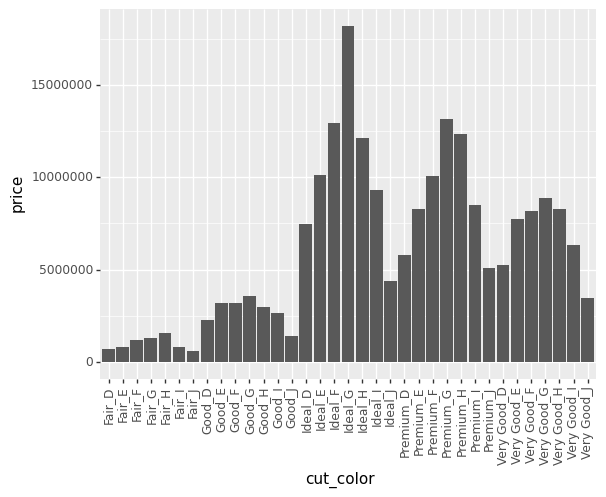

<ggplot: (-9223363307433592916)>

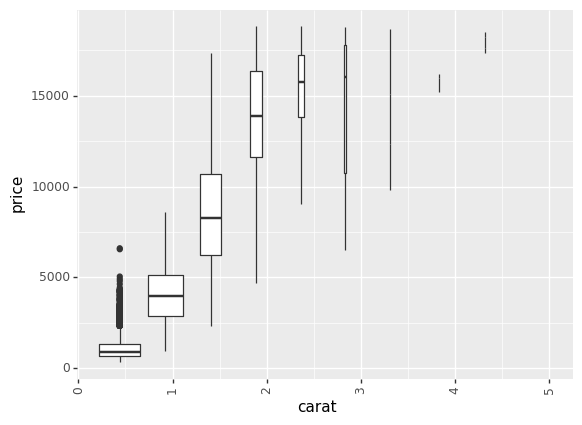

<ggplot: (-9223363307436288133)>

In [10]:
display(diamonds)

sorted_columns = diamonds.groupby("clarity")["price"].apply(np.median).reset_index().sort_values("price")["clarity"].tolist()

"""
display(ggplot(data = diamonds)
    + geom_boxplot(mapping = aes(x = "clarity", y = "price"))
    + scale_x_discrete(limits = sorted_columns)
    + coord_flip()
)
"""

"""
sorted_columns = diamonds.groupby("color")["price"].apply(np.median).reset_index().sort_values("price")["color"].tolist()
display(ggplot(data = diamonds)
    + geom_boxplot(mapping = aes(x = "color", y = "price"))
    + scale_x_discrete(limits = sorted_columns)
    + coord_flip()
)
"""
"""
sorted_columns = diamonds.groupby("cut")["price"].apply(np.median).reset_index().sort_values("price")["cut"].tolist()
display(ggplot(data = diamonds)
    + geom_boxplot(mapping = aes(x = "cut", y = "price"))
    + scale_x_discrete(limits = sorted_columns)
    + coord_flip()
)
"""

edadiaDf3 = diamonds.copy()
edadiaDf3 = edadiaDf3.groupby(["cut", "color"]).agg({"price" : "sum"}).reset_index()
#edadiaDf3 = edadiaDf3.assign(cut_color = lambda x: x["cut"].map(x["cut"] + x["color"]))
edadiaDf3["cut_color"] = edadiaDf3["cut"].astype(str) + "_" + edadiaDf3["color"].astype(str)
#display(edadiaDf3)

edadiaDf4 = diamonds.copy()
# create a series of categorical variables out of a numeric variable using 20 equally-sized bins 
# (not with equal counts of observations, but the ranges are equal)
group_series = pd.cut(edadiaDf4["carat"], bins = 10, labels = False)

display(ggplot(data = edadiaDf3)
    + geom_col(mapping = aes(x = "cut_color", y = "price"))
    + theme(axis_text_x = element_text(angle = 90))
)

display(ggplot(data = edadiaDf4)
    # use the categorical series from above to map the numeric variable "carat"
    # note that "varwidth = True" makes the width of the boxplot variable in relation to the number of observations in its bin
    + geom_boxplot(mapping = aes(x = "carat", y = "price"), group = group_series, varwidth = True)
    + theme(axis_text_x = element_text(angle = 90))
)

In [ ]:
edadiaDf5 = diamonds.copy()

edadiaDf5 = edadiaDf5.rename(columns= {"color": "cl"})
sorted_columns = edadiaDf5.groupby("cl")["price"].apply(np.median).reset_index().sort_values("price")["cl"].tolist()

display(ggplot(data = edadiaDf5)
    + geom_boxplot(mapping = aes(x = "cl", y = "price"))
    + scale_x_discrete(limits = sorted_columns)
    + labs(x = "Color", y = "Price")
    #+ coord_flip()
)

edadiaDf5 = edadiaDf5.rename(columns= {"clarity": "cy"})
sorted_columns = edadiaDf5.groupby("cy")["price"].apply(np.median).reset_index().sort_values("price")["cy"].tolist()

display(ggplot(data = edadiaDf5)
    + geom_boxplot(mapping = aes(x = "cy", y = "price"))
    + scale_x_discrete(limits = sorted_columns, label = "Clarity")
    + labs(x = "Clarity", y = "Price")
    #+ coord_flip()
)

What we can clearly see is, that while the clarity and color variables do have quite a lot of outliers, the carat variable, when binned, seems to be a pretty good predictor for what actually drives the price.

In [ ]:
display(ggplot(data = diamonds)
    + geom_boxplot(mapping = aes(x = "cut", y = "carat"), notch = True)
)

display(ggplot(data = diamonds)
    + geom_boxplot(mapping = aes(x = "color", y = "carat"), notch = True)
)

When taking a look at the description of the diamonds dataset here: https://ggplot2.tidyverse.org/reference/diamonds.html, it says the color D is the best and up to J, the colors get worse.  
So when taking into account the relationships of cut and color to carat, we observe, that the bigger diamonds tend to be of worse color quality plus the biggest diamonds alsohave the worst cuts while the best cuts are found mostly with small diamonds.
#### So that might explain, why bigger diamonds yield a smaller price

4. One problem with boxplots is that they were developed in an era of much smaller datasets and tend to display a prohibitively large number of “outlying values”. One approach to remedy this problem is the letter value plot. Install the lvplot package, and try using geom_lv() to display the distribution of price vs cut. What do you learn? How do you interpret the plots?

Unfortunately, geom_lv() is not included in plotnine as of yet...  
**BUT** we have **SEABORN**:

In [ ]:
diasnsPlot1 = sns.boxenplot(x="cut", y="carat", data=diamonds)

In [ ]:
diasnsPlot2 = sns.boxenplot(x="color", y="carat", data=diamonds)

5. Compare and contrast geom_violin() with a facetted geom_histogram(), or a coloured geom_freqpoly(). What are the pros and cons of each method?

In [ ]:
display(ggplot(data = diamonds)
    + geom_histogram(mapping = aes(x = "price"), binwidth = 500)
    + facet_wrap("cut", ncol = 1)
)

display(ggplot(data = diamonds)
    + geom_freqpoly(mapping = aes(x = "price", y = "..density..", color = "cut"))
)


display(ggplot(data = diamonds)
    + geom_violin(mapping = aes(x = "cut", y = "price"))
    + coord_flip()
)

6. If you have a small dataset, it’s sometimes useful to use geom_jitter() to see the relationship between a continuous and categorical variable. The ggbeeswarm package provides a number of methods similar to geom_jitter(). List them and briefly describe what each one does.

There are two methods:
* geom_quasirandom() produces plots that are a mix of jitter and violin plots. There are several different methods that determine exactly how the random location of the points is generated.
* geom_beeswarm() produces a plot similar to a violin plot, but by offsetting the points.

-> May be tested with the mpg dataset, as it only holds a small number of observations

---
---

### 7.5.2 Two categorical variables

Note: ggplot's "geom_point" for displaying the count of two categorical variables is **geom_count**

In [ ]:
display(ggplot(data = diamonds)
    + geom_count(mapping = aes(x = "color", y = "cut"))
)

edadiaDf6 = (
    diamonds.copy()
    .groupby(["color", "cut"])
    .agg(n = ("cut","count"))
    .reset_index()
)
display(edadiaDf6)

In [ ]:
# note that we are specifying the aes at the top level
display(ggplot(data = edadiaDf6, mapping = aes(x = "color", y = "cut", fill = "n"))
    + geom_tile()
    + geom_text(mapping = aes(label = "n"))
)

---

### 7.5.2.1 Exercises

1. How could you rescale the count dataset above to more clearly show the distribution of cut within color, or color within cut?

#### Computing grouped proportions in Pandas:

https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby/47253063#47253063

The following is the optimal solution:

In [ ]:
#c = df.groupby(['state', 'office_id'])['sales'].sum().rename("count")
#c / c.groupby(level=0).sum()

# in our case this means:
edadiaDf20 = diamonds.groupby(['color', 'cut'])["cut"].count().rename("count")
edadiaDf21 = edadiaDf20 / edadiaDf20.groupby("color").sum()
edadiaDf21 = edadiaDf21.to_frame().reset_index().rename(columns = {"count":"cut_proportion"})

display(ggplot(data = edadiaDf21)
    + geom_tile(mapping = aes(x = "color", y = "cut", fill = "cut_proportion"))
)

As I find the syntax a bit complicated in general, defining the proportion logic from 2 variables as a function helps out a lot:

In [ ]:
# if we wrote a bigger program, we could easily use this as a standard function:
def getProportion(dataframe, col_numerator, col_denominator, new_colname):
    newDf1 = dataframe.groupby([col_denominator, col_numerator])[col_numerator].count().rename("count")
    newDf2 = newDf1 / newDf1.groupby(col_denominator).sum()
    newDf2 = newDf2.to_frame().reset_index().rename(columns = {"count":new_colname})
    return newDf2

newDf3 = getProportion(diamonds,"color","cut","color_proportion")

display(ggplot(data = newDf3)
    + geom_tile(mapping = aes(x = "color", y = "cut", fill = "color_proportion"))
)

This is the slower, but maybe more "straightforward" solution:

In [ ]:
# slower, but perhaps more "straightforward" solution:

edadiaDf9 = diamonds.groupby(["color", "cut"]).agg({"cut":"count"})
edadiaDf10 = diamonds.groupby(["color"]).agg({"cut":"count"})

edadiaDf11 = (
    edadiaDf9.div(edadiaDf10, level = "color")
    .rename(columns = {"cut":"cut_proportion"})
    .reset_index()
)

display(ggplot(data = edadiaDf11)
    + geom_tile(mapping = aes(x = "color", y = "cut", fill = "cut_proportion"))
)


---

2. Use geom_tile() together with dplyr to explore how average flight delays vary by destination and month of year. What makes the plot difficult to read? How could you improve it?

In [ ]:
edaflightsDf1 = (
    flightsDf.copy()
    .dropna(subset = ["arr_delay"])
    .groupby(["dest", "month"])
    .agg(mean_dep_delay = ("dep_delay", "mean"), mean_arr_delay = ("arr_delay", "mean"))
    .reset_index()
)
display(edaflightsDf1)

# get array of destination values sorted by mean_arr_delay:
sorted_columns = edaflightsDf1.groupby("dest")["mean_arr_delay"].apply(np.mean).reset_index().sort_values("mean_arr_delay")["dest"].tolist()

display(ggplot(data = edaflightsDf1, mapping = aes(x = "dest", y = "month", fill = "mean_arr_delay"))
    + geom_tile()
    + theme(axis_text_y = element_text(size = 8))
    # note: we need to sort the months unique values because due to the sort by dest & month, the first destination
    # might not have flights for every month and therefore start with a month different from 1
    # in general, series.unique() returns the values in the order they appear in the series
    + scale_y_discrete(limits = np.sort(edaflightsDf1["month"].unique()))
    + scale_x_discrete(limits = sorted_columns)
    + coord_flip()
)

---

3. Why is it slightly better to use aes(x = color, y = cut) rather than aes(x = cut, y = color) in the example above?

A: Because screens are usually wider than they are high, categorical variables with more values should be placed on the x-axis, making the plot easier to view even when the is bigger than usual.

---
---

### 7.5.3 Two continuous variables

Unfortunately, the geom_hex is not implemented in Plotnine. Also there seems to be no parameter we can use to tweak the geom_bin2d... (size parameter does not do anything)

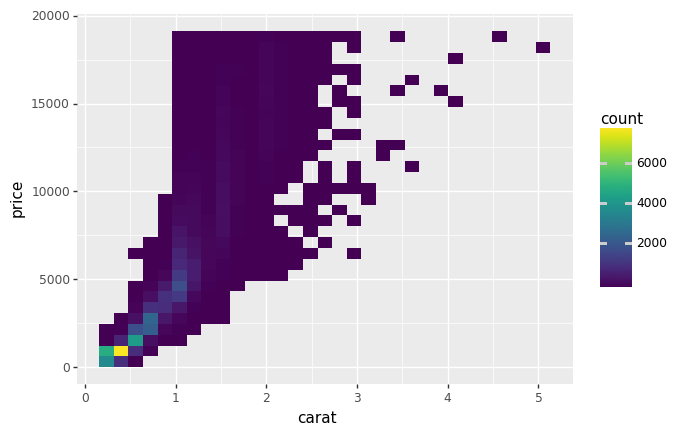

<ggplot: (-9223363285163405424)>

In [27]:
display(ggplot(data = diamonds)
    + geom_bin2d(mapping = aes(x = "carat", y = "price"))
)

Fortunately, **seaborn** once again comes to help to provide us with a hexbin plot:

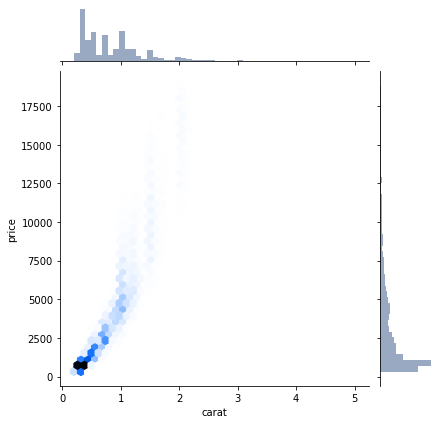

In [26]:
plot = sns.jointplot("carat", "price", data = diamonds, kind="hex", color="#002966", joint_kws = dict(gridsize=40))
#plot.ax_marg_x.set_xlim(0, 3)
#plot.ax_marg_y.set_ylim(0, 20000)

plt.show()

In [ ]:
edadiaDf15 = diamonds.copy()
# create a series of categorical variables out of a numeric variable using 20 equally-sized (range) bins 
group_series = pd.cut(edadiaDf15["carat"], bins = 20, labels = False)

# create a series of categorical variables out of a numeric variable using 20 bins with equal number of observations
group_series2 = pd.qcut(edadiaDf15["carat"], q = 20, labels = False)

display(edadiaDf15)
display(ggplot(data = edadiaDf15)
    # use the categorical series from above to map the numeric variable "carat"
    # note that "varwidth = True" makes the width of the boxplot variable in relation to the number of observations in its bin
    + geom_boxplot(mapping = aes(x = "carat", y = "price"), group = group_series, varwidth = True)
)

display(ggplot(data = edadiaDf15)
    + geom_boxplot(mapping = aes(x = "carat", y = "price"), group = group_series2, varwidth = True)
)

display(ggplot(edadiaDf15)
    + geom_point(aes(x = "carat", y = "price"))
)

---

### 7.5.3.1 Exercises

1. Instead of summarising the conditional distribution with a boxplot, you could use a frequency polygon. What do you need to consider when using cut_width() (*pd.cut*) vs cut_number() (*pd.qcut*)? How does that impact a visualisation of the 2d distribution of carat and price?

**I have no idea why it won't let me plot colored graphs based on the groups**

In [ ]:
edadiaDf15 = diamonds.copy()
# create a series of categorical variables out of a numeric variable using 20 equally-sized (range) bins 
group_series = pd.cut(edadiaDf15["carat"], bins = 5, labels = False)

# create a series of categorical variables out of a numeric variable using 20 bins with equal number of observations
group_series2 = pd.qcut(edadiaDf15["carat"], q = 5, labels = False)

display(ggplot(data = edadiaDf15)
    + geom_freqpoly(mapping = aes(x = "price", color = group_series))
)

display(ggplot(data = edadiaDf15)
    + geom_freqpoly(mapping = aes(x = "price", color = group_series2))
)

2. Visualise the distribution of carat, partitioned by price.

In [ ]:
edadiaDf16 = diamonds.copy()
# create a series of categorical variables out of a numeric variable using 20 equally-sized (range) bins 
group_series = pd.cut(edadiaDf16["price"], bins = 10, include_lowest = True, labels = False)

display(ggplot(data = edadiaDf16)
    # somehow "width" parameter does not work with this one...
    # also, I am unsure, if the "include_lowest" in the pd.cut actually works as the position of the lowest
    # boxplot does not change
    + geom_boxplot(mapping = aes(x = "price", y = "carat", color = "cut"), group = group_series)
    + coord_flip()
)

> 3. How does the price distribution of very large diamonds compare to small diamonds. Is it as you expect, or does it surprise you?

Answer (not mine):

> The distribution of very large diamonds is more variable. I am not surprised, since I knew little about diamond prices. After the fact, it does not seem surprising (as many thing do). I would guess that this is due to the way in which diamonds are selected for retail sales. Suppose that someone selling a diamond only finds it profitable to sell it if some combination size, cut, clarity, and color are above a certain threshold. The smallest diamonds are only profitable to sell if they are exceptional in all the other factors (cut, clarity, and color), so the small diamonds sold have similar characteristics. However, larger diamonds may be profitable regardless of the values of the other factors. Thus we will observe large diamonds with a wider variety of cut, clarity, and color and thus more variability in prices.


> 4. Combine two of the techniques you’ve learned to visualise the combined distribution of cut, carat, and price.

Somehow, this does not work. For example we cannot map color to our binned continuous variables! It is simply ignored, just like the "width" property of a boxplot

In [ ]:
group_series = pd.cut(diamonds["carat"], bins = 10, include_lowest = True, labels = False)

display(ggplot(data = diamonds)
    + geom_boxplot(mapping = aes(x = "carat", y = "price"), group = group_series)
    + coord_flip()
)

> 5. Two dimensional plots reveal outliers that are not visible in one dimensional plots. For example, some points in the plot below have an unusual combination of x and y values, which makes the points outliers even though their x and y values appear normal when examined separately.

In [ ]:
(ggplot(diamonds)
    + geom_point(aes(x = "x", y = "y"))
    + coord_cartesian(xlim = (4,11), ylim = (4,11))
)

Answer (not mine):
>In this case, there is a strong relationship between x and y. The outliers in this case are not extreme in either x or y. A binned plot would not reveal these outliers, and may lead us to conclude that the largest value of x was an outlier even though it appears to fit the bivariate pattern well.

---
---

### 7.6 Patterns and models

### 7.7 ggplot2 calls

From now on we will reduce the amount of boilerplate code by not explicitly naming all the variables and mappings.  
Example of a basic geom_point plot with and without explicit overhead.  
Note that the first way is by using **keyword arguments** and the second way is using **positional arguments**

In [ ]:
# just keywords
display(
    ggplot(data = diamonds, mapping = aes(x = "carat", y = "price"))
        + geom_point()
)

# fully positional
display(
    ggplot(diamonds, aes("carat", "price"))
        + geom_point()
)

## 8 Workflow: projects

### 8.4 RStudio projects

One take away is how to store plots:

In [ ]:
plot = (ggplot(diamonds)+geom_point(aes("carat", "..count../max(..count..)"), stat ="bin"))
display(plot)

#save_as_pdf_pages([plot + theme(figure_size=(8, 6))])
save_as_pdf_pages([plot], path = "Outputs")

In [ ]:
diamonds.to_csv("Outputs/out2.csv")

## 10 Tibbles (Pandas -> DataFrame)

To have something similar for pandas, take a look at: https://pandas.pydata.org/docs/getting_started/basics.html  
This will be dealt with in the separate Jupyter Notebook "Pandas Essentials"

## 11 Data Import

Pandas offers a lot of different methods to import various types of files:  
https://pandas.pydata.org/pandas-docs/stable/reference/io.html  
The most common is probably read_csv():  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv

In this chapter I will give a few examples of read_csv() parameters that can be useful.

### Read_csv()

#### Engine

Pandas has two engines available: **c** and **python**. While the C engine is faster, Python is more feature complete.  
*Note that pandas will try to use C by default, but automatically fall back to the Python engine when trying to access features that are not available for C.*

In [59]:
display(
    "engine = python",
    pd.read_csv("Datasets/data_import_tests/Test0.csv", skiprows = 3, skipfooter = 3, engine = "python")
)

# the following will raise an error because "skipfooter" is not supported by the c engine!
#pd.read_csv("Datasets/data_import_tests/Test0.csv", skiprows = 3, skipfooter = 3, engine = "python")

# note the warning when we do not specify an engine, but use a pyhton-exclusive feature:
display(
    "no engine specified",
    pd.read_csv("Datasets/data_import_tests/Test0.csv", skiprows = 3, skipfooter = 3)
)

'engine = python'

x  y  z
0  1  2  3

/home/daniel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if sys.path[0] == '':


'no engine specified'

x  y  z
0  1  2  3

#### Seperator

If a seperator other than a comma is used, Python might pick it up correctly - but the correct way to do this is to explicitly name it by using the `sep = "y"` option.

In [80]:
pd.read_csv("Datasets/data_import_tests/Test3.csv", header = 2, sep = "|")

x  y  z
0  1  2  3

#### Skiprows, skipfooter, header, names

Using `skiprows = n` we can specify the number of lines to be skipped at the beginning of the file (or the line index that should be skipped to). May be a list-like, int or callable (lambda).  

The corresponding method for skipping lines at the end of the file is `skipfooter = n` which only takes an int value.

In [82]:
pd.read_csv("Datasets/data_import_tests/Test0.csv", skiprows = 3, skipfooter = 3)

/home/daniel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


x  y  z
0  1  2  3

With `header = x` we can specify the line number the column names can be found in.  
Also, this specifies the beginning of the data (the next line after the header).  
If set to `None`, no header column will be included and the columns will be named 0 to n.

In [26]:
pd.read_csv("Datasets/data_import_tests/Test4.csv", header = None)

0  1  2
0  x  y  z
1  1  2  3

**Careful when using `header` in conjunction with `skip_blank_lines = True` because the "row-counting" will be impacted by this: all commented/blank lines will be ignored in the count**

We can even specify multiple lines as column names for a MultiIndex.  
Anything in between the specified line numbers will be ignored (so it is not a "range", but seperate numbers)

In [78]:
pd.read_csv("Datasets/data_import_tests/Test2.csv", header = [2,4])

x   y     z
  one two three
0   1   2     3

We can also pass columns names explicitly as an array by using `names = []` .  
If the file does contain a header row, `header = 0` needs to be passed in order to override it using the names parameter.  
*Note that duplicates in the array are not allowed*

In [60]:
pd.read_csv("Datasets/data_import_tests/Test4.csv", header = 0, names = ["alpha", "beta", "gamma"])

alpha  beta  gamma
0      1     2      3

#### Index_col, usecols

`index_col = str,int,[]` specifies, if one or more columns should be used as indexes.  
They can be addresses by their index or name (or even mixed in an array).  
*Note that index_col=False can be used to prevent pandas from using the first column as the index column.*

In [3]:
# gamma as first index column, beta as second index column
pd.read_csv(
    "Datasets/data_import_tests/Test4.csv", 
    header = 0, 
    names = ["alpha", "beta", "gamma"], 
    index_col = [2,"beta"]
)

alpha
gamma beta       
3     2         1

`usecols` returns a subset of the columns. It takes a list-like containing positional indices or string names.  
The order of the selected columns is not preserved in the output - for that another selection needs to be done after the read_csv. **usecols** also accepts a callable that selects a column whenever the evaluation returns **True**.

In [4]:
display(
    "usecols",
    pd.read_csv("Datasets/data_import_tests/Test4.csv", 
                header = 0, 
                usecols = ["y", "x"]
               ),
    ""
)

display(
    "usecols with reordering of columns",
    pd.read_csv("Datasets/data_import_tests/Test4.csv", 
                header = 0, 
                usecols = ["y", "x"]
               )[["y","x"]],
    ""
)
display(
    "usecols callable",
    pd.read_csv("Datasets/data_import_tests/Test4.csv", 
                header = 0, 
                usecols = lambda x: x.upper() in ["Y","Z"]
               ),
    ""
)

'usecols'

x  y
0  1  2

''

'usecols with reordering of columns'

y  x
0  2  1

''

'usecols callable'

y  z
0  2  3

''

#### squeeze, prefix, mangle_dupe_cols

`squeeze = True` (default False) enables pandas to return a Series when the file only contains one column.

In [63]:
pd.read_csv("Datasets/data_import_tests/Test5.csv", squeeze = True)

0    1
1    2
2    3
Name: scalar, dtype: int64

`prefix = str` adds prefixes to column numbers when no names are given.

In [70]:
pd.read_csv("Datasets/data_import_tests/Test4.csv", header = None, prefix = "col_")

col_0 col_1 col_2
0     x     y     z
1     1     2     3

`mangle_dupe_cols` - Duplicate columns will be numbered when **True** .  
If set to **False**, existing columns will be overwritten by duplicates.  
*Note: `mangle_dupe_cols=False` is not yet implemented*

In [79]:
display(
    "mangle_dupe_cols=True (default)",
    pd.read_csv("Datasets/data_import_tests/Test6.csv"),
    ""
)

# still unsupported:
#display(
#    "mangle_dupe_cols=False",
#    pd.read_csv("Datasets/data_import_tests/Test6.csv", mangle_dupe_cols = False),
#    ""
#)

'mangle_dupe_cols=True (default)'

x  x.1  x.2
0  1    2    3

''

#### dtype, converters

`dtype = {}` specifies data types per column name or index by providing a dictionary .  
Keys that do not appear in the columns will be ignored.  
*Note: if **converters** are specified, **dtype** will be ignored for these columns.*

In [105]:
csvDf1 = pd.read_csv("Datasets/data_import_tests/Test4.csv", 
                     dtype = {0:np.float64, 
                              "y": str, 
                              2: "object", 
                              "a": np.int64, 
                              "g": np.float32})

display(csvDf1)
display(csvDf1.dtypes)

x  y  z
0  1.0  2  3

x    float64
y     object
z     object
dtype: object

`converters = dict` specifies functions that convert the values in the columns .  
Keys are columnd indices or names.

In [116]:
pd.read_csv("Datasets/data_import_tests/Test4.csv", 
            converters = {"x": lambda x: x.replace("1","10")}
           )

x  y  z
0  10  2  3

#### false_values, true_values

`false_values = []` and `true_values = []` will replace the values in the list with **True** or **False** accordingly.

In [139]:
csvDf2 = pd.read_csv("Datasets/data_import_tests/Test7.csv", 
            false_values = ["ffalse"],
            true_values = ["ttrue"]
           )
display(csvDf2)
display(csvDf2.dtypes)

x      y      z
0  1  False  False
1  2   True  False
2  3  False   True

x    int64
y     bool
z     bool
dtype: object

#### na_values. keep_default_na, na_filter, verbose

`na_values` specifies values that should be treated as NA/NaN values. Takes a scalar, string, list or dictionary for column-wise definitions

In [143]:
pd.read_csv("Datasets/data_import_tests/Test7.csv", 
                     na_values = {"x": 1, "y": "ffalse", "z": "ttrue"}
           )

x      y       z
0  NaN    NaN  ffalse
1  2.0  ttrue  ffalse
2  3.0    NaN     NaN

`keep_default_na` can be set to **False** to exclude the values that are per default treated as NA/NaN (ex.: "#N/A", "-nan", "1.#IND", "\<NA\>", etc...). Can be combined well with `na_values`.

In [145]:
pd.read_csv("Datasets/data_import_tests/Test8.csv", 
            keep_default_na = False, 
            na_values = "NAN"
           )

x    y    z
0 NaN  nan  N/A

`na_filter = bool` When set to True, Pandas will detect missing values & the values defined in na_values as NA.  
When importing a file that does NOT contain missing values, setting **na_filter** to **False** will improve the performance.

In [9]:
display(
    "na_filter = False",
    pd.read_csv("Datasets/data_import_tests/Test8.csv", 
            na_filter = False
           )
)
display(
    "na_filter = True",
    pd.read_csv("Datasets/data_import_tests/Test8.csv", 
            na_filter = True
           )
)

'na_filter = False'

x    y    z
0  NAN  nan  N/A

'na_filter = True'

x   y   z
0  NAN NaN NaN

`verbose = bool` indicates the number of of NA values placed in non-numeric columns.

In [18]:
pd.read_csv("Datasets/data_import_tests/Test8.csv", 
            verbose = True
           )

Tokenization took: 0.07 ms
Type conversion took: 0.64 ms
Parser memory cleanup took: 0.01 ms


x   y   z
0  NAN NaN NaN

#### skip_blank_lines

`skip_blank_lines = True` skips over blank lines rather than interpreting them as NA values.

#### thousands, decimals

`thousands = "y"` defines the thousands seperator

`decimal = "y"` defines the decimal seperator

#### lineterminator, quotechar, comment

`lineterminator = "y"` defines the character that breaks the file into lines. Only works with the **C** engine.

In [25]:
pd.read_csv("Datasets/data_import_tests/Test9.csv", 
            lineterminator = "%"
           )

x  y  z
0  1  2  3
1  4  5  6

`quotechar = "y"` defines the character to start and end a quote.

`comment = "y"` defines the character that indicates that the rest of the line should be treated as a comment.

In [26]:
pd.read_csv("Datasets/data_import_tests/Test10.csv", 
            lineterminator = "%",
            comment = "#"
           )

x  y  z
0  4  5  6

#### parse_dates, infer_datetime_format, keep_date_col, date_parser, dayfirst, cache_dates, dialects

`parse_dates` specifies which columns should be treated as dates, if several columns should be combined as a single date-column and if that should be renamed. Can be passed a boolean (*try to parse the index*), a list (*columns to parse*), a list of lists (*in each list in the list, specify columns that are to be combined as a date column*) or a dict (*parse dates and rename result*).

`infer_datetime = True` (default = False) in combination with parse_dates will try to automatically infer the datetime format of the columns specified.

`keep_date_col = True` in combination with combining multiple columns in parse_dates will keep the columns used to create the combined datetime column.

`date_parser = func` specifies a converter that takes multiple string columns and returns an array of datetime instances. Detailed behavior is specified in the Pandas documentation.

`dayfirst = True` defines the dates to be in european / international DD/MM format.

`cache_dates = True` is enabled per default and uses a cache of unique, converted dates to apply the datetime conversion. May be significantly faster when parsing duplicate date strings, especially with timezone offsets.

#### iterator, chunksize, compression

`iterator = True` returnsa TextFileReader object for iteration or getting chunks with get_chunk().

`chunksize = int` returns a TextFileReader object for iteration

`compression = {‘infer’, ‘gzip’, ‘bz2’, ‘zip’, ‘xz’, None}, default ‘infer’` enables on-the-fly decompression of files.

Dialects to parse data correctly

In [9]:
import csv
csv.list_dialects()

['excel', 'excel-tab', 'unix']

---
---

## 12 Tidy Data

### 12.3 Pivoting

Pivoting solves two major issues:
1. One variable might be spread across multiple columns.
2. One observation might be scattered across multiple rows.

The first issue is being adressed by pivoting from "wide" to "long" by using the Pandas.melt() function.

In [33]:
tidyDf1 = pd.DataFrame([["Germany", 100, 50000], ["Germany", 200, 60000]], columns = ["country", "1999", "2000"])
display(tidyDf1)

tidyDf2 = pd.melt(tidyDf1, col_level=0, id_vars=["country"], value_name="cases")
# the "value_vars" may also be specified like the following:
# tidyDf2 = pd.melt(tidyDf1, col_level=0, id_vars=["country"], value_vars=["1999","2000"], value_name="cases")
display(tidyDf2)

country  1999   2000
0  Germany   100  50000
1  Germany   200  60000

country variable  cases
0  Germany     1999    100
1  Germany     1999    200
2  Germany     2000  50000
3  Germany     2000  60000

### Question: how to transform the dataframe presented in the 2nd Display back properly?

In [76]:
tidyDf3 = pd.DataFrame([["Germany", 1999, "cases", 100], 
                        ["Germany", 1999, "population", 50000], 
                        ["Germany", 2000, "cases", 200],  
                        ["Germany", 2000, "population", 60000], 
                        ["France", 1999, "cases", 500],  
                        ["France", 1999, "population", 200000]], columns = ["country", "year", "type", "count"])
display(tidyDf3)
# melt an already long table into an even longer table:
longerDf1 = pd.melt(tidyDf3, id_vars=["country", "year"])
display(longerDf1)

pivotDf1 = tidyDf3.pivot_table(index=["country", "year"], columns = "type", values="count").reset_index()
pivotDf1.columns = pivotDf1.columns.rename("")
display(pivotDf1)
#display(tidyDf3.unstack(2))
# challenge: how to get back to wide view?

# how it does not work:

#display(longerDf1.unstack().reset_index().head())
#display(longerDf1.set_index(["country", "year"]))

#display(longerDf1.pivot_table(index=["country"], columns=["variable", "value"]))
#display(longerDf1.pivot(index="country",columns="variable"))

#display(valDf1.set_index(["country", "year"]).unstack())
#display(valDf1.pivot_table(index=["country", "year"], columns=["variable"],values=["value"], aggfunc="first"))

# --> this is because we have ambiguous data. For 'longerDf1', the code can NOT figure out, which of the count entries per year belong to the values 'case' or 'population'.
# --> this 'knowledge' disappeared by using melt on an already long table rendering it basically useless!

# how it does work:
valDf1 = longerDf1.query("variable == 'count'").reset_index().drop(columns=["index"])
varDf1 = longerDf1.query("variable != 'count'")
valDf1 = valDf1.drop(columns="variable")
varDf1 = varDf1.drop(columns=["variable"])
display(valDf1,
       "",
       varDf1)
mergeDf1 = varDf1.copy()
mergeDf1.insert(loc = len(varDf1.columns), column = "count", value = valDf1["value"])
display(mergeDf1)
display(mergeDf1.pivot_table(index=["country", "year"], columns="value", values="count", aggfunc="first"))

country  year        type   count
0  Germany  1999       cases     100
1  Germany  1999  population   50000
2  Germany  2000       cases     200
3  Germany  2000  population   60000
4   France  1999       cases     500
5   France  1999  population  200000

country  year variable       value
0   Germany  1999     type       cases
1   Germany  1999     type  population
2   Germany  2000     type       cases
3   Germany  2000     type  population
4    France  1999     type       cases
5    France  1999     type  population
6   Germany  1999    count         100
7   Germany  1999    count       50000
8   Germany  2000    count         200
9   Germany  2000    count       60000
10   France  1999    count         500
11   France  1999    count      200000

country  year  cases  population
0   France  1999    500      200000
1  Germany  1999    100       50000
2  Germany  2000    200       60000

country  year   value
0  Germany  1999     100
1  Germany  1999   50000
2  Germany  2000     200
3  Germany  2000   60000
4   France  1999     500
5   France  1999  200000

''

country  year       value
0  Germany  1999       cases
1  Germany  1999  population
2  Germany  2000       cases
3  Germany  2000  population
4   France  1999       cases
5   France  1999  population

country  year       value   count
0  Germany  1999       cases     100
1  Germany  1999  population   50000
2  Germany  2000       cases     200
3  Germany  2000  population   60000
4   France  1999       cases     500
5   France  1999  population  200000

value         cases  population
country year                   
France  1999    500      200000
Germany 1999    100       50000
        2000    200       60000

The second issue is being adressed by pivoting from "long" to "wide" by using the DataFrame.pivot() or DataFrame.pivot_table() functions. Note that the .pivot() function provides only basic functionality in comparison to pivot_table() and it also does not work with duplicate index entries in combination with column entries. (for example here: country + year.

In [36]:
display(tidyDf3)

tidyDf4 = tidyDf3.pivot_table(index = ["country", "year"], columns = "type", values = "count")
tidyDf5 = tidyDf4.reset_index()
tidyDf5.columns.name = ""
display(tidyDf4)
display(tidyDf5)

country  year        type   count
0  Germany  1999       cases     100
1  Germany  1999  population   50000
2  Germany  2000       cases     200
3  Germany  2000  population   60000
4   France  1999       cases     500
5   France  1999  population  200000

type          cases  population
country year                   
France  1999    500      200000
Germany 1999    100       50000
        2000    200       60000

country  year  cases  population
0   France  1999    500      200000
1  Germany  1999    100       50000
2  Germany  2000    200       60000

#### `stack()` & `unstack()`

`stack()` Works with the MultiIndex objects in a Pandas DF. It takes the column names and puts them into a new inner-most level of row labels. Each observation now consists of several rows that are grouped under a single index. In the observation, each row has a variable and a value that were formerly represented by the column header and column value for the observation.

`unstack()` basically is the opposite of stack(). It produces a DataFrame with a new inner-most set of column labels that are the former inner-most column values.

In [18]:
display("Stacked, Multiindex",
        tidyDf3.stack().head(10),
       "")
display("stacked DF, index reset -> automatic naming of columns",
        tidyDf3.stack().reset_index().head(10),
       "")
display("stacked DF, index reset & rename",
       tidyDf3.stack().reset_index().rename(columns = {"level_0":"id", "level_1":"variable", 0:"value"}).head(10),
       )
display("Unstacked after stacking",
       tidyDf3.stack().unstack())

'Stacked, Multiindex'

0  country       Germany
   year             1999
   type            cases
   count             100
1  country       Germany
   year             1999
   type       population
   count           50000
2  country       Germany
   year             2000
dtype: object

''

'stacked DF, index reset -> automatic naming of columns'

level_0  level_1           0
0        0  country     Germany
1        0     year        1999
2        0     type       cases
3        0    count         100
4        1  country     Germany
5        1     year        1999
6        1     type  population
7        1    count       50000
8        2  country     Germany
9        2     year        2000

''

'stacked DF, index reset & rename'

id variable       value
0   0  country     Germany
1   0     year        1999
2   0     type       cases
3   0    count         100
4   1  country     Germany
5   1     year        1999
6   1     type  population
7   1    count       50000
8   2  country     Germany
9   2     year        2000

'Unstacked after stacking'

country  year        type   count
0  Germany  1999       cases     100
1  Germany  1999  population   50000
2  Germany  2000       cases     200
3  Germany  2000  population   60000
4   France  1999       cases     500
5   France  1999  population  200000

### 12.4 Separating and uniting

#### `DataFrame.split()`

In [129]:
sepDf1 = pd.DataFrame([["Germany", 1999, "cases", 100], 
                        ["Germany", 1999, "population", 50000], 
                        ["Germany", 2000, "cases", 200],  
                        ["Germany", 2000, "population", 60000], 
                        ["France", 1999, "cases", 500],  
                        ["France", 1999, "population", 200000]], columns = ["country", "year", "type", "count"])
sepDf1 = sepDf1.pivot_table(index=["country", "year"], columns="type", values="count", aggfunc="first").reset_index()
sepDf1.columns = sepDf1.columns.rename("")
display(sepDf1)
sepDf1.loc[:,"rate"] = sepDf1["cases"].astype(str) + "/" + sepDf1["population"].astype(str)
display(sepDf1)
sepDf1[["cases_x", "population_x"]] = sepDf1.loc[:,"rate"].str.split("/", expand=True)
display(sepDf1)

#split by character position
sepDf1["century_x"] = (sepDf1.loc[:,"year"]).astype(str).str[0:2]
sepDf1["year_x"] = (sepDf1.loc[:,"year"]).astype(str).str[2:4]
display(sepDf1)

country  year  cases  population
0   France  1999    500      200000
1  Germany  1999    100       50000
2  Germany  2000    200       60000

country  year  cases  population        rate
0   France  1999    500      200000  500/200000
1  Germany  1999    100       50000   100/50000
2  Germany  2000    200       60000   200/60000

country  year  cases  population        rate cases_x population_x
0   France  1999    500      200000  500/200000     500       200000
1  Germany  1999    100       50000   100/50000     100        50000
2  Germany  2000    200       60000   200/60000     200        60000

country  year  cases  population        rate cases_x population_x  \
0   France  1999    500      200000  500/200000     500       200000   
1  Germany  1999    100       50000   100/50000     100        50000   
2  Germany  2000    200       60000   200/60000     200        60000   

  century_x year_x  
0        19     99  
1        19     99  
2        20     00

#### Combining string columns can be done simply by using string concatenation:

In [132]:
comDf1 = sepDf1.copy()
comDf1["year_y"] = comDf1.loc[:,"century_x"] + comDf1.loc[:,"year_x"]
display(comDf1)

country  year  cases  population        rate cases_x population_x  \
0   France  1999    500      200000  500/200000     500       200000   
1  Germany  1999    100       50000   100/50000     100        50000   
2  Germany  2000    200       60000   200/60000     200        60000   

  century_x year_x year_y  
0        19     99   1999  
1        19     99   1999  
2        20     00   2000

### 12.5 Missing Values

A value can be missing in two possible ways:
* **explicitly** = flagged with NaN etc.
* **implicitly** = simply not present in the data

In [140]:
missDf1 = pd.DataFrame({"year":[2015, 2015, 2015, 2015, 2016, 2016, 2016], "qtr":[1, 2, 3, 4, 2, 3, 4], "return":[1.5, 2.3, 4.1, np.nan, 3.4, 5.3, 1.3]})
display(missDf1)

year  qtr  return
0  2015    1     1.5
1  2015    2     2.3
2  2015    3     4.1
3  2015    4     NaN
4  2016    2     3.4
5  2016    3     5.3
6  2016    4     1.3

Now we can make implicitly missing values explitictly missing by pivoting wider to longer format:  
*Notice qtr 1 of year 2016*

In [141]:
display(missDf1.pivot(index="qtr", columns="year", values="return"))

year  2015  2016
qtr             
1      1.5   NaN
2      2.3   3.4
3      4.1   5.3
4      NaN   1.3

We can also make explicitly missing values implicitly missing by using dropna:

In [161]:
display(missDf1.dropna())

year  qtr  return
0  2015    1     1.5
1  2015    2     2.3
2  2015    3     4.1
4  2016    2     3.4
5  2016    3     5.3
6  2016    4     1.3

Another useful chain of methods that will be of use frequently is what "R" has as "complete": to expand the dataframe to show variable combinations that are implicitly missing as explicitly missing or fill them with other values.  
We achieve this by using `set_index` with `unstack(fill_value=...)` and `stack(dropna=False)` and `reset_index()`

In [166]:
display(missDf1.dropna().set_index(["year","qtr"]).unstack(fill_value=np.nan).stack(dropna=False).reset_index())
# alternatively:
#display(missDf1.dropna().set_index(["year","qtr"])["return"].unstack(fill_value=0).stack().reset_index(name="return"))

year  qtr  return
0  2015    1     1.5
1  2015    2     2.3
2  2015    3     4.1
3  2015    4     NaN
4  2016    1     NaN
5  2016    2     3.4
6  2016    3     5.3
7  2016    4     1.3

### 12.6 Case Study

In [6]:
csDf1 = pd.read_csv("Datasets/TB_notifications_2020-04-27.csv")
#display(csDf1.head(20))
#display(csDf1.info())
#display(csDf1.describe())
#for col_name in csDf1.columns:
#    display(col_name)

In [7]:
csDf2 = (csDf1.drop(columns=csDf1.loc[:,"iso_numeric":"g_whoregion"])
         .drop(columns=csDf1.loc[:,"new_sp":"new_sp_m514"])
         .drop(columns=csDf1.loc[:,"new_sp_mu":"new_sp_f514"])
         .drop(columns=csDf1.loc[:,"new_sp_fu":"new_sn_m514"])
         .drop(columns=csDf1.loc[:,"new_sn_m15plus":"new_sn_f514"])
         .drop(columns=csDf1.loc[:,"new_sn_f15plus":"new_ep_m514"])
         .drop(columns=csDf1.loc[:,"new_ep_m15plus":"new_ep_f514"])
         .drop(columns=csDf1.loc[:,"new_ep_f15plus":"newrel_m514"])
         .drop(columns=csDf1.loc[:,"newrel_m15plus":"newrel_f514"])
         .drop(columns=csDf1.loc[:,"newrel_f15plus":])
         
        )
display(csDf2)

country iso2 iso3  year  new_sp_m014  new_sp_m1524  new_sp_m2534  \
0     Afghanistan   AF  AFG  1980          NaN           NaN           NaN   
1     Afghanistan   AF  AFG  1981          NaN           NaN           NaN   
2     Afghanistan   AF  AFG  1982          NaN           NaN           NaN   
3     Afghanistan   AF  AFG  1983          NaN           NaN           NaN   
4     Afghanistan   AF  AFG  1984          NaN           NaN           NaN   
...           ...  ...  ...   ...          ...           ...           ...   
8281     Zimbabwe   ZW  ZWE  2014          NaN           NaN           NaN   
8282     Zimbabwe   ZW  ZWE  2015          NaN           NaN           NaN   
8283     Zimbabwe   ZW  ZWE  2016          NaN           NaN           NaN   
8284     Zimbabwe   ZW  ZWE  2017          NaN           NaN           NaN   
8285     Zimbabwe   ZW  ZWE  2018          NaN           NaN           NaN   

      new_sp_m3544  new_sp_m4554  new_sp_m5564  ...  newrel_m4554  \
0              NaN           NaN           NaN  ...           NaN   
1              NaN           NaN           NaN  ...           NaN   
2              NaN           NaN           NaN  ...           NaN   
3              NaN           NaN           NaN  ...           NaN   
4              NaN           NaN           NaN  ...           NaN   
...            ...           ...           ...  ...           ...   
8281           NaN           NaN           NaN  ...        2174.0   
8282           NaN           NaN           NaN  ...        2117.0   
8283           NaN           NaN           NaN  ...        2238.0   
8284           NaN           NaN           NaN  ...        2243.0   
8285           NaN           NaN           NaN  ...        2200.0   

      newrel_m5564  newrel_m65  newrel_f014  newrel_f1524  newrel_f2534  \
0              NaN         NaN          NaN           NaN           NaN   
1              NaN         NaN          NaN           NaN           NaN   
2              NaN         NaN          NaN           NaN           NaN   
3              NaN         NaN          NaN           NaN           NaN   
4              NaN         NaN          NaN           NaN           NaN   
...            ...         ...          ...           ...           ...   
8281        1148.0      1078.0       1123.0        1714.0        4027.0   
8282        1057.0      1027.0        863.0        1614.0        3515.0   
8283        1121.0      1068.0        736.0        1444.0        3202.0   
8284        1142.0      1118.0        680.0        1394.0        2727.0   
8285        1189.0      1331.0        749.0        1435.0        2526.0   

      newrel_f3544  newrel_f4554  newrel_f5564  newrel_f65  
0              NaN           NaN           NaN         NaN  
1              NaN           NaN           NaN         NaN  
2              NaN           NaN           NaN         NaN  
3              NaN           NaN           NaN         NaN  
4              NaN           NaN           NaN         NaN  
...            ...           ...           ...         ...  
8281        3157.0        1285.0         739.0       718.0  
8282        2967.0        1275.0         659.0       629.0  
8283        2793.0        1257.0         694.0       649.0  
8284        2676.0        1236.0         734.0       717.0  
8285        2497.0        1222.0         656.0       797.0  

[8286 rows x 60 columns]

Now let's eliminate information that is redundant:  
* "iso2" & "iso3" display the same information as the first column "country".
* the column "key" consists of 4 different variables: "new", "type", "sex" and "age". The first split can be done by using the underscore as the split character.

Also note, that we check if the results are reasonable by counting the cases per distinct "key" value.

In [9]:
# eliminate unreasonable double information
csDf3 = csDf2.drop(columns=["iso2", "iso3"])
csDf41 = pd.melt(csDf3, id_vars=["country", "year"])
csDf4 = csDf41.rename(columns={"variable":"key", "value":"cases"}).dropna()
display(csDf4)
display(csDf4.groupby("key").agg({"cases":"count"}))
csDf4.loc[:,"key"] = csDf4["key"].str.replace("newrel", "new_rel")
csDf4[["new", "type", "sexage"]] = csDf4.key.str.split(pat="_", expand=True)
display(csDf4)

country  year          key  cases
17      Afghanistan  1997  new_sp_m014    0.0
18      Afghanistan  1998  new_sp_m014   30.0
19      Afghanistan  1999  new_sp_m014    8.0
20      Afghanistan  2000  new_sp_m014   52.0
21      Afghanistan  2001  new_sp_m014  129.0
...             ...   ...          ...    ...
464011     Zimbabwe  2014   newrel_f65  718.0
464012     Zimbabwe  2015   newrel_f65  629.0
464013     Zimbabwe  2016   newrel_f65  649.0
464014     Zimbabwe  2017   newrel_f65  717.0
464015     Zimbabwe  2018   newrel_f65  797.0

[89758 rows x 4 columns]

cases
key                
new_ep_f014    1032
new_ep_f1524   1021
new_ep_f2534   1021
new_ep_f3544   1021
new_ep_f4554   1017
new_ep_f5564   1017
new_ep_f65     1014
new_ep_m014    1038
new_ep_m1524   1026
new_ep_m2534   1020
new_ep_m3544   1024
new_ep_m4554   1020
new_ep_m5564   1015
new_ep_m65     1018
new_sn_f014    1040
new_sn_f1524   1022
new_sn_f2534   1016
new_sn_f3544   1020
new_sn_f4554   1018
new_sn_f5564   1017
new_sn_f65     1019
new_sn_m014    1045
new_sn_m1524   1030
new_sn_m2534   1022
new_sn_m3544   1025
new_sn_m4554   1027
new_sn_m5564   1021
new_sn_m65     1020
new_sp_f014    3173
new_sp_f1524   3193
new_sp_f2534   3199
new_sp_f3544   3198
new_sp_f4554   3203
new_sp_f5564   3194
new_sp_f65     3196
new_sp_m014    3171
new_sp_m1524   3207
new_sp_m2534   3204
new_sp_m3544   3217
new_sp_m4554   3221
new_sp_m5564   3216
new_sp_m65     3207
newrel_f014    1190
newrel_f1524   1159
newrel_f2534   1162
newrel_f3544   1161
newrel_f4554   1163
newrel_f5564   1162
newrel_f65     1161
newrel_m014    1190
newrel_m1524   1159
newrel_m2534   1160
newrel_m3544   1161
newrel_m4554   1161
newrel_m5564   1162
newrel_m65     1162

country  year          key  cases  new type sexage
17      Afghanistan  1997  new_sp_m014    0.0  new   sp   m014
18      Afghanistan  1998  new_sp_m014   30.0  new   sp   m014
19      Afghanistan  1999  new_sp_m014    8.0  new   sp   m014
20      Afghanistan  2000  new_sp_m014   52.0  new   sp   m014
21      Afghanistan  2001  new_sp_m014  129.0  new   sp   m014
...             ...   ...          ...    ...  ...  ...    ...
464011     Zimbabwe  2014  new_rel_f65  718.0  new  rel    f65
464012     Zimbabwe  2015  new_rel_f65  629.0  new  rel    f65
464013     Zimbabwe  2016  new_rel_f65  649.0  new  rel    f65
464014     Zimbabwe  2017  new_rel_f65  717.0  new  rel    f65
464015     Zimbabwe  2018  new_rel_f65  797.0  new  rel    f65

[89758 rows x 7 columns]

Let's analyse the new column "new" to see its distinct values:  
We will see that there is only one value: "new", so we might as well delete the column for our tidying, as it does not add any extra value.  
Also, let's split the sexage column after the first character.

In [11]:
display(csDf4["new"].value_counts())
csDf5 = csDf4.copy().drop(columns=["new"])
display(csDf5)
# note: passing character positions to the "pat" argument of csDf5 does not work. INstead we can just use usual python string operations
#csDf5[["sex", "age"]] = csDf5.loc[:,"sexage"].str.split(pat=1, expand=True)
csDf5["sex"] = csDf5["sexage"].str[0]
csDf5["age"] = csDf5["sexage"].str[1:]
display(csDf5)

new    89758
Name: new, dtype: int64

country  year          key  cases type sexage
17      Afghanistan  1997  new_sp_m014    0.0   sp   m014
18      Afghanistan  1998  new_sp_m014   30.0   sp   m014
19      Afghanistan  1999  new_sp_m014    8.0   sp   m014
20      Afghanistan  2000  new_sp_m014   52.0   sp   m014
21      Afghanistan  2001  new_sp_m014  129.0   sp   m014
...             ...   ...          ...    ...  ...    ...
464011     Zimbabwe  2014  new_rel_f65  718.0  rel    f65
464012     Zimbabwe  2015  new_rel_f65  629.0  rel    f65
464013     Zimbabwe  2016  new_rel_f65  649.0  rel    f65
464014     Zimbabwe  2017  new_rel_f65  717.0  rel    f65
464015     Zimbabwe  2018  new_rel_f65  797.0  rel    f65

[89758 rows x 6 columns]

country  year          key  cases type sexage sex  age
17      Afghanistan  1997  new_sp_m014    0.0   sp   m014   m  014
18      Afghanistan  1998  new_sp_m014   30.0   sp   m014   m  014
19      Afghanistan  1999  new_sp_m014    8.0   sp   m014   m  014
20      Afghanistan  2000  new_sp_m014   52.0   sp   m014   m  014
21      Afghanistan  2001  new_sp_m014  129.0   sp   m014   m  014
...             ...   ...          ...    ...  ...    ...  ..  ...
464011     Zimbabwe  2014  new_rel_f65  718.0  rel    f65   f   65
464012     Zimbabwe  2015  new_rel_f65  629.0  rel    f65   f   65
464013     Zimbabwe  2016  new_rel_f65  649.0  rel    f65   f   65
464014     Zimbabwe  2017  new_rel_f65  717.0  rel    f65   f   65
464015     Zimbabwe  2018  new_rel_f65  797.0  rel    f65   f   65

[89758 rows x 8 columns]

### 12.6.1 Excercises

#### 1. In this case study I set values_drop_na = TRUE just to make it easier to check that we had the correct values. Is this reasonable? Think about how missing values are represented in this dataset. Are there implicit missing values? What’s the difference between an NA and zero?

What needs to be checked:
1. Are there values of 0 cases? If not, then NaN might mean exactly that: 0 observations.
2. Do we have implicitly missing values?

<div class='alert alert-block alert-warning'>
    <h3>
        <b>Error case: Kernel shutdown:<b>
    </h3>
</div>

#### Kernel shutdown when trying to create product MultiIndex for all country-year-combinations:

In [3]:
# check for 0 cases:
csDf7 = csDf41.copy().rename(columns={"variable":"key", "value":"cases"})
display(csDf7)
display("Number of observations with 0 cases:",
        len(csDf7.query("cases == 0")),
       "")
# check for implicitly missing values:
display("Number of observations:",
    len(csDf7)
       )
#display(csDf7.set_index(["country","year"]).unstack(fill_value=np.nan).stack(dropna=False).reset_index())

# KERNEL SHUTDOWN HERE:
#mind1 = pd.MultiIndex.from_product([csDf7["country"].unique(), csDf7["year"].unique(), csDf7["key"]], names=["country", "year", "key"])
#display(mind1)
#display(csDf7["country"].unique())
#display(csDf7["year"].unique())
#display(csDf7["key"].unique())
#csDf8 = csDf7.copy()
#csDf8.set_index(["country", "year", "key"]).reindex(mind1, fill_value=np.nan).reset_index()
#csDf8 = csDf8.drop(columns=["key"])
#display(csDf8)
#csDf8 = csDf8.groupby(["country", "year"]).agg({"cases":"sum"})

NameError: name 'csDf41' is not defined

#### 2. For each country, year, and sex compute the total number of cases of TB. Make an informative visualisation of the data.

country  year  cases sex
17      Afghanistan  1997    0.0   m
18      Afghanistan  1998   30.0   m
19      Afghanistan  1999    8.0   m
20      Afghanistan  2000   52.0   m
21      Afghanistan  2001  129.0   m
...             ...   ...    ...  ..
464011     Zimbabwe  2014  718.0   f
464012     Zimbabwe  2015  629.0   f
464013     Zimbabwe  2016  649.0   f
464014     Zimbabwe  2017  717.0   f
464015     Zimbabwe  2018  797.0   f

[89758 rows x 4 columns]

country  year sex    cases
0     Afghanistan  1997   f    102.0
1     Afghanistan  1997   m     26.0
2     Afghanistan  1998   f   1207.0
3     Afghanistan  1998   m    571.0
4     Afghanistan  1999   f    517.0
...           ...   ...  ..      ...
8939     Zimbabwe  2016   m  15843.0
8940     Zimbabwe  2017   f  10164.0
8941     Zimbabwe  2017   m  15684.0
8942     Zimbabwe  2018   f   9882.0
8943     Zimbabwe  2018   m  15322.0

[8944 rows x 4 columns]

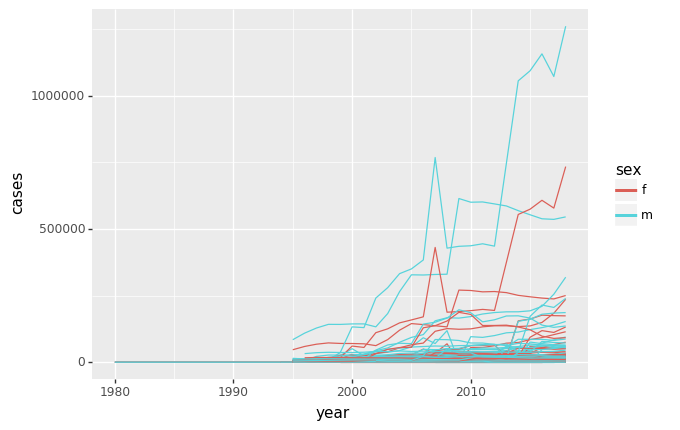

<ggplot: (8726641860465)>

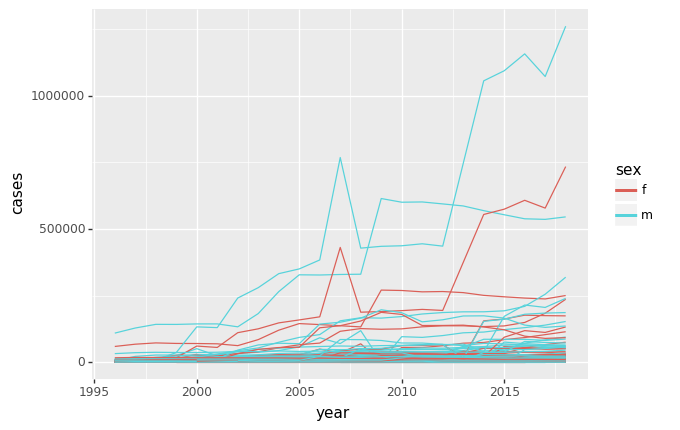

<ggplot: (-9223363310212791264)>

In [64]:
csDf9 = csDf5.copy()
csDf9 = csDf9.drop(columns=["key", "type", "sexage", "age"])
display(csDf9)
csDf10 = csDf9.groupby(["country", "year", "sex"]).sum().reset_index()
display(csDf10)
csDf10["country_sex"] = csDf10["country"] + "_" + csDf10["sex"]
csPlot1 = (ggplot(csDf10,aes(x="year", y='cases', group="country_sex", color="sex")) \
        + geom_line() \
        )
display(csPlot1)
# -> we can see there are no useful observations before 1995
csDf10 = csDf10.loc[csDf10["year"]>1995]
csPlot2 = (ggplot(csDf10,aes(x="year", y='cases', group="country_sex", color="sex")) \
        + geom_line() \
        )
display(csPlot2)

---

#### 3. I claimed that iso2 and iso3 were redundant with country. Confirm this claim.

In [10]:
csDf11 = csDf2.copy()
csDf12 = csDf11.groupby(["country", "iso2", "iso3"]).agg("first")
display(csDf12)
#display(csDf11["country"].nunique())
#display(csDf11["iso2"].nunique())
#display(csDf11["iso3"].nunique())
display(csDf11[["country", "iso2", "iso3"]].nunique())
display(csDf11.groupby(["country", "iso2", "iso3"]).ngroups)
display(csDf11.loc[:,"iso2"].isna().value_counts())
display(csDf11.loc[csDf11["iso2"].isna()])

year  new_sp_m014  new_sp_m1524  \
country                   iso2 iso3                                    
Afghanistan               AF   AFG   1980          0.0          10.0   
Albania                   AL   ALB   1980          0.0           0.0   
Algeria                   DZ   DZA   1980        659.0        1422.0   
American Samoa            AS   ASM   1980          1.0           0.0   
Andorra                   AD   AND   1980          0.0           0.0   
...                                   ...          ...           ...   
Wallis and Futuna Islands WF   WLF   1980          0.0           1.0   
West Bank and Gaza Strip  PS   PSE   1980          1.0           2.0   
Yemen                     YE   YEM   1980         57.0         400.0   
Zambia                    ZM   ZMB   1980         91.0         659.0   
Zimbabwe                  ZW   ZWE   1980        191.0         600.0   

                                     new_sp_m2534  new_sp_m3544  new_sp_m4554  \
country                   iso2 iso3                                             
Afghanistan               AF   AFG            6.0           3.0           5.0   
Albania                   AL   ALB            0.0           0.0          19.0   
Algeria                   DZ   DZA         1982.0         639.0         357.0   
American Samoa            AS   ASM            0.0           1.0           1.0   
Andorra                   AD   AND            0.0           4.0           1.0   
...                                           ...           ...           ...   
Wallis and Futuna Islands WF   WLF            1.0           0.0           0.0   
West Bank and Gaza Strip  PS   PSE            0.0           0.0           1.0   
Yemen                     YE   YEM          605.0         256.0         201.0   
Zambia                    ZM   ZMB         1668.0        1124.0         487.0   
Zimbabwe                  ZW   ZWE         2548.0        1662.0         744.0   

                                     new_sp_m5564  new_sp_m65  new_sp_f014  \
country                   iso2 iso3                                          
Afghanistan               AF   AFG            2.0         0.0          5.0   
Albania                   AL   ALB           40.0        30.0          0.0   
Algeria                   DZ   DZA          312.0       396.0         92.0   
American Samoa            AS   ASM            1.0         1.0          0.0   
Andorra                   AD   AND            0.0         0.0          0.0   
...                                           ...         ...          ...   
Wallis and Futuna Islands WF   WLF            0.0         0.0          0.0   
West Bank and Gaza Strip  PS   PSE            0.0         3.0          0.0   
Yemen                     YE   YEM          148.0        45.0         83.0   
Zambia                    ZM   ZMB          231.0       130.0        129.0   
Zimbabwe                  ZW   ZWE          315.0       159.0        222.0   

                                     new_sp_f1524  ...  newrel_m4554  \
country                   iso2 iso3                ...                 
Afghanistan               AF   AFG           38.0  ...        2113.0   
Albania                   AL   ALB            1.0  ...          44.0   
Algeria                   DZ   DZA         1102.0  ...         475.0   
American Samoa            AS   ASM            0.0  ...           1.0   
Andorra                   AD   AND            1.0  ...           2.0   
...                                           ...  ...           ...   
Wallis and Futuna Islands WF   WLF            1.0  ...           0.0   
West Bank and Gaza Strip  PS   PSE            1.0  ...           6.0   
Yemen                     YE   YEM          420.0  ...         659.0   
Zambia                    ZM   ZMB         1125.0  ...        2950.0   
Zimbabwe                  ZW   ZWE          914.0  ...        2349.0   

                                     newrel_m5564  newrel_m65  newrel_f014  \
country         

country    218
iso2       217
iso3       218
dtype: int64

217

False    8247
True       39
Name: iso2, dtype: int64

country iso2 iso3  year  new_sp_m014  new_sp_m1524  new_sp_m2534  \
5063  Namibia  NaN  NAM  1980          NaN           NaN           NaN   
5064  Namibia  NaN  NAM  1981          NaN           NaN           NaN   
5065  Namibia  NaN  NAM  1982          NaN           NaN           NaN   
5066  Namibia  NaN  NAM  1983          NaN           NaN           NaN   
5067  Namibia  NaN  NAM  1984          NaN           NaN           NaN   
5068  Namibia  NaN  NAM  1985          NaN           NaN           NaN   
5069  Namibia  NaN  NAM  1986          NaN           NaN           NaN   
5070  Namibia  NaN  NAM  1987          NaN           NaN           NaN   
5071  Namibia  NaN  NAM  1988          NaN           NaN           NaN   
5072  Namibia  NaN  NAM  1989          NaN           NaN           NaN   
5073  Namibia  NaN  NAM  1990          NaN           NaN           NaN   
5074  Namibia  NaN  NAM  1991          NaN           NaN           NaN   
5075  Namibia  NaN  NAM  1992          NaN           NaN           NaN   
5076  Namibia  NaN  NAM  1993          NaN           NaN           NaN   
5077  Namibia  NaN  NAM  1994          NaN           NaN           NaN   
5078  Namibia  NaN  NAM  1995          0.0          68.0         235.0   
5079  Namibia  NaN  NAM  1996         16.0         205.0         613.0   
5080  Namibia  NaN  NAM  1997         18.0         232.0         791.0   
5081  Namibia  NaN  NAM  1998         21.0         270.0         816.0   
5082  Namibia  NaN  NAM  1999         20.0         247.0         908.0   
5083  Namibia  NaN  NAM  2000         18.0         269.0         874.0   
5084  Namibia  NaN  NAM  2001         20.0         322.0         993.0   
5085  Namibia  NaN  NAM  2002         19.0         301.0        1033.0   
5086  Namibia  NaN  NAM  2003         31.0         364.0        1109.0   
5087  Namibia  NaN  NAM  2004         31.0         319.0        1092.0   
5088  Namibia  NaN  NAM  2005         98.0         355.0        1027.0   
5089  Namibia  NaN  NAM  2006         86.0         347.0        1052.0   
5090  Namibia  NaN  NAM  2007         57.0         370.0        1018.0   
5091  Namibia  NaN  NAM  2008         30.0         387.0        1033.0   
5092  Namibia  NaN  NAM  2009         41.0         357.0         936.0   
5093  Namibia  NaN  NAM  2010         36.0         359.0         852.0   
5094  Namibia  NaN  NAM  2011         48.0         337.0         844.0   
5095  Namibia  NaN  NAM  2012         61.0         358.0         810.0   
5096  Namibia  NaN  NAM  2013          NaN           NaN           NaN   
5097  Namibia  NaN  NAM  2014          NaN           NaN           NaN   
5098  Namibia  NaN  NAM  2015          NaN           NaN           NaN   
5099  Namibia  NaN  NAM  2016          NaN           NaN           NaN   
5100  Namibia  NaN  NAM  2017          NaN           NaN           NaN   
5101  Namibia  NaN  NAM  2018          NaN           NaN           NaN   

      new_sp_m3544  new_sp_m4554  new_sp_m5564  ...  newrel_m4554  \
5063           NaN           NaN           NaN  ...           NaN   
5064           NaN           NaN           NaN  ...           NaN   
5065           NaN           NaN           NaN  ...           NaN   
5066           NaN           NaN           NaN  ...           NaN   
5067           NaN           NaN           NaN  ...           NaN   
5068           NaN           NaN           NaN  ...           NaN   
5069           NaN           NaN           NaN  ...           NaN   
5070           NaN           NaN           NaN  ...           NaN   
5071           NaN           NaN           NaN  ...           NaN   
5072           NaN           NaN           NaN  ...           NaN   
5073           NaN           NaN           NaN  ...           NaN   
5074           NaN           NaN           NaN  ...           NaN   
5075           NaN           NaN           NaN  ...           NaN   
5076           NaN           NaN           NaN  ...           NaN   
5077      

So now we know, that only for Namibia, there are NaN values. So now we need to check, if the number of rows with country "Namibia" is the same number of Rows containing NaN.

In [101]:
# check if number of rows that have country == "Namibia" is the same number of rows that have iso2 == NaN
display(len(csDf11.query("country == 'Namibia'").index) == (len(csDf11.loc[csDf11["iso2"].isna()].index)))

# check, if all rows are unique
display(csDf11.drop_duplicates(
    ["country", "iso2", "iso3"]
).set_index(
    ["country", "iso2", "iso3"]
).index.is_unique)

True

True

So now we have proof, that there is no extra value added by the iso2 and iso3 as a country-iso2-iso3 relationship is always 1-1-1.

### 12.7 Non-tidy data

There are good reasons some data are not tidy. Often they follow industry-specific conventions, yielding Performance gains etc.  
This blog post shares some important thoughts about non-tidy data:  
https://simplystatistics.org/2016/02/17/non-tidy-data/

---
---

## 13 Relational data

### 13.2 nycflights13

Let's look at the datasets available in the nycflights13 package.

`airlines` contains the full name of the airline by carrier code.

In [70]:
alflDf1 = pd.read_csv("Datasets/nycflights13/airlines.csv")
display(alflDf1)

carrier                         name
0       9E            Endeavor Air Inc.
1       AA       American Airlines Inc.
2       AS         Alaska Airlines Inc.
3       B6              JetBlue Airways
4       DL         Delta Air Lines Inc.
5       EV     ExpressJet Airlines Inc.
6       F9       Frontier Airlines Inc.
7       FL  AirTran Airways Corporation
8       HA       Hawaiian Airlines Inc.
9       MQ                    Envoy Air
10      OO        SkyWest Airlines Inc.
11      UA        United Air Lines Inc.
12      US              US Airways Inc.
13      VX               Virgin America
14      WN       Southwest Airlines Co.
15      YV           Mesa Airlines Inc.

`airports` contains information about the airport by the `faa` airport code.

In [71]:
apflDf1 = pd.read_csv("Datasets/nycflights13/airports.csv")
display(apflDf1)

faa                           name        lat         lon   alt  tz dst  \
0     04G              Lansdowne Airport  41.130472  -80.619583  1044  -5   A   
1     06A  Moton Field Municipal Airport  32.460572  -85.680028   264  -6   A   
2     06C            Schaumburg Regional  41.989341  -88.101243   801  -6   A   
3     06N                Randall Airport  41.431912  -74.391561   523  -5   A   
4     09J          Jekyll Island Airport  31.074472  -81.427778    11  -5   A   
...   ...                            ...        ...         ...   ...  ..  ..   
1453  ZUN                     Black Rock  35.083228 -108.791778  6454  -7   A   
1454  ZVE         New Haven Rail Station  41.298669  -72.925992     7  -5   A   
1455  ZWI      Wilmington Amtrak Station  39.736667  -75.551667     0  -5   A   
1456  ZWU       Washington Union Station  38.897460  -77.006430    76  -5   A   
1457  ZYP                   Penn Station  40.750500  -73.993500    35  -5   A   

                 tzone  
0     America/New_York  
1      America/Chicago  
2      America/Chicago  
3     America/New_York  
4     America/New_York  
...                ...  
1453    America/Denver  
1454  America/New_York  
1455  America/New_York  
1456  America/New_York  
1457  America/New_York  

[1458 rows x 8 columns]

`planes` gives information about the planes by `tailnum`

In [72]:
pnflDf1 = pd.read_csv("Datasets/nycflights13/planes.csv")
display(pnflDf1)

tailnum    year                     type                   manufacturer  \
0     N10156  2004.0  Fixed wing multi engine                        EMBRAER   
1     N102UW  1998.0  Fixed wing multi engine               AIRBUS INDUSTRIE   
2     N103US  1999.0  Fixed wing multi engine               AIRBUS INDUSTRIE   
3     N104UW  1999.0  Fixed wing multi engine               AIRBUS INDUSTRIE   
4     N10575  2002.0  Fixed wing multi engine                        EMBRAER   
...      ...     ...                      ...                            ...   
3317  N997AT  2002.0  Fixed wing multi engine                         BOEING   
3318  N997DL  1992.0  Fixed wing multi engine  MCDONNELL DOUGLAS AIRCRAFT CO   
3319  N998AT  2002.0  Fixed wing multi engine                         BOEING   
3320  N998DL  1992.0  Fixed wing multi engine  MCDONNELL DOUGLAS CORPORATION   
3321  N999DN  1992.0  Fixed wing multi engine  MCDONNELL DOUGLAS CORPORATION   

          model  engines  seats  speed     engine  
0     EMB-145XR        2     55    NaN  Turbo-fan  
1      A320-214        2    182    NaN  Turbo-fan  
2      A320-214        2    182    NaN  Turbo-fan  
3      A320-214        2    182    NaN  Turbo-fan  
4     EMB-145LR        2     55    NaN  Turbo-fan  
...         ...      ...    ...    ...        ...  
3317    717-200        2    100    NaN  Turbo-fan  
3318      MD-88        2    142    NaN  Turbo-fan  
3319    717-200        2    100    NaN  Turbo-fan  
3320      MD-88        2    142    NaN  Turbo-jet  
3321      MD-88        2    142    NaN  Turbo-jet  

[3322 rows x 9 columns]

`weather` contains information about the weather at each NYC airport per hour.

In [73]:
wtflDf1 = pd.read_csv("Datasets/nycflights13/weather.csv")
display(wtflDf1)

origin  year  month  day  hour   temp   dewp  humid  wind_dir  \
0        EWR  2013      1    1     1  39.02  26.06  59.37     270.0   
1        EWR  2013      1    1     2  39.02  26.96  61.63     250.0   
2        EWR  2013      1    1     3  39.02  28.04  64.43     240.0   
3        EWR  2013      1    1     4  39.92  28.04  62.21     250.0   
4        EWR  2013      1    1     5  39.02  28.04  64.43     260.0   
...      ...   ...    ...  ...   ...    ...    ...    ...       ...   
26110    LGA  2013     12   30    14  35.96  19.94  51.78     340.0   
26111    LGA  2013     12   30    15  33.98  17.06  49.51     330.0   
26112    LGA  2013     12   30    16  32.00  15.08  49.19     340.0   
26113    LGA  2013     12   30    17  30.92  12.92  46.74     320.0   
26114    LGA  2013     12   30    18  28.94  10.94  46.41     330.0   

       wind_speed  wind_gust  precip  pressure  visib             time_hour  
0        10.35702        NaN     0.0    1012.0   10.0  2013-01-01T06:00:00Z  
1         8.05546        NaN     0.0    1012.3   10.0  2013-01-01T07:00:00Z  
2        11.50780        NaN     0.0    1012.5   10.0  2013-01-01T08:00:00Z  
3        12.65858        NaN     0.0    1012.2   10.0  2013-01-01T09:00:00Z  
4        12.65858        NaN     0.0    1011.9   10.0  2013-01-01T10:00:00Z  
...           ...        ...     ...       ...    ...                   ...  
26110    13.80936   21.86482     0.0    1017.1   10.0  2013-12-30T19:00:00Z  
26111    17.26170   21.86482     0.0    1018.8   10.0  2013-12-30T20:00:00Z  
26112    14.96014   23.01560     0.0    1019.5   10.0  2013-12-30T21:00:00Z  
26113    17.26170        NaN     0.0    1019.9   10.0  2013-12-30T22:00:00Z  
26114    18.41248        NaN     0.0    1020.9   10.0  2013-12-30T23:00:00Z  

[26115 rows x 15 columns]

`flights` is the dataset we already used earlier in this notebook. It contains the tidy overall data and connects the different tables.

In [75]:
flDf1 = pd.read_csv("Datasets/nycflights13/flights.csv")
display(flDf1)

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1     517.0             515        2.0     830.0   
1       2013      1    1     533.0             529        4.0     850.0   
2       2013      1    1     542.0             540        2.0     923.0   
3       2013      1    1     544.0             545       -1.0    1004.0   
4       2013      1    1     554.0             600       -6.0     812.0   
...      ...    ...  ...       ...             ...        ...       ...   
336771  2013      9   30       NaN            1455        NaN       NaN   
336772  2013      9   30       NaN            2200        NaN       NaN   
336773  2013      9   30       NaN            1210        NaN       NaN   
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
0                  819       11.0      UA    1545  N14228    EWR  IAH   
1                  830       20.0      UA    1714  N24211    LGA  IAH   
2                  850       33.0      AA    1141  N619AA    JFK  MIA   
3                 1022      -18.0      B6     725  N804JB    JFK  BQN   
4                  837      -25.0      DL     461  N668DN    LGA  ATL   
...                ...        ...     ...     ...     ...    ...  ...   
336771            1634        NaN      9E    3393     NaN    JFK  DCA   
336772            2312        NaN      9E    3525     NaN    LGA  SYR   
336773            1330        NaN      MQ    3461  N535MQ    LGA  BNA   
336774            1344        NaN      MQ    3572  N511MQ    LGA  CLE   
336775            1020        NaN      MQ    3531  N839MQ    LGA  RDU   

        air_time  distance  hour  minute             time_hour  
0          227.0      1400     5      15  2013-01-01T10:00:00Z  
1          227.0      1416     5      29  2013-01-01T10:00:00Z  
2          160.0      1089     5      40  2013-01-01T10:00:00Z  
3          183.0      1576     5      45  2013-01-01T10:00:00Z  
4          116.0       762     6       0  2013-01-01T11:00:00Z  
...          ...       ...   ...     ...                   ...  
336771       NaN       213    14      55  2013-09-30T18:00:00Z  
336772       NaN       198    22       0  2013-10-01T02:00:00Z  
336773       NaN       764    12      10  2013-09-30T16:00:00Z  
336774       NaN       419    11      59  2013-09-30T15:00:00Z  
336775       NaN       431     8      40  2013-09-30T12:00:00Z  

[336776 rows x 19 columns]

### 13.3 Keys

To check if a variable is a primary key to a table, we need to check the counts > 1:  
We use the GroupBy.size() to check the row count per group (= per combination of the grouped by values).

In [115]:
flDf2 = flDf1.copy()
display(
    flDf2.groupby(["year", "month", "day", "flight"])
    .size()
    .reset_index()
    .rename(columns={0:"count"})
    .query("count > 1")
)
#display(flDf2[["year", "month", "day", "flight"]].unique())

year  month  day  flight  count
0       2013      1    1       1      2
1       2013      1    1       3      2
2       2013      1    1       4      2
7       2013      1    1      11      3
9       2013      1    1      15      2
...      ...    ...  ...     ...    ...
303919  2013     12   31    2043      2
303933  2013     12   31    2181      2
303945  2013     12   31    2285      2
303963  2013     12   31    2488      2
304049  2013     12   31    3425      2

[29768 rows x 5 columns]

Now we can clearly see, that the combination of year, month, day and flight does not form a primary key.  
If there is no primary key, we add one. This key is called a **surrogate key**

#### 13.3.1 Excercises

#### 1. Add a surrogate key to flights.

In [120]:
flDf3=flDf2.copy()
flDf3["id"] = flDf3.index
# reordering to put the newly created column at the beginning
cols = flDf3.columns.tolist()[:-1]

# 1st possible solution:
#cols.insert(0,"id")
#display(cols)
#flDf3 = flDf3[cols]

# 2nd possible solution:

# NOTE: the * stands for *args, which is an iterable of arguments passed to a function
# python will take the list and iterate through it
# similarly, this can be done with key:value dictionaries: **kwargs
flDf3 = flDf3.loc[:,("id", *cols)]
display(flDf3)

id  year  month  day  dep_time  sched_dep_time  dep_delay  \
0            0  2013      1    1     517.0             515        2.0   
1            1  2013      1    1     533.0             529        4.0   
2            2  2013      1    1     542.0             540        2.0   
3            3  2013      1    1     544.0             545       -1.0   
4            4  2013      1    1     554.0             600       -6.0   
...        ...   ...    ...  ...       ...             ...        ...   
336771  336771  2013      9   30       NaN            1455        NaN   
336772  336772  2013      9   30       NaN            2200        NaN   
336773  336773  2013      9   30       NaN            1210        NaN   
336774  336774  2013      9   30       NaN            1159        NaN   
336775  336775  2013      9   30       NaN             840        NaN   

        arr_time  sched_arr_time  arr_delay carrier  flight tailnum origin  \
0          830.0             819       11.0      UA    1545  N14228    EWR   
1          850.0             830       20.0      UA    1714  N24211    LGA   
2          923.0             850       33.0      AA    1141  N619AA    JFK   
3         1004.0            1022      -18.0      B6     725  N804JB    JFK   
4          812.0             837      -25.0      DL     461  N668DN    LGA   
...          ...             ...        ...     ...     ...     ...    ...   
336771       NaN            1634        NaN      9E    3393     NaN    JFK   
336772       NaN            2312        NaN      9E    3525     NaN    LGA   
336773       NaN            1330        NaN      MQ    3461  N535MQ    LGA   
336774       NaN            1344        NaN      MQ    3572  N511MQ    LGA   
336775       NaN            1020        NaN      MQ    3531  N839MQ    LGA   

       dest  air_time  distance  hour  minute             time_hour  
0       IAH     227.0      1400     5      15  2013-01-01T10:00:00Z  
1       IAH     227.0      1416     5      29  2013-01-01T10:00:00Z  
2       MIA     160.0      1089     5      40  2013-01-01T10:00:00Z  
3       BQN     183.0      1576     5      45  2013-01-01T10:00:00Z  
4       ATL     116.0       762     6       0  2013-01-01T11:00:00Z  
...     ...       ...       ...   ...     ...                   ...  
336771  DCA       NaN       213    14      55  2013-09-30T18:00:00Z  
336772  SYR       NaN       198    22       0  2013-10-01T02:00:00Z  
336773  BNA       NaN       764    12      10  2013-09-30T16:00:00Z  
336774  CLE       NaN       419    11      59  2013-09-30T15:00:00Z  
336775  RDU       NaN       431     8      40  2013-09-30T12:00:00Z  

[336776 rows x 20 columns]

#### 2. Identify the keys in the following datasets

1. Lahman::Batting,
2. babynames::babynames
3. nasaweather::atmos
4. fueleconomy::vehicles
5. ggplot2::diamonds

(You might need to install some packages and read some documentation.)

1. Batting

It seems, that only the combination of playerID, yearID and stint (= player's order of appearances within a season) forms a primary key. Everything else may make sense by accident, but is no primary key.

In [140]:
batDf1 = pd.read_csv("Datasets/baseballdatabank-master/core/Batting.csv")
display(batDf1)
display(batDf1.groupby(["playerID", "yearID", "stint"]).size().reset_index().rename(columns={0:"count"}).query("count > 1"))

playerID  yearID  stint teamID lgID   G   AB   R   H  2B  ...   RBI  \
0       abercda01    1871      1    TRO  NaN   1    4   0   0   0  ...   0.0   
1        addybo01    1871      1    RC1  NaN  25  118  30  32   6  ...  13.0   
2       allisar01    1871      1    CL1  NaN  29  137  28  40   4  ...  19.0   
3       allisdo01    1871      1    WS3  NaN  27  133  28  44  10  ...  27.0   
4       ansonca01    1871      1    RC1  NaN  25  120  29  39  11  ...  16.0   
...           ...     ...    ...    ...  ...  ..  ...  ..  ..  ..  ...   ...   
107424  zimmejo02    2019      1    DET   AL  23    2   0   0   0  ...   0.0   
107425  zimmeky01    2019      1    KCA   AL  15    0   0   0   0  ...   0.0   
107426  zimmery01    2019      1    WAS   NL  52  171  20  44   9  ...  27.0   
107427  zobribe01    2019      1    CHN   NL  47  150  24  39   5  ...  17.0   
107428  zuninmi01    2019      1    TBA   AL  90  266  30  44  10  ...  32.0   

         SB   CS  BB    SO  IBB  HBP   SH   SF  GIDP  
0       0.0  0.0   0   0.0  NaN  NaN  NaN  NaN   0.0  
1       8.0  1.0   4   0.0  NaN  NaN  NaN  NaN   0.0  
2       3.0  1.0   2   5.0  NaN  NaN  NaN  NaN   1.0  
3       1.0  1.0   0   2.0  NaN  NaN  NaN  NaN   0.0  
4       6.0  2.0   2   1.0  NaN  NaN  NaN  NaN   0.0  
...     ...  ...  ..   ...  ...  ...  ...  ...   ...  
107424  0.0  0.0   0   2.0  0.0  0.0  0.0  0.0   0.0  
107425  0.0  0.0   0   0.0  0.0  0.0  0.0  0.0   0.0  
107426  0.0  0.0  17  39.0  0.0  0.0  0.0  2.0   4.0  
107427  0.0  0.0  23  24.0  0.0  1.0  0.0  2.0   6.0  
107428  0.0  0.0  20  98.0  0.0  3.0  0.0  0.0   4.0  

[107429 rows x 22 columns]

Empty DataFrame
Columns: [playerID, yearID, stint, count]
Index: []

5. diamonds

Answer: for the diamonds dataset, there is no primary key and even combining all columns does not yield only unique values.

In [154]:
display(diamonds)
display(diamonds.groupby(["carat", "x", "y", "z"]).size().reset_index().rename(columns={0:"count"}).query("count > 1"))
display(diamonds.groupby(["carat", "cut", "color", "clarity", "depth", "table", "price", "x", "y", "z"]).size().reset_index().rename(columns={0:"count"}).query("count > 1"))

# CHECK FIRST:
# is the number of unique rows smaller than the size of the dataframe? If yes, then there is no primary key at all!
display(diamonds.size > diamonds.drop_duplicates().size)

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

carat     x     y     z  count
61      0.23  3.90  3.93  2.42      3
65      0.23  3.90  3.93  2.48      2
71      0.23  3.90  3.95  2.47      2
76      0.23  3.91  3.94  2.43      2
77      0.23  3.91  3.94  2.45      2
...      ...   ...   ...   ...    ...
43417   2.50  8.46  8.43  5.48      2
43467   2.54  8.68  8.65  5.50      2
43496   2.66  8.71  8.65  5.54      2
43523   3.01  8.99  8.94  5.90      2
43524   3.01  9.06  9.01  5.77      2

[6328 rows x 5 columns]

carat        cut color clarity  depth  table  price     x     y     z  \
1831    0.30       Good     J     VS1   63.4   57.0    394  4.23  4.26  2.69   
2086    0.30  Very Good     G     VS2   63.0   55.0    526  4.29  4.31  2.71   
2354    0.30  Very Good     J     VS1   63.4   57.0    506  4.26  4.23  2.69   
2390    0.30    Premium     D     SI1   62.2   58.0    709  4.31  4.28  2.67   
3706    0.30      Ideal     G     VS2   63.0   55.0    675  4.31  4.29  2.71   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53660   2.50       Fair     H     SI2   64.9   58.0  13278  8.46  8.43  5.48   
53706   2.54  Very Good     H     SI2   63.5   56.0  16353  8.68  8.65  5.50   
53738   2.66       Good     H     SI2   63.8   57.0  16239  8.71  8.65  5.54   
53765   3.01       Fair     I     SI2   65.8   56.0  18242  8.99  8.94  5.90   
53767   3.01       Good     I     SI2   63.9   60.0  18242  9.06  9.01  5.77   

       count  
1831       2  
2086       2  
2354       2  
2390       2  
3706       2  
...      ...  
53660      2  
53706      2  
53738      2  
53765      2  
53767      2  

[143 rows x 11 columns]

True

---

### 13.4 Mutating joins

A **mutating join** allows you to combine variables from two tables. Mutating joins add additional variables to the result table, just like a `mutate` does in R.

*The function for SQL-like joins in Pandas is the `pd.merge()`. It is very performant and works in-memory.*  
Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html#pandas.merge

#### 13.4.2 Inner join

Inner joins only matches a pair of observations if their keys are equal. All other observations will be left out.  
This is the inner *"equijoin"* as it matches on equality. Usually this is meant when addressing an inner join, so it is left out.

In [10]:
joinDf1 = pd.DataFrame({"key":["a", "b", "c", "d"], "value":[1, 2, 3, 4]})
joinDf2 = pd.DataFrame({"key":["a", "b", "d", "e"], "value":["eins", "zwei", "drei", "vier"]})

display(
    pd.merge(joinDf1, joinDf2, how="inner", on="key")
)

key  value_x value_y
0   a        1    eins
1   b        2    zwei
2   d        4    drei

Inner joins are usually irrelevant for Data Science purposes as they do not include unmatched rows in the result. Therefore it is very easy to lose observations.

#### 13.4.3 Outer joins

With 2 DataFrames: left `x` and right `y`

3 variants:
* A left join keeps all observations in `x`
* A right join keeps all observations in `y`
* A full/outer join keeps all observations in `x` and `y`

This works by having "virtual" observations on each table. Ex.: if you do a left join, the right table has a key that always matches when no other key of thr right table matches. Its value is NaN. So for each key in the left table that does not exist in the right table, the value from the right table will be NaN, keeping all the left table values in the result table.  
Similarly, this works with the right outer join and also with the full outer join for which both tables have such a "virtual" key.

Now let's take a look at them in Pandas:

In [7]:
display("left outer join", 
       pd.merge(joinDf1, joinDf2, how="left", on="key"),
       "")
display("right outer join", 
       pd.merge(joinDf1, joinDf2, how="right", on="key"),
       "")
display("full outer join", 
       pd.merge(joinDf1, joinDf2, how="outer", on="key"),
       "")

'left outer join'

key  value_x value_y
0   a        1    eins
1   b        2    zwei
2   c        3     NaN
3   d        4    drei

''

'right outer join'

key  value_x value_y
0   a      1.0    eins
1   b      2.0    zwei
2   d      4.0    drei
3   e      NaN    vier

''

'full outer join'

key  value_x value_y
0   a      1.0    eins
1   b      2.0    zwei
2   c      3.0     NaN
3   d      4.0    drei
4   e      NaN    vier

''

The most common join is the left join, because it alows you to add information from another table to the table you are working with and it fully keeps the original observations of your left table.

#### 13.4.4 Duplicate keys

There are two popular cases:
1. Only one table holds duplicate keys.
This indicates, that in the table with duplicate keys, the variable is the foreign key while for the table without duplicate keys the variable is the primary key. In this case the joins will produce a "broadcast" of the observations with the primary key:

In [8]:
joinDf3 = pd.DataFrame({"key":["a", "b", "b", "a"], "value":[11, 12, 13, 14]})

display("left join with duplicate keys on right table",
        pd.merge(joinDf1, joinDf3, how="left", on="key", validate="one_to_many")
)
display("right join with duplicate keys on right table",
        pd.merge(joinDf1, joinDf3, how="right", on="key")
)
# NOTE: this will result in an error, because the validation does not result in True:
#pd.merge(joinDf1, joinDf3, how="left", on="key", validate="many_to_one")

'left join with duplicate keys on right table'

key  value_x  value_y
0   a        1     11.0
1   a        1     14.0
2   b        2     12.0
3   b        2     13.0
4   c        3      NaN
5   d        4      NaN

'right join with duplicate keys on right table'

key  value_x  value_y
0   a        1       11
1   a        1       14
2   b        2       12
3   b        2       13

2. Both table hold duplicate keys. This is most likely an error because in neither table do the keys uniquely identify an observation. Joining will produce all possible combinations, the "cartesian product".

In [9]:
joinDf4 = pd.DataFrame({"key":["a","b","b","a"], "value":[21, 22, 23, 24]})

# validate not necessary here, as "many_to_many" will not result in a check. But it helps for documentation purposes.
display("left join with duplicate keys in both tables",
       pd.merge(joinDf3, joinDf4, how="left", on="key", validate="many_to_many"),
       "")
display("right join with duplicate keys in both tables",
       pd.merge(joinDf3, joinDf4, how="right", on="key"),
       "")

'left join with duplicate keys in both tables'

key  value_x  value_y
0   a       11       21
1   a       11       24
2   b       12       22
3   b       12       23
4   b       13       22
5   b       13       23
6   a       14       21
7   a       14       24

''

'right join with duplicate keys in both tables'

key  value_x  value_y
0   a       11       21
1   a       14       21
2   a       11       24
3   a       14       24
4   b       12       22
5   b       13       22
6   b       12       23
7   b       13       23

''

A very convenient method to keep your code from accidentally dealing with duplicates at all or duplicates in the wrong table, the `merge` function has the parameter `validate`. This takes one of four different variables and therefore maps for a 1-1, 1-n, n-1, n-n relation between the keys.  
Valid strings for `validate= str`:
* "one_to_one"
* "one_to_many"
* "many_to_one"
* "many_to_many"  

*Note, that "many_to_many" will not check for duplicates. It merely helps to document what is allowed.*

`indicator`, when set to `True`, creates a new column in the output table that is called "_merge" by default and displays for each row, if the merge key is only present for the left, for the right or for both tables. Alternatively, the column can be given a custom name by passing a string: `indicator = str`  
Possible return values in the "_merge" column:
* left_only
* right_only
* both

#### 13.4.5 Defining the key columns

When specifying the `on` parameter, the DF are joined on a single key that appears in both DF.  
By using `left_on` and `right_on` parameters, the DF can be joined based on 2 different key columns.  
Usually if no single variable to join on is specified, all variables that appear in both tables are used. This is the so called **natural join**.


#### Joining DataFrames on different keys each

This can be achieved by using the `left_on` and `right_on` parameters

In [14]:
joinDf6 = pd.DataFrame({"key":["a", "b", "c", "d"], "value":[1, 2, 3, 4]})
joinDf7 = pd.DataFrame({"key2":["a", "b", "d", "e"], "value":["eins", "zwei", "drei", "vier"]})
display(pd.merge(joinDf6, joinDf7, how="left", left_on="key", right_on="key2", suffixes=("_left", "_right")))

key  value_left key2 value_right
0   a           1    a        eins
1   b           2    b        zwei
2   c           3  NaN         NaN
3   d           4    d        drei

#### Asof merge

`pd.merge_asof`

Asof merge performs a merge on two ordered dataframes. It is similar to an ordered left-join except for it matches on nearest and not on equal keys.  
For each row in the left DataFrame, we select the last row in the right DataFrame whose on key is less than the left’s key.  
Both DataFrames must be sorted by the key.  
--> https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-asof

#### Sorted merge

`pd.merge_ordered`

Ordered merge is usually used on time-series data. One particularly useful parameter is the fill_method.

#### Pandas Join

`pd.DataFrame.join`

Joins series or dataframes by index or a key column. Can be passed a list of dataframes.

### 13.5 Filtering joins

Filtering joins match observations in the same way as mutating joins. But they affect the observations, not the variables.  
R offers methods called `semi_join` and `anti_join`.  

`semi_join` **keeps** all observations in the first table that have a match in the second table.  
`anti_join` **drops** all observations in the first table that have a match in the second table.  

In Pandas, unfortunately, these methods are not implemented. Instead we need to work with `df.variable.isin()` and `df.loc[]`  
As an alternative which is more straightforward, we can make use of the `indicator` parameter of `pd.merge` and filter the resulting `_merge` column with the indicators for "left_only", "right_only" or "both".  
Unfortunately, using the indicator is way slower.

In [39]:
joinDf8 = pd.DataFrame({"key":["a", "b", "c", "d"], "value":[1, 2, 3, 4]})
joinDf9 = pd.DataFrame({"key":["a", "b", "d", "e", "f"], "value":["eins", "zwei", "drei", "vier", "fünf"]})

display(joinDf8)
display(joinDf9)

key  value
0   a      1
1   b      2
2   c      3
3   d      4

key value
0   a  eins
1   b  zwei
2   d  drei
3   e  vier
4   f  fünf

Semi-join with `loc` & `isin`:

In [36]:
# Semi-join:
joinDfnew1 = joinDf8.loc[joinDf8.key.isin(joinDf9.key)]
display(joinDfnew1)

key  value
0   a      1
1   b      2
3   d      4

Anti-join with `loc` & `isin`:

In [38]:
# Anti-join:
joinDfnew2 = joinDf8.loc[~joinDf8.key.isin(joinDf9.key)]
display(joinDfnew2)

key  value
2   c      3

Semi-join with `merge` & `indicator`:

In [34]:
joinDf10 = pd.merge(joinDf8, joinDf9, how="outer", on="key", indicator=True)
joinDf10 = joinDf10.query("_merge == 'both'").drop(columns=["_merge","value_y"])
display(joinDf10)

key  value_x
0   a      1.0
1   b      2.0
3   d      4.0

Anti-join with `merge` & `indicator`:

In [29]:
joinDf11 = pd.merge(joinDf8, joinDf9, how="outer", on="key", indicator=True)
joinDf11 = joinDf11.query("_merge == 'left_only'").drop(columns=["_merge", "value_y"])
display(joinDf11)

key  value_x
2   c      3.0

### 13.6 Join problems

There are a few things one should do to make sure the data joins go smoothly:
1. Start by identifying the variables that form the primary key in each table. This should be done based on the understanding of the variables, not by looking at the occurences of combinations of variables. The dataset itself might present one variable as a unique identifier, but this might just be a random effect in this particular dataset and not in general.
2. Check that none of the variables in the primary key are missing. Missing primary key values means the observation can not be identified.
3. Check that foreign keys match primary keys in another table. Best practice is by using an **anti join**. Often, this is because of data entry errors and it might take a substantial amount of work to fix it.

If you have missing keys, the usage of **outer and inner joins** needs to be thoughtfully evaluated due to the fact that rows will be dropped that don't have a match.  
Also, just checking the row count before and after a join will be misleading due to duplicate keys in both tables. For example the number of dropped rows might equal exactly the number of duplicated rows.

### 13.7 Set operations (not the same exist for Pandas)

There are 3 particularly useful operations that can be done on sets (see https://www.geeksforgeeks.org/python-set-method/ for more on python set method).  
In Pandas, there are functions that apply this to an Index which means we can at least do something similar as in R to pandas.Series
1. `intersection`
2. `union`
3. `difference`

In [44]:
joinS1 = pd.Series([4,5,6,20,42])
joinS2 = pd.Series([1,2,3,5,42])

#### Intersect:

In [42]:
joinS3 = pd.Series(list(set(joinS1).intersection(set(joinS2))))
# set1.intersection(set2)
# but convert each pd.Series to set first: set(pd.Series)
# and convert the intersection result to list before converting to pd.Series
display(joinS3)

0    42
1     5
dtype: int64

In [50]:
# alternatively using the pandas.Index.intersection
pd.Series(pd.Index(joinS1).intersection(pd.Index(joinS2)))

0     5
1    42
dtype: int64

#### Union

In [52]:
# using the pandas.Index.union
pd.Series(pd.Index(joinS1).union(pd.Index(joinS2)))

0     1
1     2
2     3
3     4
4     5
5     6
6    20
7    42
dtype: int64

#### Difference

In [53]:
# using the pandas.Index.difference
pd.Series(pd.Index(joinS1).difference(pd.Index(joinS2)))

0     4
1     6
2    20
dtype: int64

---
---

---
---

## 14 Strings

### 14.2 String Basics

In Python, to display Strings properly and make proper use of the escape characters, use `print()` instead of `display()`

In [77]:
print("\\")
display("\\")
print("\n")
display("\n")

\


'\\'

'\n'

In [92]:
# print a tuple of strings
for i in ("abc", "abcdefg", "a"):
    print(len(i))

# print string with maximum length
print(max(("abc", "abcdefg", "a"), key=len))

3
7
1
abcdefg


#### Python String Slicing

In [19]:
str1 = "Hello World"
print(str1[:2])
print(str1[2:])
print(str1[1:2])

# 3rd parameter is for "steps"
str2 = "H-e-l-l-o-W-o-r-l-d"
print("Steps: "+ str2[::2])
print("Start from position 10, go till end in steps of 2: " + str2[10::2])

He
llo World
e
Steps: HelloWorld
Start from position 10, go till end in steps of 2: World


#### Locales

A `locale` is a set of culture specific conventions that allows a programmer to work with the specifics of a culture without knowing all about it.  
a locale has certain variables that are set for the whole environment (which is why the locale is usually just set once at the beginning of the application). There are also calculation methods that deal with common issues like working with numbers in string format that use specific seperators etc.

---

---

### 14.3 Matching patterns with regular expressions

Python has a module called `re` for the use of regexp.
It embodies a few functions, the most important being:
* `findall()` - Returns a list containing all matches
* `search()` - Returns a Match object if there is a match anywhere in the string
* `split()` - Returns a list where the string has been split at each match 
* `sub()` - Replaces one or many matches with a string

**Important:** There is a third-party project called `regex` (`pip install regex`) which extends the standard `re` functionalities.  
We will, for example, need it in the [14.4.1.1 Exercises](#14.4.1.1-Exercises) to match any unicode letter.

#### 14.3.1 Basic matches

*Note: regular expression matches never overlap. See the example below:*

In [182]:
re.findall("aba", "abababa")

['aba', 'aba']

<br>

In [21]:
strL1 = ["apple", "banana", "pear"]

An exact match is specified by just passing the string that should be matched.

In [22]:
for i in strL1:
    print(re.findall("an", i))

[]
['an', 'an']
[]


`.` matches all characters except for a newline.

In [23]:
for i in strL1:
    print(re.findall(".a.", i))

[]
['ban']
['ear']


To match special characters, like the ".", we use the **backslash** `\`.  
However, there is one issue: we use a **string** to express a regular expression. In a string, the `\` needs to be escaped too, so that we need to pass a string of `"\\."` to the regex in order for the regex to have `\.` which will then match a `"."`  

***Note:*** *it seems that this behavior is not necessary in python, as the `re` module already deals with this properly. So in the following example, both, `"\\."` and `"\."` yield the same result.*

In [24]:
strL2 = ["Apple\\", "Banana.", "Pear"]

In [25]:
for i in strL2:
    print(re.findall("\\.", i))

[]
['.']
[]


Note how we need to write `\\\\` in order to escape each backslash. The regexp will receive `\\` which will match with a `\\` in the string.

In [26]:
for i in strL2:
    print(re.findall("\\\\", i))

['\\']
[]
[]


#### 14.3.2 Anchors

By default, regexp match any character of the string. To match the beginning or the end of the string, `^` and `$` are used.
* `^` beginning of the string
* `$` end of the string
* `\b` beginning and end of an alphanumeric sequence (close to a word, but allowing numbers)
* `\B` negation of `\b`

In [27]:
strL1 = ["apple", "banana", "pear"]

In [28]:
for i in strL1:
    print(re.findall("^a", i))
print("----------")
for i in strL1:
    print(re.findall("a$", i))

['a']
[]
[]
----------
[]
['a']
[]


To only match a complete string, include both `^` and `$`:

In [29]:
strL3 = ["apple pie", "apple", "apple cake"]

In [30]:
for i in strL3:
    print(re.findall("^apple$", i))

[]
['apple']
[]


#### 14.3.2.1 Exercises

1. How would you match the literal string `"$^$"`?

In [31]:
print(re.findall("^\$\^\$$", "$^$"))

['$^$']


2. Given the corpus of common words in `stringr::words` (here: "1000_common_words_en.csv"), create regular expressions that find all words that:
    1. Start with “y”.
    2. End with “x”
    3. Are exactly three letters long. (Don’t cheat by using str_length()!)
    4. Have seven letters or more.


In [64]:
wordsL1 = pd.read_csv("Datasets/1000_common_words_en.csv", header=None)
wordsL1 = wordsL1.loc[:,0]
display(wordsL1)

0           the
1            of
2            to
3           and
4             a
         ...   
995       meant
996    quotient
997       teeth
998       shell
999        neck
Name: 0, Length: 1000, dtype: object

In [166]:
# helper function regexliprint

In [47]:
# A
regexliprint(wordsL1,"^y",True)

NameError: name 'wordsL1' is not defined

In [ ]:
# B
regexliprint(wordsL1,"x$",True)

In [ ]:
# C
# only showing first 10 results
regexliprint(wordsL1,"^...$",False)

In [ ]:
# D
regexliprint(wordsL1,"^.......",False)

<br>

#### 14.3.3 Character classes and alternatives

There are some special patterns that match more than one character. Four specifically useful ones are:
* `\d` matches any digit
* `\s` matches any whitespace (space, tab, newline...)
* `[abc]` matches a, b, or c
* `[^abc]` matches anything except a, b or c

Make sure to pay attention to escaping special expressions like `\d` by passing a string like `"\\d"`.

A character class (`[]`) can be used as an alternative to a backslash escape when you want to match special characters like `.`.

In [ ]:
strL4 = ["abc","ab.cd","ab*cd","ab cd"]

In [ ]:
# Look for a literal character that normally has special meaning in a regex
regexliprint(strL4, "[.]", True)

In [ ]:
regexliprint(strL4, "[*]", True)

In [ ]:
regexliprint(strL4, "[ ]", True)

This works for most (but not all) regex metacharacters: `$` `.` `|` `?` `*` `+` `(` `)` `[` `{`. Unfortunately, a few characters have special meaning even inside a character class and must be handled with backslash escapes: `]` `\` `^` and `-`.

Alternation can be used to match *one or another pattern* by using the `|`.

In [ ]:
strL1 = ["apple", "banana", "pear"]

Note that `"an|pp"` will match either `"an"` or `"pp"`. If you want to match either `"anp"` or `"app"`, you need to write `"a(n|p)p"`

In [ ]:
regexliprint(strL1, "an|pp", True)

In [ ]:
# this does not seem to yield the expected result
regexliprint(strL1, "a(n|p)p", True)
# but this shows that the match is correct. It just does not print it as expected with findall
for i in strL1:
    print(re.search("a(n|p)p",i))

<br>

#### 14.3.4 Repitition

The following special characters control how many times a pattern matches:
* `?`: 0 or 1
* `+`: 1 or more
* `*`: 0 or more

In [48]:
strL5 = ["1888 is the longest year in Roman numerals: MDCCCLXXXVIII"]

`?`

In [49]:
()regexliprint(strL5, "CC?", True)

['CC', 'C'] 1888 is the longest year in Roman numerals: MDCCCLXXXVIII


`+`

In [50]:
regexliprint(strL5, "CC+", True)

['CCC'] 1888 is the longest year in Roman numerals: MDCCCLXXXVIII


*Note: the following two expressions are identical, but `findall` and `search` look a bit different when the match is printed.*

In [51]:
regexliprint(strL5, "CL(X+)", True)
result = re.search("CL(X+)",strL5[0])
print(strL5[0][result.start():result.end()])

['XXX'] 1888 is the longest year in Roman numerals: MDCCCLXXXVIII
CLXXX


In [164]:
# see helper function regexsearchprint

In [53]:
# remember: [] does not contain a series of letters, but it contains allowed letters
regexsearchprint(strL5[0],"C[LX]+")

CLXXX


<br>

#### Precedence

Precedence means which operator will be prioritized - meaning that if no grouping brackets are used, in what order will the regex be interpreted?

Operator precedence The order of precedence for of operators is as follows:
* Collation-related bracket symbols `[==]` `[::]` `[..]`
* Escaped characters `\`
* Character set (bracket expression) `[]`
* Grouping `()`
* Single-character-ERE duplication `*` `+` `?` `{m,n}`
* Concatenation
* Anchoring `^$`
* Alternation `|`



In [54]:
regexsearchprint("color","colou?r")
# is the same as
regexsearchprint("colour","(colou?)r")
# but not as
regexsearchprint("color","(colou)?r")

color
colour
r


One can also specify the number of matches precisely:
* `{n}`: exactly n
* `{n,}`: n or more
* `{,m}`: at most m
* `{n,m}`: between n and m

In [55]:
regexsearchprint(strL5[0], "C{2}")
regexliprint(strL5, "C{2}", True)

CC
['CC'] 1888 is the longest year in Roman numerals: MDCCCLXXXVIII


In [56]:
regexliprint(strL5, "C{2,}", True)

['CCC'] 1888 is the longest year in Roman numerals: MDCCCLXXXVIII


In [57]:
regexliprint(strL5, "C{2,3}", True)

['CCC'] 1888 is the longest year in Roman numerals: MDCCCLXXXVIII


By default, these will match the longest string possible. We can make them match the shortest string possible by putting a `?` after them:

In [58]:
regexliprint(strL5, "C{2,3}?", True)

['CC'] 1888 is the longest year in Roman numerals: MDCCCLXXXVIII


In [59]:
regexliprint(strL5, "C[LX]+?", True)

['CL'] 1888 is the longest year in Roman numerals: MDCCCLXXXVIII


In [60]:
regexsearchprint("AA","(A|B|C)\\1")

AA


<br>

#### 14.3.5 Grouping and backreferences

Parentheses not only seperate the execution of complex expressions, they also create *numbered capturing groups* that can be referred to with *backreferences* like `\1`, `\2` etc. (of course in our Regex string, we would write `"\\1"`.  

A capturing group stores *a part of the string* matched by the part of the regex inside the parentheses.

In [61]:
strL6 = ["banana", "coconut", "cucumber", "jujube", "papaya", "salal berry"]

In [62]:
# fix function so that the full match is being displayed!
regexliprint(strL6, "(..)\\1", True)
# displays full match!
regexsearchprint(strL6[0], "(..)\\1")

['an'] banana
['co'] coconut
['cu'] cucumber
['ju'] jujube
['pa'] papaya
['al'] salal berry
anan


<br>

### 14.4 Tools

Regular expressions are extremely powerful. In this chapter we learn how to apply them to do certain things:
* Determine which strings match a pattern.
* Find the positions of matches.
* Extract the content of matches.
* Replace matches with new values.
* Split a string based on a match.

**Important:** Not every problem that can be solved by regex *should* be solved by using regex.

**Best practice: Do not try to create one large Regex, but rather separate the regex into smaller logical samples**

#### re.search()

`re.search()` returns a match object or `None`, when no match occurred.  
A **match object** has useful properties:
* `.span()` returns a tuple containing the start- and end positions of the match
* `.string` returns the string passed into the function
* `.group(num=0)` returns the part of the string where there was a match per group. 0 returns the entire match, 1, 2, 3... return specific subgroup matches
* `.groups()` returns all matching subgroups in a tuple (empty if there weren't any)

In [171]:
matchOb1 = re.search("(e|a)(e|n)(e|a|n)","bananen")
i=0
# 3 groups are specified in the regex pattern
while i<=3:
    print(matchOb1.group(i))
    i+=1
print(matchOb1.groups())

ana
a
n
a
('a', 'n', 'a')


#### re.finditer()

`re.finditer()` returns an iterable of match objects

In [137]:
for i in re.finditer("a", "bananen"):
    print(i.span())

(1, 2)
(3, 4)


In [162]:
# see helper function: str_detect

In [178]:
str_detect_print("c",["abcd", "abcdef", "abcdefg", "xyz", "yyxxxxxzzz"])

[True, True, True, False, False]


3

#### Count matches with `re.findall()`

* in a single string: `len(re.findall()`
* in a list of strings: custom function with loop and above methods

In [179]:
len(re.findall("c", "abcassdfedfcasdfefcasfe"))

3

#### 14.4.1.1 Exercises

In [186]:
harvard = pd.read_csv("Datasets/harvard_sentences.csv", header=None, squeeze=True, delim_whitespace=False, error_bad_lines=False)

b'Skipping line 29: expected 1 fields, saw 3\nSkipping line 114: expected 1 fields, saw 2\nSkipping line 167: expected 1 fields, saw 2\nSkipping line 207: expected 1 fields, saw 2\nSkipping line 240: expected 1 fields, saw 2\nSkipping line 248: expected 1 fields, saw 2\nSkipping line 289: expected 1 fields, saw 2\nSkipping line 305: expected 1 fields, saw 2\nSkipping line 314: expected 1 fields, saw 2\nSkipping line 346: expected 1 fields, saw 2\nSkipping line 407: expected 1 fields, saw 2\nSkipping line 464: expected 1 fields, saw 2\nSkipping line 478: expected 1 fields, saw 2\nSkipping line 501: expected 1 fields, saw 2\nSkipping line 509: expected 1 fields, saw 2\nSkipping line 512: expected 1 fields, saw 3\nSkipping line 515: expected 1 fields, saw 2\nSkipping line 552: expected 1 fields, saw 4\nSkipping line 564: expected 1 fields, saw 2\nSkipping line 575: expected 1 fields, saw 2\nSkipping line 592: expected 1 fields, saw 2\nSkipping line 720: expected 1 fields, saw 2\n'


**2.** From the Harvard sentences data, extract:

1. The first word from each sentence

In [302]:
# test
Str1 = "The birch canoe slid on the smooth planks."
re.search("^\\S+\\s",Str1)

<_sre.SRE_Match object; span=(0, 4), match='The '>

In [298]:
regexliprint(harvard, "^\\S+", False)

['The'] The birch canoe slid on the smooth planks. 
['Glue'] Glue the sheet to the dark blue background.
["It's"] It's easy to tell the depth of a well. 
['These'] These days a chicken leg is a rare dish. 
['Rice'] Rice is often served in round bowls.
['The'] The juice of lemons makes fine punch. 
['The'] The box was thrown beside the parked truck. 
['The'] The hogs were fed chopped corn and garbage. 
['Four'] Four hours of steady work faced us. 
['A'] A large size in stockings is hard to sell. 


<br>

2. All words ending in `ing`

**Note: `\p{L}` matches all unicode _Letters_, it is only usable through the use of the `regex` project that extends Python's `re`.**

**!!!**

In [310]:
print(regexliprint(harvard, "\\b\\p{L}+ing\\b", False))

['spring'] The source of the huge river is the clear spring. 
['evening'] A pot of tea helps to pass the evening. 
['winding'] Take the winding path to reach the lake. 
['living'] What joy there is in living. 
['king'] A king ruled the state in the early days. 
['Adding'] Adding fast leads to wrong sums. 
['making'] A saw is a tool used for making boards.
['raging'] Both lost their lives in the raging storm. 
['playing'] The two met while playing on the sand.
['sleeping'] The horn of the car woke the sleeping cop. 
None


<br>

3. All plurals

In [326]:
print(regexliprint(harvard, "\\b\\p{L}+s\\b", False))
# this does not print the proper result:
print(regexliprint(harvard, "\\p{L}+s(\\s|\\.)", False))

# but this would do it:
#for i in harvard:
#    regexsearchprint(i, "\\p{L}+s(\\s|\\.)")

regexsearchprint("These days a chicken leg is a rare dish.", "\\p{L}+s(\\s|\\.)")

['planks'] The birch canoe slid on the smooth planks. 
['days', 'is'] These days a chicken leg is a rare dish. 
['is', 'bowls'] Rice is often served in round bowls.
['lemons', 'makes'] The juice of lemons makes fine punch. 
['was'] The box was thrown beside the parked truck. 
['hogs'] The hogs were fed chopped corn and garbage. 
['hours', 'us'] Four hours of steady work faced us. 
['stockings', 'is'] A large size in stockings is hard to sell. 
['was'] The boy was there when the sun rose.
['is'] A rod is used to catch pink salmon. 
None
['.'] The birch canoe slid on the smooth planks. 
[' ', ' '] These days a chicken leg is a rare dish. 
[' ', '.'] Rice is often served in round bowls.
[' ', ' '] The juice of lemons makes fine punch. 
[' '] The box was thrown beside the parked truck. 
[' '] The hogs were fed chopped corn and garbage. 
[' ', '.'] Four hours of steady work faced us. 
[' ', ' '] A large size in stockings is hard to sell. 
[' '] The boy was there when the sun rose.
[' '] A r

#### 14.4.3 Grouped matches

Parentheses can be used to extract parts of a complex match. In the following example we want to extract nouns from a sentences.  
We assume that a noun is preceded by "a" or "the", following a whitespace, following any number of non-whitespace (`\S`) characters (or word characters `\w`).  
(this is a simple and inaccurate approximation)

In [363]:
print(regexsearchprint("These days a chicken leg is a rare dish.", "(a|the) (\S+)"))
print(regex.findall("(a|the|A|The) (\\S+)", "These days a chicken leg is a rare dish."))

a chicken
None
[('a', 'chicken'), ('a', 'rare')]


<br>

#### 14.4.4 Replacing matches

The `re.sub(pattern, replacement, string, count)` function replaces any matches with a provided string.
The number of replacements can be controlled via the `count` parameter.

In [366]:
print(regex.sub("\\s", "X", "The chicken came before the egg.", 3))
print(regex.sub("(a|the|A|The) (\\S+)", "X", "The chicken came before the egg.", 10))

TheXchickenXcameXbefore the egg.
X came before X


<br>

#### 14.4.5 Splitting

`re.split(pattern, string, maxsplit)` splits a string into pieces. The matched characters will be removed.   
The number of replacements can be controlled via the `maxsplit` parameter.  

**As a more advanced usage of splits, the groups of Match Objects that are returned by `re.search()` should be used (`Match.group()`). You can even return named groups by using `Match.groupdict()`**

In [377]:
print(regex.split("\\s", "The chicken came before the egg."))
print(regex.split("\\s", "The chicken came before the egg.", 2))
print(regex.split("[tT][hH][eE]", "The chicken came before the egg."))

['The', 'chicken', 'came', 'before', 'the', 'egg.']
['The', 'chicken', 'came before the egg.']
['', ' chicken came before ', ' egg.']


Example with `re.search().groups()`

In [425]:
print(regex.search("([Tt]he)", "The chicken came before the egg.").groups())

('The',)


Another example:

In [391]:
f = '000014_L_20111007T084734-20111008T023142.txt'
time_info = re.search(r'[LU]_(\w+)-(\w+)\.', f).groups()
time_info

('20111007T084734', '20111008T023142')

<br>

14.4.6 Find matches

Often, the matched string should be exported somehow. This can be achieved by using `regex.search().span()` which will return a tuple containing the start- and end positions of the match.  
`re.findall()` does the same, but for every match in the string.

<br>

### 14.5 Other types of pattern

Making use of `flags`, the regex functions can take optional arguments. These flags modify the meaning of the given regex pattern.

Flags can be:
* `re.IGNORECASE` (`re.I`)
* `re.MULTILINE` (`re.M`) - make `^`/`$` consider each line instead of the whole string
* `re.DOTALL` (`re.S`) - make `.` match newline too
* `re.UNICODE` (`re.U`) - make {`\w`,`\W`,`\b`,`\B`} follow Unicode rules
* `re.LOCALE` (`re.L`) - make {`\w`,`\W`,`\b`,`\B`} follow locale
* `re.VERBOSE` (`re.X`) - allow comment in regex

In [454]:
# IGNORECASE
print("IGNORECASE")
print(regex.findall("the", "The chicken came about THe same time as the egg."))
print(regex.findall("the", "The chicken came about THe same time as the egg.", flags=re.I))
# MULTILINE
print("MULTILINE - no difference?")
print(regex.findall(".+", "The\nchicken\ncame\ntoo\nearly."))
print(regex.findall("^.+$", "The\nchicken\ncame\ntoo\nearly.", flags=re.M))
# DOTALL
print("DOTALL")
print(regex.findall(".+", "The\nchicken\ncame\ntoo\nearly."))
print(regex.findall(".+", "The\nchicken\ncame\ntoo\nearly.", flags=re.S))
# VERBOSE
print("VERBOSE")
print(regex.findall(".+ #this is a comment", "The\nchicken\ncame\ntoo\nearly."))
print(regex.findall(".+ #this is a comment", "The\nchicken\ncame\ntoo\nearly.", flags=re.X))

IGNORECASE
['the']
['The', 'THe', 'the']
MULTILINE - no difference?
['The', 'chicken', 'came', 'too', 'early.']
['The', 'chicken', 'came', 'too', 'early.']
DOTALL
['The', 'chicken', 'came', 'too', 'early.']
['The\nchicken\ncame\ntoo\nearly.']
VERBOSE
[]
['The', 'chicken', 'came', 'too', 'early.']


<br>

### 14.6 Other uses of regular expressions

There are a lot of different use cases for regular expressions. They can be used in a lot of different string comprehension functions and are implemented for use in a wide range of other functions.

---
---

---
---

## 15 Factors (*Categoricals* in Pandas)

http://pandas-docs.github.io/pandas-docs-travis/user_guide/categorical.html

*Categoricals* vs. *Factors*
* R’s levels are named categories.
* R’s levels are always of type string, while categories in pandas can be of any dtype.
* It’s not possible to specify labels at creation time. Use s.cat.rename_categories(new_labels) afterwards.
* In contrast to R’s factor function, using categorical data as the sole input to create a new categorical series will not remove unused categories but create a new categorical series which is equal to the passed in one!
* R allows for missing values to be included in its levels (pandas’ categories). Pandas does not allow NaN categories, but missing values can still be in the values

<br>

Categorical data has a specific `category` dtype.

It can be created by specifying the dtype at the creation of a Series.

In [4]:
raw_cat = pd.Series(["a", "b", "c", "d"], dtype = "category")
display(raw_cat)

0    a
1    b
2    c
3    d
dtype: category
Categories (4, object): [a, b, c, d]

<br>

Or by converting an existing Series or column to a `category` dtype:

In [7]:
catDf1 = pd.DataFrame({"A":["a", "b", "c", "d"]})
raw_cat = catDf1["A"].astype("category")
display(raw_cat)

0    a
1    b
2    c
3    d
Name: A, dtype: category
Categories (4, object): [a, b, c, d]

<br>

Passing a categorical to a Series/DataFrame

In [19]:
catS1 = pd.Series(raw_cat)
catDf1["B"] = raw_cat
display(catS1)
display(catDf1)

0    a
1    b
2    c
3    d
Name: A, dtype: category
Categories (4, object): [a, b, c, d]

A  B
0  a  a
1  b  b
2  c  c
3  d  d

<br>

### Binning a continuous variable to a categorical/discrete variable:

https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-tile-cut

By using special functions like `cut()`, categorical variables can also be created:  
Using the `bins` keyword, we can tweak the bins. An Integer defines the number of equally-sized bins. By passing a list of integers/doubles, we can define custom bin-edges.

In [15]:
ages = np.array([10, 15, 13, 12, 23, 25, 28, 59, 60])
catAges1 = pd.cut(ages, bins=3)
catAges2 = pd.cut(ages, bins=[0,20,40,60,80])
display(catAges1)
display(catAges2)

[(9.95, 26.667], (9.95, 26.667], (9.95, 26.667], (9.95, 26.667], (9.95, 26.667], (9.95, 26.667], (26.667, 43.333], (43.333, 60.0], (43.333, 60.0]]
Categories (3, interval[float64]): [(9.95, 26.667] < (26.667, 43.333] < (43.333, 60.0]]

[(0, 20], (0, 20], (0, 20], (0, 20], (20, 40], (20, 40], (20, 40], (40, 60], (40, 60]]
Categories (4, interval[int64]): [(0, 20] < (20, 40] < (40, 60] < (60, 80]]

<br>

### DataFrame creation

We can convert columns to categories during construction by adding `dtype="category"` or we can bulk-transform the whole DF using `DataFrame.astype("category")`.  
*Note, that the categories are column-specific: only labels that occur in a column are a category of that column*

<br>

### Controlling behavior

By default, categoricals behave as follows:  
* categories are inferred from the data
* categories are unordered

We can tweak this behavior by using an instance of `CategoricalDtype` instead of `category`:

In [22]:
from pandas.api.types import CategoricalDtype
s = pd.Series(["a", "b", "c", "d"])
cat_type = CategoricalDtype(categories=list("bcd"), ordered=True)
s_cat = s.astype(cat_type)
display(s_cat)

0    NaN
1      b
2      c
3      d
dtype: category
Categories (3, object): [b < c < d]

The same applies to a DataFrame: we can pass a CategoricalDtype object to `DataFrame.astype(CategoricalDtype)` to ensure that categories are consistent among columns.

#### Note:
> *A `CategoricalDtype` can be used in any place pandas expects a `dtype`

> *To perform table-wise conversion, where all labels in the entire `DataFrame` are used as categories for each column, the `categories` parameter can be determined programmatically by `categories = pd.unique(df.to_numpy().ravel())`.*

> In contrast to R’s factor function, categorical data is not converting input values to strings; categories will end up the same data type as the original values.

> In contrast to R’s factor function, there is currently no way to assign/change labels at creation time. Use categories to change the categories after creation time.

<br>

### Regaining original data

Can simply be done by `Series.astype(original_dtype)`.

<br>

### Equality semantics

> Two instances of `CategoricalDtype` compare equal whenever they have the same categories and order. When comparing two unordered categoricals, the order of the `categories` is not considered.

> All instances of `CategoricalDtype` compare equal to the string `category`.

In [24]:
cat1 = CategoricalDtype(list("abc"), ordered=False)
cat2 = CategoricalDtype(list("bca"), ordered=False)
display(cat1 == cat2)
display(cat1 == "category")

True

True

<br>

### Working with categories

The category labels and the boolean `ordered` can be accessed by: `s.cat.categories` and `s.cat.ordered` where `s` is a Series of dtype "category".  
For `pd.Categorical` we can accesss the parameters by using `c.categories` and `c.ordered`

In [50]:
cat3 = pd.Categorical(list("abc"), ordered=True, dtype="category")
display(cat3.categories)
display(cat3.ordered)

Index(['a', 'b', 'c'], dtype='object')

True

<br>

Categories might be added by using `add_categories()`

In [55]:
cat4 = cat3.add_categories("d")
display(cat4)

[a, b, c]
Categories (4, object): [a < b < c < d]

<br>

Similarly, they can be removed by using `remove_categories()` which will replace the removed categories with `np.nan`.

In [57]:
cat5 = cat4.remove_categories("a")
display(cat5)

[NaN, b, c]
Categories (3, object): [b < c < d]

<br>

In addition, there is a function to remove unused categories: `remove_unused_categories()`

In [58]:
cat6 = cat5.remove_unused_categories()
display(cat6)

[NaN, b, c]
Categories (2, object): [b < c]

<br>

Renaming of categories can be done with `rename_categories()` .  
This takes a `list` or a `dict-like` .    
**Note:** *categories need to be unique*

In [62]:
cat7 = cat6.rename_categories([1,2])
display(cat7)

[NaN, 1, 2]
Categories (2, int64): [1 < 2]

<br>

Removing & adding categories in one step can be done with `set_categories()` which takes a list.

In [67]:
cat8 = cat7.set_categories([1,12,"a","b"])
display(cat8)

[NaN, 1, NaN]
Categories (4, object): [1 < 12 < a < b]

<br>

### Sorting and order

If the categorical is ordered, some operations like `.min()` / `.max()` are possible. If unordered, these will raise a TypeError.

We can set the `ordered` parameter by using `as_ordered()` and `as_unordered` . *Note that these return a __new__ object.*

In [70]:
cat9 = cat8.as_ordered()
cat10 = cat9.as_unordered()
display(cat9)
display(cat10)
display(cat9.min())

[NaN, 1, NaN]
Categories (4, object): [1 < 12 < a < b]

[NaN, 1, NaN]
Categories (4, object): [1, 12, a, b]

1

<br>

#### Reordering

The `.reorder_categories()` takes all existing categories and no new categories.  
The `.set_categories()` can also be used.  
*__Note__ that in order to reorder the values of the categorical, we also need to apply sorting with `sort_values()`.*

In [94]:
cat11 = pd.Categorical([1,2,3,4])
cat11 = cat11.reorder_categories([2,3,1,4], ordered=True)
cat12 = cat11.sort_values()
display(cat11)
display(cat12)
display(cat12)

[1, 2, 3, 4]
Categories (4, int64): [2 < 3 < 1 < 4]

[2, 3, 1, 4]
Categories (4, int64): [2 < 3 < 1 < 4]

[2, 3, 1, 4]
Categories (4, int64): [2 < 3 < 1 < 4]

<br>

#### Check if Series contains Categorical data

We can use `hasattr(s, "cat")` where "s" is a Series we want to check. It will return a boolean.

---
---

---
---

<br>

## 16 Dates and times

### 16.1 Time

Python has a module called `time` which is the "Operating System Service" for time and date functions. It calls C library functions and is therefore partly dependend on the platform itself.  
The module `datetime` allows for easier handling of datetimes, but the `time` module also comes with a convenient datetime data type called `struct_time`.

The time module is based on the Unix time which consists of the **seconds passed since the 01.01.1970 00:00:00 (UTC)** .  
Due to C's 32-bit Integer constraint, the max year is **2038**.

#### `time.struct_time`

An object with a named tuple interface that has the following values:

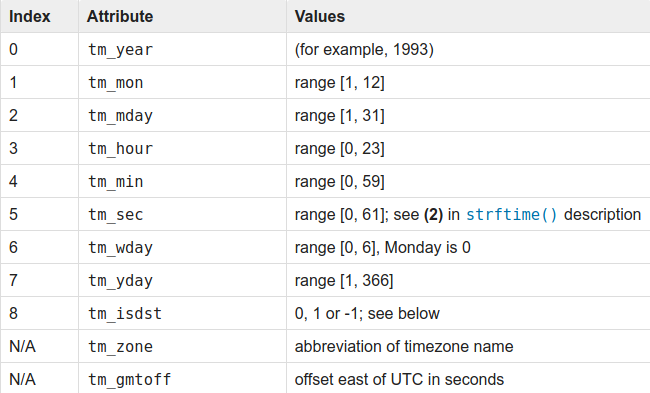

Generally speaking, attributes and methods of `time.struct_time` are often similar or identical to the ones of `datetime.datetime` .  

So we will deal with them in the next chapter.

---
---

### 16.2 Datetime

Pyhton has the module `datetime` to work with dates as date objects.  
*Note, that a date in Python is not a data type of its own.*

https://docs.python.org/3.6/library/datetime.html#module-datetime

There are 2 kind of datetime objects:
* aware - has sufficient knowledge to precisely locate itself as a specific point in time that is not open to interpretation.
* naive - does not contain enough knowledge in order to unambiguously locate itself in relation to other date/time objects. For example a naive time may respect UTC, local time, DST (daylight saving time ("Sommerzeit")).

Naive objects are easy to work with but leave space for errors and amiguity.

In [137]:
import datetime

#### Available types:

##### `datetime.time`

A *naive* time object that always uses 24*60*60 seconds to represent a day.  
Attributes: `hour`, `minute`, `second`, `microsecond`, `tzinfo`

<br>

##### `datetime.date`

A *naive* date object that uses the Gregorian calendar.  
Attributes: `year`, `month`, `day`

<br>

##### `datetime.datetime`

Generally speaking, a datetime object is the most important that will be used on a regular basis.

A datetime object contains `year`, `month`, `day`, `hour`, `minute`, `second` and `microsecond`.

In [104]:
dT1 = datetime.datetime.now()
display(dT1)

datetime.datetime(2020, 5, 7, 16, 34, 47, 880560)

The basic attributes can be accessed directly:

In [124]:
display(
    dT1.year,
    dT1.month,
    dT1.day,
    dT1.hour,
    dT1.minute,
    dT1.second,
    dT1.microsecond
)

2020

5

7

16

34

47

880560

#### The `strftime()` method

The strftime() method formats datetime objects into readable strings. It takes one parameter, `format`, to specify the format of the returned string.

In [136]:
display(
    dT1.strftime("%a"),
    dT1.strftime("%A"),
    dT1.strftime("%w"),
    dT1.strftime("%d"),
    dT1.strftime("%b"),
    dT1.strftime("%B"),
    dT1.strftime("%m"),
    dT1.strftime("%y"),
    dT1.strftime("%Y"),
    "...",
    "..."   
)

'Thu'

'Thursday'

'4'

'07'

'May'

'May'

'05'

'20'

'2020'

'...'

'...'

And many more...

There are also a lot of extraction functions that return another object like `datetime.time()` and `datetime.date()`

Timezone can be included/modified by `datetime.astimezone(tz=None)` which must be given an instance of the `datetime.tzinfo` class.

**Note the supported operations:**  
* `datetime1` +/- `timedelta` = `datetime`  
* `datetime1` - `datetime2` = `timedelta`  
* `datetime1` </==/> `datetime2` = `bool`

<br>

##### `datetime.timedelta`

A duration expressing the difference between two `date`, `time`, or `datetime` instances to microsecond resolution.  
`timedelta()` takes parameters like `days=100`, `milliseconds=40`, `weeks=40` etc.  
We can then work with the timedelta object to do calculations.

In [6]:
dtO1 = datetime.datetime.now()
dtO2 = dtO1 + datetime.timedelta(days=100)
display(dtO2)

datetime.datetime(2020, 8, 16, 12, 34, 24, 594198)

Also check the **supported operations** ...

<br>

##### `datetime.tzinfo`

An abstract base class for time zone information objects. Used by `datetime` and `time` classes to provide a customizable notion of time adjustment.

<br>

##### `datetime.timezone`

A class that implements the `tzinfo` abstract base class as a fixed offset from the UTC.

`datetime.timezone(offset, name=None)`
* the offset must be specified as a `timedelta` object that must be between `-timedelta(hours=24)` and `timedelta(hours=24)`
* the name is optional and will be returned by `timezone.tzname`
* `timezone.fromutc(dt)` returns `dt + offset` where `dt` must be a valid `datetime` object

<br>

---
---

---
---

# Program

In general, there is not a lot of value in this chapter for an experienced Python user. One thing of interest may be the following site that does a good job on comparing R & Python vectors etc.:  
https://gigadom.in/2017/05/22/r-vs-python-different-similarities-and-similar-differences/

One interesting Python function to take a look at though is `map(fun, iter)`:

#### map()

https://www.geeksforgeeks.org/python-map-function/

`map()` applies a function to each element of an iterable (or several iterables). It will return a **match object**, that can be cast as a list etc. to retrieve the result list.

`fun` is a function and `iter` is one or several iterables. We can also use a **lambda** as a function

In [9]:
l1 = [1,2,3,4,5]
l2 = [0.1,0.2,0.3,0.4,0.5]
l3 = map(lambda x,y: x*y, l1,l2)
display(list(l3))

[0.1, 0.4, 0.8999999999999999, 1.6, 2.5]

Another example:

In [10]:
l4 = ["abc", "def", "ghi", "jkl"]
l5 = map(list, l4)
display(list(l5))

[['a', 'b', 'c'], ['d', 'e', 'f'], ['g', 'h', 'i'], ['j', 'k', 'l']]

<br>

#### reduce()

The `functools.reduce(fun, seq)` is part of the `functools` module.
It takes a binary function that takes to parameters as well as a list of elements.  
It will then 
1. apply the function to the **first two elements**
2. return a **single element**, 
3. and take the **next element** to apply the function to the **returned** and **next element**
4. this will continue until only 1 element is left.
5. return the single element

In [20]:
import functools as ft
l6 = [1, 2, 3, 4, 5]
e1 = ft.reduce(lambda x,y: (y*2)-x, l6)
display(e1)

5

<br>

#### accumulate()

The `itertools.accumulate(seq, fun)` is very similar to `functools.reduce()` except for that it returns all the intermediate/cumulative results in a list, the last being the same value as the `functools.reduce()` function would return.

**Note** the swapped order of *seq* and *fun*

Let's test with the same inputs as above:

In [19]:
import itertools as it
l6 = [1, 2, 3, 4, 5]
l7 = it.accumulate(l6, lambda x,y: (y*2)-x)
display(list(l7))

[1, 3, 3, 5, 5]

<br>

---
---

---
---

# Model

## 22 Introduction

First of all: an important rule:  
> 1. Each observation can either be used for exploration or confirmation, not both.
> 2. You can use an observation as many times as you like for exploration, but you can only use it once for confirmation. As soon as you use an observation twice, you’ve switched from confirmation to exploration.

Then there is one basic approach to split the data into **3 different types of data sets**:
> 1. 60% of your data goes into a **training** (or exploration) set. You’re allowed to do anything you like with this data: visualise it and fit tons of models to it
> 2. 20% goes into a **query** set. You can use this data to compare models or visualisations by hand, but you’re not allowed to use it as part of an automated process.
> 3. 20% is held back for a **test** set. You can only use this data ONCE, to test your final model.

---
---

---
---

## 23 Model basics

### 23.1 Introduction

There are two parts of a model:
1. A family of models that you define to express a precise, generic pattern (a line/curve). `y = a*x + b`
2. A fitted model is the model from the family that is closest to your data. So we take the model and make it specific. `y = 4*x + 7`

*Note that the fitted model is only the __closest__ model to your data, it is neither exact nor "True". It is only the most useful aproximation*

How to measure which model is closer to our data? 
* Check the deviation from the data at any given point
* One way to do this is the **"root-mean-squared deviation"** -> basically erasing the signs (Vorzeichen) & taking the average. But it is calculated by squaring, averaging and finally rooting the sum.

To automatically find the best fitted model, there are some ready-to-use functions. One important premise is that we know if we are dealing with a linear model.
* Linear models are "easiest" to fit as the process is pretty straightforward, simply reducing the deviation across the model.

---

#### Visualization:
* note, that Pandas even has its own wrapper on `matplotlib.pyplot.plot()`:

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

It is also useful to directly access the **matplotlib.pylplot** library for getting insights into the data.  
`import matplotlib.pyplot as plt`

---

Random uniform sampling (like in R: `runif`) :

---
---

#### **Linear Regression with scikit-learn:**

https://realpython.com/linear-regression-in-python/

#### Simple linear regression:

In [3]:
w2wDf1 = pd.read_csv("Datasets/weatherww2/Summary of Weather.csv")

/home/daniel-std/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
w2wDf1.head(10)
w2wDf1.columns
w2wDf2 = w2wDf1.loc[:,["MinTemp", "MaxTemp"]]
display(w2wDf2)

MinTemp    MaxTemp
0       22.222222  25.555556
1       21.666667  28.888889
2       22.222222  26.111111
3       22.222222  26.666667
4       21.666667  26.666667
...           ...        ...
119035  18.333333  28.333333
119036  18.333333  29.444444
119037  18.333333  28.333333
119038  18.333333  28.333333
119039  17.222222  29.444444

[119040 rows x 2 columns]

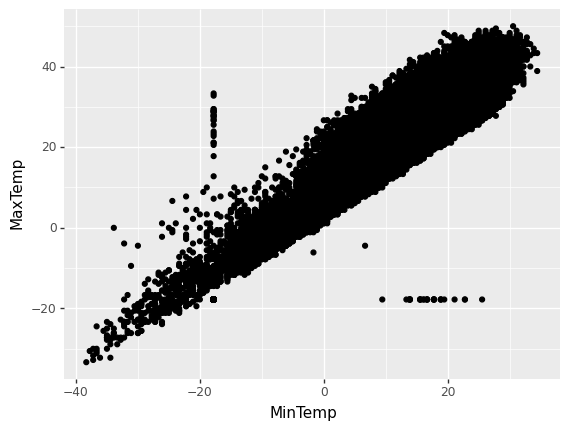

<ggplot: (8775594923072)>

In [5]:
(ggplot(data=w2wDf2)
 + geom_point(aes(x="MinTemp", y="MaxTemp"))
)

`.reshape(-1,1)` is necessary for the X, as our model is expecting a 2D-Array as X.  
Y might be 1D or 2D (the latter will have a little bit different output)

In [23]:
w2wX = np.array(w2wDf2["MinTemp"]).reshape((-1,1))
w2wY = np.array(w2wDf2["MaxTemp"])

In [10]:
print(w2wX)
print(w2wY)

[[22.22222222]
 [21.66666667]
 [22.22222222]
 ...
 [18.33333333]
 [18.33333333]
 [17.22222222]]
[25.55555556 28.88888889 26.11111111 ... 28.33333333 28.33333333
 29.44444444]


In [24]:
model = LinearRegression()
model.fit(w2wX,w2wY)
# also:
#model = LinearRegression().fit(w2wX, w2wY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now let's take a look at the attributes of our model that is a `LinearRegression()`:

In [25]:
r_sq = model.score(w2wX, w2wY)
print("coefficient of determination:",r_sq)
print("intercept:",model.intercept_)
print("slope:",model.coef_)

coefficient of determination: 0.7715582862315506
intercept: 10.70056703746156
slope: [0.91877423]


Note, that `model.coef_` is an array.

Once we fitted our model, we can use it for predictions on existing or new data: `model.predict(x)`

In [26]:
y_pred = model.predict(w2wX)
print("predicted response:", y_pred, sep="\n")

predicted response:
[31.11777216 30.60734204 31.11777216 ... 27.54476126 27.54476126
 26.52390101]


Nearly identical, manual way to predict:  
(only difference: 2D-Array instead of 1D-Array as a result, can be tweaked)

In [37]:
y_pred_man = model.intercept_ + model.coef_ * w2wX
print("predicted response:", y_pred_man, sep="\n")
print("exact same result as model.predict:", y_pred_man.reshape(-1), sep="\n")

predicted response:
[[31.11777216]
 [30.60734204]
 [31.11777216]
 ...
 [27.54476126]
 [27.54476126]
 [26.52390101]]
exact same result as model.predict:
[31.11777216 30.60734204 31.11777216 ... 27.54476126 27.54476126
 26.52390101]


<br>

#### Multiple linear regression

Define some basic data first:  
*Note the 2D-Array for x with 2 columns*

In [29]:
xLr1 = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
yLr1 = [4, 5, 20, 14, 32, 22, 38, 43]
xLr1, yLr1 = np.array(xLr1), np.array(yLr1)

Now apply the same steps:

In [35]:
model2 = LinearRegression().fit(xLr1, yLr1)

print("coefficient of determination:",model2.score(xLr1, yLr1))
print("intercept:",model2.intercept_)
print("slope:",model2.coef_)

coefficient of determination: 0.8615939258756776
intercept: 5.52257927519819
slope: [0.44706965 0.25502548]


Create prediction model:

In [36]:
y_pred2 = model2.predict(xLr1)
print("predicted response:", y_pred2, sep="\n")

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


Which is the same as:

In [40]:
y_pred_man2 = model2.intercept_ + np.sum(model2.coef_ * xLr1, axis=1)
print("predicted response:", y_pred_man2, sep="\n")

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


Apply prediction to new values:

In [114]:
xLr1_new = np.arange(10).reshape((-1,2))
print(xLr1_new)
y_new2 = model2.predict(xLr1_new)
print(y_new2)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


NameError: name 'model2' is not defined

---

**np.array.reshape()** :  
Takes an int or a tuple of ints that specify the new dimensionality.  
*Note, that the values in the array must always be kept, so doing .reshape(4,8) on a 10-value 1D-Array does not work!*  
* `.reshape((3,2))` means: convert to an array with **3 rows** and **2 columns**.
* passing `-1` works as a "wildcard". If we pass one of the parameters, numpy will figure the dimension specified as `-1` on its own. The goal is to stay compatible with the original shape:
    * `(-1,1)` means: 1 column, figure out the number of rows. This will result in an array that has one column and as many rows as there are observations.
        * This one has a **special** use, because it is used to create a 2D-Array out of an 1D-array
    * same applies to `(1,-1)`, just the other way round.
    * *Note*, that we can NOT pass `(-1,-1)`

---

<br>

#### Polynomial regression

Takes one extra step: transform array of inputs to include non-linear terms such as `x²`

First step, business as usual:

In [71]:
xPr1 = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
yPr1 = np.array([15, 11, 2, 8, 25, 32])

Second step: transform input data (**\*new\***) .  
-> We need to include `x²` and eventually other features in new columns.  
We will use the class *PolynomialFeatures* for this

In [47]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

You can provide several optional parameters to *PolynomialFeatures*:
* `degree` is an integer (`2` by default) that represents the degree of the polynomial regression function.
* `interaction_only` is a Boolean (`False` by default) that decides whether to include only interaction features (`True`) or all features (`False`).
* `include_bias` is a Boolean (`True` by default) that decides whether to include the bias (intercept) column of ones (`True`) or not (`False`).


Now fit the `tranformer` and create a new modified input by using `transform()` :

In [53]:
transformer.fit(xPr1)

xPr1_ = transformer.transform(xPr1)
print("Modified input array that contains one column with the original inputs and one column with their squares:", xPr1_, sep="\n")

# alternatively use fit_transform() to do it all in one line
#xPr1_ = PolynomPolynomialFeatures(degree=2, include_bias=False).fit_transform(xPr1)

Modified input array that contains one column with the original inputs and one column with their squares:
[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


The rest of the story...

In [58]:
# note the modified input array  xPr1_
model3 = LinearRegression().fit(xPr1_,yPr1)

print("coefficient of determination:",model3.score(xPr1_, yPr1))
print("intercept:",model3.intercept_)
print("slope:",model3.coef_)

y_pred3 = model3.predict(xPr1_)
print("predicted response:", y_pred3, sep="\n")

coefficient of determination: 0.8908516262498564
intercept: 21.37232142857144
slope: [-1.32357143  0.02839286]
predicted response:
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


[ 5 15 25 35 45 55]
[15 11  2  8 25 32]


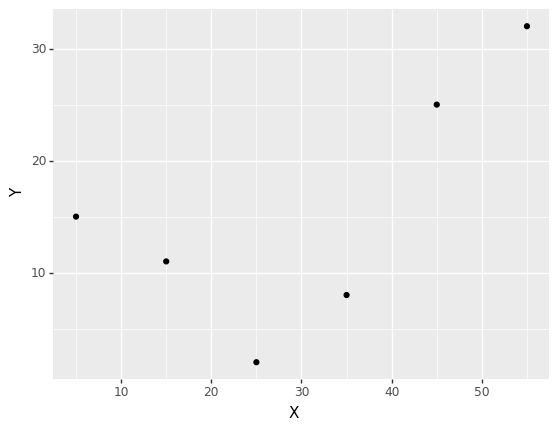

<ggplot: (8775588488526)>

In [94]:
# prepare data for visualisation
x = xPr1.ravel()
print(x)
print(yPr1)
model3Df = pd.DataFrame({"X": x, "Y":yPr1})
(ggplot(model3Df)
 + geom_point(aes(x="X", y="Y"))
)

---

#### Advanced linear regression with `statsmodels`  

While the procedure is similar to that of scikit-learn, statsmodels allow for a more detailed result.

---

#### Examples from the R chapter:

#### Linear Regression

In [51]:
w2wDf1 = pd.read_csv("Datasets/weatherww2/Summary of Weather.csv")

/home/daniel-std/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [106]:
w2wDf1.head(10)
w2wDf1.columns
w2wDf2 = w2wDf1.loc[:,["MinTemp", "MaxTemp"]].rename(columns={"MinTemp":"x", "MaxTemp":"y"})
sampleDf1 = w2wDf2.sample(frac=0.005, random_state=1)
sampleDf2 = w2wDf2.sample(frac=0.005, random_state=2)

In [53]:
sampleDf1.describe()

x           y
count  595.000000  595.000000
mean    17.409897   26.507937
std      8.545956    8.963440
min    -23.333333  -17.777778
25%     13.888889   25.000000
50%     20.555556   29.444444
75%     23.333333   31.111111
max     29.444444   46.666667

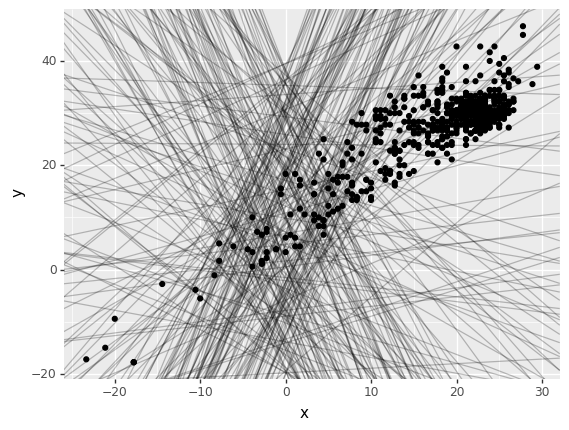

<ggplot: (-9223363307253688597)>

In [54]:
a1 = np.random.uniform(-20,40,250)
a2 = np.random.uniform(-5,5,250)
rmDf1 = pd.DataFrame({"a1":a1,"a2":a2})

(ggplot(sampleDf1)
 + geom_point(aes(x="x",y="y"))
 + geom_abline(aes(intercept="a1", slope="a2"), data=rmDf1, alpha=0.25)
)

Now we see that most of the models we drew with our random 250 piece sample are not a good approximation of our data.  
Our goal is to compute the distance of each prediction (each line).  
For this, we turn our model family (the linear models = the lines) into a function:

In [55]:
# build model in form y = b + a*x
def modelF1(a, data):
    return (a[0] + (data.x * a[1]))

In [56]:
display(modelF1((7,1.5),sampleDf1))

62234     23.666667
28328     36.166667
62139     41.166667
37166     39.500000
10655     42.000000
            ...    
80055     32.833333
9464      39.500000
93938     33.666667
52477     33.666667
103040    38.666667
Name: x, Length: 595, dtype: float64

In [57]:
# measure distance
def distF1(mod, data):
    diff = data.y - modelF1(mod,data)
    return math.sqrt(np.mean(diff**2))

In [58]:
distF1((7,1.5), sampleDf1)

9.222961845505091

In [59]:
# helper function
def sampleDf1_dist(a1,a2):
    return distF1((a1,a2), sampleDf1)

In [60]:
rmDf2 = rmDf1.copy()
display(rmDf2)
# NOTE the use of "axis=1"
rmDf2["dist"] = rmDf2.apply(lambda x: sampleDf1_dist(x["a1"],x["a2"]), axis=1)
display(rmDf2)

a1        a2
0    -5.859633  4.002821
1     4.837342  0.184791
2    16.742198  4.181467
3    -1.542253 -0.185121
4    19.023796  4.204682
..         ...       ...
245  26.089864  2.252635
246 -13.879729 -4.145951
247  22.925096 -1.218221
248  29.393001 -2.889543
249  35.580125 -1.868111

[250 rows x 2 columns]

a1        a2        dist
0    -5.859633  4.002821   45.825639
1     4.837342  0.184791   19.955877
2    16.742198  4.181467   69.012650
3    -1.542253 -0.185121   32.950713
4    19.023796  4.204682   71.551370
..         ...       ...         ...
245  26.089864  2.252635   40.632548
246 -13.879729 -4.145951  120.688560
247  22.925096 -1.218221   31.109366
248  29.393001 -2.889543   57.693440
249  35.580125 -1.868111   33.723134

[250 rows x 3 columns]

Next: overlay the 10 best models on to the data!

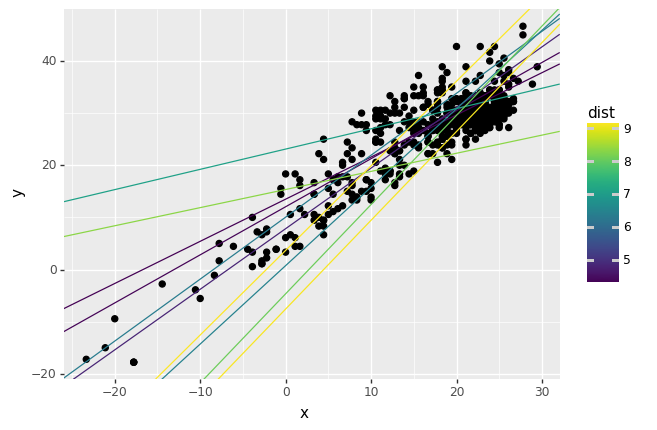

<ggplot: (-9223363307256154336)>

In [71]:
(ggplot(sampleDf1, aes(x="x", y="y"))
 + geom_point(size=2)
 + geom_abline(
     aes(intercept="a1", slope="a2", color="dist"),
     data=rmDf2.sort_values(by="dist", ascending="True").iloc[0:10]
 )
)

Now we can also see the models as observations. So we can visualise them with a scatterplot of `a1` vs `a2`, colored by `dist`.  
Now we can highlight the best ten

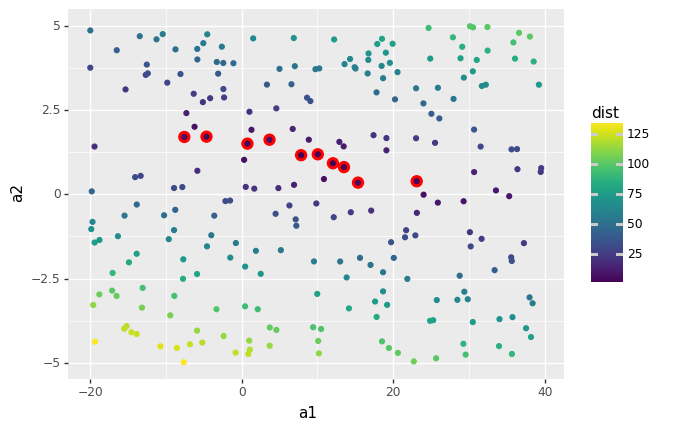

<ggplot: (8729598651491)>

In [70]:
(ggplot(rmDf2, aes(x="a1", y="a2"))
 + geom_point(data=rmDf2.sort_values(by="dist", ascending="True").iloc[0:10], size=4, color="red")
 + geom_point(aes(color="dist")
 )
)

Next up: **grid search**  
> Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.

> A *hyperparameter* is a parameter that is external to the model and can not be evaluated from the data. It has to be set before the model training begins.  
> Examples are: *c* in Support Vector Machines, *k* in k-Nearest Neighbours, *the number of hidden layers* in Neural Networks

> In contrast, a parameter is an internal characteristic of the model and its value can be estimated from data.  
> Example, beta coefficients of linear/logistic regression or support vectors in Support Vector Machines.

Now we will not use the `sklearn.model_selection.GridSearchV`, but we will do the process manually:

In [ ]:
a1_new = pd.Series(
    np.arange(-5,30,((30-(-5))/25))
).rename("a1_new")

a2_new = pd.Series(
    np.arange(-1.5,2.5,((2.5-(-1.5))/25))
).rename("a2_new")

# outer join of 2 Series on their indexes, but this is NOT the cartesian product!
#grid_Df1 = pd.merge(a1_new, a2_new, how="outer", left_index=True, right_index=True)
#display(grid_Df1)

# easiest way
gridDf1_index = pd.MultiIndex.from_product([a1_new,a2_new])
gridDf1 = pd.DataFrame(index=gridDf1_index).reset_index()
display(gridDf1)

Now we have created 2 Series with consistent value steps that allow us to systematically check which hyperparameters are best to predict our data.  
In order to do this, we created the cartesian product to grasp all value combinations and now we will apply our model to the parameters in order to retrieve the distance per value pair.

a1_new  a2_new       dist
0      -5.0   -1.50  61.379863
1      -5.0   -1.34  58.304832
2      -5.0   -1.18  55.232883
3      -5.0   -1.02  52.164559
4      -5.0   -0.86  49.100540
..      ...     ...        ...
620    28.6    1.70  32.637619
621    28.6    1.86  35.628792
622    28.6    2.02  38.637539
623    28.6    2.18  41.660053
624    28.6    2.34  44.693540

[625 rows x 3 columns]

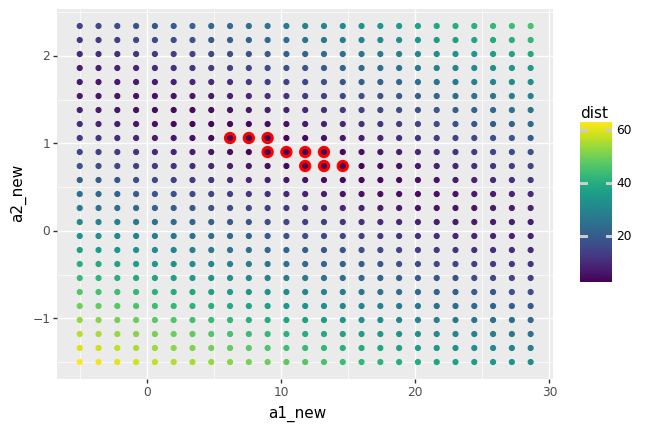

<ggplot: (-9223363307253797579)>

In [69]:
gridDf1["dist"] = gridDf1.apply(lambda x: sampleDf1_dist(x["a1_new"],x["a2_new"]), axis=1)
display(gridDf1)

(ggplot(gridDf1, aes(x="a1_new", y="a2_new"))
 + geom_point(data=gridDf1.sort_values(by="dist", ascending="True").iloc[0:10], size=4, color="red")
 + geom_point(aes(color="dist")
 )
)

Now let's (again) take a look at the 10 best results which all look quite promising.

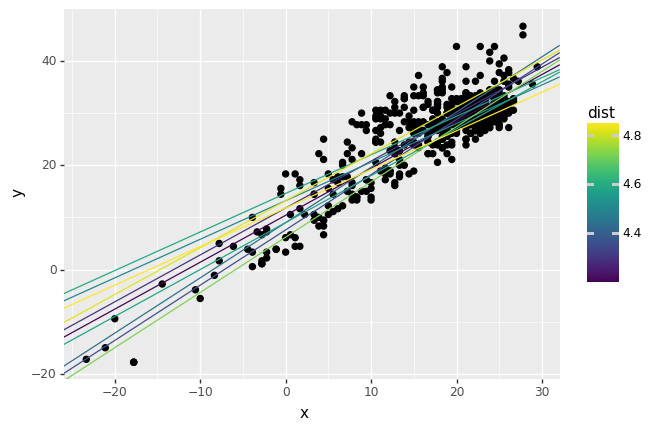

<ggplot: (-9223363307256258714)>

In [94]:
(ggplot(sampleDf1, aes(x="x", y="y"))
 + geom_point(size=2)
 + geom_abline(
     aes(intercept="a1_new", slope="a2_new", color="dist"),
     data=gridDf1.sort_values(by="dist", ascending="True").iloc[0:10]
 )
)

We can also get the best parameters by doing a simple optimization.  
In this case, we minimize the distance by passing the function that results in the distance.

In [103]:
#from scipy.optimize import minimize

# helper function, because scipy.optimize.minimize only works with functions that take exactly one array-like that keeps the parameters
def sampleDf1_dist_wrap(arr):
    return sampleDf1_dist(arr[0],arr[1])
# x0 = initial parameters. Yield faster result if closer to optimum
x0 = (0, 0)
# the function
res = minimize(sampleDf1_dist_wrap, x0)
display(res)

      fun: 4.183778384281892
 hess_inv: array([[22.19213204, -1.02931648],
       [-1.02931648,  0.05887415]])
      jac: array([-5.96046448e-08,  5.36441803e-07])
  message: 'Optimization terminated successfully.'
     nfev: 52
      nit: 11
     njev: 13
   status: 0
  success: True
        x: array([10.36252059,  0.92736996])

Test the result that is supposed to yield the minimum:

In [97]:
display(sampleDf1_dist(10.36252097,0.92736994))

4.183778384281887

<br>

Now do it even quicker with Python:

In [109]:
xLr2 = sampleDf1["x"].to_numpy().reshape(-1,1)
yLr2 = sampleDf1["y"].to_numpy()

sampleDf1_model = LinearRegression().fit(xLr2, yLr2)

print("coefficient of determination:",sampleDf1_model.score(xLr2, yLr2))
print("intercept:",sampleDf1_model.intercept_)
print("slope:",sampleDf1_model.coef_)

coefficient of determination: 0.7817680149055358
intercept: 10.362521105297244
slope: [0.92736994]


**Now we see, that the parameters are exactly the same as in the minimization result!**  
-> the LinearRegression() is an easy to use method.

Create prediction model:

In [114]:
y_pred1 = sampleDf1_model.predict(xLr2)
print("predicted response:", y_pred1[0:100], sep="\n")

predicted response:
[20.66663155 28.39471437 31.48594751 30.45553647 32.00115303 29.94033094
  4.69526036 14.48416528 33.5467696  22.21224812 19.6362205  30.97074199
 33.03156407 31.48594751 11.90813767 30.97074199 32.00115303 30.45553647
 24.2730702  32.00115303 20.15142603 25.81868677 33.5467696  26.33389229
 16.02978185 29.94033094 33.5467696  30.97074199  9.84731558 22.21224812
 30.45553647 15.51457633 25.81868677 30.97074199 23.75786468 34.57718064
 29.94033094 33.03156407 27.87950886 32.51635856 17.57539841 30.45553647
 24.2730702  30.45553647 28.9099199  10.36252111 23.75786468 34.06197512
 34.06197512 28.39471437 19.6362205   7.27128797 30.97074199 27.87950886
 29.42512543 29.94033094 31.48594751 34.57718064 24.2730702  20.15142603
 32.51635856 30.97074199 27.87950886 29.94033094 32.00115303 34.06197512
 30.97074199 32.00115303 17.06019289 27.36430333 28.9099199  25.30348124
 29.94033094 16.54498737 31.48594751 28.39471437 32.51635856 25.81868677
 31.48594751 27.87950886 13.453

Apply prediction to new values:

In [163]:
#from sklearn.metrics import accuracy_score

# basically just another equally random sample from the data
xLr2_new = sampleDf2["x"].to_numpy().reshape(-1,1)
# apply model to predict y values
y_pred2 = sampleDf1_model.predict(xLr2_new)
# show prediction results for the first 100 values
print(y_pred2[0:100])
# show real y values for the first 100 x values
print(sampleDf2["y"].iloc[0:100].to_numpy())
# check accuracy:
print("Coefficient of determination:", r2_score(sampleDf2["y"].to_numpy(), y_pred2))
print("Mean squared error:", mean_squared_error(sampleDf2["y"].to_numpy(), y_pred2))


# also possible, need to dig deeper into the metrics package for this:
#print(sampleDf1_model.score(xLr2_new,yLr2))

[30.97074199 23.75786468 11.39293215 16.54498737 29.94033094 14.48416528
 32.51635856 24.78827573 29.94033094 29.94033094 12.42334319 32.00115303
 30.45553647 29.42512543 33.5467696   9.84731558 23.75786468 27.36430333
 32.00115303 30.45553647 27.36430333 26.84909781 32.00115303 10.36252111
 30.97074199 27.36430333 13.45375424 30.45553647 26.84909781 34.06197512
 29.94033094 31.48594751 25.30348124 30.45553647 32.00115303 -6.1240556
 32.00115303 24.2730702  13.45375424 30.97074199 29.94033094 28.39471437
 18.60580946 24.2730702  34.06197512 25.30348124 32.51635856 10.36252111
 32.51635856 33.5467696  11.39293215 26.33389229 11.39293215 32.00115303
  3.1496438  29.42512543 32.51635856 23.24265916 17.57539841 28.9099199
 26.33389229 26.33389229 30.45553647 26.33389229 29.42512543 30.45553647
 29.94033094 24.78827573 37.15320825 28.39471437  0.05841066 29.94033094
 29.42512543 14.48416528 30.97074199 15.51457633 27.36430333 30.97074199
 13.45375424 33.03156407 29.94033094 29.42512543 30.4

<br>

**Now that doesn't seem so bad I would say!**

<br>

### 23.3 Visualising models

#### 23.3.1 Predictions

Pretty straightforward, it's what we did earlier:  
Plot the real observations as points and the prediction as a line.

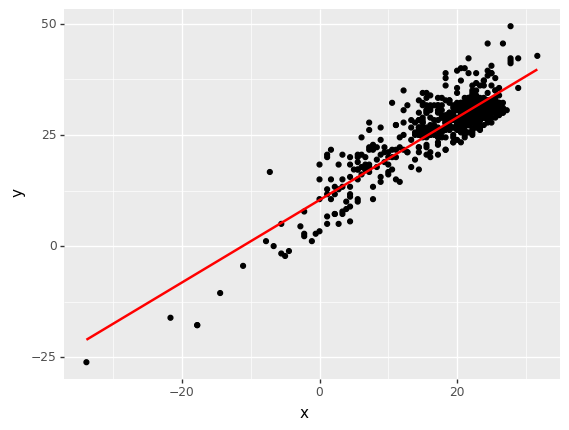

<ggplot: (8729594502036)>

In [167]:
sampleDf2["y_pred"] = y_pred2

(ggplot(sampleDf2, aes(x="x"))
 + geom_point(aes(y="y"))
 + geom_line(aes(y="y_pred"), color="red", size=1)
)

#### 23.3.2 Residuals

We will take the result of the above model and visualise the residuals per predicted observation. The residuals are the difference between the **predicted** and the **real** values (="distance").  
The horizontal line at y=0 marks perfect predicionts.

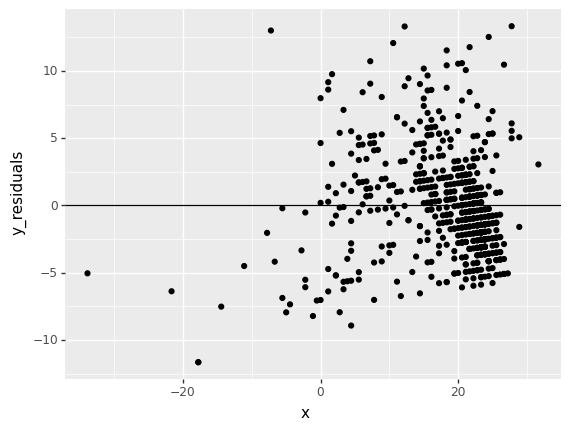

<ggplot: (-9223363307260296132)>

In [159]:
sampleDf2["y_residuals"] = sampleDf2["y"] - sampleDf2["y_pred"]

(ggplot(sampleDf2)
 + geom_point(aes(x="x", y="y_residuals"))
 + geom_hline(aes(yintercept=0))
)

---
---

## 23.4 Formulas and model families

#### 23.4.1 Categorical variables

Using R-like formulas in Python can be achieved by using `statsmodels` :  
https://www.statsmodels.org/dev/gettingstarted.html  
https://www.statsmodels.org/dev/example_formulas.html

*To be continued...*

In general, dealing with categorical variables is a bit tricky, but a few tweaks can help:  
https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/

In [28]:
xCat1 = np.array(["a", "a", "a", "b", "b", "b", "c", "c", "c", "c", "c", "c", "d", "d"]).reshape(-1,1)
yCat1 = np.array(np.random.uniform(0,10,14))

coefficient of determination: 0.04081399487580606
intercept: 7.047084725178889
slope: [-0.54150679]


x         y  x_trans    y_pred
0   a  0.038703        1  6.505578
1   a  9.303220        1  6.505578
2   a  9.493243        1  6.505578
3   b  8.220725        2  5.964071
4   b  7.387159        2  5.964071
5   b  3.132456        2  5.964071
6   c  4.684897        3  5.422564
7   c  3.729429        3  5.422564
8   c  7.790202        3  5.422564
9   c  5.065386        3  5.422564
10  c  5.064435        3  5.422564
11  c  6.549488        3  5.422564
12  d  6.703040        4  4.881058
13  d  2.544066        4  4.881058

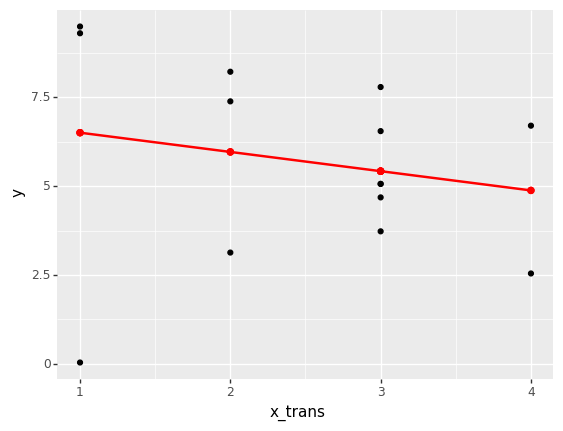

<ggplot: (-9223363276777996421)>

In [30]:
# simple substitution of strings to numbers
# in a dataframe, we should use DataFrame.replace({"a":1, "b":2, "c":3, "d":4})
xCat1_transformed = np.array([1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4]).reshape(-1,1)

cat1_model = LinearRegression().fit(xCat1_transformed, yCat1)

print("coefficient of determination:",cat1_model.score(xCat1_transformed, yCat1))
print("intercept:",cat1_model.intercept_)
print("slope:",cat1_model.coef_)
y_pred = cat1_model.predict(xCat1_transformed)
catDf1 = pd.DataFrame({"x":xCat1.ravel(), "y":yCat1, "x_trans":xCat1_transformed.ravel(),"y_pred":y_pred})
display(catDf1)

(ggplot(catDf1, aes(x="x_trans"))
 + geom_point(aes(y="y"))
 + geom_line(aes(y="y_pred"), color="red", size=1)
 + geom_point(aes(y="y_pred"), color="red", size=2)
)

Considering the prediction of categorical variables, it makes sense to just take the average as a prediction, as only the category's own observations should influence our predictions.

In [37]:
print(catDf1.groupby("x").mean())

          y  x_trans    y_pred
x                             
a  6.278389        1  6.505578
b  6.246780        2  5.964071
c  5.480639        3  5.422564
d  4.623553        4  4.881058


As we can see, our prediction came quite close.

<br>

---
---

---
---

## 24 Model building

### 24.2 Why are low quality diamonds more expensive?

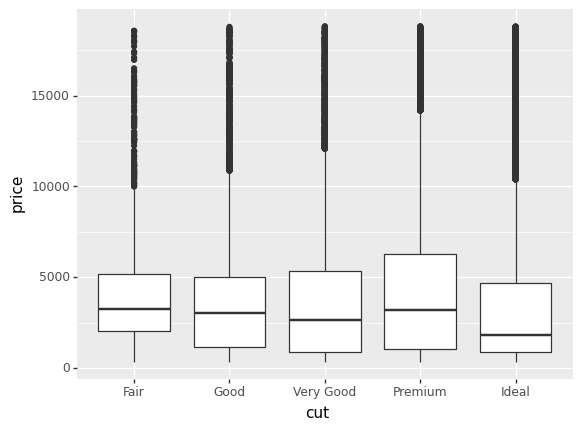

<ggplot: (-9223363275507154344)>


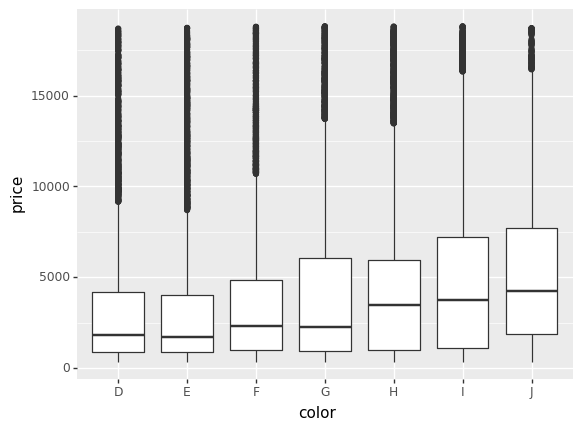

<ggplot: (8761347621447)>


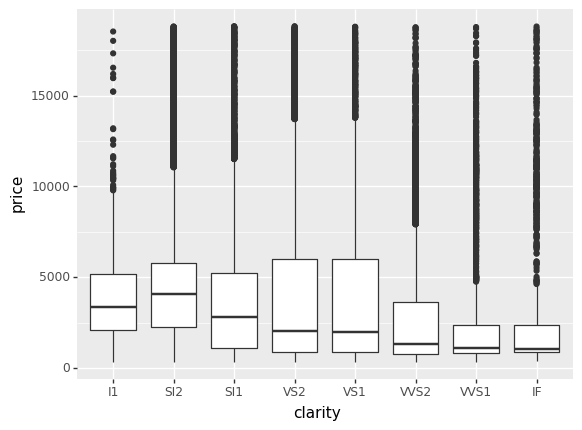

<ggplot: (8761251696988)>


In [3]:
print(ggplot(diamonds, aes("cut","price")) + geom_boxplot())
print(ggplot(diamonds, aes("color","price")) + geom_boxplot())
print(ggplot(diamonds, aes("clarity","price")) + geom_boxplot())

#### 24.2.1 Price and carat

It seems like the lower quality diamonds (color "J", clarity "l1", cut "fair") have higher prices because we miss one important variable: the weight (`carat`) of the diamonds is the most important variable determining the price.

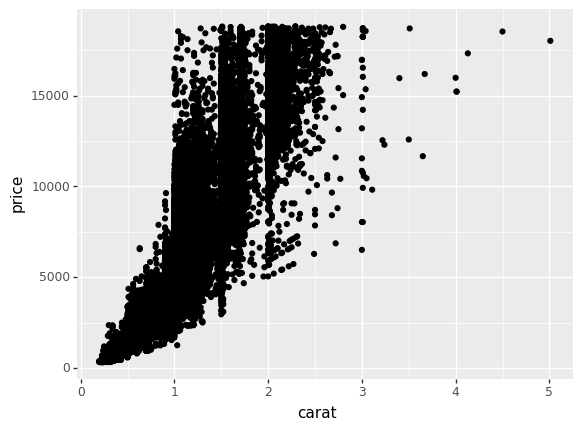

<ggplot: (-9223363275511014796)>

In [4]:
qplot("carat", "price", diamonds)

So our first goal is to fit a model that separates out the effect of `carat` to see how the quality attributes really impact the price.  
Let's make the dataset easier to work with first:
1. Focus on diamonds smaller than 2.5 carats (99.7% of the data)
2. Log-transform the carat and price variables

In [5]:
dDf1 = diamonds.copy()
dDf1.info()
dDf1 = dDf1.loc[dDf1["carat"] <= 2.5]
dDf1.info()

# be aware, that the log transformation is log, not log2 as in the R example!
dDf1["lprice"] = np.log(dDf1["price"])
dDf1["lcarat"] = np.log(dDf1["carat"])
dDf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53814 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53814 non-null  float64 
 1   cut      53814 non-null  category
 2   color    53814 non-null  category
 3   clarity  53814 non-null  category
 4   depth    538

Now we can better observe the relasionship between `carat` and `price`

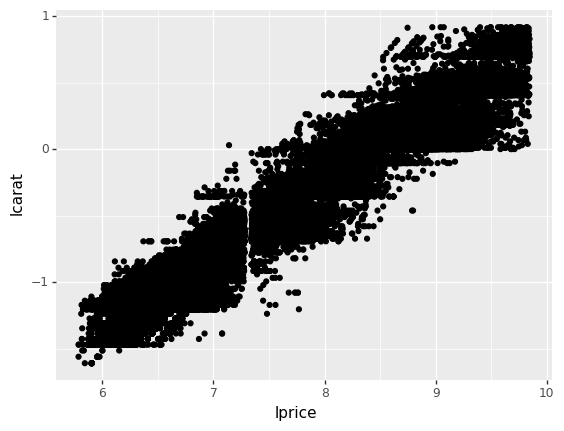

<ggplot: (-9223363275600465141)>


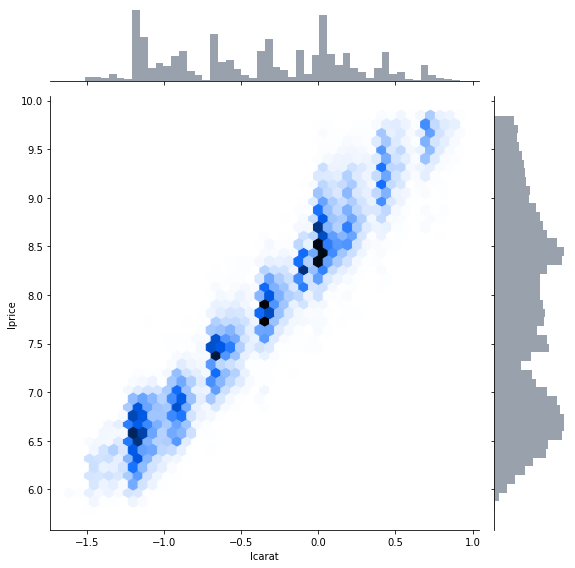

In [6]:
print(qplot("lprice", "lcarat", dDf1))

# "height" determines the size of the plot. Here we want to enlargen it.
plot = sns.jointplot("lcarat", "lprice", data = dDf1, kind="hex", color="#001433", joint_kws = dict(gridsize=40), height=8)
# for tweaking the axis ranges:
#plot.ax_marg_x.set_xlim(0, 3)
#plot.ax_marg_y.set_ylim(0, 20000)

plt.show()

Now we want to remove the strong linear pattern

For the kwargs that can be passed to `joint_kws`, see: https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hexbin.html#matplotlib.axes.Axes.hexbin

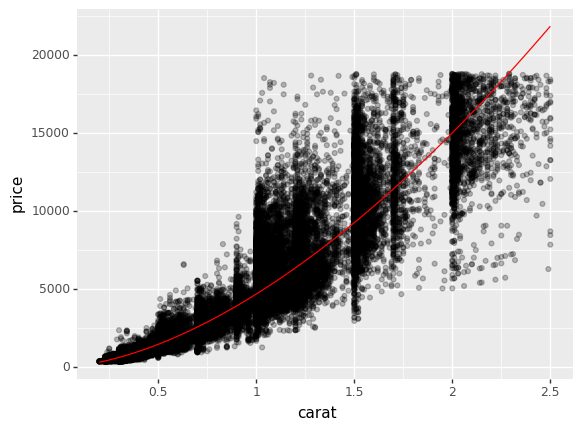

<ggplot: (-9223363275603288046)>

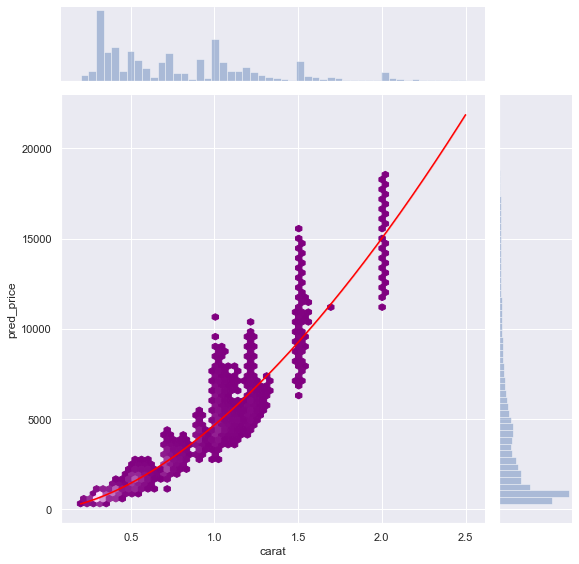

In [7]:
# resets the settings for seaborn to the defaults
sns.set()

x_lcarat = dDf1["lcarat"].to_numpy().reshape(-1,1)
y_lprice = dDf1["lprice"].to_numpy()

dDf1_model = LinearRegression().fit(x_lcarat, y_lprice)

dDf2 = dDf1.copy()
dDf2["pred_lprice"] = dDf1_model.predict(x_lcarat)
dDf2["pred_price"] = dDf2["pred_lprice"].map(lambda x: math.exp(x))

#display(dDf2)

#print("coefficient of determination:",dDf1_model.score(x_lcarat, y_lprice))
#print("intercept:",dDf1_model.intercept_)
#print("slope:",dDf1_model.coef_)

display(ggplot(dDf2)
        + geom_point(aes("carat", "price"), alpha=0.25)
        + geom_line(aes("carat", "pred_price"), color="red")
)

# create a matplotlib colormap object:
cmap = sns.light_palette("purple", reverse=True, as_cmap=True)

plot2 = sns.jointplot("carat", "price", data = dDf2, kind="hex", cmap=cmap, joint_kws = {"gridsize": 60, "mincnt": 20}, height=8)
sns.lineplot("carat", "pred_price", data = dDf2, ax=plot2.ax_joint, color="red")
plt.style.use("dark_background")

plt.show()

Calculate residuals:

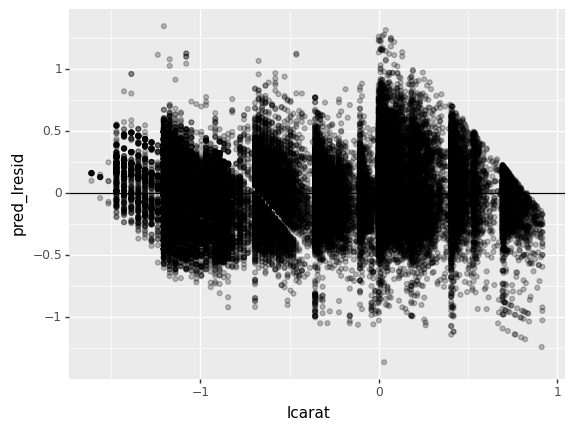

<ggplot: (8761254284678)>

In [8]:
dDf2["pred_lresid"] = dDf2["lprice"] - dDf2["pred_lprice"]

(ggplot(dDf2)
 + geom_point(aes(x="lcarat", y="pred_lresid"), alpha=0.25)
 + geom_hline(aes(yintercept=0))
)

Now we can re-do our motivating plots using the residuals instead of` price` :

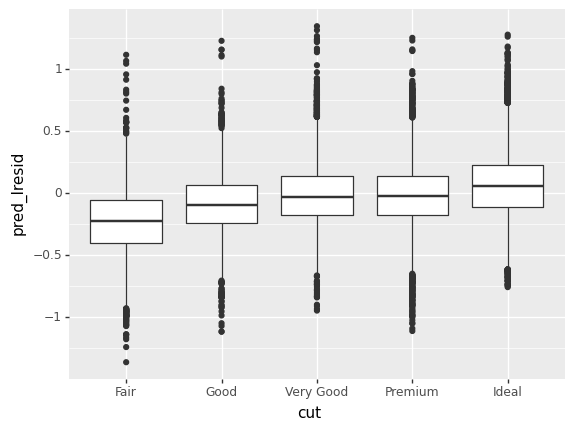

<ggplot: (-9223363275607000583)>


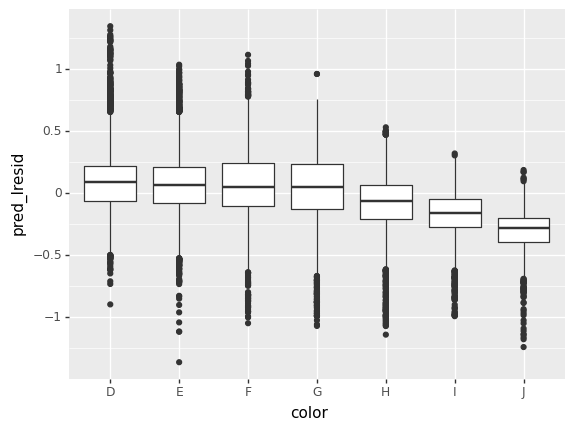

<ggplot: (8761247779641)>


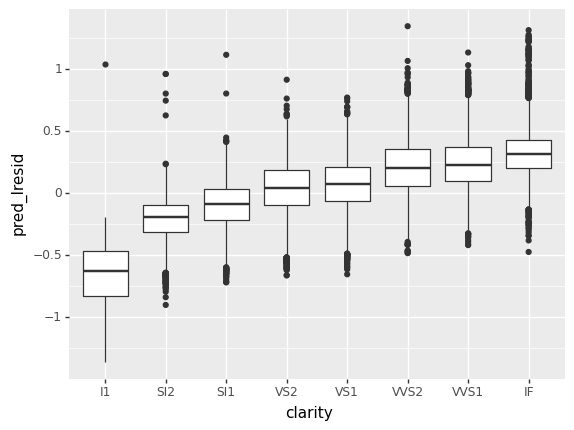

<ggplot: (-9223363275605760417)>


In [9]:
print(ggplot(dDf2, aes("cut","pred_lresid")) + geom_boxplot())
print(ggplot(dDf2, aes("color","pred_lresid")) + geom_boxplot())
print(ggplot(dDf2, aes("clarity","pred_lresid")) + geom_boxplot())

#### 24.2.1.1 Results

**Now we see the expected relationship: as the quality of the diamonds increases (cut, color, clarity), so does its relative price.**  

Interpretation of the y-axis:  What do the residuals tell us?  
The residuals in this case are the offsets between what the model predicted that the prices should be a specific weight, and the reality of what the prices really are for a specific weight.  
As the model only took into account weight and prices, the model does not acknowledge the impact of cut, color & clarity. So what we expected is that diamonds that differ from the **average cut/color/clarity** *for a specific weight* will either be *more expensive (good quality)* than the model predicted or *less expensive (bad quality)* than the model predicted.  

And that is what the offset tells us: for the diamonds of *bad quality*, it shows a *negative residual* because these are *less expensive* than diamonds of the same weight and a predicted *average quality*. And it goes the other way around for diamonds of *good quality*.


- A residual of `-1` indicates that lprice was 1 unit lower than a prediction based solely on its weight.
- transform to real price: `e^(pred_lresid)` = `pred_resid` (**?**)
- `e⁻¹` = `0.3679`
    - points with a value of `-1` are 0.3679 * the expected price
    - residuals with value `1` are 2.718 * the predicted price (`e¹` = `2,718`)
    
What the R example did, what we did not: *use of log2 instead of log*  
- easier to work with because: `2⁻¹` = `0.5` and `2¹` = `2`


<br>

---

#### 24.2.2 A more complicated model

What we can also do is to include the variables cut, color & clarity in our model which makes the effects that we have observed so far explicit.  
This means that our predictions should then be corrected for the individual effects of the variables.  
For this we use a multilinear regression as we have already shown in chapter 23

What do they do in the R example? They create the model with the multiple variables in it. And then they make a prediction that only takes the cut values, which means it shows the relationship of price <- cut.  
That way they then plot the predicted values for each of the `cut` values, which results in only 5 data points.

In [90]:
display(dDf2)

# transform categorical data:
mlrDf1 = pd.get_dummies(dDf2)
display(mlrDf1.columns)
xMlr = mlrDf1.loc[:, "cut_Fair":]
xMlr["lcarat"] = mlrDf1["lcarat"]
display(xMlr)
y_lprice = dDf2["lprice"]

dDf2_model = LinearRegression().fit(xMlr, y_lprice)

dDf3 = dDf2.copy()
dDf3["pred_lprice_mlr"] = dDf2_model.predict(xMlr)
dDf3["pred_price_mlr"] = dDf3["pred_lprice_mlr"].map(lambda x: math.exp(x))
display(dDf3)

carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

         lprice    lcarat  pred_lprice   pred_price  pred_lresid  
0      5.786897 -1.469676     5.981071   395.864160    -0.194174  
1      5.786897 -1.560648     5.828114   339.717302    -0.041216  
2      5.789960 -1.469676     5.981071   395.864160    -0.191111  
3      5.811141 -1.237874     6.370816   584.534408    -0.559675  
4      5.814131 -1.171183     6.482949   653.896180    -0.668818  
...         ...       ...          ...          ...          ...  
53935  7.921898 -0.328504     7.899805  2696.755139     0.022094  
53936  7.921898 -0.328504     7.899805  2696.755139     0.022094  
53937  7.921898 -0.356675     7.852439  2571.999348     0.069460  
53938  7.921898 -0.150823     8.198553  3635.683908    -0.276654  
53939  7.921898 -0.287682     7.968441  2888.352210    -0.046543  

[53814 rows x 15 columns]

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'lprice', 'lcarat',
       'pred_lprice', 'pred_price', 'pred_lresid', 'cut_Fair', 'cut_Good',
       'cut_Very Good', 'cut_Premium', 'cut_Ideal', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_SI2', 'clarity_SI1', 'clarity_VS2', 'clarity_VS1',
       'clarity_VVS2', 'clarity_VVS1', 'clarity_IF'],
      dtype='object')

cut_Fair  cut_Good  cut_Very Good  cut_Premium  cut_Ideal  color_D  \
0             0         0              0            0          1        0   
1             0         0              0            1          0        0   
2             0         1              0            0          0        0   
3             0         0              0            1          0        0   
4             0         1              0            0          0        0   
...         ...       ...            ...          ...        ...      ...   
53935         0         0              0            0          1        1   
53936         0         1              0            0          0        1   
53937         0         0              1            0          0        1   
53938         0         0              0            1          0        0   
53939         0         0              0            0          1        1   

       color_E  color_F  color_G  color_H  ...  color_J  clarity_I1  \
0            1        0        0        0  ...        0           0   
1            1        0        0        0  ...        0           0   
2            1        0        0        0  ...        0           0   
3            0        0        0        0  ...        0           0   
4            0        0        0        0  ...        1           0   
...        ...      ...      ...      ...  ...      ...         ...   
53935        0        0        0        0  ...        0           0   
53936        0        0        0        0  ...        0           0   
53937        0        0        0        0  ...        0           0   
53938        0        0        0        1  ...        0           0   
53939        0        0        0        0  ...        0           0   

       clarity_SI2  clarity_SI1  clarity_VS2  clarity_VS1  clarity_VVS2  \
0                1            0            0            0             0   
1                0            1            0            0             0   
2                0            0            0            1             0   
3                0            0            1            0             0   
4                1            0            0            0             0   
...            ...          ...          ...          ...           ...   
53935            0            1            0            0             0   
53936            0            1            0            0             0   
53937            0            1            0            0             0   
53938            1            0            0            0             0   
53939            1            0            0            0             0   

       clarity_VVS1  clarity_IF    lcarat  
0                 0           0 -1.469676  
1                 0           0 -1.560648  
2                 0           0 -1.469676  
3                 0           0 -1.237874  
4                 0           0 -1.171183  
...             ...         ...       ...  
53935             0           0 -0.328504  
53936             0           0 -0.328504  
53937             0           0 -0.356675  
53938             0           0 -0.150823  
53939             0           0 -0.287682  

[53814 rows x 21 columns]

carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

         lprice    lcarat  pred_lprice   pred_price  pred_lresid  \
0      5.786897 -1.469676     5.981071   395.864160    -0.194174   
1      5.786897 -1.560648     5.828114   339.717302    -0.041216   
2      5.789960 -1.469676     5.981071   395.864160    -0.191111   
3      5.811141 -1.237874     6.370816   584.534408    -0.559675   
4      5.814131 -1.171183     6.482949   653.896180    -0.668818   
...         ...       ...          ...          ...          ...   
53935  7.921898 -0.328504     7.899805  2696.755139     0.022094   
53936  7.921898 -0.328504     7.899805  2696.755139     0.022094   
53937  7.921898 -0.356675     7.852439  2571.999348     0.069460   
53938  7.921898 -0.150823     8.198553  3635.683908    -0.276654   
53939  7.921898 -0.287682     7.968441  2888.352210    -0.046543   

       pred_lprice_mlr  pred_price_mlr  
0             5.618477      275.469487  
1             5.591370      268.102569  
2             5.924629      374.139683  
3             6.033600      417.214239  
4             5.647217      283.501325  
...                ...             ...  
53935         7.992706     2959.294868  
53936         7.913849     2734.896515  
53937         7.896217     2687.098716  
53938         7.891167     2673.561311  
53939         7.904930     2710.613074  

[53814 rows x 17 columns]

Now the visualization is now a bit more tricky. As our variables are independent from each other, we can, though, make individual plots for each variable.

In [11]:
# THIS MAKES NO SENSE:

#display(ggplot(dDf3)
#        + geom_point(aes("lcarat", "price"), alpha=0.25)
#        + geom_line(aes("carat", "pred_price_mlr"), color="red")
#)

# create a matplotlib colormap object:
#cmap = sns.light_palette("purple", reverse=True, as_cmap=True)

#plot2 = sns.jointplot("carat", "price", data = dDf3, kind="hex", cmap=cmap, joint_kws = {"gridsize": 60, "mincnt": 20}, height=8)
#sns.lineplot("carat", "pred_price_mlr", data = dDf3, ax=plot2.ax_joint, color="red")
#plt.style.use("dark_background")

#plt.show()

cut  carat  depth  table  price     x     y     z    lprice  \
0       Fair   1.00   65.0   58.0   3248  6.16  6.09  3.96  8.085795   
1       Good   0.81   63.4   58.0   3027  5.97  5.98  3.69  8.015327   
2  Very Good   0.71   62.1   58.0   2636  5.73  5.77  3.56  7.877018   
3    Premium   0.84   61.4   59.0   3145  6.09  6.04  3.71  8.053569   
4      Ideal   0.54   61.8   56.0   1808  5.25  5.26  3.23  7.499977   

     lcarat  pred_lprice   pred_price  pred_lresid  pred_lprice_mlr  \
0  0.000000     8.452142  4685.096343    -0.225168         8.124573   
1 -0.210721     8.097842  3287.364687    -0.099172         8.008461   
2 -0.342490     7.876288  2634.077926    -0.029459         7.909798   
3 -0.174353     8.158989  3494.651795    -0.022730         8.117622   
4 -0.616186     7.416104  1662.543968     0.054817         7.534233   

   pred_price_mlr  
0     3376.425059  
1     3006.286871  
2     2723.839292  
3     3353.038992  
4     1871.008919

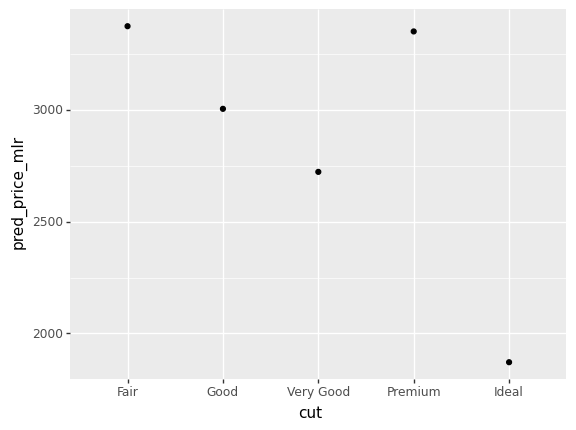

<ggplot: (-9223363275511013877)>

In [12]:
dDf3_grouped_cut = dDf3.groupby("cut").median().reset_index()
display(dDf3_grouped_cut)
ggplot(dDf3_grouped_cut) + geom_point(aes("cut", "pred_price_mlr"))

Which mistake did I make in this visualization?  

I tried to find the mean/median per value of `cut`. But by doing this I was also just including the large-carat diamonds for fair cuts, which have a higher price.  
In order to see, how the diamond price changes when only observing `cut`, I need to have fixed values for the other variables. I could do that by hand, by reducing the pandas DF to only as many rows as there are distinct values of `cut` .  
In the R data_grid function, it is automatically done when dealing with a categorical variable: if no values are explicitly named, `data_grid()` will automatically fill them in with "typical" values. For continuous variables, it uses the median, and for categorical variables it uses the most common value (or values, if there's a tie).

Let's do that by hand in the field below.

---

##### Short solution:

**Important**: 
* to generate dummies also for the absent values of the distinct variables, we need to define these variables as `categoricals` and pass all possible categories.
* to draw the plot with the categorical values in the right order, the categorical needs to be `ordered`
* also, the easiest way to get from the dummy-DF back to the original DF is to just pass the predicted columns as new columns to the original DF

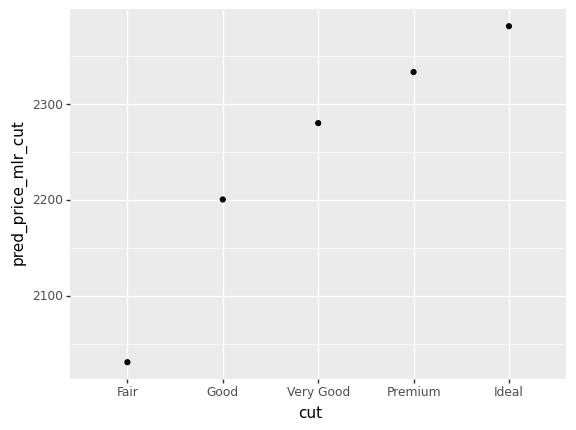

<ggplot: (-9223363275603630171)>

In [126]:
# define DF with categoricals
# note the use of "np.full(int, value)":
# fill the categoricals and numericals with the most common values, except for "cut", where we need every category exactly once
cut_Df2 = pd.DataFrame({
    "lcarat": np.full(5, dDf3.lcarat.median()),
    "cut": pd.Categorical(["Fair", "Good", "Very Good", "Premium", "Ideal"], categories=["Fair", "Good", "Very Good", "Premium", "Ideal"], ordered=True),
    "color": pd.Categorical(np.full(5, dDf3.color.mode()), categories=["D", "E", "F", "G", "H", "I", "J"], ordered=True),
    "clarity": pd.Categorical(np.full(5, dDf3.clarity.mode()), categories=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"], ordered=True)
})

# get dummies, keep the original DF as it is
cut_Df2_dummy = pd.get_dummies(cut_Df2)

# ! the LinearRegression model needs the input to predict on to have the same number of columns and the same order of columns as the input it was fitted on
cut_Df2_dummy = cut_Df2_dummy.reindex(xMlr.columns, axis=1)

# predict log prices and do backtransformation of log prices
cut_Df2_dummy["pred_lprice_mlr_cut"] = dDf2_model.predict(cut_Df2_dummy)
cut_Df2_dummy["pred_price_mlr_cut"] = cut_Df2_dummy["pred_lprice_mlr_cut"].map(lambda x: math.exp(x))

# add predicted prices to original DF for plotting
cut_Df2_complete = cut_Df2.merge(cut_Df2_dummy.iloc[:,-2:], left_index=True, right_index=True)


# draw the plot with the price predictions for each cut value and the most common values of "lcarat", "color" and "clarity"
ggplot(cut_Df2_complete) + geom_point(aes("cut", "pred_price_mlr_cut"))



---

##### Long solution:

I missed that I could define the columns as categoricals right away. That bought me some extra work in trying to provide a DF that matches the formatting required by my prediction model.

lcarat  cut_Fair  cut_Good  cut_Ideal  cut_Premium  cut_Very Good  \
0 -0.356675         1         0          0            0              0   
1 -0.356675         0         1          0            0              0   
2 -0.356675         0         0          0            0              1   
3 -0.356675         0         0          0            1              0   
4 -0.356675         0         0          1            0              0   

   color_G  clarity_SI1  
0        1            1  
1        1            1  
2        1            1  
3        1            1  
4        1            1

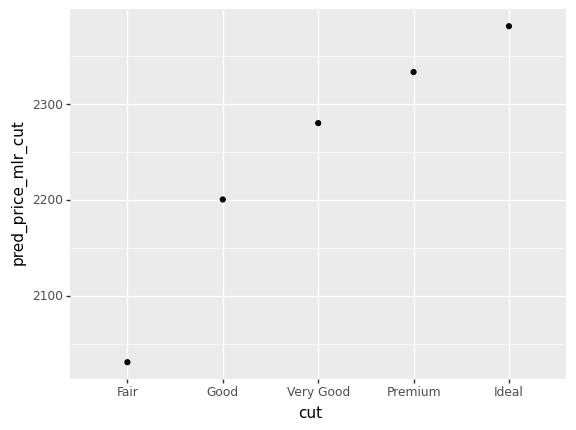

<ggplot: (8761251372415)>

In [122]:
# finding out the most common values for categoricals and the median for numeric variables
#print(dDf3.lcarat.median())
#print(dDf3.color.mode())
#print(dDf3.clarity.mode())
#print(dDf3.cut.mode())

# define DF (here: without categorical dtypes)
cut_Df1 = pd.DataFrame({
    "cut": ["Fair", "Good", "Very Good", "Premium", "Ideal"], 
    "lcarat": [-0.35667494393873245, -0.35667494393873245, -0.35667494393873245, -0.35667494393873245, -0.35667494393873245],
    "color": ["G", "G", "G", "G", "G"], 
    "clarity": ["SI1", "SI1", "SI1", "SI1", "SI1"]
})
# keep original DF for later in order to pass the predicted prices new columns for plotting
cut_Df1_orig = cut_Df1.copy()

# get dummies of our dataframe
# ! this will not include categorical values that are not in the DF, unless the categorical variables are of type "Categorical" that includes all valid values
cut_Df1 = pd.get_dummies(cut_Df1)
display(cut_Df1)

# EXCURSION ON how to reverse "pd.get_dummies"

color = pd.Series(["D", "E", "F", "G", "H", "I", "J"]).rename("color")
clarity = pd.Series(["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]).rename("clarity")
color_dDf1= pd.DataFrame(color)
clarity_dDf1= pd.DataFrame(clarity)

# get dummies for color variable
color_dDf1 = pd.get_dummies(color_dDf1)
# drop column to be used in prediction and set all other values to 0
color_dDf1 = color_dDf1.drop(columns=["color_G"])
for col in color_dDf1.columns:
    color_dDf1[col].values[:] = 0

# get dummies for clarity variable
clarity_dDf1 = pd.get_dummies(clarity_dDf1)
# drop column to be used in prediction and set all other values to 0
clarity_dDf1 = clarity_dDf1.drop(columns=["clarity_SI1"])
for col in clarity_dDf1.columns:
    clarity_dDf1[col].values[:] = 0

# slice 5 rows from both dummy DF to be appended to the main DF
color_dDf1 = color_dDf1.iloc[:5]
clarity_dDf1 = clarity_dDf1.iloc[:5]

# append color & clarity dummy DF to the main DF
cut_Df1 = cut_Df1.merge(color_dDf1, left_index=True, right_index=True)
cut_Df1 = cut_Df1.merge(clarity_dDf1, left_index=True, right_index=True)


# get all dummy columns for function "from_dummies" ("data" parameter)
cut_Df1_dummy_columns = cut_Df1.loc[:,cut_Df1.columns[1:]]

# array of distinct variable names (which must be the prefixes of the dummy column names) for function "from_dummies" ("dummies" parameter)
cut_Df1_cat_columns = np.array(["cut", "color", "clarity"])

# apply "from_dummies" that transforms the dummy DF back to the original DF
cut_Df1_original = from_dummies(cut_Df1_dummy_columns, cut_Df1_cat_columns)
# insert column "lcarat" back into the DF
cut_Df1_original = cut_Df1_original.merge(cut_Df1["lcarat"], left_index=True, right_index=True)


# idea on the internet, only works with a DF that only has 1 categorical and nothing else as dummies:
#display(cut_Df1)
#x=cut_Df1.stack()
#display(x)
#display(pd.Series(pd.Categorical(x[x!=0].index.get_level_values(1))))

# Anfang einer Idee, die columns ohne "hot" Wert zu droppen, um dann die gültigen dummy-columns in die ursprünglichen columns zu transformieren
#for col in cut_Df1.columns:
#    if cut_Df1[col].isin([0]).all():
#        cut_Df1 = cut_Df1.drop(columns=col)
#display(cut_Df1)
# was noch fehlt: einzelarbeit mit den columns, welche checkt, welche columns den selben Prefix haben, dann diese unter einer neuen column mit nur dem prefix zusammenfasst


# ! the LinearRegression model needs the input to predict on to have the same number of columns and the same order of columns as the input it was fitted on
cut_Df1 = cut_Df1.reindex(xMlr.columns, axis=1)


# predict log prices and do backtransformation of log prices
cut_Df1["pred_lprice_mlr_cut"] = dDf2_model.predict(cut_Df1)
cut_Df1["pred_price_mlr_cut"] = cut_Df1["pred_lprice_mlr_cut"].map(lambda x: math.exp(x))
#display(cut_Df1)

# insert new columns back into the original DF5g 
cut_Df1_complete = cut_Df1_orig.merge(cut_Df1.iloc[:,-2:], left_index=True, right_index=True)

# ! define cut categorical - in order for ggplot to have the categorical values in the right order, the variable must exist as an ordered categorical
cut = pd.Series(["Fair", "Good", "Very Good", "Premium", "Ideal"]).rename("cut")
# define custom cut categorical type:
cut_cat_type = pd.api.types.CategoricalDtype(categories=cut, ordered=True)
# set type of "cut" column to be of our custom categorical
cut_Df1_complete["cut"] = cut_Df1_complete["cut"].astype(cut_cat_type)

# draw the plot with the price predictions for each cut value and the most common values of "lcarat", "color" and "clarity"
ggplot(cut_Df1_complete) + geom_point(aes("cut", "pred_price_mlr_cut"))





---

Using `statsmodels` :

What we see in the predicted graph is once again a different predicted price than in the R example or in our sklearn LinearRegression model above.  
At this point I am not sure why that is. 95% sure it is just some formatting/transformation issue as the relationship between price & cut category is very much the same prediction over all 3 models.

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.706e+05
Date:                Thu, 14 May 2020   Prob (F-statistic):               0.00
Time:                        15:47:36   Log-Likelihood:                 32305.
No. Observations:               53814   AIC:                        -6.457e+04
Df Residuals:                   53795   BIC:                        -6.440e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.8788      0.006  

carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

         lprice    lcarat  pred_lprice   pred_price  pred_lresid  \
0      5.786897 -1.469676     5.981071   395.864160    -0.194174   
1      5.786897 -1.560648     5.828114   339.717302    -0.041216   
2      5.789960 -1.469676     5.981071   395.864160    -0.191111   
3      5.811141 -1.237874     6.370816   584.534408    -0.559675   
4      5.814131 -1.171183     6.482949   653.896180    -0.668818   
...         ...       ...          ...          ...          ...   
53935  7.921898 -0.328504     7.899805  2696.755139     0.022094   
53936  7.921898 -0.328504     7.899805  2696.755139     0.022094   
53937  7.921898 -0.356675     7.852439  2571.999348     0.069460   
53938  7.921898 -0.150823     8.198553  3635.683908    -0.276654   
53939  7.921898 -0.287682     7.968441  2888.352210    -0.046543   

       pred_lprice_mlr  pred_price_mlr  pred_lprice_ols  pred_price_ols  \
0             5.618477      275.469487         5.621573      276.323690   
1             5.591370      268.102569         5.592193      268.323409   
2             5.924629      374.139683         5.924135      373.954734   
3             6.033600      417.214239         6.032550      416.776359   
4             5.647217      283.501325         5.646634      283.336139   
...                ...             ...              ...             ...   
53935         7.992706     2959.294868         7.992425     2958.463681   
53936         7.913849     2734.896515         7.911266     2727.842593   
53937         7.896217     2687.098716         7.895183     2684.321675   
53938         7.891167     2673.561311         7.890976     2673.052462   
53939         7.904930     2710.613074         7.905500     2712.159568   

       pred_lresid_ols  
0             0.165324  
1             0.194704  
2            -0.134175  
3            -0.221409  
4             0.167497  
...                ...  
53935        -0.070527  
53936         0.010632  
53937         0.026715  
53938         0.030922  
53939         0.016398  

[53814 rows x 20 columns]

lcarat        cut color clarity
0 -0.356675       Fair     G     SI1
1 -0.356675       Good     G     SI1
2 -0.356675  Very Good     G     SI1
3 -0.356675    Premium     G     SI1
4 -0.356675      Ideal     G     SI1

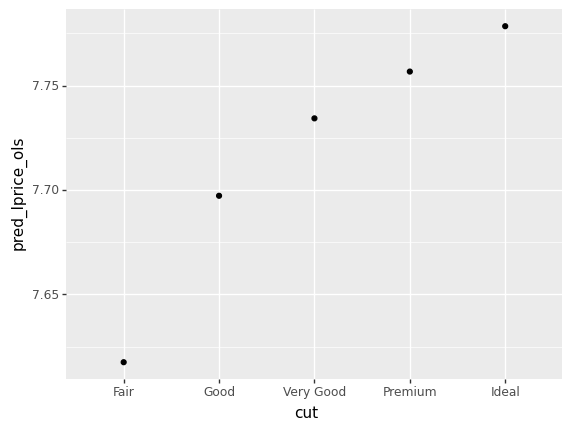

<ggplot: (-9223363275603626040)>

In [125]:
# fit the model
dDf2_model_ols = ols("lprice ~ lcarat + cut + color + clarity", dDf2).fit()
print(dDf2_model_ols.summary())

# predict model for all the data
dDf3["pred_lprice_ols"] = dDf2_model_ols.predict(dDf2.loc[:,["lcarat", "cut", "color", "clarity"]])
dDf3["pred_price_ols"] = dDf3["pred_lprice_ols"].map(lambda x: math.exp(x))

display(dDf3)

# calculate residuals (optional)
dDf3["pred_lresid_ols"] = dDf3["lprice"] - dDf3["pred_lprice_ols"]

# plot (optional)
(ggplot(dDf3)
 + geom_point(aes(x="lcarat", y="pred_lresid_ols"), alpha=0.25)
 + geom_hline(aes(yintercept=0))
)

# define DF for most common values
stats_Df1 = pd.DataFrame({
    "lcarat": np.full(5, dDf3.lcarat.median()),
    "cut": pd.Categorical(["Fair", "Good", "Very Good", "Premium", "Ideal"], categories=["Fair", "Good", "Very Good", "Premium", "Ideal"], ordered=True),
    "color": pd.Categorical(np.full(5, dDf3.color.mode()), categories=["D", "E", "F", "G", "H", "I", "J"], ordered=True),
    "clarity": pd.Categorical(np.full(5, dDf3.clarity.mode()), categories=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"], ordered=True)
})
display(stats_Df1)

# predict for each of the most common values per "cut" value
stats_Df2 = stats_Df1.copy()
stats_Df2["pred_lprice_ols"] = dDf2_model_ols.predict(stats_Df1)
stats_Df2["pred_price_ols"] = stats_Df2["pred_lprice_ols"].map(lambda x: math.exp(x))

#plot
ggplot(stats_Df2) + geom_point(aes("cut", "pred_lprice_ols"))

---

#### 24.2.3 Exercises

---
---

### 24.3 What affects the number of daily flights?

In [7]:
flightsDf = pd.read_table("~/Jupyter_Lab/R4DS/Datasets/flights.csv",sep=",",header=0)

<br>

Counting the flights per day and visualize for every date of the year:

*Note that `str(df["col"])` converts the whole column values into one string. Meaning if the column has 5 values of "2013", it will put them together like `"2013\n2013\n2013\n2013\n2013\n"` .  
`df["col"].astype(str)` on the other side simply converts the datatype of the whole column to `str` .*

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1     517.0             515        2.0     830.0   
1       2013      1    1     533.0             529        4.0     850.0   
2       2013      1    1     542.0             540        2.0     923.0   
3       2013      1    1     544.0             545       -1.0    1004.0   
4       2013      1    1     554.0             600       -6.0     812.0   
...      ...    ...  ...       ...             ...        ...       ...   
336771  2013      9   30       NaN            1455        NaN       NaN   
336772  2013      9   30       NaN            2200        NaN       NaN   
336773  2013      9   30       NaN            1210        NaN       NaN   
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
0                  819       11.0      UA    1545  N14228    EWR  IAH   
1                  830       20.0      UA    1714  N24211    LGA  IAH   
2                  850       33.0      AA    1141  N619AA    JFK  MIA   
3                 1022      -18.0      B6     725  N804JB    JFK  BQN   
4                  837      -25.0      DL     461  N668DN    LGA  ATL   
...                ...        ...     ...     ...     ...    ...  ...   
336771            1634        NaN      9E    3393     NaN    JFK  DCA   
336772            2312        NaN      9E    3525     NaN    LGA  SYR   
336773            1330        NaN      MQ    3461  N535MQ    LGA  BNA   
336774            1344        NaN      MQ    3572  N511MQ    LGA  CLE   
336775            1020        NaN      MQ    3531  N839MQ    LGA  RDU   

        air_time  distance  hour  minute             time_hour  
0          227.0      1400     5      15  2013-01-01T05:00:00Z  
1          227.0      1416     5      29  2013-01-01T05:00:00Z  
2          160.0      1089     5      40  2013-01-01T05:00:00Z  
3          183.0      1576     5      45  2013-01-01T05:00:00Z  
4          116.0       762     6       0  2013-01-01T06:00:00Z  
...          ...       ...   ...     ...                   ...  
336771       NaN       213    14      55  2013-09-30T14:00:00Z  
336772       NaN       198    22       0  2013-09-30T22:00:00Z  
336773       NaN       764    12      10  2013-09-30T12:00:00Z  
336774       NaN       419    11      59  2013-09-30T11:00:00Z  
336775       NaN       431     8      40  2013-09-30T08:00:00Z  

[336776 rows x 19 columns]

date    n
0   2013-01-01  842
1   2013-01-10  932
2   2013-01-11  930
3   2013-01-12  690
4   2013-01-13  828
..         ...  ...
360 2013-09-05  969
361 2013-09-06  967
362 2013-09-07  688
363 2013-09-08  908
364 2013-09-09  991

[365 rows x 2 columns]

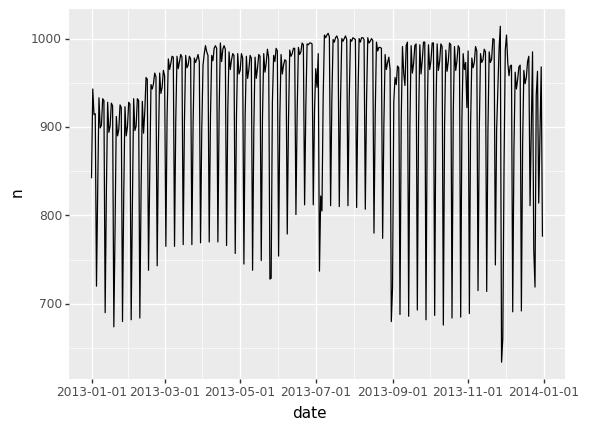

<ggplot: (8758923980264)>

In [8]:
display(flightsDf)

flightsDf1 = flightsDf.copy()

# create new column of combined date:day
# ! does not work: str(x["year"]), instead do: x["year"].astype(str)
flightsDf1 = flightsDf1.assign(date= lambda x: x["year"].astype(str) + "-" + x["month"].astype(str) + "-" + x["day"].astype(str))
dailyDf = (flightsDf1.groupby("date")
           .agg({"day":"count"})
           .rename(columns={"day":"n"})
           .reset_index()
           .sort_values(by="date"))
# important step to be displayed correctly in the plot:
dailyDf["date"] = pd.to_datetime(dailyDf["date"])

display(dailyDf)
ggplot(dailyDf, aes("date", "n")) + geom_line()

<br>

We can already see a recurring pattern. Let's take a look at the flights per weekday instead of per individual date.

date    n wday
0   2013-01-01  842  Tue
1   2013-01-10  932  Thu
2   2013-01-11  930  Fri
3   2013-01-12  690  Sat
4   2013-01-13  828  Sun
..         ...  ...  ...
360 2013-09-05  969  Thu
361 2013-09-06  967  Fri
362 2013-09-07  688  Sat
363 2013-09-08  908  Sun
364 2013-09-09  991  Mon

[365 rows x 3 columns]

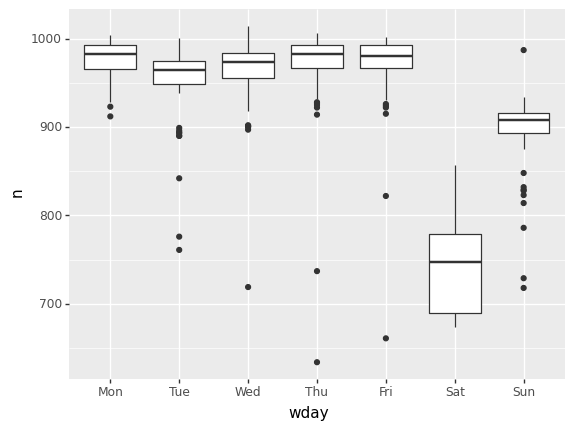

<ggplot: (8758935042273)>

In [9]:
# create wday column with strftime
dailyDf["wday"] = dailyDf["date"].apply(lambda x: x.strftime("%a"))
display(dailyDf)

# define custom category dtype
wday_cat = pd.Series(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]).rename("wday_cat")
wday_cat_type = pd.api.types.CategoricalDtype(categories=wday_cat, ordered=True)

# convert wday to category
dailyDf["wday"] = dailyDf["wday"].astype(wday_cat_type)


ggplot(dailyDf, aes("wday", "n")) + geom_boxplot()

<br>

We see that on weekends in general, there are less flights. Also, Saturday seems to be the weakest day when it comes to flight numbers. This may be because of business and holdiday trips starting/returning either Friday, Sunday or Monday. On Saturday you usually spend the time somewhere (at home or at a holiday location).  


                            OLS Regression Results                            
Dep. Variable:                      n   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     151.8
Date:                Tue, 19 May 2020   Prob (F-statistic):           3.76e-95
Time:                        09:26:40   Log-Likelihood:                -1933.4
No. Observations:                 365   AIC:                             3881.
Df Residuals:                     358   BIC:                             3908.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     974.8077      6.767    144.056      

date    n wday  pred_n_wday
0   2013-01-01  842  Tue   951.358491
1   2013-01-10  932  Thu   965.750000
2   2013-01-11  930  Fri   967.461538
3   2013-01-12  690  Sat   744.615385
4   2013-01-13  828  Sun   891.480769
..         ...  ...  ...          ...
360 2013-09-05  969  Thu   965.750000
361 2013-09-06  967  Fri   967.461538
362 2013-09-07  688  Sat   744.615385
363 2013-09-08  908  Sun   891.480769
364 2013-09-09  991  Mon   974.807692

[365 rows x 4 columns]

wday      n  pred_n_wday
0  Mon  50690   974.807692
1  Tue  50422   951.358491
2  Wed  50060   962.692308
3  Thu  50219   965.750000
4  Fri  50308   967.461538
5  Sat  38720   744.615385
6  Sun  46357   891.480769

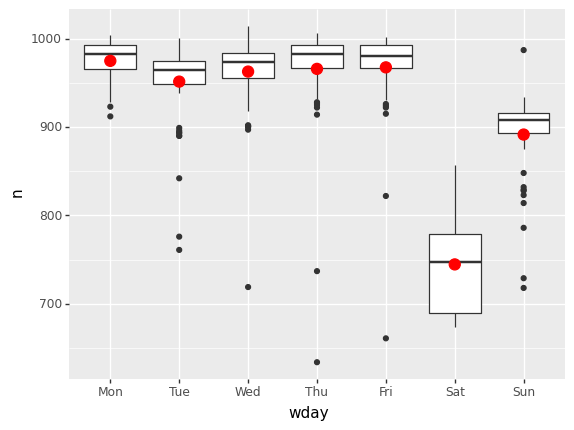

<ggplot: (8758934538409)>

In [10]:
# fit the model - note, that we do not include the date to predict the wday
dailyDf_model = ols("n ~ wday", dailyDf).fit()
print(dailyDf_model.summary())

dailyDf2 = dailyDf.copy()
# make predicitons of daily flighs per weekday
dailyDf2["pred_n_wday"] = dailyDf_model.predict(dailyDf2["wday"])
display(dailyDf2)

# agg total predicted flights to collapse the DF; keep the predictions
dailyDf2_wday = (dailyDf2.groupby("wday")
               .agg({"n":"sum", "pred_n_wday":"median"})
               .reset_index()
                .sort_values("wday"))
display(dailyDf2_wday)

(ggplot(dailyDf, aes("wday", "n"))
 + geom_boxplot()
 + geom_point(data=dailyDf2_wday, mapping=aes("wday", "pred_n_wday"), color="red", size=4)
)

<br>

Now let's check how accurate our predictions are for every individual date of the year.

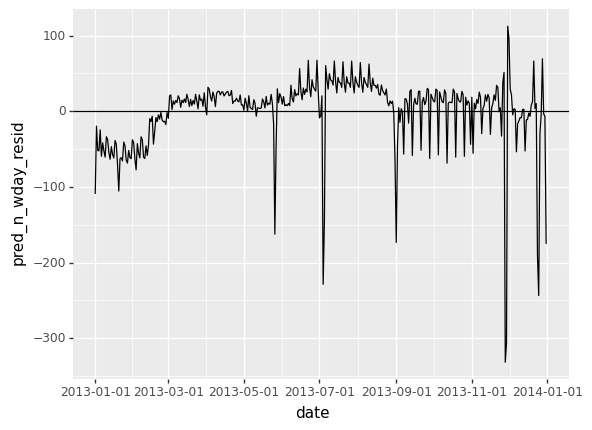

<ggplot: (-9223363277917590100)>

In [11]:
# calculate residuals
dailyDf2["pred_n_wday_resid"] = dailyDf2["n"] - dailyDf2["pred_n_wday"]

(ggplot(dailyDf2, aes("date", "pred_n_wday_resid"))
 + geom_line()
 + geom_hline(aes(yintercept=0))
)

Seeing the deviation we now know where our model that is solely based on weekend dependency fails to predict the flight count correctly.  
We see that there is a lot of deviation from the expected number of flights per weekday.  

1. One thing we notice is that there are patterns of deviation beginning around June. It seems appart from the general pattern of our prediction being too low during these times, there is also a pattern that resembles of weekdays.  

*We try to plot a line for each weekday in order to see, if the individual weekdays show a clear, continuous pattern during these times that explain the overall pattern:*

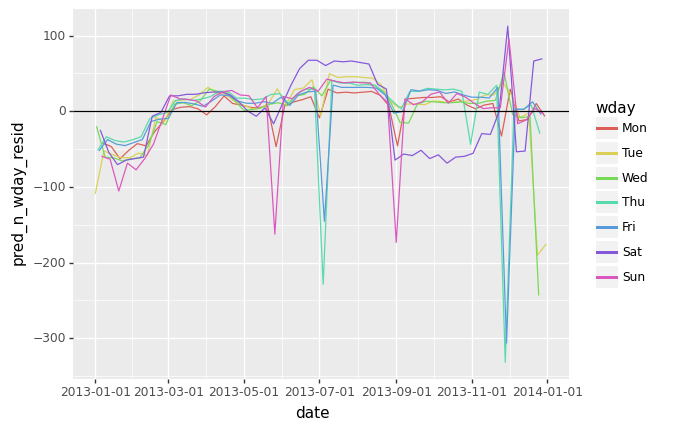

<ggplot: (-9223363277920319214)>

In [14]:
(ggplot(dailyDf2, aes("date", "pred_n_wday_resid", color="wday"))
 + geom_line()
 + geom_hline(aes(yintercept=0))
 + scale_colour_hue()
)

Here we see, that the different weekdays indeed show constant patterns during specific times. For example in June, July and August we see, that for each weekday the flightcount is relatively constant on its own. Thats why the patterns we see when not filtering for weekday are so constant during these months.

But what also becomes clear is, that our model fails to predict the number of flights on Saturdays. During summer there are more flights than expected and during winter there are less.  
*We will try to battle this pattern in the next section*

2. There seem to be a few days with far fewer flights than expected:

In [15]:
display(dailyDf2.query("pred_n_wday_resid < -100"))

date    n wday  pred_n_wday  pred_n_wday_resid
0   2013-01-01  842  Tue   951.358491        -109.358491
12  2013-01-20  786  Sun   891.480769        -105.480769
82  2013-11-28  634  Thu   965.750000        -331.750000
83  2013-11-29  661  Fri   967.461538        -306.461538
108 2013-12-24  761  Tue   951.358491        -190.358491
109 2013-12-25  719  Wed   962.692308        -243.692308
116 2013-12-31  776  Tue   951.358491        -175.358491
230 2013-05-26  729  Sun   891.480769        -162.480769
298 2013-07-04  737  Thu   965.750000        -228.750000
299 2013-07-05  822  Fri   967.461538        -145.461538
335 2013-09-01  718  Sun   891.480769        -173.480769

The first thing to interpret this is to look for public holidays. Here for example we see a few American public holidays: New Year's day, Christmas, Thanksgiving (28th November), July 4th.

3. There seems to be a smoother long term trend over the course of a year. We can highlight that with `geom_smooth()` (*note: `span` controls the smoothing degree): 

/home/daniel-std/.local/lib/python3.6/site-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


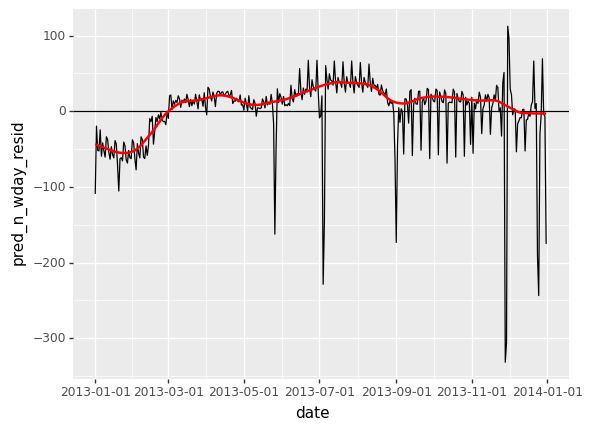

<ggplot: (8758934456717)>

In [16]:
(ggplot(dailyDf2, aes("date", "pred_n_wday_resid"))
 + geom_line()
 + geom_hline(aes(yintercept=0))
 + geom_smooth(span=0.1, color="red")
)

<br>

#### 24.3.3 Seasonal Saturday effect

Now let's start with the raw numbers of Saturdays only to see if we can spot some pattern.

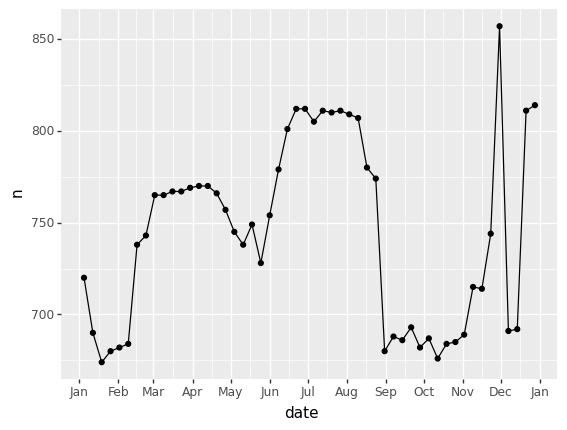

<ggplot: (-9223363277920465022)>

In [17]:
dailyDf2_sat = dailyDf2.query("wday == 'Sat'")

(ggplot(dailyDf2_sat, aes("date", "n"))
 + geom_point()
 + geom_line()
 + scale_x_date(date_breaks = "1 month", date_labels = "%b")
)

It seems like the pattern could very well correlates with summer holidays: during these, many people use the plane to go on holidays and usually people don't mind flying on Saturdays.  
The plot let's us guess that summer holidays started aroung June and ended late August or at the beginning of September.  
-> a quick google search tells us that the summer break in 2013 was Jun 26-Sep 9.  

As for the difference between Spring and Fall, one explanation may be that it is generally less common to plan family vacations during the Fall because of Thanksgiving and Christmas holidays.  But we can not know for sure.

<br>

Next we divide the year into three school terms "spring", "summer" and "fall"  
*Note the use of `+ scale_colour_hue()` which is used to set the color palette / color steps. We can also define brightness, starting point, saturation & palette...*

date    n wday  pred_n_wday  pred_n_wday_resid    term
0  2013-01-01  842  Tue   951.358491        -109.358491  spring
11 2013-01-02  943  Wed   962.692308         -19.692308  spring
22 2013-01-03  914  Thu   965.750000         -51.750000  spring
25 2013-01-04  915  Fri   967.461538         -52.461538  spring
26 2013-01-05  720  Sat   744.615385         -24.615385  spring
27 2013-01-06  832  Sun   891.480769         -59.480769  spring
28 2013-01-07  933  Mon   974.807692         -41.807692  spring
29 2013-01-08  899  Tue   951.358491         -52.358491  spring
30 2013-01-09  902  Wed   962.692308         -60.692308  spring
1  2013-01-10  932  Thu   965.750000         -33.750000  spring

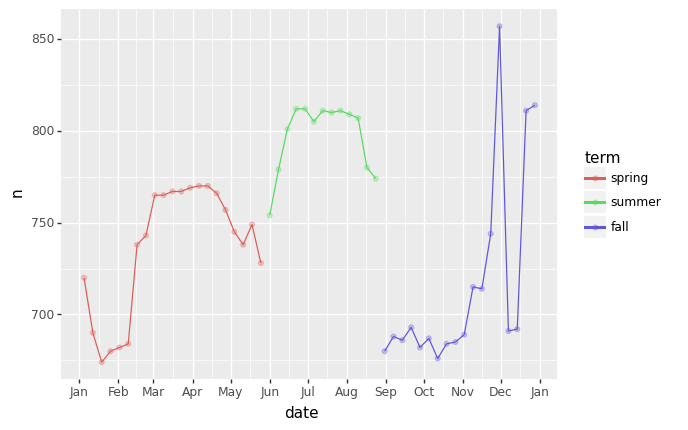

<ggplot: (8758934408929)>

In [18]:
def term(data):
    breaks = pd.to_datetime(pd.Series(["2012-12-31", "2013-05-31", "2013-08-30", "2014-01-01"]))
    labels = pd.Series(["spring", "summer", "fall"])
    return pd.cut(data, bins=breaks, labels=labels)
    
dailyDf2_term = dailyDf2.copy().sort_values("date")
dailyDf2_term["term"] = term(dailyDf2["date"])
display(dailyDf2_term.head(10))


dailyDf2_term_sat = dailyDf2_term.query("wday == 'Sat'")
display(ggplot(dailyDf2_term_sat, aes("date", "n", color="term"))
 + geom_point(alpha = 0.3)
 + geom_line()
 + scale_x_date(date_breaks = "1 month", date_labels = "%b")
 # scale_colour_hue() is used to set the color palette / color steps. We can also define brightness, starting point, saturation & palette...
 + scale_colour_hue()
)

<br>

Let's check the variation per weekday by drawing boxplots per weekday per term.

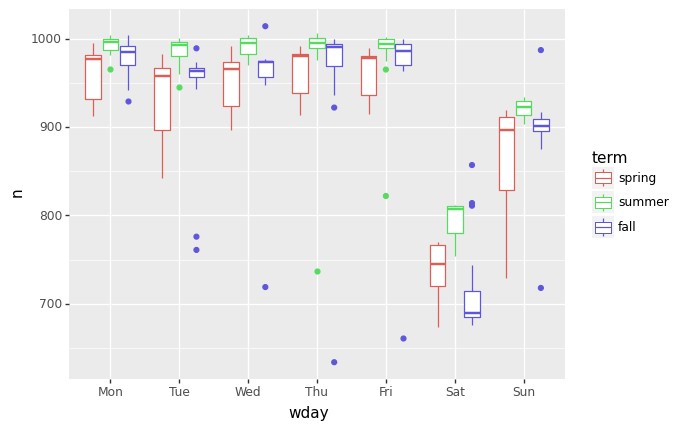

<ggplot: (8758937185670)>

In [19]:
display(ggplot(dailyDf2_term, aes("wday", "n", color="term")) 
 + geom_boxplot()
 + scale_colour_hue())

Now we see that there is significant variation across the term and there is even a little bit different variation for saturdays than for other days.  
What we can draw from this is, that it makes sense to fit a a separate day of week effect for each term.

date    n wday  pred_n_wday  pred_n_wday_resid    term
0   2013-01-01  842  Tue   939.363636         -97.363636  spring
11  2013-01-02  943  Wed   951.636364          -8.636364  spring
22  2013-01-03  914  Thu   965.363636         -51.363636  spring
25  2013-01-04  915  Fri   962.000000         -47.000000  spring
26  2013-01-05  720  Sat   736.523810         -16.523810  spring
..         ...  ...  ...          ...                ...     ...
111 2013-12-27  963  Fri   965.941176          -2.941176    fall
112 2013-12-28  814  Sat   716.000000          98.000000    fall
113 2013-12-29  888  Sun   894.555556          -6.555556    fall
115 2013-12-30  968  Mon   979.111111         -11.111111    fall
116 2013-12-31  776  Tue   942.388889        -166.388889    fall

[365 rows x 6 columns]

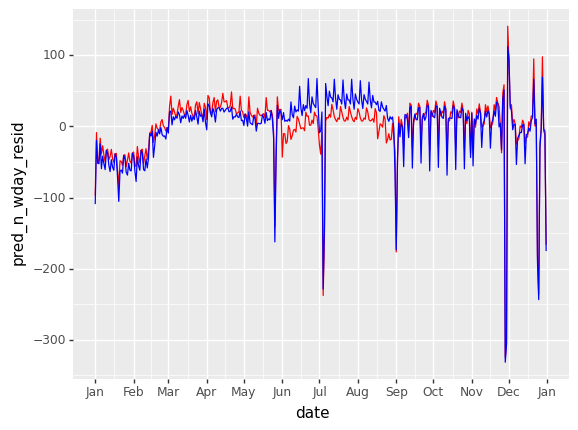

<ggplot: (-9223363277924422312)>

In [20]:
# fit the model - note, that we do not include the date to predict the wday
dailyDf2_term_model = ols("n ~ wday * term", dailyDf2_term).fit()

dailyDf3_term = dailyDf2_term.copy()
# make predicitons of daily flighs per weekday
dailyDf3_term["pred_n_wday"] = dailyDf2_term_model.predict(dailyDf2_term[["wday", "term"]])

dailyDf3_term["pred_n_wday_resid"] = dailyDf3_term["n"] - dailyDf3_term["pred_n_wday"]
display(dailyDf3_term)

# agg total predicted flights to collapse the DF; keep the predictions
(ggplot(dailyDf3_term, aes("date", "pred_n_wday_resid"))
 + geom_line(color="red")
 + geom_line(data=dailyDf2_term, color="blue")
 + scale_x_date(date_breaks = "1 month", date_labels = "%b")
)

We see that this did not really add a lot of value. One thing we can do is to lay the **real observations** over the **boxplots per weekday per term** .  
This might help us to see where our predicted data points range among the range of the observations.  

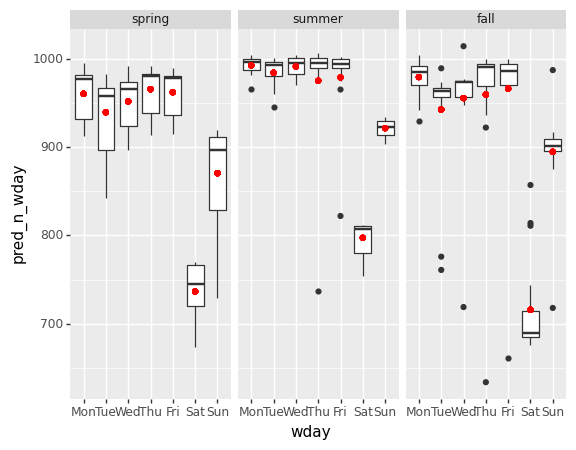

<ggplot: (-9223363277917590191)>

In [21]:
# important: keep in mind the order of the plots: the latter ones will be drawn ON TOP OF the earlier ones
# -> so always draw points last so that they won't be hidden behind the boxes
(ggplot(dailyDf3_term, aes("wday", "pred_n_wday"))
 + geom_boxplot(aes("wday", "n"))
 + geom_point(color="red")
 + facet_wrap("term")
)

Now what does this tell us?  
* When we observe the predictions and the outliers, we can deduce that the predictions are drawn towards the outliers. 
* This indicates that our model is finding the **mean** effect, because it takes outliers into account so much
* We can battle this issue by using a model that is robust to the efect of outliers: `Robust Linear Models (rlm)` instead of `Linear Models (lm)`

Short comparison:  
* `lm` function uses `Ordinary Least Squares(OLS)` method for reducing the residuals
* `rlm` function uses `M-estimators`. 
* `OLS` is very sensitive to outliers, `M-estimation` method is not.
* In `rlm`, points are not treated equally. The weight of each point would be adjusted in an iterative process. `rlm` is less sensitive to outliers, as outliers will get reduced weight. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      n   No. Observations:                  365
Model:                            RLM   Df Residuals:                      344
Method:                          IRLS   Df Model:                           20
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 19 May 2020                                         
Time:                        09:27:21                                         
No. Iterations:                    19                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    964.2809      4.620    208.736      0.000     955.227     973.335
wday[T.Tue]                  -12.5340      6.458     -1.941      0.052     -25.192       0.124
wday[T.Wed]                   -4.8327      6.458     -0.748      0.454     -17.491       7.826
wday[T.Thu]                    6.3223      6.458      0.979      0.328      -6.336      18.981
wday[T.Fri]                    2.3848      6.458      0.369      0.712     -10.274      15.043
wday[T.Sat]                 -218.5041      6.533    -33.446      0.000    -231.309    -205.699
wday[T.Sun]                  -73.1308      6.533    -11.194      0.000     -85.935     -60.326
term[T.summer]                28.1310      7.471      3.765      0.000      13.488      42.774
term[T.fall]                  17.1494      6.800      2.522      0.012       3.822      30.477
wday[T.Tue]:term[T.summer]     5.3843     10.519      0.512      0.609     -15.233      26.002
wday[T.Wed]:term[T.summer]     3.4209     10.519      0.325      0.745     -17.197      24.039
wday[T.Thu]:term[T.summer]    -6.0723     10.519     -0.577      0.564     -26.690      14.545
wday[T.Fri]:term[T.summer]    -5.1348     10.519     -0.488      0.625     -25.753      15.483
wday[T.Sat]:term[T.summer]    24.9208     10.565      2.359      0.018       4.213      45.629
wday[T.Sun]:term[T.summer]     2.0266     10.565      0.192      0.848     -18.681      22.735
wday[T.Tue]:term[T.fall]      -8.1001      9.566     -0.847      0.397     -26.849      10.649
wday[T.Wed]:term[T.fall]      -9.3975      9.642     -0.975      0.330     -28.296       9.501
wday[T.Thu]:term[T.fall]      -6.3365      9.642     -0.657      0.511     -25.235      12.562
wday[T.Fri]:term[T.fall]      -0.3812      9.642     -0.040      0.968     -19.280      18.517
wday[T.Sat]:term[T.fall]     -65.6238      9.617     -6.824      0.000     -84.472     -46.776
wday[T.Sun]:term[T.fall]      -8.4870      9.617     -0.883      0.377     -27.335      10.361
==============================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

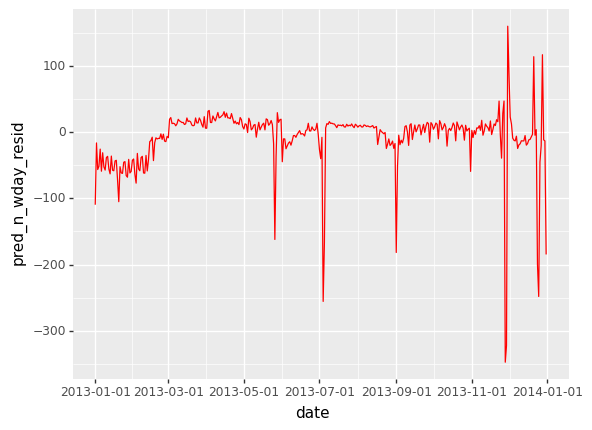

<ggplot: (8758930537992)>

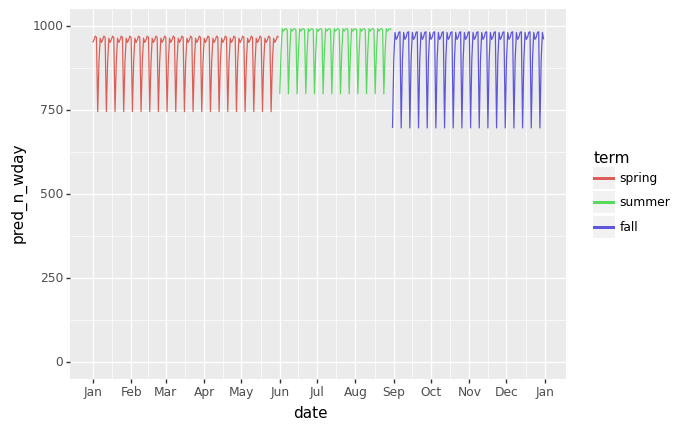

<ggplot: (8758930545875)>

In [22]:
# fit the model
dailyDf3_term_model_rlm = rlm("n ~ wday * term", dailyDf2_term).fit()
display(dailyDf3_term_model_rlm.summary())

dailyDf3_term_rlm = dailyDf2_term.copy()
# make predicitons of daily flighs per weekday
dailyDf3_term_rlm["pred_n_wday"] = dailyDf3_term_model_rlm.predict(dailyDf3_term_rlm[["wday", "term"]])

dailyDf3_term_rlm["pred_n_wday_resid"] = dailyDf3_term_rlm["n"] - dailyDf3_term_rlm["pred_n_wday"]
#display(dailyDf3_term_rlm)

# residuals
display(ggplot(dailyDf3_term_rlm, aes("date", "pred_n_wday_resid"))
        + geom_line(color="red")
        #+ geom_line(data=dailyDf2_term, color="blue")
)

# predictions
display(ggplot(dailyDf3_term_rlm, aes("date", "pred_n_wday", color="term"))
        + geom_line()
        + scale_color_hue()
        # y axis scale:
        + ylim(0,1000)
        + scale_x_date(date_breaks = "1 month", date_labels = "%b"))

<br>

Now we got ourselves a model that does a good job of removing the day of week pattern as we see that the residuals do not show as strong of a "hickup"-pattern that was due to the wrong predictions based on the weekday.  
When drawing the predictions, we can now see a clear seasonal effect

<br>

---

#### 24.3.3 Computed variables

If many different models & visualizations are in use, it makes sense to bundle the variable creation into functions to standardize the transformation of your dataframes.

<br>

---

#### 24.3.4 Time of year: an alternative approach

The approach we used above is to use **domain-knowledge** and implement that into the model **explicitly** .  
What we want to try next is to give the data more room to speak for itself and try to see if we can capture valuable insights/patterns.  

We could for example use a more flixble approach instead of a simple linear trend. An example is a natural spline in order to fit a smoothing curve across the year.

<div class='alert alert-block alert-warning'>
    <h3>
        <b>Error case: Custom functions, sequential sampling from a given range of dates transformed as integers:<b>
    </h3>
</div>

In [23]:
# create array of values. query for this array and drop all other observations. apply model


dailyDf_splines = dailyDf.copy().sort_values("date")
dailyDf_splines["date_int"] = dailyDf_splines["date"].astype(int)
#display(dailyDf_splines)

def sample_dates(date_array):
    return np.round(np.linspace(date_array.min(), date_array.max(), num=13, endpoint=True, dtype=int)).astype(int)

samples = np.round(np.linspace(dailyDf_splines.date_int.min(), dailyDf_splines.date_int.max(), num=14, endpoint=True, dtype=int)).astype(int)
display(samples)
for i in samples:
    sample_date = datetime.datetime.fromtimestamp(i)
    samples_datetime = np.append(samples_datetime, sample_date)
#samples_datetime = datetime.datetime.fromtimestamp(samples)
display(samples_datetime)
sample_dates_array = np.empty(shape=1, dtype=int)
#sample_dates_df = pd.DataFrame()
#display(samples)
#display(sample_dates_array)

for i in samples:
    j = 0
    while j < 7: 
        k = i+j
        query_string = "date_int == " + str(i)
        result = []
        result = dailyDf_splines.query(query_string).date_int.to_numpy()
        #display(result, "\n")
        #result = pd.DataFrame()
        #result = dailyDf_splines.query(query_string)
        if result.size != 0:
            sample_dates_array = np.append(sample_dates_array, result)
        j+=1
display(sample_dates_array)

#for i in dailyDf_splines["wday"].unique():
#    query_string = "wday == '" + i + "'"
#    resultarray = sample_dates(dailyDf_splines.query(query_string)["date_int"])
#    sample_dates_array.extend(resultarray)
    

display(len(sample_dates_array))

# use sample array to slice the df2 = df.assign(values = pd.Categorical(d
dailyDf_splines_sample = dailyDf_splines.copy()
#dailyDf_splines_sample = dailyDf_splines_sample.loc[dailyDf_splines_sample["date_int"].isin(sample_dates_array)]
bool_array = dailyDf_splines_sample["date_int"].isin(sample_dates_array)
dailyDf_splines_sample = dailyDf_splines_sample.apply(lambda x: x["date_int"].isin(sample_dates_array), axis=1)
#loc[dailyDf_splines_sample["date_int"].isin(sample_dates_array)]
display(len(dailyDf_splines_sample))


# no sampling
tck = interpolate.splrep(dailyDf_splines["date_int"], dailyDf_splines["n"])
dailyDf_splines["pred_n_wday"] = interpolate.splev(dailyDf_splines["date_int"], tck)

display(ggplot(dailyDf_splines, aes("date" ,"pred_n_wday", color="wday"))
        + geom_point()
        + geom_line()
        + scale_x_date(date_breaks = "1 month", date_labels = "%b"))

# sampling
tck = interpolate.splrep(dailyDf_splines_sample["date_int"], dailyDf_splines_sample["n"])
dailyDf_splines_sample["pred_n_wday"] = interpolate.splev(dailyDf_splines_sample["date_int"], tck)

display(ggplot(dailyDf_splines_sample, aes("date" ,"pred_n_wday", color="wday"))
        + geom_point()
        + geom_line()
        + scale_x_date(date_breaks = "1 month", date_labels = "%b"))


array([1356998400000000000, 1359417600000000000, 1361836800000000000,
       1364256000000000000, 1366675200000000000, 1369094400000000000,
       1371513600000000000, 1373932800000000000, 1376352000000000000,
       1378771200000000000, 1381190400000000000, 1383609600000000000,
       1386028800000000000, 1388448000000000000])

OSError: [Errno 75] Value too large for defined data type

The result should look like this: 13 Data points for each weekday, evenly distributed among the x-axis, giving us a simple curve for each weekday per month (roughly).  
We can see a strong pattern in saturday flights, reaching a high during the summer months, dropping during the fall and significantly rising again for the end of the year.  

**Why is this good?**  
* we also saw this kind of pattern in the raw data, so it is reassuring that our model and our raw data tell the same story

<img src="https://d33wubrfki0l68.cloudfront.net/7cb2854427ac5cbe2fbc9668e466554062eeee50/a7de5/model-building_files/figure-html/unnamed-chunk-28-1.png" width="800"/>

<div class='alert alert-block alert-warning'>
    <h3>
        <b> End of error case<b>
    </h3>
</div>

<br>

---
---

#### 24.3.5 Exercises

3. 
> Create a new variable that splits the wday variable into terms, but only for Saturdays, i.e., it should have Thurs, Fri, but Sat-summer, Sat-spring, Sat-fall How does this model compare with the model with every combination of wday and term?

In [37]:
dailyDf2_term_satsplit = dailyDf2_term.copy()
dailyDf2_term_satsplit["wday"] = dailyDf2_term_satsplit.apply(lambda row: (row["wday"] + "_" + row["term"]) if (row["wday"] == "Sat") else row["wday"], axis=1)
dailyDf2_term_satsplit = dailyDf2_term_satsplit.drop(columns="term")
dailyDf2_term_satsplit = dailyDf2_term_satsplit.sort_values("date")
display(dailyDf2_term_satsplit)

date    n        wday  pred_n_wday  pred_n_wday_resid
0   2013-01-01  842         Tue   951.358491        -109.358491
11  2013-01-02  943         Wed   962.692308         -19.692308
22  2013-01-03  914         Thu   965.750000         -51.750000
25  2013-01-04  915         Fri   967.461538         -52.461538
26  2013-01-05  720  Sat_spring   744.615385         -24.615385
..         ...  ...         ...          ...                ...
111 2013-12-27  963         Fri   967.461538          -4.461538
112 2013-12-28  814    Sat_fall   744.615385          69.384615
113 2013-12-29  888         Sun   891.480769          -3.480769
115 2013-12-30  968         Mon   974.807692          -6.807692
116 2013-12-31  776         Tue   951.358491        -175.358491

[365 rows x 5 columns]

'dailyDf2_term'

date    n wday  pred_n_wday  pred_n_wday_resid    term
0   2013-01-01  842  Tue   951.358491        -109.358491  spring
11  2013-01-02  943  Wed   962.692308         -19.692308  spring
22  2013-01-03  914  Thu   965.750000         -51.750000  spring
25  2013-01-04  915  Fri   967.461538         -52.461538  spring
26  2013-01-05  720  Sat   744.615385         -24.615385  spring
..         ...  ...  ...          ...                ...     ...
111 2013-12-27  963  Fri   967.461538          -4.461538    fall
112 2013-12-28  814  Sat   744.615385          69.384615    fall
113 2013-12-29  888  Sun   891.480769          -3.480769    fall
115 2013-12-30  968  Mon   974.807692          -6.807692    fall
116 2013-12-31  776  Tue   951.358491        -175.358491    fall

[365 rows x 6 columns]

date    n        wday  pred_n_wday  pred_n_wday_resid
0   2013-01-01  842         Tue   951.358491        -109.358491
11  2013-01-02  943         Wed   962.692308         -19.692308
22  2013-01-03  914         Thu   965.750000         -51.750000
25  2013-01-04  915         Fri   967.461538         -52.461538
26  2013-01-05  720  Sat_spring   736.523810         -16.523810
..         ...  ...         ...          ...                ...
111 2013-12-27  963         Fri   967.461538          -4.461538
112 2013-12-28  814    Sat_fall   716.000000          98.000000
113 2013-12-29  888         Sun   891.480769          -3.480769
115 2013-12-30  968         Mon   974.807692          -6.807692
116 2013-12-31  776         Tue   951.358491        -175.358491

[365 rows x 5 columns]

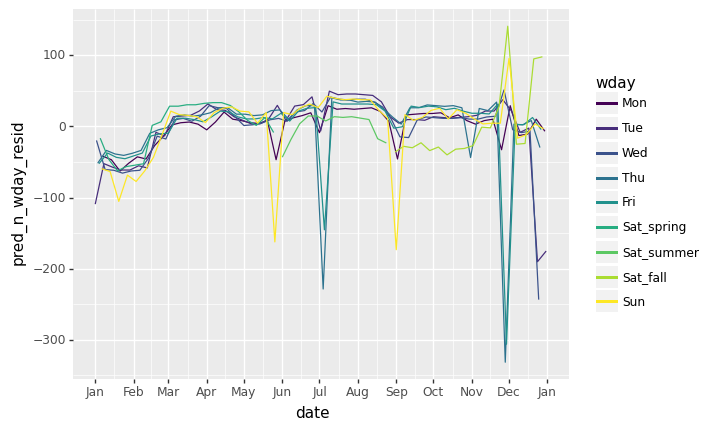

<ggplot: (-9223363277928047686)>

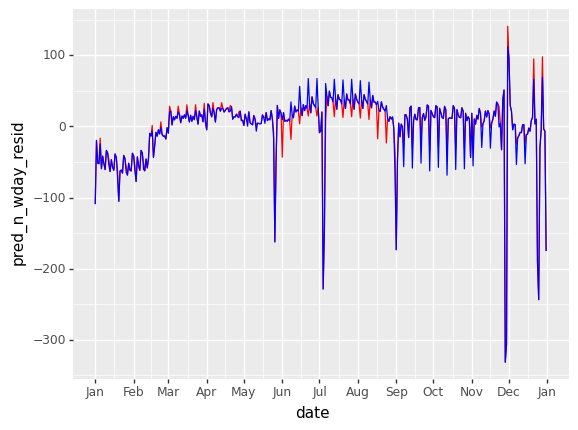

<ggplot: (8758930541267)>

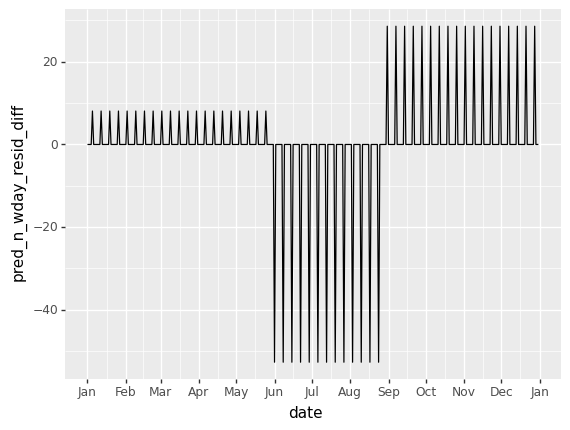

<ggplot: (8758930541225)>

In [48]:
# fit the model - note, that we do not include the date to predict the wday
dailyDf2_term_satsplit_model = ols("n ~ wday", dailyDf2_term_satsplit).fit()

display("dailyDf2_term", dailyDf2_term)

dailyDf3_term_satsplit = dailyDf2_term_satsplit.copy()
# make predicitons of daily flighs per weekday
dailyDf3_term_satsplit["pred_n_wday"] = dailyDf2_term_satsplit_model.predict(dailyDf2_term_satsplit[["wday"]])

dailyDf3_term_satsplit["pred_n_wday_resid"] = dailyDf3_term_satsplit["n"] - dailyDf3_term_satsplit["pred_n_wday"]
display(dailyDf3_term_satsplit)

# define custom categorical
wday_cat = pd.Series(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat_spring", "Sat_summer", "Sat_fall", "Sun"]).rename("wday_cat")
wday_cat_type = pd.api.types.CategoricalDtype(categories=wday_cat, ordered=True)

# convert wday to category
dailyDf3_term_satsplit["wday"] = dailyDf3_term_satsplit["wday"].astype(wday_cat_type)

display(ggplot(dailyDf3_term_satsplit, aes("date", "pred_n_wday_resid", color="wday"))
 + geom_line()
 + scale_x_date(date_breaks = "1 month", date_labels = "%b")
)



display(ggplot(dailyDf3_term_satsplit, aes("date", "pred_n_wday_resid"))
 + geom_line(color="red")
 + geom_line(data=dailyDf2_term, color="blue")
 + scale_x_date(date_breaks = "1 month", date_labels = "%b")
)

# or: plot residuals between the two estimates directly
dailyDf3_term_satsplit = dailyDf3_term_satsplit.assign(pred_n_wday_resid_diff = dailyDf3_term_satsplit["pred_n_wday_resid"] - dailyDf2_term["pred_n_wday_resid"])

display(ggplot(dailyDf3_term_satsplit, aes("date", "pred_n_wday_resid_diff"))
 + geom_line()
 + scale_x_date(date_breaks = "1 month", date_labels = "%b")
)

The important graph is the last one:  
Compared to the ols regression including all variables, our model has slightly higher residuals in the spring and a lot higher residuals in the fall but extremely lower residuals in the summer.  

We can compare the models by their parameters like R-squared and AIC. Unfortunately, this is not output by RLM models.  
(for trying to solve this problem see: https://stackoverflow.com/questions/31655196/how-to-get-r-squared-for-robust-regression-rlm-in-statsmodels)

In [66]:
# compare models
display("dailyDf2_term_model SUMMARY:", dailyDf2_term_model.summary())
print("\n")
display("dailyDf3_term_model_rlm SUMMARY:", dailyDf3_term_model_rlm.summary())
print("\n")
# parameter that can be used to compare OLS with RLM, just unsure how...
display("dailyDf3_term_model_rlm SCALE:", dailyDf3_term_model_rlm.scale)
print("\n")
display("dailyDf2_term_satsplit_model SUMMARY:", dailyDf2_term_satsplit_model.summary())

'dailyDf2_term_model SUMMARY:'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      n   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     53.61
Date:                Tue, 19 May 2020   Prob (F-statistic):           7.61e-93
Time:                        11:33:15   Log-Likelihood:                -1906.0
No. Observations:                 365   AIC:                             3854.
Df Residuals:                     344   BIC:                             3936.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    960.2857     10.078     95.287      0.000     940.464     980.108
wday[T.Tue]                  -20.9221     14.089     -1.485      0.138     -48.634       6.790
wday[T.Wed]                   -8.6494     14.089     -0.614      0.540     -36.361      19.063
wday[T.Thu]                    5.0779     14.089      0.360      0.719     -22.634      32.790
wday[T.Fri]                    1.7143     14.089      0.122      0.903     -25.998      29.426
wday[T.Sat]                 -223.7619     14.252    -15.700      0.000    -251.794    -195.729
wday[T.Sun]                  -89.9048     14.252     -6.308      0.000    -117.937     -61.872
term[T.summer]                32.0220     16.298      1.965      0.050      -0.034      64.078
term[T.fall]                  18.8254     14.834      1.269      0.205     -10.352      48.003
wday[T.Tue]:term[T.summer]    12.6913     22.949      0.553      0.581     -32.446      57.829
wday[T.Wed]:term[T.summer]     7.3417     22.949      0.320      0.749     -37.796      52.479
wday[T.Thu]:term[T.summer]   -22.4625     22.949     -0.979      0.328     -67.600      22.675
wday[T.Fri]:term[T.summer]   -15.3297     22.949     -0.668      0.505     -60.467      29.808
wday[T.Sat]:term[T.summer]    28.7619     23.049      1.248      0.213     -16.573      74.097
wday[T.Sun]:term[T.summer]    18.9048     23.049      0.820      0.413     -26.430      64.239
wday[T.Tue]:term[T.fall]     -15.8001     20.868     -0.757      0.449     -56.846      25.246
wday[T.Wed]:term[T.fall]     -15.1088     21.035     -0.718      0.473     -56.482      26.264
wday[T.Thu]:term[T.fall]     -24.9537     21.035     -1.186      0.236     -66.327      16.419
wday[T.Fri]:term[T.fall]     -14.8842     21.035     -0.708      0.480     -56.257      26.489
wday[T.Sat]:term[T.fall]     -39.3492     20.979     -1.876      0.062     -80.612       1.914
wday[T.Sun]:term[T.fall]       5.3492     20.979      0.255      0.799     -35.914      46.612
==============================================================================
Omnibus:                      296.493   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5644.032
Skew:                          -3.324   Prob(JB):                         0.00
Kurtosis:                      21.081   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

'dailyDf3_term_model_rlm SUMMARY:'

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      n   No. Observations:                  365
Model:                            RLM   Df Residuals:                      344
Method:                          IRLS   Df Model:                           20
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 19 May 2020                                         
Time:                        11:33:15                                         
No. Iterations:                    19                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    964.2809      4.620    208.736      0.000     955.227     973.335
wday[T.Tue]                  -12.5340      6.458     -1.941      0.052     -25.192       0.124
wday[T.Wed]                   -4.8327      6.458     -0.748      0.454     -17.491       7.826
wday[T.Thu]                    6.3223      6.458      0.979      0.328      -6.336      18.981
wday[T.Fri]                    2.3848      6.458      0.369      0.712     -10.274      15.043
wday[T.Sat]                 -218.5041      6.533    -33.446      0.000    -231.309    -205.699
wday[T.Sun]                  -73.1308      6.533    -11.194      0.000     -85.935     -60.326
term[T.summer]                28.1310      7.471      3.765      0.000      13.488      42.774
term[T.fall]                  17.1494      6.800      2.522      0.012       3.822      30.477
wday[T.Tue]:term[T.summer]     5.3843     10.519      0.512      0.609     -15.233      26.002
wday[T.Wed]:term[T.summer]     3.4209     10.519      0.325      0.745     -17.197      24.039
wday[T.Thu]:term[T.summer]    -6.0723     10.519     -0.577      0.564     -26.690      14.545
wday[T.Fri]:term[T.summer]    -5.1348     10.519     -0.488      0.625     -25.753      15.483
wday[T.Sat]:term[T.summer]    24.9208     10.565      2.359      0.018       4.213      45.629
wday[T.Sun]:term[T.summer]     2.0266     10.565      0.192      0.848     -18.681      22.735
wday[T.Tue]:term[T.fall]      -8.1001      9.566     -0.847      0.397     -26.849      10.649
wday[T.Wed]:term[T.fall]      -9.3975      9.642     -0.975      0.330     -28.296       9.501
wday[T.Thu]:term[T.fall]      -6.3365      9.642     -0.657      0.511     -25.235      12.562
wday[T.Fri]:term[T.fall]      -0.3812      9.642     -0.040      0.968     -19.280      18.517
wday[T.Sat]:term[T.fall]     -65.6238      9.617     -6.824      0.000     -84.472     -46.776
wday[T.Sun]:term[T.fall]      -8.4870      9.617     -0.883      0.377     -27.335      10.361
==============================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

'dailyDf3_term_model_rlm SCALE:'

18.630576411147366

'dailyDf2_term_satsplit_model SUMMARY:'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      n   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     123.5
Date:                Tue, 19 May 2020   Prob (F-statistic):           7.98e-98
Time:                        11:33:15   Log-Likelihood:                -1921.8
No. Observations:                 365   AIC:                             3862.
Df Residuals:                     356   BIC:                             3897.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            967.4615      6.575    147.148      0.000     954.531     980.392
wday[T.Mon]            7.3462      9.298      0.790      0.430     -10.940      25.632
wday[T.Sat_fall]    -251.4615     12.966    -19.395      0.000    -276.960    -225.963
wday[T.Sat_spring]  -230.9377     12.258    -18.839      0.000    -255.046    -206.830
wday[T.Sat_summer]  -170.1538     14.702    -11.574      0.000    -199.067    -141.241
wday[T.Sun]          -75.9808      9.298     -8.172      0.000     -94.267     -57.695
wday[T.Thu]           -1.7115      9.298     -0.184      0.854     -19.998      16.575
wday[T.Tue]          -16.1030      9.254     -1.740      0.083     -34.303       2.097
wday[T.Wed]           -4.7692      9.298     -0.513      0.608     -23.055      13.517
==============================================================================
Omnibus:                      279.608   Durbin-Watson:                   1.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4386.477
Skew:                          -3.127   Prob(JB):                         0.00
Kurtosis:                      18.790   Cond. No.                         9.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5. 
> What happens if you fit a day of week effect that varies by month (i.e. n ~ wday * month)? Why is this not very helpful?

We would have `7*12 = 84` parameters, as each combination of `wday` and `month` counts as one parameter.  
As each month only has 4-5 weeks, we would only have 4-5 observations for each parameter.  
This leads to high standard errors and probably an extremely overfitted model.

<br>

---

### 24.4 Learning more about models

[Daniel T Kaplan - Statistical Modeling, 2nd edition](https://dtkaplan.github.io/SM2-bookdown/introduction.html)  
[Gareth James - An Introduction to Statistical Learning](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)

<br>

---
---

---
---

<br>

## 25 Many models

<br>

### 25.2 gapminder

In [3]:
gmDf = pd.DataFrame(gapminder)

In [112]:
display(gmDf.head(10))
display(gmDf.info())

country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
5  Afghanistan      Asia  1977   38.438  14880372  786.113360
6  Afghanistan      Asia  1982   39.854  12881816  978.011439
7  Afghanistan      Asia  1987   40.822  13867957  852.395945
8  Afghanistan      Asia  1992   41.674  16317921  649.341395
9  Afghanistan      Asia  1997   41.763  22227415  635.341351

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


None

<br>

**We now want to answer the question: "How does life expectancy (`lifeExp`) change over time (`year`) for each country (`country`)?"**

Every good analysis starts with a plot...

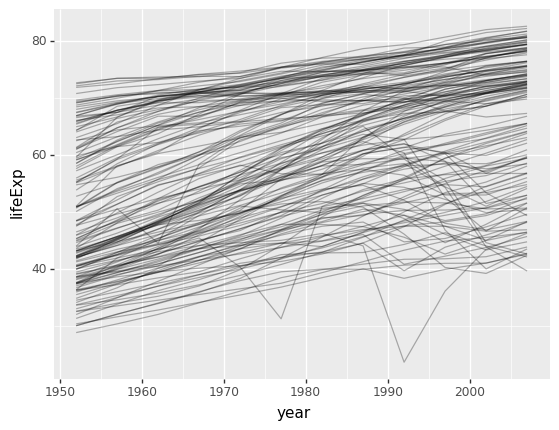

<ggplot: (8777233695594)>

In [5]:
display(ggplot(gmDf,aes("year", "lifeExp", group="country"))
        + geom_line(alpha=0.3)
       )

What we've learned from the last chapter is to capture **one** trend with ols.  
Let's filter the steady, near-linear trend with an ols for the country **Germany**:

/home/daniel-std/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


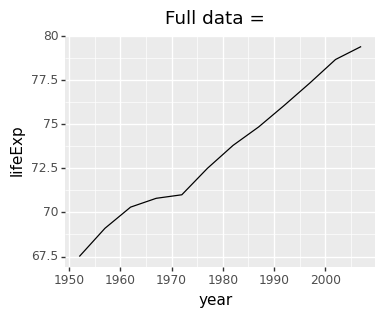

<ggplot: (-9223363259623818857)>

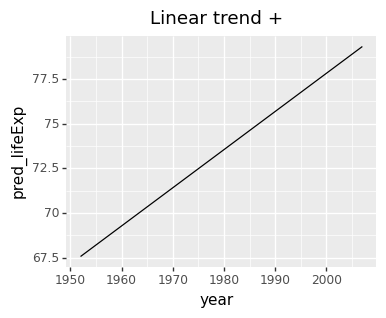

<ggplot: (-9223363259626249770)>

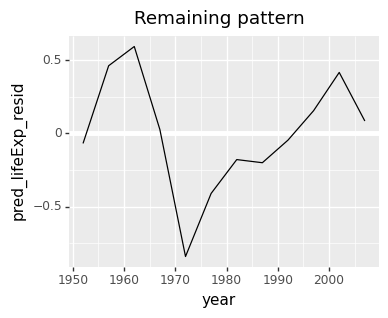

<ggplot: (8777229352726)>

In [151]:
gmDf_germany = gmDf.copy().query("country == 'Germany'")
gmDf_germany = sm.add_constant(gmDf_germany)
gmDf_germany_model = ols("lifeExp ~ year + const", gmDf_germany).fit()
gmDf_germany_model.summary()

gmDf_germany.loc[:,"pred_lifeExp"] = gmDf_germany_model.predict(gmDf_germany[["year", "const"]])
gmDf_germany.loc[:,"pred_lifeExp_resid"] = gmDf_germany["lifeExp"] - gmDf_germany["pred_lifeExp"]

gmDf_germany_plot1 = ggplot(gmDf_germany, aes(x="year"))

display(gmDf_germany_plot1 
        + geom_line(aes(y="lifeExp"))
        + ggtitle("Full data =")
        + theme(figure_size=(4.0,3.0))
       )
display(gmDf_germany_plot1 
        + geom_line(aes(y="pred_lifeExp"))
        + ggtitle("Linear trend +")
        + theme(figure_size=(4.0,3.0))
       )
display(gmDf_germany_plot1 
        + geom_hline(yintercept=0, color="white", size=2)
        + geom_line(aes(y="pred_lifeExp_resid"))
        + ggtitle("Remaining pattern")
        + theme(figure_size=(4.0,3.0))
       )

#### 25.2.1 Nested data

In order to apply a model to each country we would need to apply it to each observation in the country group.  
This can be achieved by "nesting" a list/dataframe into a single cell of another dataframe.  
In our example, this means that each observation of each country will be stored as a single dataframe per country that is contained in a new column.

In the following I present 2 approaches. The goal for both is to achieve a dataframe that is grouped by country (and continent) that has a column `model` which includes a fitted ols model for each country.

1. My own R-like approach, trying to not only save the model in a column, but also including the data per group as a column value per group.

In [12]:
gmDf_nest = (gmDf.copy()
             .groupby(["country", "continent"])
             .agg(np.sum)
             .reset_index()
             .drop(columns=["year", "lifeExp", "pop", "gdpPercap"]))
#gmDf_nest["data"] = gmDf_nest.apply(lambda x: ols("lifeExp ~ year", gmDf_nest.query(("country == '"+x["country"]+"'"))).fit(), axis=1)
formula_string = "lifeExp ~ year + constant"


gmDf_grouped = gmDf.copy().groupby("country")
data_array = []
model_array = []

#for group in gmDf_grouped.groups.keys():
#    #print(group)
#    df = gmDf_grouped.get_group(group).copy()
#    df["constant"] = 1
#    model = ols(modelstring, df)
#    data_array.append(df.copy())
#    model_array.append(model.fit())
#    #gmDf_nest.loc[gmDf_nest["country"] == group, "data"] = df.copy()
#    #gmDf_nest.loc[gmDf_nest["country"] == group, "model_ols"] = model.fit()
#gmDf_nest["data"] = data_array.copy()
#gmDf_nest["model"] = model_array.copy()



# helper function to pass data  to groups
def nest_data_ols(grouped_dataframe, agg_func, constant_bool, formula_string):
    gDf = grouped_dataframe
    data_array = []
    model_array = []
    for group in gDf.groups.keys():
        
        df = gDf.get_group(group).copy()
        if constant_bool:
            df["constant"] = 1
            
        model = ols(formula_string, df)
        data_array.append(df.copy())
        model_array.append(model.fit())
    
    new_dataframe = gDf.agg(agg_func).reset_index().copy()
    new_dataframe["data"] = data_array.copy()
    new_dataframe["model"] = model_array.copy()
    display(new_dataframe)
    return new_dataframe

gmDf_nest_new = nest_data_ols(gmDf_grouped, np.sum, True, "lifeExp ~ year + constant")
display(gmDf_nest_new.data.dtype)
display(gmDf_nest_new.loc[0,"data"])

# print model summary per row
#display(gmDf_nest.apply(lambda x: print(x["model_ols"].summary()), axis=1))

# print first data dataframe + model summary
#display(gmDf_nest.loc[0, "data"])
#display(gmDf_nest.loc[0, "model"].summary())

# not working right now:
#display(gmDf_nest_new.explode("data"))


country   year  lifeExp        pop      gdpPercap  \
0           Afghanistan  23754  449.746  189884585    9632.095181   
1               Albania  23754  821.195   30962990   39064.399592   
2               Algeria  23754  708.362  238504874   53112.311678   
3                Angola  23754  454.602   87712681   43285.206346   
4             Argentina  23754  828.725  343226879  107466.645392   
..                  ...    ...      ...        ...            ...   
137             Vietnam  23754  689.754  654822851   12212.551382   
138  West Bank and Gaza  23754  723.944   22183278   45119.961375   
139         Yemen, Rep.  23754  561.365  130118302   18831.296066   
140              Zambia  23754  551.956   76245658   16298.392908   
141            Zimbabwe  23754  631.958   91703593    7630.296508   

                                                  data  \
0            country continent  year  lifeExp      ...   
1        country continent  year  lifeExp      pop ...   
2        country continent  year  lifeExp       pop...   
3       country continent  year  lifeExp       pop ...   
4          country continent  year  lifeExp       p...   
..                                                 ...   
137        country continent  year  lifeExp       p...   
138                   country continent  year  life...   
139            country continent  year  lifeExp    ...   
140       country continent  year  lifeExp       po...   
141         country continent  year  lifeExp       ...   

                                                 model  
0    <statsmodels.regression.linear_model.Regressio...  
1    <statsmodels.regression.linear_model.Regressio...  
2    <statsmodels.regression.linear_model.Regressio...  
3    <statsmodels.regression.linear_model.Regressio...  
4    <statsmodels.regression.linear_model.Regressio...  
..                                                 ...  
137  <statsmodels.regression.linear_model.Regressio...  
138  <statsmodels.regression.linear_model.Regressio...  
139  <statsmodels.regression.linear_model.Regressio...  
140  <statsmodels.regression.linear_model.Regressio...  
141  <statsmodels.regression.linear_model.Regressio...  

[142 rows x 7 columns]

dtype('O')

country continent  year  lifeExp       pop   gdpPercap  constant
0   Afghanistan      Asia  1952   28.801   8425333  779.445314         1
1   Afghanistan      Asia  1957   30.332   9240934  820.853030         1
2   Afghanistan      Asia  1962   31.997  10267083  853.100710         1
3   Afghanistan      Asia  1967   34.020  11537966  836.197138         1
4   Afghanistan      Asia  1972   36.088  13079460  739.981106         1
5   Afghanistan      Asia  1977   38.438  14880372  786.113360         1
6   Afghanistan      Asia  1982   39.854  12881816  978.011439         1
7   Afghanistan      Asia  1987   40.822  13867957  852.395945         1
8   Afghanistan      Asia  1992   41.674  16317921  649.341395         1
9   Afghanistan      Asia  1997   41.763  22227415  635.341351         1
10  Afghanistan      Asia  2002   42.129  25268405  726.734055         1
11  Afghanistan      Asia  2007   43.828  31889923  974.580338         1

2. Efficient, Pandas-like approach: directly fit the model based on the groups of a Pandas `groupby`   
Solution taken from: https://stackoverflow.com/questions/49895000/regression-by-group-in-python-pandas

In [158]:
# alternative approach: directly apply the model fitting per group

# "regress" helper function = returns a fitted model that takes 4 arguments: dataframe, y, [x], return_model(if True, return fitted model, otherwise return model parameters)


gmDf_group_model = (gmDf.groupby(['country', 'continent'])
                    .apply(regress, 'lifeExp', ['year'], True)
                    .reset_index()
                    .rename(columns={0:"model"}))
display(gmDf_group_model)
#for i in gmDf_group_model.loc[:,"model"]:
#    display(i.summary())

country continent  \
0           Afghanistan      Asia   
1               Albania    Europe   
2               Algeria    Africa   
3                Angola    Africa   
4             Argentina  Americas   
..                  ...       ...   
137             Vietnam      Asia   
138  West Bank and Gaza      Asia   
139         Yemen, Rep.      Asia   
140              Zambia    Africa   
141            Zimbabwe    Africa   

                                                 model  
0    <statsmodels.regression.linear_model.Regressio...  
1    <statsmodels.regression.linear_model.Regressio...  
2    <statsmodels.regression.linear_model.Regressio...  
3    <statsmodels.regression.linear_model.Regressio...  
4    <statsmodels.regression.linear_model.Regressio...  
..                                                 ...  
137  <statsmodels.regression.linear_model.Regressio...  
138  <statsmodels.regression.linear_model.Regressio...  
139  <statsmodels.regression.linear_model.Regressio...  
140  <statsmodels.regression.linear_model.Regressio...  
141  <statsmodels.regression.linear_model.Regressio...  

[142 rows x 3 columns]

<div class='alert alert-block alert-warning'>
    <h3>
        <b> Error case<b>
    </h3>
</div>

country continent  level_2          pred
0     Afghanistan      Asia        0 -9.907066e+05
1     Afghanistan      Asia        1 -9.932443e+05
2     Afghanistan      Asia        2 -9.957820e+05
3     Afghanistan      Asia        3 -9.983196e+05
4     Afghanistan      Asia        4 -1.000857e+06
...           ...       ...      ...           ...
1699     Zimbabwe    Africa     1699  4.705179e+05
1700     Zimbabwe    Africa     1700  4.717019e+05
1701     Zimbabwe    Africa     1701  4.728859e+05
1702     Zimbabwe    Africa     1702  4.740699e+05
1703     Zimbabwe    Africa     1703  4.752539e+05

[1704 rows x 4 columns]

country continent  year  lifeExp       pop   gdpPercap  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106   
...           ...       ...   ...      ...       ...         ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298   

              pred         resid  
0    -9.907066e+05  9.907354e+05  
1    -9.932443e+05  9.932746e+05  
2    -9.957820e+05  9.958140e+05  
3    -9.983196e+05  9.983537e+05  
4    -1.000857e+06  1.000893e+06  
...            ...           ...  
1699  4.705179e+05 -4.704556e+05  
1700  4.717019e+05 -4.716415e+05  
1701  4.728859e+05 -4.728391e+05  
1702  4.740699e+05 -4.740299e+05  
1703  4.752539e+05 -4.752104e+05  

[1704 rows x 8 columns]

Count of unique predictions:  1704 



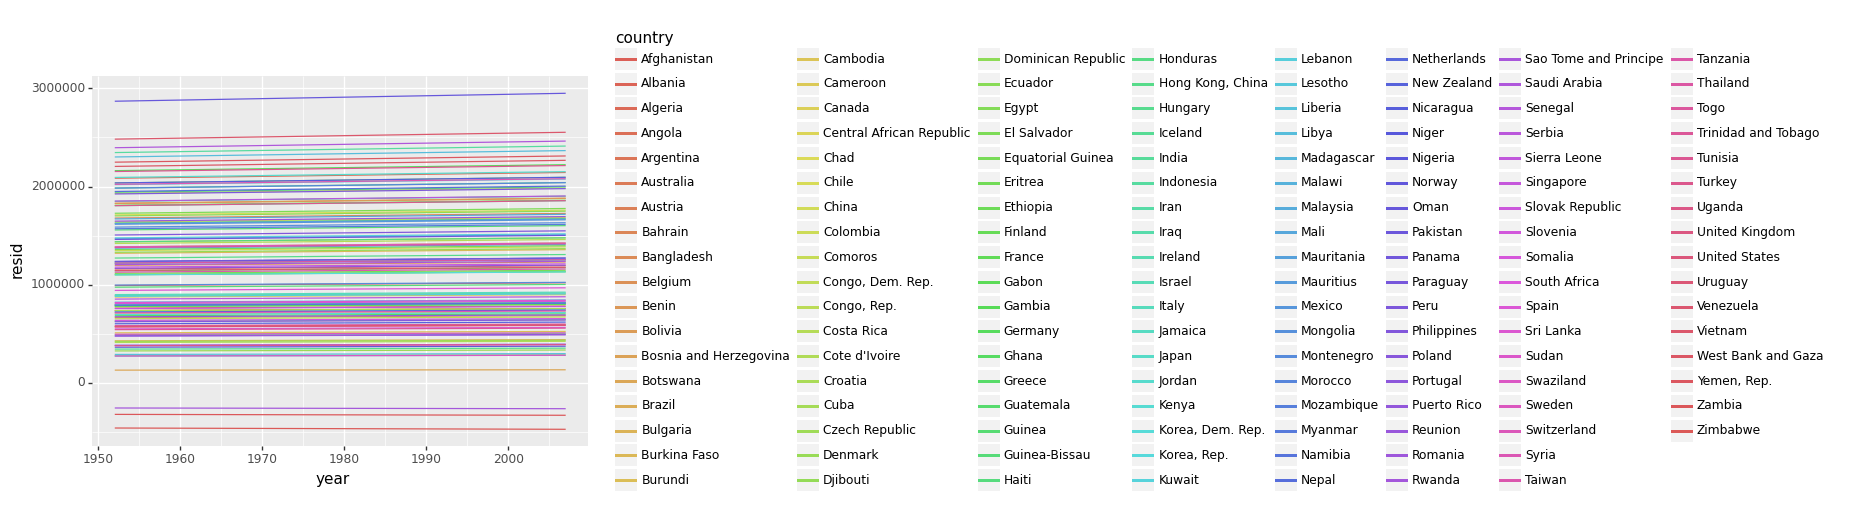

<ggplot: (-9223363259625822916)>

In [172]:
gmDf_group2 = gmDf.copy()
# add constant as the prediction expects this because we fitted the model with a constant too
gmDf_group2 = sm.add_constant(gmDf_group2)
# starting point
gmDf_group2 = gmDf_group2.groupby(["country", "continent"])

# just to check
#display(gmDf_group2.get_group(("Germany", "Europe"))["year"])
#gmDf_group2.apply(lambda x: print(x))

# apply to each group: the prediction that "belongs" to that group.
# ISSUE: the prediction function returns a Series. But in a groupby, there is an aggregation, so some agg function will be applied that results in a single result in the resulting DF.
# But then again, how do we have a different prediction for each row? 
# If the Series return type is the error, how can we catch it to expand back to the normal DF?

# ----------------
# the following code snippet proves, that it is in fact the prediction models fault, that the predictions are so far off.
pred_list = []
(gmDf_group2.apply(
    (
        lambda x: pred_list.append(gmDf_group_model.loc[gmDf_group_model["country"] == x.name[0], "model"].values[0]
        .predict(x.loc[:,["year", "const"]]))
        # note that x and gmDf_group2.get_group(x.name) is the same
        #.predict(gmDf_group2.get_group(x.name).loc[:,["year", "const"]])
    )))
# to check the prediction
#display(pred_list[0:2])
# -> CHECK: why do all the predictions have the same indexes?
# ----------------

# to check what the prediction model is working with
#gmDf_group2.apply(lambda x: print(x.loc[:,["year", "const"]], x.loc[:,["year", "const"]].dtypes))

# for each group, get the prediction model from the gmDf_group_model DF and apply the prediction with the values of "year" and "const" of the group
gmDf_group2_pred = (gmDf_group2.apply(
    (
        lambda x: gmDf_group_model.loc[gmDf_group_model["country"] == x.name[0], "model"].values[0]
        .predict(x.loc[:,["year", "const"]])
        # note that x and gmDf_group2.get_group(x.name) is the same
        #.predict(gmDf_group2.get_group(x.name).loc[:,["year", "const"]])
    ))
                         .reset_index()
                         .rename(columns={0:"pred"}))

display(gmDf_group2_pred)
# add the new column of predicted values to the full DF
gmDf_group_model_pred = gmDf.copy().merge(right=gmDf_group2_pred.loc[:,"pred"], how="left", left_index=True, right_index=True)
# calculate residuals
gmDf_group_model_pred["resid"] = gmDf_group_model_pred["lifeExp"] - gmDf_group_model_pred["pred"]
# peek
display(gmDf_group_model_pred)

# just to check if all predictions are unique (which means that for each country, a different prediction model has been used)
print("Count of unique predictions: ", gmDf_group_model_pred["pred"].nunique(), "\n")

ggplot(gmDf_group_model_pred, aes("year", "resid", color="country")) + geom_line()

<div class='alert alert-block alert-warning'>
    <h3>
        <b> End of error case<b>
    </h3>
</div>

<br>

Now the next challenge is to use the created dataframe to apply the method of each group to the corresponding group:

*Note that we can access the groups of a `DataFrameGroupBy object` which are dataframes by using: `dict(iter(DataFrameGroupBy))` . This will return a Dictionary which keys are the groups and the values are the dataframes.*  

**A more efficient solution to this is, however, to just use the `get_group` method of a Pandas `DataFrameGroupBy object` .**

In [41]:
gmDf_group_model2 = (gmDf.groupby(['country', 'continent'])
                    .apply(regress, 'lifeExp', ['year'], True))
display(gmDf_group_model2)

gmDf_group = gmDf.groupby(['country', 'continent'])
display(gmDf_group)

groups = dict(list(gmDf_group))
display(groups.get(("Afghanistan", "Asia")))

country             continent
Afghanistan         Asia         <statsmodels.regression.linear_model.Regressio...
Albania             Europe       <statsmodels.regression.linear_model.Regressio...
Algeria             Africa       <statsmodels.regression.linear_model.Regressio...
Angola              Africa       <statsmodels.regression.linear_model.Regressio...
Argentina           Americas     <statsmodels.regression.linear_model.Regressio...
                                                       ...                        
Vietnam             Asia         <statsmodels.regression.linear_model.Regressio...
West Bank and Gaza  Asia         <statsmodels.regression.linear_model.Regressio...
Yemen, Rep.         Asia         <statsmodels.regression.linear_model.Regressio...
Zambia              Africa       <statsmodels.regression.linear_model.Regressio...
Zimbabwe            Africa       <statsmodels.regression.linear_model.Regressio...
Length: 142, dtype: object

country continent  year  lifeExp       pop   gdpPercap
0   Afghanistan      Asia  1952   28.801   8425333  779.445314
1   Afghanistan      Asia  1957   30.332   9240934  820.853030
2   Afghanistan      Asia  1962   31.997  10267083  853.100710
3   Afghanistan      Asia  1967   34.020  11537966  836.197138
4   Afghanistan      Asia  1972   36.088  13079460  739.981106
5   Afghanistan      Asia  1977   38.438  14880372  786.113360
6   Afghanistan      Asia  1982   39.854  12881816  978.011439
7   Afghanistan      Asia  1987   40.822  13867957  852.395945
8   Afghanistan      Asia  1992   41.674  16317921  649.341395
9   Afghanistan      Asia  1997   41.763  22227415  635.341351
10  Afghanistan      Asia  2002   42.129  25268405  726.734055
11  Afghanistan      Asia  2007   43.828  31889923  974.580338